Import Library

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime as dt
import numpy as np
import talib



Set Waktu

In [2]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2025,1,1)

Import data saham

In [3]:
code = pd.read_csv('Book1.csv', sep=';').dropna()
code

Property    Infra  ConsumerCyclicals   Energy Transport Industri  Finance  \
0  APLN.JK  ADHI.JK            ACES.JK  ABMM.JK   AKSI.JK  AMFG.JK  AGRO.JK   
1  ASRI.JK  CMNP.JK            AUTO.JK  ADRO.JK   ASSA.JK  ARNA.JK  ASGR.JK   
2  SMRA.JK  CASS.JK            BMTR.JK  AKRA.JK   SMDR.JK  ASII.JK  BACA.JK   
3  BSDE.JK  EXCL.JK            ERAA.JK  BUMI.JK   TMAS.JK  HEXA.JK  BBCA.JK   
4  CTRA.JK  TLKM.JK            GJTL.JK  BYAN.JK   CMPP.JK  ASGR.JK  BBKP.JK   
5  DILD.JK  JKON.JK            GWSA.JK  DEWA.JK   GIAA.JK  JTPE.JK  BBNI.JK   
6  MDLN.JK  JSMR.JK            IMAS.JK  DOID.JK   IMJS.JK  KBLI.JK  BBRI.JK   
7  KIJA.JK  PTPP.JK            LPPF.JK  DSSA.JK   NELY.JK  LION.JK  BBTN.JK   
8  LPCK.JK  SSIA.JK            MAPI.JK  ELSA.JK   MIRA.JK  MLIA.JK  BCAP.JK   
9  LPKR.JK  TBIG.JK            MNCN.JK  ENRG.JK   MITI.JK  UNTR.JK  BDMN.JK   

  ConsumerNonCyclicals  Basic_Materials     Tech   Health  
0               AALI.JK         ANTM.JK  EMTK.JK  KLBF.JK  
1               AISA.JK         BRMS.JK  KREN.JK  MIKA.JK  
2               AMRT.JK         BRPT.JK  LMAS.JK  SAME.JK  
3               BISI.JK         ESSA.JK  MLPT.JK  SIDO.JK  
4               BUDI.JK         INCO.JK  MTDL.JK  SILO.JK  
5               BWPT.JK         INKP.JK  PTSN.JK  SRAJ.JK  
6               CPIN.JK         INTP.JK  SKYB.JK  TSPC.JK  
7               DSNG.JK         ISSP.JK  MCAS.JK  SCPI.JK  
8               GGRM.JK         LTLS.JK  KIOS.JK  MERK.JK  
9               ICBP.JK         SMBR.JK  ATIC.JK  PYFA.JK

Import data IHSG

In [4]:
# Load dataset
ihsg = pd.read_csv('IHSG.csv', sep=';').dropna()

# Konversi kolom 'Tanggal' ke format datetime
ihsg['Tanggal'] = pd.to_datetime(ihsg['Tanggal'], format='%d/%m/%Y')

# Fungsi untuk mengubah angka dengan koma ke float
def convert_number(x):
    return float(x.replace('.', '').replace(',', '.')) if isinstance(x, str) else x

# Terapkan fungsi ke kolom numerik
numeric_cols = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']
for col in numeric_cols:
    ihsg[col] = ihsg[col].apply(convert_number)

# Konversi 'Vol' dari format teks (misal: "301,28B") menjadi angka miliar
def convert_volume(x):
    if isinstance(x, str) and 'B' in x:
        return float(x.replace('B', '').replace(',', '.')) * 1e9  # Konversi ke miliar
    return x

ihsg['Vol'] = ihsg['Vol'].apply(convert_volume)

# Konversi 'Perubahan' dari format persen ke desimal
ihsg['Perubahan'] = ihsg['Perubahan'].str.replace('%', '').str.replace(',', '.').astype(float) / 100

# Cek hasil
print(ihsg.head())


     Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah           Vol  \
0 2025-01-01   7109.20    7092.43    7324.63   6956.67  3.012800e+11   
1 2024-12-01   7079.90    7117.75    7530.56   6931.58  3.041100e+11   
2 2024-11-01   7114.27    7573.79    7583.69   7107.28  4.045300e+11   
3 2024-10-01   7574.02    7551.46    7805.92   7449.48  4.937200e+11   
4 2024-09-01   7527.93    7686.54    7910.56   7527.93  4.022500e+11   

   Perubahan  
0     0.0041  
1    -0.0048  
2    -0.0607  
3     0.0061  
4    -0.0186  


Property

In [5]:
dataProp = pd.read_csv('dataProp.csv', header=[0, 1], index_col=0)
dataProp.head()


Price            Close                                                   \
Ticker         APLN.JK     ASRI.JK      BSDE.JK     CTRA.JK     DILD.JK   
2014-01-02  217.877884  440.230133  1290.217163  675.267395  300.912506   
2014-01-03  208.194427  430.554749  1260.894043  683.924683  291.508942   
2014-01-06  204.321030  416.041687  1221.796631  670.938843  287.747589   
2014-01-07  200.447662  411.203979  1182.698975  657.952881  283.986176   
2014-01-08  205.289383  433.457367  1236.458130  679.596069  285.866852   

Price                                                                    ...  \
Ticker         KIJA.JK      LPCK.JK     LPKR.JK     MDLN.JK     SMRA.JK  ...   
2014-01-02  193.802612  4740.612305  692.925415  353.185486  730.118958  ...   
2014-01-03  190.851303  4605.166504  685.310913  348.657471  730.118958  ...   
2014-01-06  186.916214  4392.967285  666.274475  346.846313  698.955261  ...   
2014-01-07  186.916214  4370.393066  662.467163  342.318268  681.147522  ...   
2014-01-08  191.835068  4397.481934  662.467163  341.412689  716.763123  ...   

Price         Volume                                                          \
Ticker       APLN.JK   ASRI.JK     BSDE.JK     CTRA.JK     DILD.JK   KIJA.JK   
2014-01-02  21328000  73456500  11817500.0  30865223.0  20895500.0  11817334   
2014-01-03  13875500  79257500   4530500.0  20882287.0   7413000.0   5876919   
2014-01-06   4789200  36133900   5251600.0   3780191.0   5815800.0   9374547   
2014-01-07  12182800  45969900  10722100.0   7092613.0   5938400.0   4977693   
2014-01-08  14390200  60571300  17406100.0   8827396.0  15104400.0   7567629   

Price                                                
Ticker      LPCK.JK    LPKR.JK    MDLN.JK   SMRA.JK  
2014-01-02  2178247   31135971  4478000.0  32233721  
2014-01-03   925872  114565530  2404000.0  15414826  
2014-01-06   865570   35034567  2862500.0  16669664  
2014-01-07   176321   44222568  3282500.0   9264479  
2014-01-08   994192   84200382  5564700.0  28448979  

[5 rows x 50 columns]

Preprocessing

In [6]:
# Cek jumlah missing values
missing_values_prop = dataProp.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values_prop)


Jumlah missing values per kolom:
 Price   Ticker 
Close   APLN.JK    0
        ASRI.JK    0
        BSDE.JK    1
        CTRA.JK    1
        DILD.JK    1
        KIJA.JK    0
        LPCK.JK    0
        LPKR.JK    0
        MDLN.JK    1
        SMRA.JK    0
High    APLN.JK    0
        ASRI.JK    0
        BSDE.JK    1
        CTRA.JK    1
        DILD.JK    1
        KIJA.JK    0
        LPCK.JK    0
        LPKR.JK    0
        MDLN.JK    1
        SMRA.JK    0
Low     APLN.JK    0
        ASRI.JK    0
        BSDE.JK    1
        CTRA.JK    1
        DILD.JK    1
        KIJA.JK    0
        LPCK.JK    0
        LPKR.JK    0
        MDLN.JK    1
        SMRA.JK    0
Open    APLN.JK    0
        ASRI.JK    0
        BSDE.JK    1
        CTRA.JK    1
        DILD.JK    1
        KIJA.JK    0
        LPCK.JK    0
        LPKR.JK    0
        MDLN.JK    1
        SMRA.JK    0
Volume  APLN.JK    0
        ASRI.JK    0
        BSDE.JK    1
        CTRA.JK    1
        DILD.JK    1
     

In [7]:
# Konversi index ke datetime
dataProp.index = pd.to_datetime(dataProp.index)

# Lakukan interpolasi cubic
dataProp.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", dataProp.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   APLN.JK    0
        ASRI.JK    0
        BSDE.JK    0
        CTRA.JK    0
        DILD.JK    0
        KIJA.JK    0
        LPCK.JK    0
        LPKR.JK    0
        MDLN.JK    0
        SMRA.JK    0
High    APLN.JK    0
        ASRI.JK    0
        BSDE.JK    0
        CTRA.JK    0
        DILD.JK    0
        KIJA.JK    0
        LPCK.JK    0
        LPKR.JK    0
        MDLN.JK    0
        SMRA.JK    0
Low     APLN.JK    0
        ASRI.JK    0
        BSDE.JK    0
        CTRA.JK    0
        DILD.JK    0
        KIJA.JK    0
        LPCK.JK    0
        LPKR.JK    0
        MDLN.JK    0
        SMRA.JK    0
Open    APLN.JK    0
        ASRI.JK    0
        BSDE.JK    0
        CTRA.JK    0
        DILD.JK    0
        KIJA.JK    0
        LPCK.JK    0
        LPKR.JK    0
        MDLN.JK    0
        SMRA.JK    0
Volume  APLN.JK    0
        ASRI.JK    0
        BSDE.JK    0
        CTRA.JK    0
        DILD.JK 

Atribut Saham Yang digunakan

Return

In [8]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().dropna()
    return quarterly_returns

# Contoh penggunaan
quarterly_returns_prop = calculate_quarterly_return(dataProp)
print(quarterly_returns_prop)


Ticker       APLN.JK   ASRI.JK   BSDE.JK   CTRA.JK   DILD.JK   KIJA.JK  \
2014-06-30 -0.010601 -0.245078 -0.083038 -0.202586 -0.035320 -0.131427   
2014-09-30  0.251727  0.029412  0.040404  0.118880  0.349871  0.108108   
2014-12-31 -0.023324  0.230769  0.168285  0.231527  0.120690  0.199187   
2015-03-31  0.313433 -0.008929  0.182825  0.180000 -0.115385  0.122034   
2015-06-30 -0.143182  0.036036 -0.211719 -0.142373  0.009328 -0.208459   
2015-09-30 -0.204244 -0.443662 -0.158683 -0.342760  0.026316 -0.386283   
2015-12-31  0.113333  0.085443  0.281139  0.791411 -0.164103  0.543750   
2016-03-31 -0.104790  0.084548  0.019444 -0.106164  0.073620  0.052632   
2016-06-30 -0.130435  0.290323  0.153040  0.115859  0.114286  0.092308   
2016-09-30  0.107692 -0.037500  0.042654  0.104854  0.034560  0.035211   
2016-12-31 -0.270833 -0.238095 -0.202273 -0.160377 -0.166667 -0.006803   
2017-03-31  0.038095  0.028409  0.074074 -0.078652 -0.168000  0.130137   
2017-06-30 -0.133076 -0.117461 -0.0264

Volalitas

In [9]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility = returns.resample('QE').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility

# Contoh penggunaan
quarterly_volatility_prop = calculate_quarterly_volatility(dataProp)
print(quarterly_volatility_prop)


Ticker       APLN.JK   ASRI.JK   BSDE.JK   CTRA.JK   DILD.JK   KIJA.JK  \
2014-03-31  0.400967  0.451124  0.478047  0.509595  0.401981  0.417312   
2014-06-30  0.242374  0.395845  0.333197  0.413907  0.235026  0.401714   
2014-09-30  0.548099  0.305821  0.280608  0.415336  0.315091  0.370158   
2014-12-31  0.335653  0.417753  0.327709  0.302297  0.323212  0.321525   
2015-03-31  0.471831  0.385912  0.325660  0.341360  0.409494  0.292529   
2015-06-30  0.315064  0.436485  0.387946  0.431445  0.405697  0.274476   
2015-09-30  0.334576  0.485066  0.575553  0.559652  0.330445  0.447211   
2015-12-31  0.306232  0.514428  0.402858  0.628658  0.276452  0.587641   
2016-03-31  0.207148  0.354526  0.287104  0.377473  0.209046  0.229746   
2016-06-30  0.396455  0.467427  0.315920  0.380613  0.254372  0.262743   
2016-09-30  0.282447  0.359964  0.370117  0.452315  0.335286  0.257085   
2016-12-31  0.306966  0.342165  0.368895  0.434230  0.379535  0.172617   
2017-03-31  0.204295  0.296796  0.2435

Sharp Ratio

In [10]:
import pandas as pd
import numpy as np

# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
# Asumsi struktur dataProp: MultiIndex (level 0: 'Price', level 1: 'Close', 'Volume', etc.)
price_close = dataProp['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_prop = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_prop.index = pd.to_datetime(quarterly_returns_prop.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_prop.index)
for ticker in quarterly_returns_prop.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_prop.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_prop - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_prop.std()

# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_prop = excess_return.divide(sigma_p)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print(sharpe_ratio_quarterly_prop)


Sharpe Ratio per kuartal:

Ticker       APLN.JK   ASRI.JK   BSDE.JK   CTRA.JK   DILD.JK   KIJA.JK  \
2014-06-30 -0.318063 -1.142593 -0.910610 -1.261671 -0.636434 -1.020163   
2014-09-30  0.656657 -0.162738 -0.199341  0.199440  1.585723  0.163621   
2014-12-31 -0.368433  0.553080  0.532703  0.707652  0.258775  0.609615   
2015-03-31  0.882838 -0.302577  0.616485  0.473452 -1.103132  0.228323   
2015-06-30 -0.810689 -0.139091 -1.652069 -0.987992 -0.378860 -1.400858   
2015-09-30 -1.037575 -1.851485 -1.346473 -1.898782 -0.280858 -2.279668   
2015-12-31  0.142434  0.037279  1.187766  3.256194 -1.379377  2.316568   
2016-03-31 -0.649461  0.051933 -0.291300 -0.800693  0.020881 -0.085835   
2016-06-30 -0.732361  0.798392  0.497682  0.223588  0.274714  0.126718   
2016-09-30  0.192690 -0.333175 -0.075939  0.222806 -0.122728 -0.101914   
2016-12-31 -1.182817 -1.019499 -1.439184 -0.944833 -1.235522 -0.268365   
2017-03-31 -0.034945 -0.068149  0.153119 -0.573378 -1.243214  0.408393   
2017-06-30 

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\2660643624.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))


Exponential Moving Average (EMA)

In [11]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_prop = pd.DataFrame({ticker: calculate_ema(dataProp['Close'][ticker]) for ticker in dataProp['Close'].columns})
print(ema_3m_prop)


               APLN.JK     ASRI.JK      BSDE.JK      CTRA.JK     DILD.JK  \
2014-01-02  217.877884  440.230133  1290.217163   675.267395  300.912506   
2014-01-03  217.575276  439.927777  1289.300816   675.537935  300.618645   
2014-01-06  217.161081  439.181337  1287.191310   675.394214  300.216424   
2014-01-07  216.638786  438.307045  1283.925924   674.849172  299.709229   
2014-01-08  216.284118  438.155492  1282.442556   674.997513  299.276655   
...                ...         ...          ...          ...         ...   
2024-12-20  110.617852  175.128931  1066.009296  1152.386136  179.165420   
2024-12-23  110.098544  173.906152  1062.227755  1146.530320  178.535251   
2024-12-24  109.532965  172.752834  1058.408138  1141.169997  177.831024   
2024-12-27  108.953809  171.666808  1055.020383  1135.977185  177.148805   
2024-12-30  108.424003  170.489721  1051.582246  1131.102898  176.675405   

               KIJA.JK      LPCK.JK     LPKR.JK     MDLN.JK     SMRA.JK  
2014-01-02  1

Average True Range (ATR)

In [12]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_prop = calculate_atr_talib(dataProp).dropna()
print(atr_3m_prop)



             APLN.JK    ASRI.JK    BSDE.JK    CTRA.JK    DILD.JK   KIJA.JK  \
2014-04-04  8.546039  22.007666  55.000251  39.095150  10.791656  9.103775   
2014-04-07  8.564093  22.042282  54.515105  38.886842  10.799475  9.177886   
2014-04-08  8.489637  21.922771  54.270381  38.819257  10.777317  9.250820   
2014-04-09  8.354881  21.574790  53.408946  38.203079  10.606248  9.103982   
2014-04-10  8.498935  22.384165  55.198716  40.138899  10.676714  9.521628   
...              ...        ...        ...        ...        ...       ...   
2024-12-20  5.041015   9.226559  35.406915  45.419472   6.152299  6.836828   
2024-12-23  5.024491   9.143598  35.321090  45.015988   6.118136  6.855291   
2024-12-24  5.024102   9.061954  34.998534  44.698274   6.084514  6.905207   
2024-12-27  4.976101   8.981605  34.681096  44.385603   6.051427  6.859093   
2024-12-30  4.928861   8.934278  34.368698  44.315990   6.050611  6.861330   

               LPCK.JK    LPKR.JK   MDLN.JK    SMRA.JK  
2014-0

On-Balance Volume (OBV) 

In [13]:
import talib
import pandas as pd

def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m = obv_data.rolling(window=63).mean()

    return obv_3m

# penggunaan
obv_3m_prop = calculate_obv_3m(dataProp)
obv_3m_prop = obv_3m_prop.dropna()
print(obv_3m_prop)


                 APLN.JK       ASRI.JK       BSDE.JK       CTRA.JK  \
2014-04-03  3.952147e+08  1.065454e+09  2.629406e+08  2.179957e+08   
2014-04-04  4.134659e+08  1.093954e+09  2.732272e+08  2.232289e+08   
2014-04-07  4.310147e+08  1.124800e+09  2.840530e+08  2.281306e+08   
2014-04-08  4.483803e+08  1.155603e+09  2.955870e+08  2.328006e+08   
2014-04-09  4.659393e+08  1.187136e+09  3.072911e+08  2.375832e+08   
...                  ...           ...           ...           ...   
2024-12-20  1.459931e+10  1.766710e+10  3.652313e+09  4.644878e+09   
2024-12-23  1.459588e+10  1.765546e+10  3.646252e+09  4.640216e+09   
2024-12-24  1.459267e+10  1.764610e+10  3.640610e+09  4.636317e+09   
2024-12-27  1.458968e+10  1.763739e+10  3.634753e+09  4.631796e+09   
2024-12-30  1.458674e+10  1.762847e+10  3.628992e+09  4.626755e+09   

                 DILD.JK       KIJA.JK       LPCK.JK       LPKR.JK  \
2014-04-03  1.829644e+08  4.431363e+08  1.983764e+07  1.600705e+09   
2014-04-04  1.90729

RSI

In [14]:
import talib
import pandas as pd

def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_prop = calculate_rsi_talib(dataProp)
print(rsi_values_prop)


              APLN.JK    ASRI.JK    BSDE.JK    CTRA.JK    DILD.JK    KIJA.JK  \
2014-04-04  60.777384  60.498688  58.121826  62.578624  67.220897  67.999996   
2014-04-07  60.344050  61.018509  58.229555  62.578624  67.378369  67.009581   
2014-04-08  60.126243  60.613253  58.338453  61.776297  66.087936  67.009581   
2014-04-09  60.126243  60.613253  58.338453  61.776297  66.087936  67.009581   
2014-04-10  56.543911  54.959967  54.114142  56.708956  63.877390  59.710162   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  43.379002  43.076778  42.395379  41.565550  42.312421  58.186802   
2024-12-23  43.379002  42.925224  43.481878  41.979783  42.312421  56.180491   
2024-12-24  42.784226  43.128538  43.274533  42.394725  41.519057  56.560980   
2024-12-27  42.488247  43.333653  43.818978  42.394725  41.519057  56.940898   
2024-12-30  42.889706  42.707591  43.606338  42.606628  43.699016  54.986235   

              LPCK.JK    LPKR.JK    MDL

Beta

In [15]:
import talib
import pandas as pd

def calculate_beta_talib(df, market_returns, period=63):
    """Menghitung Beta per 3 bulan (~63 hari perdagangan) terhadap indeks pasar menggunakan TA-Lib"""

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Daftar saham
    beta_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)].pct_change().dropna()  # Return harian saham
            market_ret = market_returns.pct_change().dropna()  # Return harian pasar
            
            # 🔹 Pastikan kedua data memiliki indeks waktu yang sama
            common_index = close.index.intersection(market_ret.index)
            close = close.reindex(common_index)
            market_ret = market_ret.reindex(common_index)

            # 🔹 Gunakan TA-Lib untuk menghitung Beta
            beta = talib.BETA(close, market_ret, timeperiod=period)

            beta_values[ticker] = beta
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap.")

    return pd.DataFrame(beta_values, index=close.index).dropna()

# ======= 🔹 Load & Proses Data IHSG =======
ihsg = pd.read_csv('IHSG.csv', sep=';').dropna()

ihsg['Tanggal'] = pd.to_datetime(ihsg['Tanggal'], format='%d/%m/%Y')
ihsg['Terakhir'] = ihsg['Terakhir'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

ihsg.set_index('Tanggal', inplace=True)

market_index = ihsg['Terakhir']  # Harga penutupan IHSG

# ======= 🔹 Hitung Beta dengan Data yang Sinkron =======
beta_quarterly_prop = calculate_beta_talib(dataProp, market_index)
# def beta_class(val,eps=1e-2):
#     if val > 1 + eps:
#         return int(1)
#     elif (val > -eps) and (val < eps):
#         return int(0)
#     else:
#         return int(-1)
    
# for k,a in enumerate (beta_quarterly_prop.columns):
#     beta_quarterly_prop['Class{}'.format(k) ] = [beta_class(a,1e-1) for a in beta_quarterly_prop[a]]

# for a in range(10,len(beta_quarterly_prop.columns)):
#     print(beta_quarterly_prop['Class{}'.format(a-10)].value_counts())
   

# Print hasil
print(beta_quarterly_prop)


             APLN.JK   ASRI.JK   BSDE.JK   CTRA.JK   DILD.JK   KIJA.JK  \
2022-12-01  0.708203  0.001708  0.189661  0.469504  0.316063  0.033053   
2023-02-01  0.734127  0.013695  0.183880  0.488941  0.266649  0.037056   
2023-03-01  0.771095  0.081704  0.099441  0.472386  0.290839  0.031099   
2023-08-01  0.763987  0.072675  0.106011  0.443110  0.230581  0.278152   
2023-09-01  0.905177  0.113180  0.028557  0.447303  0.269532  0.248758   
2023-11-01  0.882325  0.126884  0.010178  0.407440  0.274291  0.250855   
2023-12-01  0.896904  0.126511  0.001267  0.471748  0.275502  0.266324   
2024-02-01  0.864098  0.114364  0.000234  0.465938  0.296762  0.283940   
2024-03-01  1.395968  0.136148  0.002475  0.511982  0.277623  0.321705   
2024-04-01  1.211409  0.157707 -0.017078  0.508271  0.253201  0.340868   
2024-07-01  1.242521  0.289920 -0.010191  0.525921  0.224400  0.448326   
2024-08-01  1.283696  0.276669  0.006528  0.539696  0.193116  0.452944   
2024-10-01  1.297239  0.318085  0.0101

MACD

In [16]:
# Asumsi: dataProp sudah dimuat dan Date menjadi index
dataProp = dataProp.copy()
dataProp.index = pd.to_datetime(dataProp.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = dataProp.columns.levels[1]

for ticker in tickers:
    try:
        close = dataProp[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_prop = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_prop)


       Tanggal   Ticker       MACD
0   2014-03-31  APLN.JK   3.550799
1   2014-06-30  APLN.JK   2.194424
2   2014-09-30  APLN.JK  10.135826
3   2014-12-31  APLN.JK  -1.869073
4   2015-03-31  APLN.JK  10.205818
..         ...      ...        ...
435 2023-12-31  SMRA.JK  -6.054624
436 2024-03-31  SMRA.JK  -3.480097
437 2024-06-30  SMRA.JK  -3.641407
438 2024-09-30  SMRA.JK  14.301246
439 2024-12-31  SMRA.JK -10.890131

[440 rows x 3 columns]


Industri

In [17]:
dataIndustri = pd.read_csv('dataIndustri.csv', header=[0, 1], index_col=0)
dataIndustri.head()


Price             Close                                                   \
Ticker          AMFG.JK     ARNA.JK     ASGR.JK      ASII.JK     HEXA.JK   
Date                                                                       
2014-01-02  6223.163086  506.711304  949.982056  4328.708008  654.998474   
2014-01-03  6223.163086  494.501434  949.982056  4204.141113  660.036926   
2014-01-06  6089.810059  500.606384  961.291199  4266.424805  658.021545   
2014-01-07  6045.358398  500.606384  955.636536  4250.853027  654.998474   
2014-01-08  5867.554688  503.658997  966.946045  4235.282227  654.998474   

Price                                                                   ...  \
Ticker        JTPE.JK     KBLI.JK      LION.JK    MLIA.JK      UNTR.JK  ...   
Date                                                                    ...   
2014-01-02  42.280800  118.650642   999.075378  78.062576  9079.037109  ...   
2014-01-03  42.280800  125.335190  1040.703491  77.154877  9172.875977  ...   
2014-01-06  41.998924  118.650642  1036.540649  78.062576  9137.687500  ...   
2014-01-07  41.717052  115.308372  1036.540649  77.881042  9266.717773  ...   
2014-01-08  41.717052  115.308372   999.075378  77.881042  9125.958984  ...   

Price       Volume                                                       \
Ticker     AMFG.JK    ARNA.JK   ASGR.JK     ASII.JK   HEXA.JK   JTPE.JK   
Date                                                                      
2014-01-02   26500   833500.0   61000.0  14603500.0  261000.0    388000   
2014-01-03   26500  1527500.0  174000.0  18566000.0  296500.0   1310000   
2014-01-06     100  1490300.0   87800.0  29776200.0  236200.0  16097600   
2014-01-07    1400  6427900.0    4200.0  26433200.0  368100.0   6341200   
2014-01-08     100  1874800.0  302600.0  19343900.0  140700.0   8298800   

Price                                          
Ticker     KBLI.JK LION.JK MLIA.JK    UNTR.JK  
Date                                           
2014-01-02    2500   10000   55000  1281500.0  
2014-01-03   20500   10000  297500  2425500.0  
2014-01-06    1700    1000  202000  2930200.0  
2014-01-07  133000    1000  101000  2666500.0  
2014-01-08  116800    2000  720000  1859200.0  

[5 rows x 50 columns]

Preprosesing Data

In [18]:
# Cek jumlah missing values
missing_values_industri = dataIndustri.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values_industri)


Jumlah missing values per kolom:
 Price   Ticker 
Close   AMFG.JK    0
        ARNA.JK    1
        ASGR.JK    1
        ASII.JK    1
        HEXA.JK    1
        JTPE.JK    0
        KBLI.JK    0
        LION.JK    0
        MLIA.JK    0
        UNTR.JK    1
High    AMFG.JK    0
        ARNA.JK    1
        ASGR.JK    1
        ASII.JK    1
        HEXA.JK    1
        JTPE.JK    0
        KBLI.JK    0
        LION.JK    0
        MLIA.JK    0
        UNTR.JK    1
Low     AMFG.JK    0
        ARNA.JK    1
        ASGR.JK    1
        ASII.JK    1
        HEXA.JK    1
        JTPE.JK    0
        KBLI.JK    0
        LION.JK    0
        MLIA.JK    0
        UNTR.JK    1
Open    AMFG.JK    0
        ARNA.JK    1
        ASGR.JK    1
        ASII.JK    1
        HEXA.JK    1
        JTPE.JK    0
        KBLI.JK    0
        LION.JK    0
        MLIA.JK    0
        UNTR.JK    1
Volume  AMFG.JK    0
        ARNA.JK    1
        ASGR.JK    1
        ASII.JK    1
        HEXA.JK    1
     

In [19]:
# Konversi index ke datetime
dataIndustri.index = pd.to_datetime(dataIndustri.index)

# Lakukan interpolasi cubic
dataIndustri.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", dataIndustri.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   AMFG.JK    0
        ARNA.JK    0
        ASGR.JK    0
        ASII.JK    0
        HEXA.JK    0
        JTPE.JK    0
        KBLI.JK    0
        LION.JK    0
        MLIA.JK    0
        UNTR.JK    0
High    AMFG.JK    0
        ARNA.JK    0
        ASGR.JK    0
        ASII.JK    0
        HEXA.JK    0
        JTPE.JK    0
        KBLI.JK    0
        LION.JK    0
        MLIA.JK    0
        UNTR.JK    0
Low     AMFG.JK    0
        ARNA.JK    0
        ASGR.JK    0
        ASII.JK    0
        HEXA.JK    0
        JTPE.JK    0
        KBLI.JK    0
        LION.JK    0
        MLIA.JK    0
        UNTR.JK    0
Open    AMFG.JK    0
        ARNA.JK    0
        ASGR.JK    0
        ASII.JK    0
        HEXA.JK    0
        JTPE.JK    0
        KBLI.JK    0
        LION.JK    0
        MLIA.JK    0
        UNTR.JK    0
Volume  AMFG.JK    0
        ARNA.JK    0
        ASGR.JK    0
        ASII.JK    0
        HEXA.JK 

Atribut saham yang digunakan

Return

In [20]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().dropna()
    return quarterly_returns

# Contoh penggunaan
quarterly_returns_industri = calculate_quarterly_return(dataIndustri)
print(quarterly_returns_industri)


Ticker       AMFG.JK   ARNA.JK   ASGR.JK   ASII.JK   HEXA.JK   JTPE.JK  \
Date                                                                     
2014-06-30  0.007042  0.086430  0.247725  0.006572 -0.063613 -0.038710   
2014-09-30  0.053346 -0.014852 -0.017778 -0.030928  0.054669  0.044929   
2014-12-31  0.080537 -0.125628 -0.132723  0.063830 -0.070292  0.243421   
2015-03-31 -0.043478 -0.068966  0.108179  0.154882 -0.015692 -0.100529   
2015-06-30 -0.057600 -0.333562  0.073159 -0.157504 -0.218841 -0.193317   
2015-09-30 -0.191638 -0.158491 -0.181818 -0.252869 -0.364546 -0.109848   
2015-12-31  0.129310  0.121076  0.014084  0.148326 -0.223271 -0.012766   
2016-03-31  0.019084  0.250000  0.063889  0.208333  0.295547 -0.086207   
2016-06-30  0.042409 -0.015798  0.120100  0.038333  0.193750  0.315581   
2016-09-30  0.010909 -0.065574  0.023233  0.122191  1.094241 -0.189394   
2016-12-31 -0.035971 -0.087719 -0.082126  0.003030  0.243940  0.439252   
2017-03-31  0.014925 -0.080770  0.0157

Volalitas

In [21]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility = returns.resample('QE').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility

# Contoh penggunaan
quarterly_volatility_industri = calculate_quarterly_volatility(dataIndustri)
print(quarterly_volatility_industri)


Ticker       AMFG.JK   ARNA.JK   ASGR.JK   ASII.JK   HEXA.JK   JTPE.JK  \
Date                                                                     
2014-03-31  0.147188  0.307907  0.233284  0.348061  0.200801  0.111033   
2014-06-30  0.260615  0.302837  0.370594  0.260056  0.152847  0.068637   
2014-09-30  0.311579  0.236877  0.253094  0.191184  0.128583  0.143451   
2014-12-31  0.418979  0.307363  0.168552  0.287921  0.124368  0.188062   
2015-03-31  0.236320  0.364699  0.237618  0.249493  0.358162  0.101930   
2015-06-30  0.243533  0.654843  0.375147  0.307399  0.258191  0.215497   
2015-09-30  0.519944  0.523234  0.343024  0.400010  0.540641  0.137227   
2015-12-31  0.414046  0.358894  0.257749  0.510660  0.530777  0.189453   
2016-03-31  0.279427  0.462988  0.296773  0.343137  0.564981  0.068890   
2016-06-30  0.200332  0.401125  0.217579  0.320839  0.456401  0.349406   
2016-09-30  0.201059  0.339309  0.114864  0.363785  0.679278  0.126501   
2016-12-31  0.262413  0.618359  0.2589

Sharpe Ratio

In [22]:
# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
price_close = dataIndustri['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_industri = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_prop.index = pd.to_datetime(quarterly_returns_industri.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_industri.index)
for ticker in quarterly_returns_industri.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_industri.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_industri - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_industri.std()

# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_industri = excess_return.divide(sigma_p)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print(sharpe_ratio_quarterly_industri)


Sharpe Ratio per kuartal:

Ticker       AMFG.JK   ARNA.JK   ASGR.JK   ASII.JK   HEXA.JK   JTPE.JK  \
Date                                                                     
2014-06-30 -0.419823  0.073571  1.748960 -0.476961 -0.563257 -0.587931   
2014-09-30 -0.133774 -0.578318 -0.939442 -0.738345 -0.082615 -0.155480   
2014-12-31  0.029057 -1.296681 -2.111785 -0.083667 -0.593783  0.866504   
2015-03-31 -0.737072 -0.931981  0.327527  0.550990 -0.371915 -0.911874   
2015-06-30 -0.819168 -2.629656 -0.018646 -1.620613 -1.194029 -1.387320   
2015-09-30 -1.647211 -1.502832 -2.600466 -2.285327 -1.786105 -0.955750   
2015-12-31  0.335513  0.296564 -0.616814  0.511098 -1.212030 -0.453790   
2016-03-31 -0.314544  1.158546 -0.061879  0.964218  0.916514 -0.807662   
2016-06-30 -0.149856 -0.530775  0.541055 -0.197490  0.516406  1.287002   
2016-09-30 -0.277529 -0.781422 -0.330103  0.462528  4.219595 -1.267937   
2016-12-31 -0.515661 -0.870320 -1.312555 -0.309965  0.798239  2.025539   
2017-03-31 

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\500335154.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))


EMA

In [23]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_industri = pd.DataFrame({ticker: calculate_ema(dataIndustri['Close'][ticker]) for ticker in dataIndustri['Close'].columns})
print(ema_3m_industri)


                AMFG.JK     ARNA.JK     ASGR.JK      ASII.JK      HEXA.JK  \
Date                                                                        
2014-01-02  6223.163086  506.711304  949.982056  4328.708008   654.998474   
2014-01-03  6223.163086  506.329745  949.982056  4324.815292   655.155926   
2014-01-06  6218.995804  506.150890  950.335466  4322.990590   655.245476   
2014-01-07  6213.569635  505.977624  950.501125  4320.736291   655.237758   
2014-01-08  6202.756668  505.905167  951.015029  4318.065851   655.230280   
...                 ...         ...         ...          ...          ...   
2024-12-20  4658.879512  678.224065  807.355929  5030.846657  5262.635143   
2024-12-23  4655.477027  677.939311  807.057096  5028.320199  5248.177795   
2024-12-24  4653.743370  677.078567  807.210163  5023.685192  5234.172239   
2024-12-27  4645.501389  676.098500  807.210928  5020.757530  5220.604357   
2024-12-30  4634.391971  675.149061  807.506710  5016.983857  5207.772970   

ATR

In [24]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_industri = calculate_atr_talib(dataIndustri).dropna()
print(atr_3m_industri)



              AMFG.JK    ARNA.JK    ASGR.JK     ASII.JK     HEXA.JK   JTPE.JK  \
Date                                                                            
2014-04-04  93.135717  15.843820  23.291819  121.106934   13.947714  0.351223   
2014-04-07  91.657372  15.786139  23.685037  121.161862   13.902268  0.352359   
2014-04-08  94.435931  15.777828  23.937379  120.227286   13.777567  0.349003   
2014-04-09  92.936948  15.527386  23.557420  118.318916   13.558876  0.343464   
2014-04-10  94.284054  16.201509  23.901544  123.114072   13.663558  0.342486   
...               ...        ...        ...         ...         ...       ...   
2024-12-20  88.966561  18.311434  18.220500  112.355510  103.624602  6.874925   
2024-12-23  89.141695  18.466405  18.081148  111.841930  102.773418  6.829292   
2024-12-24  88.996589  18.470374  18.168802  111.653963  101.618284  6.752636   
2024-12-27  93.139500  18.400008  18.180134  110.834059  101.592597  6.708944   
2024-12-30  95.629350  18.25

OBV

In [25]:
def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m_industri = obv_data.rolling(window=63).mean()

    return obv_3m_industri

# Contoh penggunaan
obv_3m_industri = calculate_obv_3m(dataIndustri)
obv_3m_industri = obv_3m_industri.dropna()
print(obv_3m_industri)


                 AMFG.JK       ARNA.JK       ASGR.JK       ASII.JK  \
Date                                                                 
2014-04-03  7.580952e+03  6.983821e+06  2.634794e+06  4.880608e+07   
2014-04-04  7.182540e+03  7.569494e+06  2.696652e+06  5.396373e+07   
2014-04-07  6.784127e+03  8.144538e+06  2.766319e+06  6.066036e+07   
2014-04-08  6.261905e+03  8.723019e+06  2.828881e+06  6.770001e+07   
2014-04-09  5.761905e+03  9.301500e+06  2.891510e+06  7.515924e+07   
...                  ...           ...           ...           ...   
2024-12-20 -1.665854e+06  6.929225e+08  6.081599e+07 -8.045762e+08   
2024-12-23 -1.670252e+06  6.931454e+08  6.092330e+07 -8.069954e+08   
2024-12-24 -1.674465e+06  6.933992e+08  6.104683e+07 -8.087664e+08   
2024-12-27 -1.682567e+06  6.936331e+08  6.116430e+07 -8.111972e+08   
2024-12-30 -1.695389e+06  6.938517e+08  6.126399e+07 -8.130955e+08   

                 HEXA.JK       JTPE.JK       KBLI.JK       LION.JK  \
Date               

RSI

In [26]:
def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_industri = calculate_rsi_talib(dataIndustri)
print(rsi_values_industri)


              AMFG.JK    ARNA.JK    ASGR.JK    ASII.JK    HEXA.JK    JTPE.JK  \
Date                                                                           
2014-04-04  54.255333  56.410260  59.670783  56.028365  66.042209  58.227827   
2014-04-07  54.255333  55.684828  62.051088  57.260395  65.885384  57.488439   
2014-04-08  47.936742  57.086732  58.761865  57.411963  64.945408  56.756017   
2014-04-09  47.936742  57.086732  58.761865  57.411963  64.945408  56.756017   
2014-04-10  47.936742  56.716217  55.712592  53.494539  64.002545  55.301203   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  41.906866  48.636347  50.192664  48.930025  37.049990  40.442792   
2024-12-23  41.906866  50.603321  50.741358  49.987686  37.638727  41.052560   
2024-12-24  44.221742  48.107344  52.341823  49.083878  37.638727  41.659504   
2024-12-27  37.794437  47.512023  51.772072  49.743397  37.638727  42.263568   
2024-12-30  35.311110  47.512023  52.815

BETA

In [27]:
import talib
import pandas as pd

def calculate_beta_talib(df, market_returns, period=63):
    """Menghitung Beta per 3 bulan (~63 hari perdagangan) terhadap indeks pasar menggunakan TA-Lib"""

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Daftar saham
    beta_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)].pct_change().dropna()  # Return harian saham
            market_ret = market_returns.pct_change().dropna()  # Return harian pasar
            
            # 🔹 Pastikan kedua data memiliki indeks waktu yang sama
            common_index = close.index.intersection(market_ret.index)
            close = close.reindex(common_index)
            market_ret = market_ret.reindex(common_index)

            # 🔹 Gunakan TA-Lib untuk menghitung Beta
            beta = talib.BETA(close, market_ret, timeperiod=period)

            beta_values[ticker] = beta
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap.")

    return pd.DataFrame(beta_values, index=close.index).dropna()

# ======= 🔹 Load & Proses Data IHSG =======
ihsg = pd.read_csv('IHSG.csv', sep=';').dropna()

ihsg['Tanggal'] = pd.to_datetime(ihsg['Tanggal'], format='%d/%m/%Y')
ihsg['Terakhir'] = ihsg['Terakhir'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

ihsg.set_index('Tanggal', inplace=True)

market_index = ihsg['Terakhir']  # Harga penutupan IHSG

# ======= 🔹 Hitung Beta dengan Data yang Sinkron =======
beta_quarterly_industri = calculate_beta_talib(dataIndustri, market_index)

# Print hasil
print(beta_quarterly_industri)


             AMFG.JK   ARNA.JK   ASGR.JK   ASII.JK   HEXA.JK   JTPE.JK  \
2022-12-01  0.022856  0.716038  0.193447  0.041337 -0.076846 -0.085426   
2023-02-01  0.024817  0.671965  0.191276  0.037281 -0.064682 -0.080828   
2023-03-01  0.066153  0.667725  0.170175  0.033736 -0.056292 -0.072043   
2023-08-01  0.058760  0.434951  0.131681  0.027305 -0.051230 -0.070750   
2023-09-01  0.025455  0.449553  0.026648  0.159735 -0.012297 -0.120149   
2023-11-01  0.035433  0.478608  0.083172  0.159547 -0.034221 -0.127652   
2023-12-01  0.017820  0.481242  0.104362  0.082711 -0.029559 -0.127542   
2024-02-01  0.028899  0.483064  0.065148  0.096198 -0.037440 -0.122583   
2024-03-01  0.032706  0.495560  0.066509  0.110355 -0.025158 -0.125501   
2024-04-01  0.032041  0.512916  0.087918  0.110751 -0.038240 -0.180104   
2024-07-01  0.042780  0.517327  0.130345  0.150519 -0.016895 -0.129845   
2024-08-01  0.065912  0.507850  0.082462  0.156920 -0.007757 -0.127465   
2024-10-01  0.056919  0.543503  0.0724

MACD

In [28]:
dataIndustri = dataIndustri.copy()
dataIndustri.index = pd.to_datetime(dataIndustri.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = dataIndustri.columns.levels[1]

for ticker in tickers:
    try:
        close = dataIndustri[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_industri = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_industri)


       Tanggal   Ticker        MACD
0   2014-03-31  AMFG.JK    2.666197
1   2014-06-30  AMFG.JK    1.250398
2   2014-09-30  AMFG.JK  127.035553
3   2014-12-31  AMFG.JK  -67.219544
4   2015-03-31  AMFG.JK   18.649700
..         ...      ...         ...
435 2023-12-31  UNTR.JK -387.105898
436 2024-03-31  UNTR.JK  138.846857
437 2024-06-30  UNTR.JK    2.179687
438 2024-09-30  UNTR.JK  418.966555
439 2024-12-31  UNTR.JK  117.056657

[440 rows x 3 columns]


Infrastruktur

In [29]:
dataInfra = pd.read_csv('dataInfra.csv', header=[0, 1], index_col=0)
dataInfra.head()


Price             Close                                                    \
Ticker          ADHI.JK     CASS.JK      CMNP.JK      EXCL.JK     JKON.JK   
Date                                                                        
2014-01-02  1056.998413  758.570618  1834.695435  4443.157715  472.484253   
2014-01-03  1029.543701  758.570618  1791.012207  4486.294434  472.484253   
2014-01-06  1008.953003  758.570618  1820.134521  4464.726562  463.734650   
2014-01-07   981.498596  758.570618  1820.134521  4486.294434  463.734650   
2014-01-08  1012.384827  777.072327  1892.939819  4400.019531  463.734650   

Price                                                                     ...  \
Ticker          JSMR.JK     PTPP.JK     SSIA.JK     TBIG.JK      TLKM.JK  ...   
Date                                                                      ...   
2014-01-02  4254.074707  995.318726  499.819550  952.769226  1443.066650  ...   
2014-01-03  4164.040527  978.590698  491.348022  944.895142  1409.892700  ...   
2014-01-06  4096.515137  953.498535  465.933472  952.769226  1383.353516  ...   
2014-01-07  4006.482910  940.952454  461.697632  952.769226  1373.401489  ...   
2014-01-08  4204.555664  957.680420  474.405029  976.391602  1393.305786  ...   

Price         Volume                                                           \
Ticker       ADHI.JK CASS.JK CMNP.JK  EXCL.JK JKON.JK     JSMR.JK     PTPP.JK   
Date                                                                            
2014-01-02  32472648   64500  652214  1231256   13000   3119789.0  11569472.0   
2014-01-03  27034367   31000  216835  3179774   13000   7417330.0   4254186.0   
2014-01-06   7103874   26300  108759  1775462    3100   5769781.0   2286539.0   
2014-01-07  11391813  268400   61635  1381703    3100   6210811.0   3754857.0   
2014-01-08  10259364  178500   28342  2244141    3100  13785911.0   5665795.0   

Price                                         
Ticker         SSIA.JK   TBIG.JK     TLKM.JK  
Date                                          
2014-01-02  16888500.0   7512500  44446000.0  
2014-01-03   4300000.0   8992500  60001000.0  
2014-01-06  12475700.0  10958500  81736300.0  
2014-01-07  12564500.0   6029500  73637100.0  
2014-01-08  12896600.0  16130000  84514500.0  

[5 rows x 50 columns]

Preprosesing Data

In [30]:
# Cek jumlah missing values
missing_values = dataInfra.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)


Jumlah missing values per kolom:
 Price   Ticker 
Close   ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
High    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Low     ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Open    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Volume  ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
     

In [31]:
# Konversi index ke datetime
dataInfra.index = pd.to_datetime(dataInfra.index)

# Lakukan interpolasi cubic
dataInfra.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", dataInfra.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    0
        PTPP.JK    0
        SSIA.JK    0
        TBIG.JK    0
        TLKM.JK    0
High    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    0
        PTPP.JK    0
        SSIA.JK    0
        TBIG.JK    0
        TLKM.JK    0
Low     ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    0
        PTPP.JK    0
        SSIA.JK    0
        TBIG.JK    0
        TLKM.JK    0
Open    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    0
        PTPP.JK    0
        SSIA.JK    0
        TBIG.JK    0
        TLKM.JK    0
Volume  ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK 

Atribut Saham yang Digunakan

Return

In [32]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().dropna()
    return quarterly_returns

# penggunaan
quarterly_returns_infra = calculate_quarterly_return(dataInfra)
print(quarterly_returns_infra)


Ticker       ADHI.JK   CASS.JK   CMNP.JK   EXCL.JK   JKON.JK   JSMR.JK  \
Date                                                                     
2014-06-30 -0.050756  0.016129  0.020679  0.174054  0.049010  0.008726   
2014-09-30 -0.007182  0.293545 -0.091916  0.215686  0.120000  0.079498   
2014-12-31  0.258590  0.041667 -0.051282 -0.215323  0.214285  0.093023   
2015-03-31 -0.111523  0.000000  0.055743 -0.105858  0.094118  0.031774   
2015-06-30 -0.338789  0.017087 -0.114000 -0.152874  0.031576 -0.239583   
2015-09-30  0.113861 -0.044000 -0.322799 -0.290366 -0.078534 -0.118721   
2015-12-31  0.120977 -0.054393  0.623333  0.395794 -0.045454  0.082901   
2016-03-31  0.257009  0.000000 -0.250513  0.095890 -0.053572  0.033493   
2016-06-30  0.043556 -0.137168 -0.060274 -0.069841 -0.076218 -0.015392   
2016-09-30 -0.151079 -0.034004 -0.122449 -0.264305 -0.164384 -0.127962   
2016-12-31 -0.118644  0.016129  0.189369 -0.144444  0.016393 -0.058670   
2017-03-31  0.152262 -0.164021 -0.0167

Volalitas

In [33]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility_infra = returns.resample('QE').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility_infra

quarterly_volatility_infra = calculate_quarterly_volatility(dataProp)
print(quarterly_volatility_infra)


Ticker       APLN.JK   ASRI.JK   BSDE.JK   CTRA.JK   DILD.JK   KIJA.JK  \
2014-03-31  0.400967  0.451124  0.478047  0.509595  0.401981  0.417312   
2014-06-30  0.242374  0.395845  0.333197  0.413907  0.235026  0.401714   
2014-09-30  0.548099  0.305821  0.280608  0.415336  0.315091  0.370158   
2014-12-31  0.335653  0.417753  0.327709  0.302297  0.323212  0.321525   
2015-03-31  0.471831  0.385912  0.325660  0.341360  0.409494  0.292529   
2015-06-30  0.315064  0.436485  0.387946  0.431445  0.405697  0.274476   
2015-09-30  0.334576  0.485066  0.575553  0.559652  0.330445  0.447211   
2015-12-31  0.306232  0.514428  0.402858  0.628658  0.276452  0.587641   
2016-03-31  0.207148  0.354526  0.287104  0.377473  0.209046  0.229746   
2016-06-30  0.396455  0.467427  0.315920  0.380613  0.254372  0.262743   
2016-09-30  0.282447  0.359964  0.370117  0.452315  0.335286  0.257085   
2016-12-31  0.306966  0.342165  0.368895  0.434230  0.379535  0.172617   
2017-03-31  0.204295  0.296796  0.2435

Sharpe Ratio

In [34]:
# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
price_close = dataInfra['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_infra = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_prop.index = pd.to_datetime(quarterly_returns_infra.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_infra.index)
for ticker in quarterly_returns_infra.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_infra.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_infra - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_infra.std()

# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_infra = excess_return.divide(sigma_p)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print(sharpe_ratio_quarterly_infra.tail())


Sharpe Ratio per kuartal:

Ticker       ADHI.JK   CASS.JK   CMNP.JK   EXCL.JK   JKON.JK   JSMR.JK  \
Date                                                                     
2023-12-31 -1.072485  1.962618  0.078308 -1.078131 -1.727525  0.393730   
2024-03-31 -0.329013  0.608297 -0.492146  0.343566  0.082444  0.416937   
2024-06-30 -1.028223 -0.274075 -0.501372 -0.433868 -0.433964 -0.829136   
2024-09-30  0.818914  1.612265 -0.273289 -0.007272  0.129257 -0.375450   
2024-12-31 -0.728571  1.200900 -0.472716 -0.380216 -0.909820 -0.951384   

Ticker       PTPP.JK   SSIA.JK   TBIG.JK   TLKM.JK  
Date                                                
2023-12-31 -1.539613  0.185380 -0.065582 -0.059249  
2024-03-31  0.206593  4.031604 -0.817065 -1.613225  
2024-06-30 -1.438851  0.492896 -0.195131 -0.936455  
2024-09-30  1.400878  0.465884 -0.300538 -0.945572  
2024-12-31 -0.914430  0.046060  0.303348 -1.365504  


C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\415192560.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))


EMA

In [35]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_infra = pd.DataFrame({ticker: calculate_ema(dataInfra['Close'][ticker]) for ticker in dataInfra['Close'].columns})
print(ema_3m_infra)


                ADHI.JK      CASS.JK      CMNP.JK      EXCL.JK     JKON.JK  \
Date                                                                         
2014-01-02  1056.998413   758.570618  1834.695435  4443.157715  472.484253   
2014-01-03  1056.140453   758.570618  1833.330334  4444.505737  472.484253   
2014-01-06  1054.665846   758.570618  1832.917965  4445.137638  472.210828   
2014-01-07  1052.379369   758.570618  1832.518482  4446.423788  471.945947   
2014-01-08  1051.129540   759.148796  1834.406649  4444.973655  471.689344   
...                 ...          ...          ...          ...         ...   
2024-12-20   264.334505  1654.202776  1438.033133  2154.794217   89.147188   
2024-12-23   262.949051  1659.540190  1436.844597  2155.931385   88.923838   
2024-12-24   261.481894  1663.929559  1435.693204  2156.432362   88.676218   
2024-12-27   259.998084  1666.775510  1434.577791  2156.617360   88.436336   
2024-12-30   258.498144  1674.063775  1434.434735  2156.796576  

ATR

In [36]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_infra = calculate_atr_talib(dataInfra).dropna()
print(atr_3m_infra)

              ADHI.JK    CASS.JK    CMNP.JK     EXCL.JK    JKON.JK  \
Date                                                                 
2014-04-04  58.340831  22.686644  55.517001  105.241708  13.263449   
2014-04-07  59.539240  22.546798  55.190487  106.036201  13.608455   
2014-04-08  59.457343  22.335752  54.638027  105.380171  13.809100   
2014-04-09  58.513576  21.981216  53.770757  103.707470  13.589908   
2014-04-10  62.645060  22.072826  54.535150  104.800208  13.929733   
...               ...        ...        ...         ...        ...   
2024-12-20  11.983455  65.468205  22.843227   55.962754   3.701731   
2024-12-23  11.951971  65.143313  22.798097   55.684644   3.690593   
2024-12-24  11.857496  64.823578  22.674318   55.410948   3.679631   
2024-12-27  11.796265  64.905744  22.552503   55.446691   3.652970   
2024-12-30  11.736007  67.526287  24.575479   55.024225   3.626733   

               JSMR.JK    PTPP.JK    SSIA.JK    TBIG.JK    TLKM.JK  
Date                

OBV

In [37]:
def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m_infra = obv_data.rolling(window=63).mean()

    return obv_3m_infra

# Contoh penggunaan
obv_3m_infra = calculate_obv_3m(dataInfra)
obv_3m_infra = obv_3m_infra.dropna()
print(obv_3m_infra)


                 ADHI.JK       CASS.JK       CMNP.JK       EXCL.JK  \
Date                                                                 
2014-04-03  4.743219e+08  7.540595e+06  2.304819e+06 -7.503037e+06   
2014-04-04  4.877165e+08  7.797022e+06  2.354154e+06 -7.585626e+06   
2014-04-07  5.024089e+08  8.050579e+06  2.403944e+06 -7.661119e+06   
2014-04-08  5.177814e+08  8.309911e+06  2.452075e+06 -7.666276e+06   
2014-04-09  5.333347e+08  8.569243e+06  2.500206e+06 -7.693366e+06   
...                  ...           ...           ...           ...   
2024-12-20  6.441148e+09  6.868913e+08  3.386842e+07  2.151822e+09   
2024-12-23  6.440286e+09  6.869468e+08  3.385521e+07  2.148917e+09   
2024-12-24  6.439823e+09  6.870014e+08  3.384199e+07  2.145446e+09   
2024-12-27  6.439220e+09  6.870562e+08  3.382877e+07  2.140751e+09   
2024-12-30  6.438770e+09  6.871095e+08  3.381952e+07  2.136351e+09   

                 JKON.JK       JSMR.JK       PTPP.JK       SSIA.JK  \
Date               

RSI

In [38]:
def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_infra = calculate_rsi_talib(dataInfra)
print(rsi_values_infra)

              ADHI.JK    CASS.JK    CMNP.JK    EXCL.JK    JKON.JK    JSMR.JK  \
Date                                                                           
2014-04-04  77.758904  61.475401  55.226482  43.326269  59.459473  64.437731   
2014-04-07  78.783751  60.967600  54.171609  45.440487  58.654061  64.648656   
2014-04-08  79.087988  61.292490  54.572379  45.896233  57.857717  64.648656   
2014-04-09  79.087988  61.292490  54.572379  45.896233  57.857717  64.648656   
2014-04-10  68.600349  60.256772  54.735868  46.587267  55.522661  60.688262   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  42.551237  60.207806  44.224052  51.200846  44.343619  39.857999   
2024-12-23  42.551237  60.455386  44.224052  51.200846  44.988632  43.954035   
2024-12-24  42.046170  59.514732  44.224052  50.514576  44.465007  43.490992   
2024-12-27  41.794130  57.867883  44.224052  50.172912  44.465007  43.791836   
2024-12-30  41.541100  61.367987  47.089

BETA

In [39]:
def calculate_beta_talib(df, market_returns, period=63):
    """Menghitung Beta per 3 bulan (~63 hari perdagangan) terhadap indeks pasar menggunakan TA-Lib"""

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Daftar saham
    beta_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)].pct_change().dropna()  # Return harian saham
            market_ret = market_returns.pct_change().dropna()  # Return harian pasar
            
            # 🔹 Pastikan kedua data memiliki indeks waktu yang sama
            common_index = close.index.intersection(market_ret.index)
            close = close.reindex(common_index)
            market_ret = market_ret.reindex(common_index)

            # 🔹 Gunakan TA-Lib untuk menghitung Beta
            beta = talib.BETA(close, market_ret, timeperiod=period)

            beta_values[ticker] = beta
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap.")

    return pd.DataFrame(beta_values, index=close.index).dropna()

# ======= 🔹 Load & Proses Data IHSG =======
ihsg = pd.read_csv('IHSG.csv', sep=';').dropna()

ihsg['Tanggal'] = pd.to_datetime(ihsg['Tanggal'], format='%d/%m/%Y')
ihsg['Terakhir'] = ihsg['Terakhir'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

ihsg.set_index('Tanggal', inplace=True)

market_index = ihsg['Terakhir']  # Harga penutupan IHSG

# ======= 🔹 Hitung Beta dengan Data yang Sinkron =======
beta_quarterly_infra = calculate_beta_talib(dataInfra, market_index)

# Print hasil
print(beta_quarterly_infra)


             ADHI.JK   CASS.JK   CMNP.JK   EXCL.JK   JKON.JK   JSMR.JK  \
2022-12-01 -0.044947 -0.163471  0.219786  0.121138  0.016760 -0.172862   
2023-02-01 -0.058432 -0.176100  0.224852  0.121464 -0.013280 -0.174289   
2023-03-01 -0.056059 -0.159583  0.263522  0.110822 -0.007674 -0.191856   
2023-08-01 -0.086619 -0.153230  0.255088  0.107163  0.007889 -0.191826   
2023-09-01 -0.109749 -0.300839  0.250124 -0.008681 -0.046495 -0.268300   
2023-11-01 -0.078447 -0.302088  0.253870 -0.020165 -0.026980 -0.264622   
2023-12-01 -0.069862 -0.287811  0.394928 -0.087540 -0.036106 -0.278684   
2024-02-01 -0.066725 -0.284331  0.399733 -0.083444 -0.037205 -0.279693   
2024-03-01 -0.079418 -0.285786  0.404920 -0.093358 -0.035156 -0.278516   
2024-04-01 -0.072943 -0.299015  0.400846 -0.091316 -0.031485 -0.269344   
2024-07-01 -0.037007 -0.289895  0.403614 -0.107482  0.024394 -0.263545   
2024-08-01 -0.036614 -0.297766  0.342636 -0.110766 -0.008123 -0.264439   
2024-10-01 -0.035252 -0.036748  0.3369

MACD

In [40]:
dataInfra = dataInfra.copy()
dataInfra.index = pd.to_datetime(dataInfra.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = dataInfra.columns.levels[1]

for ticker in tickers:
    try:
        close = dataInfra[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_infra = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_infra)


       Tanggal   Ticker        MACD
0   2014-03-31  ADHI.JK   78.828699
1   2014-06-30  ADHI.JK   39.604635
2   2014-09-30  ADHI.JK    3.826866
3   2014-12-31  ADHI.JK   -7.858335
4   2015-03-31  ADHI.JK   28.975481
..         ...      ...         ...
435 2023-12-31  TLKM.JK    6.635293
436 2024-03-31  TLKM.JK   13.326341
437 2024-06-30  TLKM.JK -101.267036
438 2024-09-30  TLKM.JK   10.063423
439 2024-12-31  TLKM.JK  -35.944741

[440 rows x 3 columns]


Energi

In [41]:
dataEnergy = pd.read_csv('dataEnergy.csv', header=[0, 1], index_col=0)
dataEnergy.head()


Price             Close                                                      \
Ticker          ABMM.JK     ADRO.JK     AKRA.JK BUMI.JK     BYAN.JK DEWA.JK   
Date                                                                          
2014-01-02  2172.997559  289.907654  581.385437   305.0  588.397400    50.0   
2014-01-03  2172.997559  276.232758  581.385437   305.0  588.397400    50.0   
2014-01-06  2191.105957  254.352936  576.188782   290.0  588.397400    50.0   
2014-01-07  2100.564453  240.678055  574.239868   316.0  586.706665    50.0   
2014-01-08  2176.619385  257.087921  577.487915   312.0  588.397400    50.0   

Price                                              ...  Volume               \
Ticker        DOID.JK DSSA.JK     ELSA.JK ENRG.JK  ... ABMM.JK      ADRO.JK   
Date                                               ...                        
2014-01-02  85.689804  1350.0  218.944138   568.0  ...  478000   36983000.0   
2014-01-03  84.748161  1350.0  218.944138   568.0  ...       0   52823000.0   
2014-01-06  79.098282  1350.0  223.519089   544.0  ...   10400   95833000.0   
2014-01-07  79.098282  1350.0  235.283218   560.0  ...    1500  161316000.0   
2014-01-08  79.098282  1350.0  233.976151   568.0  ...    5000  160013700.0   

Price                                                                \
Ticker       AKRA.JK   BUMI.JK BYAN.JK  DEWA.JK     DOID.JK DSSA.JK   
Date                                                                  
2014-01-02  15900000  21895000   15000      500   7843000.0    5000   
2014-01-03  27807500  43620000   10000   101000  11395500.0    5000   
2014-01-06  35629000  43570900   33000  5000300   5930900.0    4000   
2014-01-07  41564500  72373000  182000        0  10861300.0    4000   
2014-01-08  37524500  73087200   40000        0  10860500.0    4000   

Price                             
Ticker         ELSA.JK   ENRG.JK  
Date                              
2014-01-02   3683500.0   3637437  
2014-01-03   3126500.0   7567812  
2014-01-06  10203400.0  10353025  
2014-01-07  33294000.0   9410487  
2014-01-08  11884100.0   4758675  

[5 rows x 50 columns]

Preprocessing

In [42]:
# Cek jumlah missing values
missing_values_energy = dataEnergy.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)


Jumlah missing values per kolom:
 Price   Ticker 
Close   ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
High    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Low     ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Open    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Volume  ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
     

In [43]:
# Konversi index ke datetime
dataEnergy.index = pd.to_datetime(dataEnergy.index)

# Lakukan interpolasi cubic
dataEnergy.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", dataEnergy.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   ABMM.JK    0
        ADRO.JK    0
        AKRA.JK    0
        BUMI.JK    0
        BYAN.JK    0
        DEWA.JK    0
        DOID.JK    0
        DSSA.JK    0
        ELSA.JK    0
        ENRG.JK    0
High    ABMM.JK    0
        ADRO.JK    0
        AKRA.JK    0
        BUMI.JK    0
        BYAN.JK    0
        DEWA.JK    0
        DOID.JK    0
        DSSA.JK    0
        ELSA.JK    0
        ENRG.JK    0
Low     ABMM.JK    0
        ADRO.JK    0
        AKRA.JK    0
        BUMI.JK    0
        BYAN.JK    0
        DEWA.JK    0
        DOID.JK    0
        DSSA.JK    0
        ELSA.JK    0
        ENRG.JK    0
Open    ABMM.JK    0
        ADRO.JK    0
        AKRA.JK    0
        BUMI.JK    0
        BYAN.JK    0
        DEWA.JK    0
        DOID.JK    0
        DSSA.JK    0
        ELSA.JK    0
        ENRG.JK    0
Volume  ABMM.JK    0
        ADRO.JK    0
        AKRA.JK    0
        BUMI.JK    0
        BYAN.JK 

Atribut Saham yang digunakan

Return

In [44]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().dropna()
    return quarterly_returns

# Contoh penggunaan
quarterly_returns_energy = calculate_quarterly_return(dataEnergy)
print(quarterly_returns_energy)


Ticker       ABMM.JK   ADRO.JK   AKRA.JK   BUMI.JK   BYAN.JK   DEWA.JK  \
Date                                                                     
2014-06-30 -0.112006  0.210959 -0.101344 -0.368030 -0.139053  0.000000   
2014-09-30 -0.048822  0.000000  0.270591  0.117647 -0.037801  0.000000   
2014-12-31  0.079646 -0.104989 -0.244037 -0.578947 -0.050000  0.000000   
2015-03-31 -0.081967 -0.086538  0.243932 -0.025000  0.187970  0.000000   
2015-06-30  0.069643 -0.182702  0.162938 -0.230769  0.015823  0.000000   
2015-09-30 -0.040067 -0.296052  0.004365 -0.166667  0.021807  0.000000   
2015-12-31  0.008696 -0.007632  0.226496  0.000000 -0.039634  0.000000   
2016-03-31 -0.087931  0.252427 -0.031359  0.000000 -0.047619  0.000000   
2016-06-30  0.001890  0.347731 -0.076082  0.360000  0.106667  0.000000   
2016-09-30 -0.083019  0.417647  0.018413  0.000000 -0.180723  0.000000   
2016-12-31 -0.164609  0.428292 -0.069767  3.088235 -0.117647  0.000000   
2017-03-31  0.137931  0.032448  0.0416

Volalitas

In [45]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility = returns.resample('QE').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility

# Contoh penggunaan
quarterly_volatility_energy = calculate_quarterly_volatility(dataEnergy)
print(quarterly_volatility_energy)


Ticker       ABMM.JK   ADRO.JK   AKRA.JK   BUMI.JK   BYAN.JK   DEWA.JK  \
Date                                                                     
2014-03-31  0.377309  0.434702  0.306210  0.495509  0.053213  0.000000   
2014-06-30  0.298184  0.436913  0.304752  0.834597  0.104304  0.000000   
2014-09-30  0.336599  0.365182  0.318453  0.490822  0.095015  0.000000   
2014-12-31  0.451309  0.403495  0.249555  1.042252  0.066662  0.000000   
2015-03-31  0.311360  0.275644  0.287454  0.658113  0.187873  0.000000   
2015-06-30  0.464261  0.392053  0.412650  0.864511  0.135129  0.000000   
2015-09-30  0.534346  0.666553  0.356064  0.252010  0.137093  0.000000   
2015-12-31  0.363498  0.575864  0.377651  0.957462  0.207738  0.000000   
2016-03-31  0.480854  0.727295  0.396664  0.000000  0.261012  0.000000   
2016-06-30  0.424776  0.446838  0.346128  0.982037  0.146994  0.000000   
2016-09-30  0.520490  0.520366  0.313985  0.000000  0.435811  0.000000   
2016-12-31  0.578861  0.468989  0.3884

Sharpe Ratio

In [46]:
# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
price_close = dataEnergy['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_energy = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_prop.index = pd.to_datetime(quarterly_returns_energy.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_energy.index)
for ticker in quarterly_returns_energy.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_energy.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_energy - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_energy.std()

# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_energy = excess_return.divide(sigma_p)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print(sharpe_ratio_quarterly_energy.tail())


Sharpe Ratio per kuartal:

Ticker       ABMM.JK   ADRO.JK   AKRA.JK   BUMI.JK   BYAN.JK   DEWA.JK  \
Date                                                                     
2023-12-31 -0.995751 -0.740889 -0.508759 -0.792208  0.015877 -2.268094   
2024-03-31  0.306161  0.356472  0.607562 -0.129339 -0.237299 -0.064049   
2024-06-30 -0.234480  0.249557 -0.523315 -0.241375 -0.523725 -0.806969   
2024-09-30  0.665047  1.455137 -0.414824  0.905523 -0.045777  0.799167   
2024-12-31 -1.157240 -0.227440 -1.932137 -0.167227  0.411181  3.367156   

Ticker       DOID.JK   DSSA.JK   ELSA.JK   ENRG.JK  
Date                                                
2023-12-31 -0.735370  1.174563 -0.540225 -0.598693  
2024-03-31  0.236613  1.116127 -0.267118 -0.182071  
2024-06-30  0.767700  2.267362  0.681265 -0.415090  
2024-09-30  0.624101  1.286370  0.024192  0.185594  
2024-12-31 -0.733738 -0.331649 -0.609254 -0.011537  


C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\3534269536.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))


EMA

In [47]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_energy = pd.DataFrame({ticker: calculate_ema(dataEnergy['Close'][ticker]) for ticker in dataEnergy['Close'].columns})
print(ema_3m_energy)


                ABMM.JK      ADRO.JK      AKRA.JK     BUMI.JK       BYAN.JK  \
Date                                                                          
2014-01-02  2172.997559   289.907654   581.385437  305.000000    588.397400   
2014-01-03  2172.997559   289.480313   581.385437  305.000000    588.397400   
2014-01-06  2173.563446   288.382583   581.223042  304.531250    588.397400   
2014-01-07  2171.282228   286.891816   581.004817  304.889648    588.344564   
2014-01-08  2171.449014   285.960445   580.894914  305.111847    588.346216   
...                 ...          ...          ...         ...           ...   
2024-12-20  3703.220063  2394.284644  1347.018915  133.016964  18591.199704   
2024-12-23  3695.306936  2398.838249  1340.237074  132.485184  18645.380964   
2024-12-24  3687.328594  2402.312054  1333.354666  131.970022  18698.650309   
2024-12-27  3680.537076  2406.614802  1326.687332  131.470959  18745.567486   
2024-12-30  3676.145292  2407.345590  1320.228353  1

ATR

In [48]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_energy = calculate_atr_talib(dataEnergy).dropna()
print(atr_3m_energy)



               ABMM.JK    ADRO.JK    AKRA.JK    BUMI.JK     BYAN.JK   DEWA.JK  \
Date                                                                            
2014-04-04   42.770092   8.877823  15.126231  11.952381    2.361751  0.000000   
2014-04-07   42.953502   8.823730  15.092352  11.857899    2.351101  0.000000   
2014-04-08   42.271701   8.792202  14.945590  11.923646    2.313782  0.000000   
2014-04-09   41.600721   8.652643  14.708358  11.734382    2.277055  0.000000   
2014-04-10   42.952427   8.710655  15.041998  12.008440    2.455617  0.000000   
...                ...        ...        ...        ...         ...       ...   
2024-12-20  107.132215  97.259204  40.383834   7.331367  404.051778  6.605106   
2024-12-23  106.225355  96.826518  40.457106   7.294361  406.368417  6.563755   
2024-12-24  105.015429  96.876891  40.291121   7.305562  405.076855  6.554807   
2024-12-27  104.142168  96.132813  40.048404   7.268965  403.012143  6.514254   
2024-12-30  104.076419  96.6

OBV

In [49]:
def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m_energy = obv_data.rolling(window=63).mean()

    return obv_3m_energy

# Contoh penggunaan
obv_3m_energy = calculate_obv_3m(dataEnergy)
obv_3m_energy = obv_3m_energy.dropna()
print(obv_3m_energy)


                 ABMM.JK       ADRO.JK       AKRA.JK       BUMI.JK  \
Date                                                                 
2014-04-03  6.408635e+05 -6.084148e+07 -9.172325e+06  1.996138e+08   
2014-04-04  6.837016e+05 -6.331301e+07 -9.535349e+06  1.898051e+08   
2014-04-07  7.265683e+05 -6.450067e+07 -9.266175e+06  1.789716e+08   
2014-04-08  7.692698e+05 -6.476828e+07 -9.049111e+06  1.664901e+08   
2014-04-09  8.119952e+05 -6.247533e+07 -8.172294e+06  1.528599e+08   
...                  ...           ...           ...           ...   
2024-12-20  4.012544e+08  2.156602e+10  5.922037e+09  1.346151e+11   
2024-12-23  4.000291e+08  2.157049e+10  5.918416e+09  1.343960e+11   
2024-12-24  3.988536e+08  2.157503e+10  5.915052e+09  1.341905e+11   
2024-12-27  3.976521e+08  2.157938e+10  5.911963e+09  1.339719e+11   
2024-12-30  3.963401e+08  2.158061e+10  5.908528e+09  1.337694e+11   

                 BYAN.JK       DEWA.JK       DOID.JK       DSSA.JK  \
Date               

RSI

In [50]:
def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_energy = calculate_rsi_talib(dataEnergy)
print(rsi_values_energy)


              ABMM.JK    ADRO.JK    AKRA.JK    BUMI.JK    BYAN.JK    DEWA.JK  \
Date                                                                           
2014-04-04  51.020414  46.052624  54.796171  45.070423  29.411690   0.000000   
2014-04-07  51.523044  46.529233  55.393993  44.963173  29.411690   0.000000   
2014-04-08  51.523044  46.115248  54.990922  43.798235  29.411690   0.000000   
2014-04-09  51.523044  46.115248  54.990922  43.798235  29.411690   0.000000   
2014-04-10  50.015233  45.488409  52.555915  41.478180  25.425487   0.000000   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  45.095598  54.353479  40.647100  48.597233  61.676576  54.820315   
2024-12-23  45.428688  54.201855  40.360987  48.817358  61.357386  54.272304   
2024-12-24  45.289094  53.744823  40.074357  48.817358  61.458725  54.503375   
2024-12-27  45.796822  54.137772  40.074357  48.817358  60.491554  53.949346   
2024-12-30  46.963780  52.476793  40.074

BETA

In [51]:
import talib
import pandas as pd

def calculate_beta_talib(df, market_returns, period=63):
    """Menghitung Beta per 3 bulan (~63 hari perdagangan) terhadap indeks pasar menggunakan TA-Lib"""

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Daftar saham
    beta_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)].pct_change().dropna()  # Return harian saham
            market_ret = market_returns.pct_change().dropna()  # Return harian pasar
            
            # 🔹 Pastikan kedua data memiliki indeks waktu yang sama
            common_index = close.index.intersection(market_ret.index)
            close = close.reindex(common_index)
            market_ret = market_ret.reindex(common_index)

            # 🔹 Gunakan TA-Lib untuk menghitung Beta
            beta = talib.BETA(close, market_ret, timeperiod=period)

            beta_values[ticker] = beta
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap.")

    return pd.DataFrame(beta_values, index=close.index).dropna()

# ======= 🔹 Load & Proses Data IHSG =======
ihsg = pd.read_csv('IHSG.csv', sep=';').dropna()

ihsg['Tanggal'] = pd.to_datetime(ihsg['Tanggal'], format='%d/%m/%Y')
ihsg['Terakhir'] = ihsg['Terakhir'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

ihsg.set_index('Tanggal', inplace=True)

market_index = ihsg['Terakhir']  # Harga penutupan IHSG

# ======= 🔹 Hitung Beta dengan Data yang Sinkron =======
beta_quarterly_energy = calculate_beta_talib(dataEnergy, market_index)

# Print hasil
print(beta_quarterly_energy)


             ABMM.JK   ADRO.JK   AKRA.JK   BUMI.JK   BYAN.JK   DEWA.JK  \
2022-12-01  0.425524  0.250520  0.020976  0.297143  0.039557  4.268507   
2023-02-01  0.412708  0.247577  0.032223  0.338387  0.036719  4.076114   
2023-03-01  0.413820  0.249561  0.011019  0.387596  0.034604  4.066107   
2023-08-01  0.408343  0.237879  0.013785  0.380823  0.034456  3.717042   
2023-09-01  0.381662  0.171490 -0.053545  0.747288  0.025305  2.225848   
2023-11-01  0.213833  0.131965 -0.026837  0.722071  0.027720  2.217409   
2023-12-01  0.216722  0.138527 -0.025800  0.713591  0.027204  2.231305   
2024-02-01  0.217882  0.141385 -0.010955  0.784028  0.027444  2.188357   
2024-03-01  0.202283  0.169914 -0.027836  0.780573  0.025801  2.206954   
2024-04-01  0.213852  0.159858 -0.034766  0.843929  0.025330  2.240285   
2024-07-01  0.217602  0.166706 -0.069766  0.869019  0.012856  2.246998   
2024-08-01  0.215869  0.150318 -0.068375  0.851016  0.013886  2.219658   
2024-10-01  0.229916  0.169300 -0.0911

MACD

In [52]:
# Asumsi: dataProp sudah dimuat dan Date menjadi index
dataEnergy = dataEnergy.copy()
dataEnergy.index = pd.to_datetime(dataEnergy.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = dataEnergy.columns.levels[1]

for ticker in tickers:
    try:
        close = dataEnergy[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_energy = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_energy)


       Tanggal   Ticker       MACD
0   2014-03-31  ABMM.JK  -5.192819
1   2014-06-30  ABMM.JK   3.337641
2   2014-09-30  ABMM.JK -21.423121
3   2014-12-31  ABMM.JK  -0.784692
4   2015-03-31  ABMM.JK  12.277078
..         ...      ...        ...
435 2023-12-31  ENRG.JK  -4.263942
436 2024-03-31  ENRG.JK  -1.308082
437 2024-06-30  ENRG.JK  -3.675434
438 2024-09-30  ENRG.JK   2.225865
439 2024-12-31  ENRG.JK   4.324208

[440 rows x 3 columns]


Trasnport

In [53]:
dataTransport = pd.read_csv('dataTransport.csv', header=[0, 1], index_col=0)
dataTransport.head()


Price        Close                                                          \
Ticker     AKSI.JK     ASSA.JK     CMPP.JK     GIAA.JK     IMJS.JK MIRA.JK   
Date                                                                         
2014-01-02   125.0  190.560959  121.495956  454.734619  535.447021    56.0   
2014-01-03   125.0  186.896332  121.495956  441.092560  554.570251    57.0   
2014-01-06   125.0  187.629272  146.291046  446.549377  535.447021    56.0   
2014-01-07   125.0  189.095123  146.291046  445.639923  535.447021    58.0   
2014-01-08   125.0  190.560959  146.291046  454.734619  535.447021    57.0   

Price                                                    ...  Volume  \
Ticker         MITI.JK    NELY.JK    SMDR.JK    TMAS.JK  ... AKSI.JK   
Date                                                     ...           
2014-01-02  704.552551  95.034561  15.030807  10.314759  ...    1000   
2014-01-03  704.552551  86.125076  14.901229  10.314759  ...    1000   
2014-01-06  714.073547  93.846642  14.901229  10.314759  ...    1000   
2014-01-07  695.031555  75.433685  14.849401  10.314759  ...    1000   
2014-01-08  695.031555  87.906967  14.849401  10.314759  ...    1000   

Price                                                                 \
Ticker        ASSA.JK CMPP.JK  GIAA.JK    IMJS.JK    MIRA.JK MITI.JK   
Date                                                                   
2014-01-02  4033805.0   52429  1245781  1066063.0  1203500.0    9986   
2014-01-03   669140.0   52429  3648831  2140150.0  2399500.0    9986   
2014-01-06   191260.0     806   911850   130775.0  2249400.0   22903   
2014-01-07  1000838.0     806   215290   314303.0  1198700.0   19597   
2014-01-08   516673.0     806  7324162     6518.0  1213900.0    6032   

Price                                  
Ticker       NELY.JK  SMDR.JK TMAS.JK  
Date                                   
2014-01-02    5500.0  1450000       0  
2014-01-03   12500.0  2500000       0  
2014-01-06  505200.0   100000       0  
2014-01-07     200.0    10000       0  
2014-01-08  567600.0    10000       0  

[5 rows x 50 columns]

Preprocessing

In [54]:
# Cek jumlah missing values
missing_values_transport = dataTransport.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)

Jumlah missing values per kolom:
 Price   Ticker 
Close   ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
High    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Low     ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Open    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Volume  ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
     

In [55]:
# Konversi index ke datetime
dataTransport.index = pd.to_datetime(dataProp.index)

# Lakukan interpolasi cubic
dataTransport.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", dataTransport.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   AKSI.JK    0
        ASSA.JK    0
        CMPP.JK    0
        GIAA.JK    0
        IMJS.JK    0
        MIRA.JK    0
        MITI.JK    0
        NELY.JK    0
        SMDR.JK    0
        TMAS.JK    0
High    AKSI.JK    0
        ASSA.JK    0
        CMPP.JK    0
        GIAA.JK    0
        IMJS.JK    0
        MIRA.JK    0
        MITI.JK    0
        NELY.JK    0
        SMDR.JK    0
        TMAS.JK    0
Low     AKSI.JK    0
        ASSA.JK    0
        CMPP.JK    0
        GIAA.JK    0
        IMJS.JK    0
        MIRA.JK    0
        MITI.JK    0
        NELY.JK    0
        SMDR.JK    0
        TMAS.JK    0
Open    AKSI.JK    0
        ASSA.JK    0
        CMPP.JK    0
        GIAA.JK    0
        IMJS.JK    0
        MIRA.JK    0
        MITI.JK    0
        NELY.JK    0
        SMDR.JK    0
        TMAS.JK    0
Volume  AKSI.JK    0
        ASSA.JK    0
        CMPP.JK    0
        GIAA.JK    0
        IMJS.JK 

Atribut Saham Yang Digunakan

Return

In [56]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().dropna()
    return quarterly_returns

# Contoh penggunaan
quarterly_returns_transport = calculate_quarterly_return(dataTransport)
print(quarterly_returns_transport)


Ticker       AKSI.JK   ASSA.JK   CMPP.JK       GIAA.JK   IMJS.JK   MIRA.JK  \
2014-06-30  0.000000 -0.130090  0.260000 -1.439582e-01  0.071429 -0.090909   
2014-09-30  0.000000 -0.200000  0.130159 -1.658766e-02 -0.065914  0.000000   
2014-12-31  0.000000 -0.254808 -0.303371  3.373494e-01  0.007194  0.000000   
2015-03-31  0.000000  0.058065  0.088710 -1.135135e-01 -0.328571  0.000000   
2015-06-30  0.000000 -0.088438 -0.066667 -9.552844e-02 -0.146808  0.000000   
2015-09-30  0.000000 -0.340278 -0.166667 -3.056180e-01  0.265464  0.000000   
2015-12-31  0.000000  0.052632  0.019048  0.000000e+00 -0.020000  0.000000   
2016-03-31  0.000000  0.150000  0.084112  4.239482e-01 -0.455102  0.000000   
2016-06-30  0.000000  0.017086  0.112069  7.727273e-02 -0.176030  0.000000   
2016-09-30  0.000000  0.725664 -0.077519 -9.704642e-02  0.663636  0.000000   
2016-12-31  0.000000  0.000000 -0.042017 -2.102804e-01 -0.136612  0.000000   
2017-03-31  0.000000  0.282051 -0.157895  1.183439e-02 -0.050633

Volalitas

In [57]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility = returns.resample('QE').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility

# Contoh penggunaan
quarterly_volatility_transport = calculate_quarterly_volatility(dataTransport)
print(quarterly_volatility_transport)


Ticker       AKSI.JK   ASSA.JK   CMPP.JK       GIAA.JK   IMJS.JK   MIRA.JK  \
2014-03-31  0.000000  0.250769  1.178420  1.824686e-01  0.394584  0.311843   
2014-06-30  0.000000  0.282309  0.807673  1.357382e-01  0.296813  0.170654   
2014-09-30  0.000000  0.293563  0.893258  1.406001e-01  0.560351  0.172208   
2014-12-31  0.000000  0.229449  0.901635  4.945631e-01  0.398762  0.727833   
2015-03-31  0.000000  0.646601  0.891323  3.498496e-01  0.642429  0.161014   
2015-06-30  0.000000  0.462471  0.786094  3.585294e-01  0.263964  0.000000   
2015-09-30  0.000000  0.658185  0.615717  4.454367e-01  0.778818  0.000000   
2015-12-31  0.000000  0.383802  1.003876  3.130163e-01  0.355629  0.000000   
2016-03-31  0.000000  0.446801  0.824573  5.124524e-01  0.594153  0.081176   
2016-06-30  0.000000  0.180872  0.753595  4.507726e-01  0.558013  0.000000   
2016-09-30  0.000000  0.990662  0.851755  1.994971e-01  1.149838  0.000000   
2016-12-31  0.000000  0.269121  0.839871  3.097782e-01  0.376828

Sharpe Ratio

In [58]:
# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
price_close = dataTransport['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_transport = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_prop.index = pd.to_datetime(quarterly_returns_transport.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_transport.index)
for ticker in quarterly_returns_transport.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_transport.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_transport - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_transport.std()

# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_transport = excess_return.divide(sigma_p)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print(sharpe_ratio_quarterly_transport.tail())


Sharpe Ratio per kuartal:

Ticker       AKSI.JK   ASSA.JK   CMPP.JK   GIAA.JK   IMJS.JK   MIRA.JK  \
2023-12-31 -0.361554 -0.632976 -0.195982 -1.038814 -0.679153 -1.345751   
2024-03-31 -0.183041 -0.187938 -0.309341 -0.880976 -0.183823 -0.967306   
2024-06-30 -0.416307 -0.563175 -0.430904 -0.514076 -1.570152 -1.887496   
2024-09-30  3.127993  0.307786  0.630556  1.133759  0.505779  4.474358   
2024-12-31 -0.490909 -0.241900 -0.123071 -0.919135 -0.819380  0.309947   

Ticker       MITI.JK   NELY.JK   SMDR.JK   TMAS.JK  
2023-12-31 -1.931464 -0.679119 -0.410362 -0.163267  
2024-03-31 -0.180770 -0.182965 -0.272838  0.016673  
2024-06-30 -0.705550 -0.728296 -0.009668 -0.158508  
2024-09-30  0.512334 -0.258350  0.264523 -0.139264  
2024-12-31 -0.489941 -0.420851 -0.840652 -0.212242  


C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\1744002450.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))


EMA

In [59]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_transport = pd.DataFrame({ticker: calculate_ema(dataTransport['Close'][ticker]) for ticker in dataTransport['Close'].columns})
print(ema_3m_transport)


               AKSI.JK     ASSA.JK     CMPP.JK     GIAA.JK     IMJS.JK  \
2014-01-02  125.000000  190.560959  121.495956  454.734619  535.447021   
2014-01-03  125.000000  190.446439  121.495956  454.308305  536.044622   
2014-01-06  125.000000  190.358403  122.270803  454.065838  536.025947   
2014-01-07  125.000000  190.318925  123.021436  453.802528  536.007856   
2014-01-08  125.000000  190.326489  123.748611  453.831656  535.990330   
...                ...         ...         ...         ...         ...   
2024-12-20  355.796060  715.712438   80.448696   59.241646  171.401601   
2024-12-23  350.302433  714.127674   79.997174   59.046595  170.692076   
2024-12-24  344.605482  712.748685   79.747262   58.826389  169.942351   
2024-12-27  340.899061  711.412788   79.723910   58.644314  169.247241   
2024-12-30  337.808465  710.743639   79.920038   58.530429  168.605040   

              MIRA.JK     MITI.JK     NELY.JK     SMDR.JK     TMAS.JK  
2014-01-02  56.000000  704.552551   95.

ATR

In [60]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_transport = calculate_atr_talib(dataTransport).dropna()
print(atr_3m_transport)



              AKSI.JK    ASSA.JK   CMPP.JK   GIAA.JK    IMJS.JK   MIRA.JK  \
2014-04-04   0.000000   4.944349  6.238130  5.748955  17.301867  1.714286   
2014-04-07   0.000000   4.924036  6.198148  5.788688  17.179005  1.702948   
2014-04-08   0.000000   4.950581  6.099765  5.929670  16.906322  1.707663   
2014-04-09   0.000000   4.872000  6.002943  5.835549  16.637968  1.680557   
2014-04-10   0.000000   4.945906  5.907658  5.961233  17.739810  1.701501   
...               ...        ...       ...       ...        ...       ...   
2024-12-20  36.318578  25.262187  1.844545  1.242661   8.041862  0.680887   
2024-12-23  35.964315  25.258025  1.831139  1.222937   7.977577  0.685952   
2024-12-24  35.615675  25.174565  1.897312  1.219398   7.898470  0.690937   
2024-12-27  35.970982  25.171794  1.978307  1.215915   7.804779  0.695843   
2024-12-30  36.066680  25.327797  2.058016  1.228361   7.712575  0.700671   

              MITI.JK   NELY.JK    SMDR.JK   TMAS.JK  
2014-04-04  30.52758

OBV

In [61]:
def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m_transport = obv_data.rolling(window=63).mean()

    return obv_3m_transport

# Contoh penggunaan
obv_3m_transport = calculate_obv_3m(dataTransport)
obv_3m_transport = obv_3m_transport.dropna()
print(obv_3m_transport)


                 AKSI.JK       ASSA.JK       CMPP.JK       GIAA.JK  \
2014-04-03  1.000000e+03  4.101582e+07  6.328333e+03 -1.719679e+07   
2014-04-04  1.000000e+03  4.223968e+07  4.657444e+03 -1.708922e+07   
2014-04-07  1.000000e+03  4.345608e+07  1.053254e+03 -1.690841e+07   
2014-04-08  1.000000e+03  4.471561e+07 -2.563730e+03 -1.691498e+07   
2014-04-09  1.000000e+03  4.595925e+07 -6.180714e+03 -1.691812e+07   
...                  ...           ...           ...           ...   
2024-12-20  1.867313e+08  3.616206e+09  1.529766e+08  8.198889e+09   
2024-12-23  1.871129e+08  3.616036e+09  1.529542e+08  8.195487e+09   
2024-12-24  1.874620e+08  3.615944e+09  1.529365e+08  8.192462e+09   
2024-12-27  1.880541e+08  3.615810e+09  1.529217e+08  8.189787e+09   
2024-12-30  1.888920e+08  3.615753e+09  1.529174e+08  8.187177e+09   

                 IMJS.JK       MIRA.JK       MITI.JK       NELY.JK  \
2014-04-03  1.467313e+07  3.884265e+06  8.423654e+04  4.858794e+05   
2014-04-04  1.49867

RSI

In [62]:
def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_transport = calculate_rsi_talib(dataTransport)
print(rsi_values_transport)


              AKSI.JK    ASSA.JK    CMPP.JK    GIAA.JK    IMJS.JK    MIRA.JK  \
2014-04-04   0.000000  64.795900  49.063671  46.217739  57.500000  47.826087   
2014-04-07   0.000000  64.461710  48.693045  46.492985  57.500000  47.826087   
2014-04-08   0.000000  65.891740  48.693045  43.762025  57.500000  46.776147   
2014-04-09   0.000000  65.891740  48.693045  43.762025  57.500000  46.776147   
2014-04-10   0.000000  62.026181  48.693045  41.656655  52.808436  45.739366   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  44.302896  45.279165  40.921709  43.749950  41.566815  52.973135   
2024-12-23  44.394776  45.688941  41.545862  43.749950  42.093140  52.973135   
2024-12-24  43.952725  46.099087  45.083141  43.056483  41.711373  50.269163   
2024-12-27  46.565822  46.099087  48.759067  43.959098  41.978733  52.721387   
2024-12-30  47.255144  47.729382  52.022309  45.708028  42.247900  52.721387   

              MITI.JK    NELY.JK    SMD

BETA

In [63]:
import talib
import pandas as pd

def calculate_beta_talib(df, market_returns, period=63):
    """Menghitung Beta per 3 bulan (~63 hari perdagangan) terhadap indeks pasar menggunakan TA-Lib"""

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Daftar saham
    beta_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)].pct_change().dropna()  # Return harian saham
            market_ret = market_returns.pct_change().dropna()  # Return harian pasar
            
            # 🔹 Pastikan kedua data memiliki indeks waktu yang sama
            common_index = close.index.intersection(market_ret.index)
            close = close.reindex(common_index)
            market_ret = market_ret.reindex(common_index)

            # 🔹 Gunakan TA-Lib untuk menghitung Beta
            beta = talib.BETA(close, market_ret, timeperiod=period)

            beta_values[ticker] = beta
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap.")

    return pd.DataFrame(beta_values, index=close.index).dropna()

# ======= 🔹 Load & Proses Data IHSG =======
ihsg = pd.read_csv('IHSG.csv', sep=';').dropna()

ihsg['Tanggal'] = pd.to_datetime(ihsg['Tanggal'], format='%d/%m/%Y')
ihsg['Terakhir'] = ihsg['Terakhir'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

ihsg.set_index('Tanggal', inplace=True)

market_index = ihsg['Terakhir']  # Harga penutupan IHSG

# ======= 🔹 Hitung Beta dengan Data yang Sinkron =======
beta_quarterly_transport = calculate_beta_talib(dataTransport, market_index)

# Print hasil
print(beta_quarterly_transport)


             AKSI.JK   ASSA.JK   CMPP.JK   GIAA.JK   IMJS.JK   MIRA.JK  \
2022-12-01 -1.242720 -0.021933  1.558702  0.341493 -0.710839  0.613643   
2023-02-01 -1.205910 -0.019630  1.563546  0.349444 -0.735142  0.655125   
2023-03-01 -1.135823 -0.013527  1.559996  0.372930 -0.858328  0.624728   
2023-08-01 -1.123589 -0.015715  1.304324  0.376369 -0.818731 -0.319495   
2023-09-01 -1.751987 -0.033484  1.297897  0.570614 -0.779839 -0.103045   
2023-11-01 -1.769656 -0.015806  1.297352  0.578118 -0.789443 -0.152404   
2023-12-01 -1.762473 -0.013395  1.298464  0.712958 -0.770372 -0.143323   
2024-02-01 -1.786352 -0.016250  1.295873  0.714454 -0.759884 -0.183141   
2024-03-01 -1.754817 -0.017801  1.296367  0.715047 -0.755656 -0.137743   
2024-04-01 -1.800283 -0.020950  1.306332  0.394948 -0.771715 -0.056380   
2024-07-01 -1.788531 -0.021972  1.314362  0.368189 -0.791769  1.025181   
2024-08-01 -1.829600 -0.021998  1.315366  0.450195 -0.797992  0.966977   
2024-10-01 -0.637606 -0.044591  1.3223

MACD

In [64]:
dataTransport = dataTransport.copy()
dataTransport.index = pd.to_datetime(dataTransport.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = dataTransport.columns.levels[1]

for ticker in tickers:
    try:
        close = dataTransport[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_transport = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_transport)


       Tanggal   Ticker      MACD
0   2014-03-31  AKSI.JK  0.000000
1   2014-06-30  AKSI.JK  0.000000
2   2014-09-30  AKSI.JK  0.000000
3   2014-12-31  AKSI.JK  0.000000
4   2015-03-31  AKSI.JK  0.000000
..         ...      ...       ...
435 2023-12-31  TMAS.JK -4.069357
436 2024-03-31  TMAS.JK  1.134936
437 2024-06-30  TMAS.JK -0.067825
438 2024-09-30  TMAS.JK -0.344168
439 2024-12-31  TMAS.JK -1.248653

[440 rows x 3 columns]


Finance

In [65]:
dataFinance = pd.read_csv('dataFinance.csv', header=[0, 1], index_col=0)
dataFinance.head()


Price            Close                                                \
Ticker         AGRO.JK      ASGR.JK BACA.JK      BBCA.JK     BBKP.JK   
Date                                                                   
2014-01-02  102.039001  1006.193848    90.0  1591.911499  366.625244   
2014-01-03   98.550484  1006.193848    89.0  1543.179688  366.625244   
2014-01-06  100.294731  1018.172607    88.0  1518.813599  363.715515   
2014-01-07   95.934097  1012.183105    89.0  1522.875122  360.805786   
2014-01-08   98.550484  1024.161743    87.0  1514.752808  363.715515   

Price                                                                     ...  \
Ticker          BBNI.JK     BBRI.JK     BBTN.JK     BCAP.JK      BDMN.JK  ...   
Date                                                                      ...   
2014-01-02  1341.211548  822.898193  604.893860  185.163757  2341.694824  ...   
2014-01-03  1307.256836  817.261902  598.172852  185.163757  2295.778809  ...   
2014-01-06  1249.533936  791.898682  567.928101  182.358231  2274.351807  ...   
2014-01-07  1247.836060  797.534912  574.649170  182.358231  2274.351807  ...   
2014-01-08  1264.813354  808.807617  584.730774  182.358231  2219.252686  ...   

Price       Volume                                                             \
Ticker     AGRO.JK   ASGR.JK BACA.JK   BBCA.JK   BBKP.JK   BBNI.JK    BBRI.JK   
Date                                                                            
2014-01-02   56034   61000.0  269000  33065000  17814241  31497000  134892579   
2014-01-03   10987  174000.0   14500  71912500   9797159  27544000  112952700   
2014-01-06  114376   87800.0   85000  58190000  19366656  37620800  123158677   
2014-01-07   33181    4200.0  211700  36152000  11813259  52598000   97870340   
2014-01-08  158873  302600.0   26900  55877500   4164235  37674800  105881778   

Price                                   
Ticker       BBTN.JK  BCAP.JK  BDMN.JK  
Date                                    
2014-01-02  26213886  1084327  2797500  
2014-01-03   3548501  1084327  1197500  
2014-01-06   3406336   568386  2733600  
2014-01-07   3739631   576181  1531400  
2014-01-08   3119754   639257  2833900  

[5 rows x 50 columns]

Preprocessing

In [66]:
# Cek jumlah missing values
missing_values_finance = dataFinance.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)

Jumlah missing values per kolom:
 Price   Ticker 
Close   ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
High    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Low     ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Open    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Volume  ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
     

In [67]:
# Konversi index ke datetime
dataFinance.index = pd.to_datetime(dataFinance.index)

# Lakukan interpolasi cubic
dataFinance.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", dataFinance.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   AGRO.JK    0
        ASGR.JK    0
        BACA.JK    0
        BBCA.JK    0
        BBKP.JK    0
        BBNI.JK    0
        BBRI.JK    0
        BBTN.JK    0
        BCAP.JK    0
        BDMN.JK    0
High    AGRO.JK    0
        ASGR.JK    0
        BACA.JK    0
        BBCA.JK    0
        BBKP.JK    0
        BBNI.JK    0
        BBRI.JK    0
        BBTN.JK    0
        BCAP.JK    0
        BDMN.JK    0
Low     AGRO.JK    0
        ASGR.JK    0
        BACA.JK    0
        BBCA.JK    0
        BBKP.JK    0
        BBNI.JK    0
        BBRI.JK    0
        BBTN.JK    0
        BCAP.JK    0
        BDMN.JK    0
Open    AGRO.JK    0
        ASGR.JK    0
        BACA.JK    0
        BBCA.JK    0
        BBKP.JK    0
        BBNI.JK    0
        BBRI.JK    0
        BBTN.JK    0
        BCAP.JK    0
        BDMN.JK    0
Volume  AGRO.JK    0
        ASGR.JK    0
        BACA.JK    0
        BBCA.JK    0
        BBKP.JK 

Atribut yang digunakan

Return

In [68]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().dropna()
    return quarterly_returns

# Contoh penggunaan
quarterly_returns_finance = calculate_quarterly_return(dataFinance)
print(quarterly_returns_finance)


Ticker       AGRO.JK   ASGR.JK   BACA.JK   BBCA.JK   BBKP.JK   BBNI.JK  \
Date                                                                     
2014-06-30 -0.173754  0.247724  0.000000  0.044860  0.023820 -0.010299   
2014-09-30  0.247312 -0.017778 -0.061856  0.188637  0.144000  0.159496   
2014-12-31 -0.112069 -0.132723  0.054945  0.007626  0.048951  0.104072   
2015-03-31 -0.009709  0.108179  1.125000  0.129524 -0.053333  0.209041   
2015-06-30 -0.061121  0.073159 -0.019608 -0.083347 -0.038481 -0.266436   
2015-09-30 -0.168421 -0.181818 -0.180000 -0.090741 -0.045454 -0.219811   
2015-12-31  0.227848  0.014084  0.250000  0.088115  0.111111  0.206771   
2016-03-31 -0.072165  0.063889  0.024390  0.000000 -0.150000  0.066395   
2016-06-30  2.380277  0.120100 -0.019048  0.010006  0.010511  0.000000   
2016-09-30  0.092715  0.023233  0.019417  0.178236  0.070175  0.067308   
2016-12-31  0.169697 -0.082126 -0.019048 -0.007882  0.049180 -0.004504   
2017-03-31  1.137306  0.015790 -0.0194

Volalitas

In [69]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility = returns.resample('QE').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility

# penggunaan
quarterly_volatility_finace = calculate_quarterly_volatility(dataFinance)
print(quarterly_volatility_finace)


Ticker       AGRO.JK   ASGR.JK   BACA.JK   BBCA.JK   BBKP.JK   BBNI.JK  \
Date                                                                     
2014-03-31  0.260202  0.233284  0.500892  0.260174  0.233495  0.351444   
2014-06-30  0.233633  0.370595  0.538317  0.231168  0.264567  0.225723   
2014-09-30  0.451444  0.253094  0.329320  0.223034  0.184806  0.261028   
2014-12-31  0.343202  0.168552  0.355300  0.193728  0.190583  0.291808   
2015-03-31  0.251346  0.237617  0.659328  0.124572  0.127646  0.215727   
2015-06-30  0.252767  0.375147  0.323587  0.206438  0.133151  0.298366   
2015-09-30  0.301222  0.343024  0.224207  0.324487  0.393871  0.496889   
2015-12-31  0.358891  0.257749  0.649108  0.325911  0.190373  0.355539   
2016-03-31  0.327488  0.296773  0.761916  0.156315  0.308629  0.295174   
2016-06-30  1.341991  0.217579  0.214683  0.112921  0.209528  0.261941   
2016-09-30  1.050536  0.114864  0.246612  0.177659  0.315868  0.270437   
2016-12-31  0.938653  0.258971  0.2369

Sharpe Ratio

In [70]:
# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
price_close = dataFinance['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_finance = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_prop.index = pd.to_datetime(quarterly_returns_finance.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_finance.index)
for ticker in quarterly_returns_finance.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_finance.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_finance - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_finance.std()

# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_finance = excess_return.divide(sigma_p)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print(sharpe_ratio_quarterly_finance.tail())


Sharpe Ratio per kuartal:

Ticker       AGRO.JK   ASGR.JK   BACA.JK   BBCA.JK   BBKP.JK   BBNI.JK  \
Date                                                                     
2023-12-31 -0.064321 -1.258010 -0.228763  0.115607 -0.574101 -0.107056   
2024-03-31 -0.198916 -1.060090 -0.328300  0.412238 -0.316096  0.512216   
2024-06-30 -0.452399 -1.361022 -0.273032 -0.873870 -1.162673 -1.549591   
2024-09-30  0.198370  0.774529 -0.235788 -0.241247  0.627402  0.491026   
2024-12-31 -0.310442 -0.381470 -0.262111 -1.335625 -0.621415 -1.403233   

Ticker       BBRI.JK   BBTN.JK   BCAP.JK   BDMN.JK  
Date                                                
2023-12-31  0.256960 -0.172683 -0.156884 -0.433278  
2024-03-31  0.384332  1.127459 -0.095601  0.058819  
2024-06-30 -2.175319 -1.214271 -0.736925 -0.779490  
2024-09-30  0.103813  0.412462  2.026211 -0.265540  
2024-12-31 -1.500159 -1.335202 -0.437033 -0.409169  


C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\693770370.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))


EMA

In [71]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_finance = pd.DataFrame({ticker: calculate_ema(dataFinance['Close'][ticker]) for ticker in dataFinance['Close'].columns})
print(ema_3m_finance)


               AGRO.JK      ASGR.JK     BACA.JK      BBCA.JK     BBKP.JK  \
Date                                                                       
2014-01-02  102.039001  1006.193848   90.000000  1591.911499  366.625244   
2014-01-03  101.929985  1006.193848   89.968750  1590.388630  366.625244   
2014-01-06  101.878884  1006.568184   89.907227  1588.151910  366.534315   
2014-01-07  101.693109  1006.743650   89.878876  1586.112011  366.355299   
2014-01-08  101.594902  1007.287966   89.788911  1583.882035  366.272805   
...                ...          ...         ...          ...         ...   
2024-12-20  244.304249   855.128489  131.019176  9850.764375   56.714851   
2024-12-23  243.294741   854.811974  130.987327  9839.278269   56.630012   
2024-12-24  242.441780   854.974100  130.956473  9827.393169   56.516574   
2024-12-27  241.490475   854.974909  130.926583  9817.395348   56.406682   
2024-12-30  241.193897   855.288193  130.928877  9803.920316   56.331473   

           

ATR

In [72]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_finance = calculate_atr_talib(dataFinance).dropna()
print(atr_3m_finance)



              AGRO.JK    ASGR.JK   BACA.JK     BBCA.JK   BBKP.JK     BBNI.JK  \
Date                                                                           
2014-04-04   3.363921  24.670027  2.825397   37.193624  8.960104   45.407713   
2014-04-07   3.352055  25.086515  2.955152   37.247858  9.141182   45.495401   
2014-04-08   3.368064  25.353792  3.003483   36.978923  9.227015   45.312216   
2014-04-09   3.314603  24.951350  2.955809   36.391956  9.080555   44.592975   
2014-04-10   3.358893  25.315837  3.004129   37.167972  9.305908   46.579968   
...               ...        ...       ...         ...       ...         ...   
2024-12-20  10.843533  19.298634  1.833129  183.459363  2.644389  126.573637   
2024-12-23  10.830144  19.151036  1.819904  183.627147  2.650033  126.458383   
2024-12-24  10.816967  19.243877  1.806890  183.022310  2.639715  125.325193   
2024-12-27  10.740507  19.255879  1.794082  181.657113  2.629561  124.355670   
2024-12-30  10.950975  19.188325  1.7814

OBV

In [73]:
def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m_finance = obv_data.rolling(window=63).mean()

    return obv_3m_finance

# penggunaan
obv_3m_finance = calculate_obv_3m(dataFinance)
obv_3m_finance = obv_3m_finance.dropna()
print(obv_3m_finance)


                 AGRO.JK       ASGR.JK       BACA.JK       BBCA.JK  \
Date                                                                 
2014-04-03  4.537741e+06  2.634794e+06 -1.142714e+05  5.739209e+08   
2014-04-04  4.691917e+06  2.696652e+06  1.388222e+05  5.843439e+08   
2014-04-07  4.827707e+06  2.766319e+06  3.921460e+05  5.979804e+08   
2014-04-08  4.910299e+06  2.828881e+06  6.448397e+05  6.144663e+08   
2014-04-09  4.993418e+06  2.891510e+06  8.941730e+05  6.303784e+08   
...                  ...           ...           ...           ...   
2024-12-20  2.097975e+10  6.134789e+07 -2.648549e+09  9.520956e+09   
2024-12-23  2.098356e+10  6.145520e+07 -2.649100e+09  9.508158e+09   
2024-12-24  2.098817e+10  6.157873e+07 -2.649702e+09  9.492331e+09   
2024-12-27  2.099223e+10  6.169620e+07 -2.650289e+09  9.478233e+09   
2024-12-30  2.099686e+10  6.179589e+07 -2.650738e+09  9.464718e+09   

                 BBKP.JK       BBNI.JK       BBRI.JK       BBTN.JK  \
Date               

RSI

In [74]:
def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_finance = calculate_rsi_talib(dataFinance)
print(rsi_values_finance)


              AGRO.JK    ASGR.JK    BACA.JK    BBCA.JK    BBKP.JK    BBNI.JK  \
Date                                                                           
2014-04-04  48.314598  59.670783  55.128205  57.046990  50.000000  63.012174   
2014-04-07  47.769210  62.051101  55.128205  57.337943  52.985774  63.219120   
2014-04-08  46.180098  58.761855  53.706339  57.629564  54.099848  63.632633   
2014-04-09  46.180098  58.761855  53.706339  57.629564  54.099848  63.632633   
2014-04-10  46.180098  55.712579  52.313202  57.225671  49.277200  59.618695   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  42.402655  50.192661  49.035491  46.802539  44.218164  41.394965   
2024-12-23  43.528539  50.741358  49.035491  47.741804  45.899782  42.806974   
2024-12-24  44.266554  52.341826  49.035491  47.571108  45.207373  42.806974   
2024-12-27  43.686416  51.772071  49.035491  47.949315  45.207373  42.630220   
2024-12-30  47.201956  52.815863  50.109

BETA

In [75]:
import talib
import pandas as pd

def calculate_beta_talib(df, market_returns, period=63):
    """Menghitung Beta per 3 bulan (~63 hari perdagangan) terhadap indeks pasar menggunakan TA-Lib"""

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Daftar saham
    beta_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)].pct_change().dropna()  # Return harian saham
            market_ret = market_returns.pct_change().dropna()  # Return harian pasar
            
            # 🔹 Pastikan kedua data memiliki indeks waktu yang sama
            common_index = close.index.intersection(market_ret.index)
            close = close.reindex(common_index)
            market_ret = market_ret.reindex(common_index)

            # 🔹 Gunakan TA-Lib untuk menghitung Beta
            beta = talib.BETA(close, market_ret, timeperiod=period)

            beta_values[ticker] = beta
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap.")

    return pd.DataFrame(beta_values, index=close.index).dropna()

# ======= 🔹 Load & Proses Data IHSG =======
ihsg = pd.read_csv('IHSG.csv', sep=';').dropna()

ihsg['Tanggal'] = pd.to_datetime(ihsg['Tanggal'], format='%d/%m/%Y')
ihsg['Terakhir'] = ihsg['Terakhir'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

ihsg.set_index('Tanggal', inplace=True)

market_index = ihsg['Terakhir']  # Harga penutupan IHSG

# ======= 🔹 Hitung Beta dengan Data yang Sinkron =======
beta_quarterly_finance = calculate_beta_talib(dataFinance, market_index)

# Print hasil
print(beta_quarterly_finance)


             AGRO.JK   ASGR.JK   BACA.JK   BBCA.JK   BBKP.JK   BBNI.JK  \
2022-12-01  0.154436  0.193458  0.238114  0.094202 -0.571090 -0.458818   
2023-02-01  0.158099  0.191287  0.235977  0.094253 -0.588403 -0.462810   
2023-03-01  0.156383  0.170186  0.243172  0.137562 -0.576175 -0.258266   
2023-08-01  0.159486  0.131690  0.245895  0.137865 -0.539285 -0.246591   
2023-09-01  0.150730  0.026658  0.286884  0.180906 -0.549421 -0.280311   
2023-11-01  0.149309  0.083179  0.287162  0.186833 -0.549072 -0.283548   
2023-12-01  0.148365  0.104368  0.285939  0.191120 -0.548176 -0.544661   
2024-02-01  0.144532  0.065156  0.280087  0.172062 -0.548425 -0.538363   
2024-03-01  0.148159  0.066517  0.298633  0.177418 -0.545646 -0.463112   
2024-04-01  0.163496  0.087925  0.308924  0.219401 -0.582428 -0.399098   
2024-07-01  0.170562  0.130349  0.852908  0.200763 -0.576382 -0.357800   
2024-08-01  0.151643  0.082462  0.915334  0.200334 -0.569110 -0.352592   
2024-10-01  0.157237  0.072458  0.9274

MACD

In [76]:
dataFinance = dataFinance.copy()
dataFinance.index = pd.to_datetime(dataFinance.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = dataFinance.columns.levels[1]

for ticker in tickers:
    try:
        close = dataFinance[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_finance = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_finance)


       Tanggal   Ticker       MACD
0   2014-03-31  AGRO.JK  -0.319663
1   2014-06-30  AGRO.JK  -0.995832
2   2014-09-30  AGRO.JK   1.643802
3   2014-12-31  AGRO.JK  -1.155082
4   2015-03-31  AGRO.JK  -0.522330
..         ...      ...        ...
435 2023-12-31  BDMN.JK -16.439041
436 2024-03-31  BDMN.JK  15.448441
437 2024-06-30  BDMN.JK -24.715062
438 2024-09-30  BDMN.JK   3.148812
439 2024-12-31  BDMN.JK  -6.520491

[440 rows x 3 columns]


Basic Materials

In [77]:
dataBasic_Materials = pd.read_csv('dataBasic_Materials.csv', header=[0, 1], index_col=0)
dataBasic_Materials.head()


Price            Close                                                  \
Ticker         ANTM.JK     BRMS.JK    BRPT.JK     ESSA.JK      INCO.JK   
Date                                                                     
2014-01-02  761.633423  170.952591  40.614025  189.075974  2369.608643   
2014-01-03  733.424805  178.802460  40.130524  161.832779  2251.128174   
2014-01-06  708.742249  170.952591  40.033825  153.700455  2061.559326   
2014-01-07  708.742249  174.441422  37.713024  149.634323  2075.777100   
2014-01-08  712.268372  171.824799  37.713024  150.040924  2085.255859   

Price                                                                      \
Ticker          INKP.JK       INTP.JK     ISSP.JK     LTLS.JK     SMBR.JK   
Date                                                                        
2014-01-02  1233.469238  13280.858398  128.853821  201.995087  327.992828   
2014-01-03  1224.782593  13052.441406  125.440491  201.995087  318.621643   
2014-01-06  1116.202881  13264.543945  122.027122  197.539307  318.621643   
2014-01-07  1016.309082  13182.966797  117.760445  194.568756  318.621643   
2014-01-08  1098.830078  13182.966797  117.760445  200.509811  315.810242   

Price       ...    Volume                                                      \
Ticker      ...   ANTM.JK   BRMS.JK BRPT.JK    ESSA.JK     INCO.JK    INKP.JK   
Date        ...                                                                 
2014-01-02  ...  15859365  18392993  306774   119578.0   5330000.0   894000.0   
2014-01-03  ...  24569724  17281445  970613  2795859.0  17113000.0   721000.0   
2014-01-06  ...  17889778   4897345   71413   349624.0  15865500.0  4093600.0   
2014-01-07  ...  21262966  13932470  927363   171965.0   4657200.0  6495000.0   
2014-01-08  ...  33422230   3258171   80465   148049.0   5354100.0  9384200.0   

Price                                                
Ticker        INTP.JK    ISSP.JK LTLS.JK    SMBR.JK  
Date                                                 
2014-01-02  1306500.0  6677500.0   97000  8999000.0  
2014-01-03  2557500.0  3612500.0   27000  6217500.0  
2014-01-06  2239000.0  5332600.0   20800  1728700.0  
2014-01-07  1760000.0  8311000.0   51400  2564900.0  
2014-01-08  1776400.0  2673700.0    6200  4687500.0  

[5 rows x 50 columns]

Preprocessing

In [78]:
# Cek jumlah missing values
missing_values_materials = dataBasic_Materials.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)

Jumlah missing values per kolom:
 Price   Ticker 
Close   ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
High    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Low     ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Open    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Volume  ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
     

In [79]:
# Konversi index ke datetime
dataBasic_Materials.index = pd.to_datetime(dataBasic_Materials.index)

# Lakukan interpolasi cubic
dataBasic_Materials.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", dataBasic_Materials.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   ANTM.JK    0
        BRMS.JK    0
        BRPT.JK    0
        ESSA.JK    0
        INCO.JK    0
        INKP.JK    0
        INTP.JK    0
        ISSP.JK    0
        LTLS.JK    0
        SMBR.JK    0
High    ANTM.JK    0
        BRMS.JK    0
        BRPT.JK    0
        ESSA.JK    0
        INCO.JK    0
        INKP.JK    0
        INTP.JK    0
        ISSP.JK    0
        LTLS.JK    0
        SMBR.JK    0
Low     ANTM.JK    0
        BRMS.JK    0
        BRPT.JK    0
        ESSA.JK    0
        INCO.JK    0
        INKP.JK    0
        INTP.JK    0
        ISSP.JK    0
        LTLS.JK    0
        SMBR.JK    0
Open    ANTM.JK    0
        BRMS.JK    0
        BRPT.JK    0
        ESSA.JK    0
        INCO.JK    0
        INKP.JK    0
        INTP.JK    0
        ISSP.JK    0
        LTLS.JK    0
        SMBR.JK    0
Volume  ANTM.JK    0
        BRMS.JK    0
        BRPT.JK    0
        ESSA.JK    0
        INCO.JK 

Atribut yang digunakan

Return

In [80]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().dropna()
    return quarterly_returns

# Contoh penggunaan
quarterly_returns_basicmaterial = calculate_quarterly_return(dataBasic_Materials)
print(quarterly_returns_basicmaterial)


Ticker       ANTM.JK   BRMS.JK   BRPT.JK   ESSA.JK   INCO.JK   INKP.JK  \
Date                                                                     
2014-06-30 -0.031846  0.016949 -0.129412  0.202898  0.260638 -0.100671   
2014-09-30  0.018349  0.670833 -0.077703  0.604819  0.054852 -0.212687   
2014-12-31 -0.040541 -0.214464  0.109890 -0.100601 -0.002789  0.014563   
2015-03-31 -0.187793 -0.530159 -0.075908 -0.265442 -0.107586 -0.047847   
2015-06-30 -0.213873 -0.385135 -0.135714  0.090909 -0.162287 -0.100502   
2015-09-30 -0.285294 -0.450549 -0.479339 -0.333333 -0.193727 -0.092384   
2015-12-31 -0.230823  0.000000  0.031746  0.031250 -0.251716  0.208861   
2016-03-31  0.477707  0.000000  2.615385 -0.066667  0.070336  0.005236   
2016-06-30  0.562500  0.040000  0.029787 -0.012987  0.040000 -0.041667   
2016-09-30  0.131035 -0.038462  1.014463 -0.118421  0.620879  0.100559   
2016-12-31  0.091463  0.340000  0.502564  0.208955 -0.044068 -0.030457   
2017-03-31 -0.184358  0.164179  0.9795

Volalitas

In [81]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility = returns.resample('Q').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility

# Contoh penggunaan
quarterly_volatility_basicmaterial = calculate_quarterly_volatility(dataBasic_Materials)
print(quarterly_volatility_basicmaterial)


Ticker       ANTM.JK   BRMS.JK   BRPT.JK   ESSA.JK   INCO.JK   INKP.JK  \
Date                                                                     
2014-03-31  0.310811  0.372621  0.204550  0.506872  0.511874  0.394319   
2014-06-30  0.324551  0.402643  0.267054  0.370118  0.379032  0.355346   
2014-09-30  0.354626  0.562213  0.110677  0.430352  0.372948  0.229482   
2014-12-31  0.270447  0.479417  0.418537  0.242880  0.290034  0.262069   
2015-03-31  0.284122  0.458223  0.302313  0.315321  0.256965  0.341394   
2015-06-30  0.276325  0.978873  0.294664  0.556176  0.454740  0.577811   
2015-09-30  0.712182  0.689638  0.425363  0.790060  0.783738  0.343045   
2015-12-31  0.626857  0.314159  0.558974  0.581120  0.692265  0.502766   
2016-03-31  0.303745  0.000000  0.788886  0.421720  0.526319  0.276660   
2016-06-30  0.605467  0.702019  0.694613  0.306248  0.434010  0.309619   
2016-09-30  0.567786  0.170143  0.763906  0.583313  0.596872  0.385565   
2016-12-31  0.328974  1.357497  0.5699

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\4120364944.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_volatility = returns.resample('Q').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor


Sharpe Ratio

In [82]:
# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
# Asumsi struktur dataProp: MultiIndex (level 0: 'Price', level 1: 'Close', 'Volume', etc.)
price_close = dataBasic_Materials['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_basicmaterial = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_basicmaterial.index = pd.to_datetime(quarterly_returns_basicmaterial.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_basicmaterial.index)
for ticker in quarterly_returns_basicmaterial.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_basicmaterial.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_basicmaterial - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_basicmaterial.std()

# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_basicmaterial = excess_return.divide(sigma_p)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print(sharpe_ratio_quarterly_basicmaterial.tail())


Sharpe Ratio per kuartal:

Ticker       ANTM.JK   BRMS.JK   BRPT.JK   ESSA.JK   INCO.JK   INKP.JK  \
Date                                                                     
2023-12-31 -0.369536 -0.843328 -0.071996 -1.132810 -1.384151 -0.950808   
2024-03-31 -0.372532 -0.580422 -0.681437  0.615130 -0.538835  0.276501   
2024-06-30 -0.660973 -0.291332 -0.023883  0.249853 -0.119449 -0.391854   
2024-09-30  0.374829  1.678322 -0.002068  0.252532 -0.441755 -0.275294   
2024-12-31 -0.090678  1.451808 -0.358410 -0.416872 -0.804613 -0.840001   

Ticker       INTP.JK   ISSP.JK   LTLS.JK   SMBR.JK  
Date                                                
2023-12-31 -0.744791 -0.216168  0.984955 -0.639208  
2024-03-31 -0.834420 -0.188478 -0.861431 -0.369323  
2024-06-30 -1.441667 -0.446951 -0.334455 -0.509213  
2024-09-30 -0.799445  0.268739 -0.645245  0.033210  
2024-12-31  0.182426 -0.702531 -0.208267 -0.397561  


C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\3057834452.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))


EMA

In [83]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_basicmaterial = pd.DataFrame({ticker: calculate_ema(dataBasic_Materials['Close'][ticker]) for ticker in dataBasic_Materials['Close'].columns})
print(ema_3m_basicmaterial)


                ANTM.JK     BRMS.JK     BRPT.JK     ESSA.JK      INCO.JK  \
Date                                                                       
2014-01-02   761.633423  170.952591   40.614025  189.075974  2369.608643   
2014-01-03   760.751904  171.197899   40.598916  188.224624  2365.906128   
2014-01-06   759.126602  171.190233   40.581257  187.145743  2356.395290   
2014-01-07   757.552091  171.291833   40.491624  185.973512  2347.625972   
2014-01-08   756.136975  171.308488   40.404793  184.850618  2339.426906   
...                 ...         ...         ...         ...          ...   
2024-12-20  1498.103403  357.816274  940.538006  832.233274  3803.981147   
2024-12-23  1496.756422  357.509516  938.333693  832.062599  3794.794236   
2024-12-24  1494.826534  357.149844  936.979515  830.820730  3786.206916   
2024-12-27  1495.769454  356.363911  936.136405  830.079039  3779.762950   
2024-12-30  1496.682909  356.040039  935.632143  829.052947  3774.770358   

           

ATR

In [84]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_basicmaterial = calculate_atr_talib(dataBasic_Materials).dropna()
print(atr_3m_basicmaterial)



              ANTM.JK    BRMS.JK    BRPT.JK    ESSA.JK     INCO.JK  \
Date                                                                 
2014-04-04  24.234817   7.351463   0.589410   4.634123   90.421281   
2014-04-07  24.074016   7.331685   0.583124   4.567019   90.415310   
2014-04-08  23.915767   7.395288   0.583078   4.507436   90.409433   
2014-04-09  23.536151   7.277902   0.573823   4.435889   88.974363   
2014-04-10  23.834196   7.342359   0.596948   4.384841   91.398581   
...               ...        ...        ...        ...         ...   
2024-12-20  49.457442  20.202888  45.485519  34.583661  111.271635   
2024-12-23  49.227959  20.072683  45.874637  34.659636  110.775260   
2024-12-24  48.922753  20.008037  45.940119  34.812520  109.810573   
2024-12-27  49.733503  20.134894  45.687102  34.572402  110.131040   
2024-12-30  49.817098  20.259737  45.358735  34.570440  109.970230   

               INKP.JK     INTP.JK   ISSP.JK    LTLS.JK    SMBR.JK  
Date                

OBV

In [85]:
def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m_basicmaterial = obv_data.rolling(window=63).mean()

    return obv_3m_basicmaterial

# penggunaan
obv_3m_basicmaterial = calculate_obv_3m(dataBasic_Materials)
obv_3m_basicmaterial = obv_3m_basicmaterial.dropna()
print(obv_3m_basicmaterial.dropna())


                 ANTM.JK       BRMS.JK       BRPT.JK       ESSA.JK  \
Date                                                                 
2014-04-03  1.926660e+08  2.869660e+08 -2.980827e+07 -2.751567e+06   
2014-04-04  2.029567e+08  2.932848e+08 -3.241158e+07 -2.896038e+06   
2014-04-07  2.130343e+08  2.992490e+08 -3.504580e+07 -2.996129e+06   
2014-04-08  2.227572e+08  3.054715e+08 -3.773401e+07 -3.129482e+06   
2014-04-09  2.324802e+08  3.114728e+08 -4.040751e+07 -3.260106e+06   
...                  ...           ...           ...           ...   
2024-12-20  2.858733e+10  6.714964e+10  2.497872e+10  9.140218e+09   
2024-12-23  2.860369e+10  6.731584e+10  2.496849e+10  9.145477e+09   
2024-12-24  2.861636e+10  6.746631e+10  2.496181e+10  9.149732e+09   
2024-12-27  2.863173e+10  6.760354e+10  2.495609e+10  9.153233e+09   
2024-12-30  2.864478e+10  6.775615e+10  2.495234e+10  9.156902e+09   

                 INCO.JK       INKP.JK       INTP.JK       ISSP.JK  \
Date               

RSI

In [86]:
def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_basicmaterial = calculate_rsi_talib(dataBasic_Materials)
print(rsi_values_basicmaterial)


              ANTM.JK    BRMS.JK    BRPT.JK    ESSA.JK    INCO.JK    INKP.JK  \
Date                                                                           
2014-04-04  53.551908  57.551017  26.315789  37.687385  57.596679  51.082246   
2014-04-07  52.674469  56.381809  26.160327  37.687385  57.435458  50.858538   
2014-04-08  52.383755  56.739036  25.697582  37.521461  58.440220  49.535855   
2014-04-09  52.383755  56.739036  25.697582  37.521461  58.440220  49.535855   
2014-04-10  50.651888  53.999276  23.159654  37.521461  58.911496  45.466262   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  48.349425  53.913820  44.243364  49.210395  45.102431  39.582492   
2024-12-23  49.376831  53.605383  46.111326  50.426886  44.747992  41.424253   
2024-12-24  48.813046  53.450024  47.013225  48.765303  44.894669  40.948601   
2024-12-27  51.352900  52.370434  47.548428  49.490087  45.772349  41.177375   
2024-12-30  51.352900  53.328319  47.904

BETA

In [87]:
import talib
import pandas as pd

def calculate_beta_talib(df, market_returns, period=63):
    """Menghitung Beta per 3 bulan (~63 hari perdagangan) terhadap indeks pasar menggunakan TA-Lib"""

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Daftar saham
    beta_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)].pct_change().dropna()  # Return harian saham
            market_ret = market_returns.pct_change().dropna()  # Return harian pasar
            
            # 🔹 Pastikan kedua data memiliki indeks waktu yang sama
            common_index = close.index.intersection(market_ret.index)
            close = close.reindex(common_index)
            market_ret = market_ret.reindex(common_index)

            # 🔹 Gunakan TA-Lib untuk menghitung Beta
            beta = talib.BETA(close, market_ret, timeperiod=period)

            beta_values[ticker] = beta
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap.")

    return pd.DataFrame(beta_values, index=close.index).dropna()

# ======= 🔹 Load & Proses Data IHSG =======
ihsg = pd.read_csv('IHSG.csv', sep=';').dropna()

ihsg['Tanggal'] = pd.to_datetime(ihsg['Tanggal'], format='%d/%m/%Y')
ihsg['Terakhir'] = ihsg['Terakhir'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

ihsg.set_index('Tanggal', inplace=True)

market_index = ihsg['Terakhir']  # Harga penutupan IHSG

# ======= 🔹 Hitung Beta dengan Data yang Sinkron =======
beta_quarterly_basicmaterial = calculate_beta_talib(dataBasic_Materials, market_index)

# Print hasil
print(beta_quarterly_basicmaterial)


             ANTM.JK   BRMS.JK   BRPT.JK   ESSA.JK   INCO.JK   INKP.JK  \
2022-12-01  0.258647 -2.335867  0.147063  0.184593 -0.104557 -0.111174   
2023-02-01  0.260568 -2.280801  0.144951  0.267263 -0.111243 -0.114007   
2023-03-01  0.259950 -2.302949  0.143775  0.271005 -0.112279 -0.116662   
2023-08-01  0.246214 -2.284280  0.141925  0.267501 -0.111626 -0.151583   
2023-09-01  0.217106 -2.874054  0.250545  0.313848 -0.105027 -0.143541   
2023-11-01  0.212565 -2.777668  0.265110  0.321032 -0.092331 -0.085792   
2023-12-01  0.212125 -2.777286  0.263765  0.325665 -0.089036 -0.087490   
2024-02-01  0.218377 -2.766695  0.262329  0.320027 -0.087443 -0.087988   
2024-03-01  0.211454 -2.773452  0.228292  0.319473 -0.147391 -0.088652   
2024-04-01  0.198952 -2.784395  0.225909  0.336552 -0.152710 -0.087164   
2024-07-01  0.209166 -2.772455  0.080559  0.342007 -0.158398 -0.072453   
2024-08-01  0.207345 -2.692570  0.060891  0.337736 -0.142819 -0.074672   
2024-10-01  0.207486 -1.070376  0.0605

MACD

In [88]:
dataBasic_Materials = dataBasic_Materials.copy()
dataBasic_Materials.index = pd.to_datetime(dataBasic_Materials.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = dataBasic_Materials.columns.levels[1]

for ticker in tickers:
    try:
        close = dataBasic_Materials[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_basicmaterial = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_basicmaterial)


       Tanggal   Ticker       MACD
0   2014-03-31  ANTM.JK   0.704129
1   2014-06-30  ANTM.JK   6.717936
2   2014-09-30  ANTM.JK   0.048761
3   2014-12-31  ANTM.JK -14.524828
4   2015-03-31  ANTM.JK  -0.619037
..         ...      ...        ...
435 2023-12-31  SMBR.JK  -6.602187
436 2024-03-31  SMBR.JK  -5.190302
437 2024-06-30  SMBR.JK  -5.156053
438 2024-09-30  SMBR.JK   3.246740
439 2024-12-31  SMBR.JK  -2.943339

[440 rows x 3 columns]


Tech

In [89]:
datatech = pd.read_csv('dataTech.csv', header=[0, 1], index_col=0)
datatech.head()


Price        Close                                                             \
Ticker     ATIC.JK     EMTK.JK KIOS.JK    KREN.JK LMAS.JK MCAS.JK     MLPT.JK   
Date                                                                            
2014-01-02     NaN  511.584869     NaN  74.916870    51.0     NaN  537.675781   
2014-01-03     NaN  511.584869     NaN  74.916870    50.0     NaN  521.705200   
2014-01-06     NaN  511.584869     NaN  74.317543    51.0     NaN  521.705200   
2014-01-07     NaN  511.584869     NaN  74.117760    51.0     NaN  521.705200   
2014-01-08     NaN  511.584869     NaN  74.117760    50.0     NaN  524.367004   

Price                                     ...  Volume                  \
Ticker        MTDL.JK    PTSN.JK SKYB.JK  ... ATIC.JK EMTK.JK KIOS.JK   
Date                                      ...                           
2014-01-02  41.825748  28.026060   550.0  ...     NaN   50000     NaN   
2014-01-03  42.559528  27.711161   550.0  ...     NaN  300000     NaN   
2014-01-06  42.559528  26.766460   550.0  ...     NaN    2000     NaN   
2014-01-07  41.678989  27.081362   550.0  ...     NaN  190000     NaN   
2014-01-08  41.532230  27.081362   550.0  ...     NaN  574000     NaN   

Price                                                                       
Ticker       KREN.JK LMAS.JK MCAS.JK     MLPT.JK  MTDL.JK  PTSN.JK SKYB.JK  
Date                                                                        
2014-01-02  17650000     500     NaN   9540000.0   434556  1113000    2500  
2014-01-03  15897500    7500     NaN  10462000.0  1798352    45000    2500  
2014-01-06  17537000    2600     NaN   1300400.0  1334278    70500    2500  
2014-01-07  16345500     100     NaN   6278600.0  1113447     2700    2500  
2014-01-08  15689000   34100     NaN  10705600.0  9790360   139500    2500  

[5 rows x 50 columns]

Preproseccing

In [90]:
print(datatech[datatech.isnull().any(axis=1)])  # Menampilkan baris yang masih ada NaN

Price            Close                                                       \
Ticker         ATIC.JK     EMTK.JK      KIOS.JK     KREN.JK LMAS.JK MCAS.JK   
Date                                                                          
2014-01-02         NaN  511.584869          NaN   74.916870    51.0     NaN   
2014-01-03         NaN  511.584869          NaN   74.916870    50.0     NaN   
2014-01-06         NaN  511.584869          NaN   74.317543    51.0     NaN   
2014-01-07         NaN  511.584869          NaN   74.117760    51.0     NaN   
2014-01-08         NaN  511.584869          NaN   74.117760    50.0     NaN   
...                ...         ...          ...         ...     ...     ...   
2017-10-26  707.153442  834.282654  2541.010010  580.000000    63.0     NaN   
2017-10-27  770.993652  834.282654  2541.010010  590.000000    63.0     NaN   
2017-10-30  770.993652  819.646118  2541.010010  590.000000    62.0     NaN   
2017-10-31  721.885803  800.130737  2187.878906  610

In [91]:
for col in datatech.columns:
    if col[1] in ['KIOS.JK', 'MCAS.JK', 'ATIC.JK']:  # Mengecek jika kolom terkait dengan KIOS.JK, MCAS.JK, atau ATIC.JK
        datatech[col] = datatech[col].fillna(0)  # Mengisi NaN dengan 0


In [92]:
datatech.head()

Price        Close                                                             \
Ticker     ATIC.JK     EMTK.JK KIOS.JK    KREN.JK LMAS.JK MCAS.JK     MLPT.JK   
Date                                                                            
2014-01-02     0.0  511.584869     0.0  74.916870    51.0     0.0  537.675781   
2014-01-03     0.0  511.584869     0.0  74.916870    50.0     0.0  521.705200   
2014-01-06     0.0  511.584869     0.0  74.317543    51.0     0.0  521.705200   
2014-01-07     0.0  511.584869     0.0  74.117760    51.0     0.0  521.705200   
2014-01-08     0.0  511.584869     0.0  74.117760    50.0     0.0  524.367004   

Price                                     ...  Volume                  \
Ticker        MTDL.JK    PTSN.JK SKYB.JK  ... ATIC.JK EMTK.JK KIOS.JK   
Date                                      ...                           
2014-01-02  41.825748  28.026060   550.0  ...     0.0   50000     0.0   
2014-01-03  42.559528  27.711161   550.0  ...     0.0  300000     0.0   
2014-01-06  42.559528  26.766460   550.0  ...     0.0    2000     0.0   
2014-01-07  41.678989  27.081362   550.0  ...     0.0  190000     0.0   
2014-01-08  41.532230  27.081362   550.0  ...     0.0  574000     0.0   

Price                                                                       
Ticker       KREN.JK LMAS.JK MCAS.JK     MLPT.JK  MTDL.JK  PTSN.JK SKYB.JK  
Date                                                                        
2014-01-02  17650000     500     0.0   9540000.0   434556  1113000    2500  
2014-01-03  15897500    7500     0.0  10462000.0  1798352    45000    2500  
2014-01-06  17537000    2600     0.0   1300400.0  1334278    70500    2500  
2014-01-07  16345500     100     0.0   6278600.0  1113447     2700    2500  
2014-01-08  15689000   34100     0.0  10705600.0  9790360   139500    2500  

[5 rows x 50 columns]

In [93]:
# Cek jumlah missing values
missing_values_tech = datatech.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values_tech)

Jumlah missing values per kolom:
 Price   Ticker 
Close   ATIC.JK    0
        EMTK.JK    0
        KIOS.JK    0
        KREN.JK    0
        LMAS.JK    0
        MCAS.JK    0
        MLPT.JK    8
        MTDL.JK    0
        PTSN.JK    0
        SKYB.JK    0
High    ATIC.JK    0
        EMTK.JK    0
        KIOS.JK    0
        KREN.JK    0
        LMAS.JK    0
        MCAS.JK    0
        MLPT.JK    8
        MTDL.JK    0
        PTSN.JK    0
        SKYB.JK    0
Low     ATIC.JK    0
        EMTK.JK    0
        KIOS.JK    0
        KREN.JK    0
        LMAS.JK    0
        MCAS.JK    0
        MLPT.JK    8
        MTDL.JK    0
        PTSN.JK    0
        SKYB.JK    0
Open    ATIC.JK    0
        EMTK.JK    0
        KIOS.JK    0
        KREN.JK    0
        LMAS.JK    0
        MCAS.JK    0
        MLPT.JK    8
        MTDL.JK    0
        PTSN.JK    0
        SKYB.JK    0
Volume  ATIC.JK    0
        EMTK.JK    0
        KIOS.JK    0
        KREN.JK    0
        LMAS.JK    0
     

In [94]:
# Konversi index ke datetime
datatech.index = pd.to_datetime(datatech.index)

# Lakukan interpolasi cubic
datatech.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", datatech.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   ATIC.JK    0
        EMTK.JK    0
        KIOS.JK    0
        KREN.JK    0
        LMAS.JK    0
        MCAS.JK    0
        MLPT.JK    0
        MTDL.JK    0
        PTSN.JK    0
        SKYB.JK    0
High    ATIC.JK    0
        EMTK.JK    0
        KIOS.JK    0
        KREN.JK    0
        LMAS.JK    0
        MCAS.JK    0
        MLPT.JK    0
        MTDL.JK    0
        PTSN.JK    0
        SKYB.JK    0
Low     ATIC.JK    0
        EMTK.JK    0
        KIOS.JK    0
        KREN.JK    0
        LMAS.JK    0
        MCAS.JK    0
        MLPT.JK    0
        MTDL.JK    0
        PTSN.JK    0
        SKYB.JK    0
Open    ATIC.JK    0
        EMTK.JK    0
        KIOS.JK    0
        KREN.JK    0
        LMAS.JK    0
        MCAS.JK    0
        MLPT.JK    0
        MTDL.JK    0
        PTSN.JK    0
        SKYB.JK    0
Volume  ATIC.JK    0
        EMTK.JK    0
        KIOS.JK    0
        KREN.JK    0
        LMAS.JK 

Atribut yang digunakan

Return

In [95]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().replace([np.inf, -np.inf], np.nan).dropna()
    return quarterly_returns

# Contoh penggunaan
quarterly_returns_tech = calculate_quarterly_return(datatech)
print(quarterly_returns_tech)


Ticker       ATIC.JK   EMTK.JK   KIOS.JK   KREN.JK   LMAS.JK   MCAS.JK  \
Date                                                                     
2018-03-31 -0.168539 -0.097368 -0.013559  0.273585  0.048387  0.444444   
2018-06-30  0.187058  0.043732 -0.075601  0.074074  0.107692  0.031469   
2018-09-30  0.022988 -0.008971  0.040892 -0.034483 -0.055556  0.186441   
2018-12-31  0.011236 -0.050848 -0.071429 -0.064286 -0.147059 -0.082857   
2019-03-31 -0.027778 -0.083333 -0.423077 -0.076336 -0.017241  0.205607   
2019-06-30  0.000000  0.000000 -0.520000 -0.099174  0.070175 -0.082687   
2019-09-30 -0.078031 -0.292208 -0.458333  0.009174 -0.049180 -0.067606   
2019-12-31 -0.200000  0.022936 -0.205128 -0.090909  1.586207 -0.129909   
2020-03-31  0.125000 -0.103139 -0.409677 -0.468000 -0.666667 -0.647569   
2020-06-30  0.208333 -0.020000  0.224044 -0.417293  0.340000  0.600985   
2020-09-30 -0.333333  0.530612 -0.236607 -0.380645 -0.253731  0.200000   
2020-12-31 -0.008621  0.866666 -0.1345

Volalitas

In [96]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility = returns.resample('QE').std().dropna() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility

# Contoh penggunaan
quarterly_volatility_tech = calculate_quarterly_volatility(datatech)
print(quarterly_volatility_tech)


Ticker         ATIC.JK   EMTK.JK   KIOS.JK   KREN.JK   LMAS.JK   MCAS.JK  \
Date                                                                       
2018-03-31    0.995336  0.448088  0.188186  0.381378  0.283357  0.367955   
2018-06-30  449.399269  0.094387  0.164833  0.369398  0.406454  0.323806   
2018-09-30    0.911804  0.210960  0.575987  0.347949  0.217263  0.275280   
2018-12-31    0.512589  0.209619  0.197374  0.319188  0.526106  0.206487   
2019-03-31    0.659649  0.173762  0.731343  0.259999  0.579281  0.305446   
2019-09-30    0.708297  0.635493  0.819836  0.291080  0.224691  0.172330   
2019-12-31    0.697965  0.572114  0.573858  0.190313  1.480443  0.300515   
2020-03-31    0.682163  0.677877  1.470936  0.437600  2.179187  0.789259   
2020-06-30    0.725953  0.769216  0.666354  1.536492  0.920641  0.875674   
2020-09-30    1.172934  0.785347  1.082497  0.927877  0.268829  0.635823   
2020-12-31    0.977759  0.743392  0.665673  0.581314  0.000000  0.601391   
2021-03-31  

Sharpe ratio

In [97]:
# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
# Asumsi struktur dataProp: MultiIndex (level 0: 'Price', level 1: 'Close', 'Volume', etc.)
price_close = datatech['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_tech = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_tech.index = pd.to_datetime(quarterly_returns_tech.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_tech.index)
for ticker in quarterly_returns_tech.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_tech.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_tech - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_tech.std()
sigma_p = sigma_p.fillna(sigma_p.mean()) 

# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_tech = excess_return.divide(sigma_p)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print(sharpe_ratio_quarterly_tech.tail())


Sharpe Ratio per kuartal:

Ticker       ATIC.JK   EMTK.JK   KIOS.JK   KREN.JK   LMAS.JK   MCAS.JK  \
Date                                                                     
2023-12-31  0.880375 -0.184311 -0.540537 -0.167267 -0.102307 -0.860847   
2024-03-31 -0.759398 -1.149926 -0.156258 -1.059360 -0.102307 -1.376698   
2024-06-30 -0.526203 -0.585041 -0.122678 -2.634050 -0.106570 -1.028606   
2024-09-30  0.497613  0.019142  0.428554  2.615875 -0.105149  1.059001   
2024-12-31 -0.346769  0.459967 -0.547143 -0.864214 -0.102307 -0.431534   

Ticker       MLPT.JK   MTDL.JK   PTSN.JK   SKYB.JK  
Date                                                
2023-12-31 -0.163056  0.109902  0.048278 -0.255660  
2024-03-31 -0.045883  0.307656 -0.187983 -0.255660  
2024-06-30 -0.224108 -0.348943 -0.039414 -0.266313  
2024-09-30  4.230944  0.251798 -0.079378 -0.262762  
2024-12-31  1.833142 -0.493329 -0.101973 -0.255660  


C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\1975683475.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
c:\Users\Naufal\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


EMA

In [98]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_tech = pd.DataFrame({ticker: calculate_ema(datatech['Close'][ticker]) for ticker in datatech['Close'].columns})
print(ema_3m_tech)


               ATIC.JK     EMTK.JK    KIOS.JK    KREN.JK    LMAS.JK  \
Date                                                                  
2014-01-02    0.000000  511.584869   0.000000  74.916870  51.000000   
2014-01-03    0.000000  511.584869   0.000000  74.916870  50.968750   
2014-01-06    0.000000  511.584869   0.000000  74.898141  50.969727   
2014-01-07    0.000000  511.584869   0.000000  74.873754  50.970673   
2014-01-08    0.000000  511.584869   0.000000  74.850129  50.940339   
...                ...         ...        ...        ...        ...   
2024-12-20  380.370282  496.819859  50.300936   6.870202  50.000000   
2024-12-23  379.546210  498.325488  50.291532   6.874258  50.000000   
2024-12-24  379.247891  498.846567  50.282422   6.878188  50.000000   
2024-12-27  379.146395  498.445111  50.273596   6.881994  50.000000   
2024-12-30  378.985570  498.243702  50.265046   6.854432  50.000000   

                MCAS.JK       MLPT.JK     MTDL.JK     PTSN.JK  SKYB.JK  
Dat

ATR

In [99]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_tech = calculate_atr_talib(datatech).dropna()
print(atr_3m_tech)



              ATIC.JK    EMTK.JK   KIOS.JK   KREN.JK   LMAS.JK    MCAS.JK  \
Date                                                                        
2014-04-04   0.000000   4.060202  0.000000  0.323450  0.539683   0.000000   
2014-04-07   0.000000   3.995754  0.000000  0.318316  0.531116   0.000000   
2014-04-08   0.000000   3.932329  0.000000  0.322777  0.522686   0.000000   
2014-04-09   0.000000   3.869911  0.000000  0.317654  0.514389   0.000000   
2014-04-10   0.000000   3.808484  0.000000  0.318954  0.506224   0.000000   
...               ...        ...       ...       ...       ...        ...   
2024-12-20  12.485909  23.358252  0.850067  0.759908  0.000186  88.616635   
2024-12-23  12.382958  23.543041  0.836574  0.763719  0.000183  88.083037   
2024-12-24  13.043546  23.724898  0.823295  0.751597  0.000180  88.272196   
2024-12-27  13.566664  23.967360  0.810227  0.739667  0.000178  87.982161   
2024-12-30  13.573542  23.936132  0.797366  0.743799  0.000175  87.934825   

OBV

In [100]:
def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m_tech = obv_data.rolling(window=63).mean()

    return obv_3m_tech

# Contoh penggunaan
obv_3m_tech = calculate_obv_3m(datatech)
obv_3m_tech = obv_3m_tech.dropna()
print(obv_3m_tech)


                 ATIC.JK       EMTK.JK       KIOS.JK       KREN.JK  \
Date                                                                 
2014-04-03  0.000000e+00 -1.122857e+05  0.000000e+00  6.919766e+07   
2014-04-04  0.000000e+00 -1.025714e+05  0.000000e+00  7.267107e+07   
2014-04-07  0.000000e+00 -9.285714e+04  0.000000e+00  7.614448e+07   
2014-04-08  0.000000e+00 -8.314286e+04  0.000000e+00  7.973831e+07   
2014-04-09  0.000000e+00 -7.342857e+04  0.000000e+00  8.359159e+07   
...                  ...           ...           ...           ...   
2024-12-20 -7.658867e+06 -3.712580e+08  7.868228e+08  1.625088e+10   
2024-12-23 -7.666222e+06 -3.545524e+08  7.863161e+08  1.625049e+10   
2024-12-24 -7.660971e+06 -3.394672e+08  7.858094e+08  1.625010e+10   
2024-12-27 -7.641948e+06 -3.257369e+08  7.853028e+08  1.624971e+10   
2024-12-30 -7.622127e+06 -3.113058e+08  7.847961e+08  1.624929e+10   

                 LMAS.JK       MCAS.JK       MLPT.JK       MTDL.JK  \
Date               

RSI

In [101]:
import talib
import pandas as pd

def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_tech = calculate_rsi_talib(datatech)
print(rsi_values_tech)


              ATIC.JK    EMTK.JK    KIOS.JK    KREN.JK    LMAS.JK    MCAS.JK  \
Date                                                                           
2014-04-04   0.000000  57.692301   0.000000  68.254012  47.058824   0.000000   
2014-04-07   0.000000  57.692301   0.000000  68.254012  47.058824   0.000000   
2014-04-08   0.000000  57.692301   0.000000  67.153434  47.058824   0.000000   
2014-04-09   0.000000  57.692301   0.000000  67.153434  47.058824   0.000000   
2014-04-10   0.000000  57.692301   0.000000  67.153434  47.058824   0.000000   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  46.010096  53.444702  48.106646  43.626709  43.158477  44.486209   
2024-12-23  44.971332  54.627854  48.106646  45.524435  43.158477  44.486209   
2024-12-24  48.143694  52.590716  48.106646  45.524435  43.158477  45.540716   
2024-12-27  49.258344  50.732410  48.106646  45.524435  43.158477  45.671795   
2024-12-30  48.902308  51.095703  48.106

BETA

In [102]:
import pandas as pd

def calculate_beta_manual(df, market_prices, period=63):
    """
    Menghitung Beta setiap saham terhadap indeks pasar menggunakan metode manual
    (rolling covariance dan variance) tanpa menggunakan TA-Lib.

    Parameters:
    df (DataFrame): Data harga saham dengan MultiIndex kolom (atribut, ticker).
    market_prices (Series): Harga indeks pasar (misal IHSG).
    period (int): Periode rolling window untuk perhitungan beta (default: 5).

    Returns:
    DataFrame: Beta masing-masing saham per periode waktu (index: tanggal).
    """

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame df harus memiliki MultiIndex pada kolom (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()
    beta_dict = {}

    # Hitung return pasar
    market_returns = market_prices.pct_change()

    for ticker in tickers:
        # Hitung return saham
        stock_returns = df[('Close', ticker)].pct_change()

        # Gabungkan return saham dan pasar, sinkronisasi tanggal
        combined = pd.DataFrame({
            'stock': stock_returns,
            'market': market_returns
        }).dropna()

        if len(combined) >= period:
            # Rolling covariance & variance
            rolling_cov = combined['stock'].rolling(window=period).cov(combined['market'])
            rolling_var = combined['market'].rolling(window=period).var()

            # Hitung beta
            beta = rolling_cov / rolling_var
            beta_dict[ticker] = beta

    # Gabungkan semua beta ke dalam satu DataFrame
    beta_df = pd.DataFrame(beta_dict).dropna()
    return beta_df

# Hitung beta menggunakan metode manual
beta_quarterly_tech = calculate_beta_manual(datatech, ihsg['Terakhir'], period=63)

# Tampilkan hasil
print(beta_quarterly_tech.head())


             ATIC.JK   EMTK.JK   KREN.JK   LMAS.JK   MLPT.JK   MTDL.JK  \
2024-02-01  0.222070  0.352254  0.094067 -0.096094  0.275190  0.044492   
2024-03-01  0.211569  0.360310  0.083168 -0.106440  0.279292  0.017116   
2024-04-01  0.171604  0.345013 -0.016501 -0.105957  0.229747  0.022594   
2024-07-01  0.157436  0.325451 -0.263109 -0.096097  0.223573  0.025743   
2024-08-01  0.156555  0.325647 -0.186518 -0.098388  0.238936  0.034433   

             PTSN.JK   SKYB.JK  
2024-02-01 -0.304710  0.384054  
2024-03-01 -0.386246  0.391468  
2024-04-01 -0.340107  0.371143  
2024-07-01 -0.305386  0.360052  
2024-08-01 -0.322297  0.351686  


MACD

In [103]:
datatech = datatech.copy()
datatech.index = pd.to_datetime(datatech.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = datatech.columns.levels[1]

for ticker in tickers:
    try:
        close = datatech[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_tech = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_tech)


       Tanggal   Ticker          MACD
0   2014-03-31  ATIC.JK  0.000000e+00
1   2014-06-30  ATIC.JK  0.000000e+00
2   2014-09-30  ATIC.JK  0.000000e+00
3   2014-12-31  ATIC.JK  0.000000e+00
4   2015-03-31  ATIC.JK  0.000000e+00
..         ...      ...           ...
435 2023-12-31  SKYB.JK -3.552714e-14
436 2024-03-31  SKYB.JK -3.552714e-14
437 2024-06-30  SKYB.JK -3.552714e-14
438 2024-09-30  SKYB.JK -3.552714e-14
439 2024-12-31  SKYB.JK -3.552714e-14

[440 rows x 3 columns]


Health

In [104]:
dataHealth = pd.read_csv('dataHealth.csv', header=[0, 1], index_col=0)
dataHealth.head()


Price             Close                                               \
Ticker          KLBF.JK      MERK.JK MIKA.JK     PYFA.JK     SAME.JK   
Date                                                                   
2014-01-02  1097.519043  3848.513916     NaN  147.897156  322.457367   
2014-01-03  1097.519043  3848.513916     NaN  145.911972  319.232788   
2014-01-06  1089.204346  3848.513916     NaN  145.911972  321.812500   
2014-01-07  1068.418091  3848.513916     NaN  145.911972  322.457367   
2014-01-08  1080.889771  3848.513916     NaN  144.919373  323.747223   

Price                                                                      \
Ticker          SCPI.JK     SIDO.JK      SILO.JK     SRAJ.JK      TSPC.JK   
Date                                                                        
2014-01-02 -5193.816406  210.608368  1100.839478  227.013000  1981.689819   
2014-01-03 -5193.816406  207.723358  1100.839478  227.013000  1965.708618   
2014-01-06 -5193.816406  214.935944  1100.839478  222.182938  1949.727173   
2014-01-07 -5193.816406  216.378433  1100.839478  221.216919  1949.727173   
2014-01-08 -5193.816406  216.378433  1097.942627  227.979019  1885.801758   

Price       ...    Volume                                             \
Ticker      ...   KLBF.JK MERK.JK MIKA.JK  PYFA.JK   SAME.JK SCPI.JK   
Date        ...                                                        
2014-01-02  ...  60703000   10000     NaN  20000.0  34399349       0   
2014-01-03  ...  70481500   10000     NaN  25000.0  33600347       0   
2014-01-06  ...  52434900   10000     NaN  29700.0  32749102       0   
2014-01-07  ...  90904000   10000     NaN   1200.0  23814106       0   
2014-01-08  ...  74119900   10000     NaN   9100.0  25807002       0   

Price                                                 
Ticker          SIDO.JK     SILO.JK  SRAJ.JK TSPC.JK  
Date                                                  
2014-01-02  133692879.0   8870241.0   921312  527000  
2014-01-03   88648616.0  29980516.0   120081   95500  
2014-01-06  132287028.0   9736408.0    70392  897200  
2014-01-07  132884152.0     29444.0    62318    6300  
2014-01-08  126796430.0  41109826.0  1055576   97600  

[5 rows x 50 columns]

Preprocessing

In [105]:
print(dataHealth[dataHealth.isnull().any(axis=1)])  # Menampilkan baris yang masih ada NaN

Price             Close                                               \
Ticker          KLBF.JK      MERK.JK MIKA.JK     PYFA.JK     SAME.JK   
Date                                                                   
2014-01-02  1097.519043  3848.513916     NaN  147.897156  322.457367   
2014-01-03  1097.519043  3848.513916     NaN  145.911972  319.232788   
2014-01-06  1089.204346  3848.513916     NaN  145.911972  321.812500   
2014-01-07  1068.418091  3848.513916     NaN  145.911972  322.457367   
2014-01-08  1080.889771  3848.513916     NaN  144.919373  323.747223   
...                 ...          ...     ...         ...         ...   
2016-04-14  1210.028809  3206.420166     NaN  120.104416  353.697449   
2016-04-15  1210.028809  3206.420166     NaN  120.104416  353.697449   
2016-04-18  1210.028809  3206.420166     NaN  120.104416  353.697449   
2017-04-05  1376.480835  4122.540039     NaN  204.475281  324.099854   
2019-06-19  1342.973145  3032.020996     NaN         NaN  307.18

In [106]:
for col in dataHealth.columns:
    if col[1] == 'MIKA.JK':  # Mengecek jika kolom terkait MIKA.JK
        dataHealth[col] = dataHealth[col].fillna(0)


In [107]:
dataHealth

Price             Close                                               \
Ticker          KLBF.JK      MERK.JK MIKA.JK     PYFA.JK     SAME.JK   
Date                                                                   
2014-01-02  1097.519043  3848.513916     0.0  147.897156  322.457367   
2014-01-03  1097.519043  3848.513916     0.0  145.911972  319.232788   
2014-01-06  1089.204346  3848.513916     0.0  145.911972  321.812500   
2014-01-07  1068.418091  3848.513916     0.0  145.911972  322.457367   
2014-01-08  1080.889771  3848.513916     0.0  144.919373  323.747223   
...                 ...          ...     ...         ...         ...   
2024-12-20  1275.000000  3580.000000  2320.0  210.000000  288.000000   
2024-12-23  1330.000000  3570.000000  2420.0  216.000000  280.000000   
2024-12-24  1400.000000  3600.000000  2530.0  206.000000  276.000000   
2024-12-27  1355.000000  3620.000000  2570.0  212.000000  268.000000   
2024-12-30  1360.000000  3600.000000  2540.0  210.000000  264.000000   

Price                                                                        \
Ticker           SCPI.JK     SIDO.JK      SILO.JK      SRAJ.JK      TSPC.JK   
Date                                                                          
2014-01-02  -5193.816406  210.608368  1100.839478   227.013000  1981.689819   
2014-01-03  -5193.816406  207.723358  1100.839478   227.013000  1965.708618   
2014-01-06  -5193.816406  214.935944  1100.839478   222.182938  1949.727173   
2014-01-07  -5193.816406  216.378433  1100.839478   221.216919  1949.727173   
2014-01-08  -5193.816406  216.378433  1097.942627   227.979019  1885.801758   
...                  ...         ...          ...          ...          ...   
2024-12-20  29000.000000  570.000000  3030.000000  2380.000000  2430.000000   
2024-12-23  29000.000000  570.000000  3000.000000  2360.000000  2430.000000   
2024-12-24  29000.000000  555.000000  3030.000000  2350.000000  2450.000000   
2024-12-27  29000.000000  570.000000  3090.000000  2360.000000  2450.000000   
2024-12-30  29000.000000  590.000000  3240.000000  2360.000000  2500.000000   

Price       ...     Volume                                                    \
Ticker      ...    KLBF.JK MERK.JK     MIKA.JK     PYFA.JK   SAME.JK SCPI.JK   
Date        ...                                                                
2014-01-02  ...   60703000   10000         0.0     20000.0  34399349       0   
2014-01-03  ...   70481500   10000         0.0     25000.0  33600347       0   
2014-01-06  ...   52434900   10000         0.0     29700.0  32749102       0   
2014-01-07  ...   90904000   10000         0.0      1200.0  23814106       0   
2014-01-08  ...   74119900   10000         0.0      9100.0  25807002       0   
...         ...        ...     ...         ...         ...       ...     ...   
2024-12-20  ...  116319600    4000  21758400.0   7257800.0    508600       0   
2024-12-23  ...   44241100   13300  13638700.0  10385500.0    514500       0   
2024-12-24  ...   21049300    2500  19202400.0  14557300.0   1341500       0   
2024-12-27  ...   38834800    1200  15392200.0   6443300.0    170300       0   
2024-12-30  ...   43195600    4700  15039400.0  11247500.0    182300       0   

Price                                                  
Ticker          SIDO.JK     SILO.JK  SRAJ.JK  TSPC.JK  
Date                                                   
2014-01-02  133692879.0   8870241.0   921312   527000  
2014-01-03   88648616.0  29980516.0   120081    95500  
2014-01-06  132287028.0   9736408.0    70392   897200  
2014-01-07  132884152.0     29444.0    62318     6300  
2014-01-08  126796430.0  41109826.0  1055576    97600  
...                 ...         ...      ...      ...  
2024-12-20    8794900.0   3161800.0   258900  1075000  
2024-12-23   15860500.0   2369500.0   101900   535600  
2024-12-24   10217700.0   1871600.0   219400  1193600  
2024-12-27    6533400.0    986000.0    69000  1229000  
2024-12-30   14432600.0   2958700.0

In [108]:
# Cek jumlah missing values
missing_values_health = dataHealth.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)

Jumlah missing values per kolom:
 Price   Ticker 
Close   ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
High    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Low     ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Open    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Volume  ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
     

In [109]:
# Konversi index ke datetime
dataHealth.index = pd.to_datetime(dataFinance.index)

# Lakukan interpolasi cubic
dataHealth.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", dataHealth.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   KLBF.JK    0
        MERK.JK    0
        MIKA.JK    0
        PYFA.JK    0
        SAME.JK    0
        SCPI.JK    0
        SIDO.JK    0
        SILO.JK    0
        SRAJ.JK    0
        TSPC.JK    0
High    KLBF.JK    0
        MERK.JK    0
        MIKA.JK    0
        PYFA.JK    0
        SAME.JK    0
        SCPI.JK    0
        SIDO.JK    0
        SILO.JK    0
        SRAJ.JK    0
        TSPC.JK    0
Low     KLBF.JK    0
        MERK.JK    0
        MIKA.JK    0
        PYFA.JK    0
        SAME.JK    0
        SCPI.JK    0
        SIDO.JK    0
        SILO.JK    0
        SRAJ.JK    0
        TSPC.JK    0
Open    KLBF.JK    0
        MERK.JK    0
        MIKA.JK    0
        PYFA.JK    0
        SAME.JK    0
        SCPI.JK    0
        SIDO.JK    0
        SILO.JK    0
        SRAJ.JK    0
        TSPC.JK    0
Volume  KLBF.JK    0
        MERK.JK    0
        MIKA.JK    0
        PYFA.JK    0
        SAME.JK 

Atribut yang digunakan

Return

In [110]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().replace([np.inf, -np.inf], np.nan).dropna()
    return quarterly_returns

#penggunaan
quarterly_returns_health = calculate_quarterly_return(dataHealth)
print(quarterly_returns_health)


Ticker       KLBF.JK   MERK.JK   MIKA.JK   PYFA.JK   SAME.JK   SCPI.JK  \
Date                                                                     
2015-06-30 -0.092454 -0.118437  0.087650 -0.062015 -0.112745  0.000000   
2015-09-30 -0.179104  0.106557  0.232292 -0.074380 -0.082304  0.000000   
2015-12-31 -0.040000  0.029046 -0.188504  0.000000  0.066398  0.000000   
2016-03-31  0.094697  0.047970  0.010417  0.026786  0.015094  0.000000   
2016-06-30  0.072736  0.435787  0.144904  0.095652  0.073259  0.000000   
2016-09-30  0.120915 -0.087065  0.014546  0.166667 -0.020833  0.000000   
2016-12-31 -0.116618  0.002725 -0.078853  0.360544 -0.007092  0.000000   
2017-03-31  0.016502  0.000000  0.027237  0.060000 -0.103571  0.000000   
2017-06-30  0.070538  0.022070 -0.228583 -0.053798  0.116722  0.000000   
2017-09-30  0.024615 -0.046575  0.015000 -0.060000 -0.217857  0.000000   
2017-12-31  0.015015 -0.022989 -0.108374 -0.026596  0.301370  0.000000   
2018-03-31 -0.112426 -0.258824  0.1546

Volalitas

In [111]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility = returns.resample('QE').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility

# Contoh penggunaan
quarterly_volatility_health = calculate_quarterly_volatility(dataHealth)
quarterly_volatility_health = quarterly_volatility_health.dropna()
print(quarterly_volatility_health)


Ticker       KLBF.JK   MERK.JK   MIKA.JK   PYFA.JK   SAME.JK   SCPI.JK  \
Date                                                                     
2015-06-30  0.311441  0.317228  0.364680  0.378929  0.207705  0.000000   
2015-09-30  0.428630  0.353089  0.346237  0.403274  0.232126  0.000000   
2015-12-31  0.431201  0.289176  0.370447  0.671992  0.208755  0.000000   
2016-09-30  0.307166  0.262670  0.370494  0.784644  0.330067  0.000000   
2016-12-31  0.330934  0.152756  0.297966  0.813559  0.289318  0.000000   
2017-03-31  0.199336  0.191776  0.215839  0.272056  0.237183  0.000000   
2017-09-30  0.223799  0.130417  0.362396  0.448796  0.376848  0.000000   
2017-12-31  0.189070  0.100629  0.270405  0.417082  0.489681  0.000000   
2018-03-31  0.274217  0.163926  0.287920  0.597615  0.323132  0.000000   
2018-06-30  0.435872  0.235487  0.386186  0.517976  0.339124  0.000000   
2018-09-30  0.343758  0.226872  0.387222  0.752334  0.307450  0.000000   
2018-12-31  0.386321  0.946803  0.3098

Sharpe Ratio

In [112]:
# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
# Asumsi struktur dataProp: MultiIndex (level 0: 'Price', level 1: 'Close', 'Volume', etc.)
price_close = dataHealth['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_health = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_health.index = pd.to_datetime(quarterly_returns_health.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_health.index)
for ticker in quarterly_returns_health.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_health.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_health - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_health.std()
sigma_p = sigma_p.fillna(sigma_p.mean())  # Atau gunakan angka kecil lain


# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_health = excess_return.divide(sigma_p)

# Ganti nilai 'inf' dan '-inf' dengan 0
sharpe_ratio_quarterly_health.replace([float('inf'), -float('inf')], 0, inplace=True)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print((sharpe_ratio_quarterly_health))


Sharpe Ratio per kuartal:

Ticker       KLBF.JK   MERK.JK   MIKA.JK   PYFA.JK   SAME.JK   SCPI.JK  \
Date                                                                     
2015-03-31 -0.514935 -1.024414  0.000000 -0.259406 -0.000756 -0.100415   
2015-06-30 -1.520572 -1.168510  0.034624 -0.295504 -0.541500 -0.099311   
2015-09-30 -2.307403  0.190630  0.430529 -0.322171 -0.453701 -0.099311   
2015-12-31 -1.044262 -0.277598 -0.721246 -0.161754 -0.024809 -0.099311   
2016-03-31  0.224261 -0.133076 -0.163088 -0.093201 -0.158360 -0.092691   
2016-06-30  0.055117  2.229770  0.214145  0.062514  0.019013 -0.088277   
2016-09-30  0.590975 -0.863214 -0.113010  0.239037 -0.221124 -0.073932   
2016-12-31 -1.490279 -0.270477 -0.345846  0.675149 -0.157456 -0.062897   
2017-03-31 -0.281480 -0.286937 -0.055462  0.026959 -0.435725 -0.062897   
2017-06-30  0.209196 -0.153614 -0.755678 -0.218472  0.199651 -0.062897   
2017-09-30 -0.185103 -0.553186 -0.082114 -0.226456 -0.758140 -0.059587   
2017-12-31 

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\770603533.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
c:\Users\Naufal\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


EMA

In [113]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_health = pd.DataFrame({ticker: calculate_ema(dataHealth['Close'][ticker]) for ticker in dataHealth['Close'].columns})
print(ema_3m_health)


                KLBF.JK      MERK.JK      MIKA.JK     PYFA.JK     SAME.JK  \
Date                                                                        
2014-01-02  1097.519043  3848.513916     0.000000  147.897156  322.457367   
2014-01-03  1097.519043  3848.513916     0.000000  147.835119  322.356599   
2014-01-06  1097.259209  3848.513916     0.000000  147.775020  322.339596   
2014-01-07  1096.357924  3848.513916     0.000000  147.716800  322.343276   
2014-01-08  1095.874544  3848.513916     0.000000  147.629381  322.387149   
...                 ...          ...          ...         ...         ...   
2024-12-20  1529.736699  3600.052814  2709.178111  240.060092  274.483865   
2024-12-23  1523.494927  3599.113663  2700.141295  239.308214  274.656244   
2024-12-24  1519.635711  3599.141361  2694.824379  238.267332  274.698237   
2024-12-27  1514.490845  3599.793194  2690.923617  237.446478  274.488917   
2024-12-30  1509.663006  3599.799657  2686.207254  236.588776  274.161138   

ATR

In [114]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_health = calculate_atr_talib(dataHealth).dropna()
print(atr_3m_health)



              KLBF.JK    MERK.JK    MIKA.JK    PYFA.JK    SAME.JK    SCPI.JK  \
Date                                                                           
2014-04-04  27.055274  17.970756   0.000000   3.576506   3.111975   0.000000   
2014-04-07  27.153732  17.685506   0.000000   3.567003   3.103525   0.000000   
2014-04-08  27.184639  17.404784   0.000000   3.557650   3.084973   0.000000   
2014-04-09  26.753137  17.128517   0.000000   3.501180   3.036005   0.000000   
2014-04-10  27.054356  16.856636   0.000000   3.540139   3.038999   0.000000   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  44.734689  60.673806  89.216074  22.373722  15.439315  13.112945   
2024-12-23  45.056361  61.774221  89.704708  22.177314  15.352977  12.904803   
2024-12-24  45.928482  62.380980  91.455427  22.015769  15.426739  12.699965   
2024-12-27  46.310570  63.295567  91.432325  21.825043  15.372346  12.498379   
2024-12-30  46.369132  64.036908  90.933

OBV

In [115]:
def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m_health = obv_data.rolling(window=63).mean()

    return obv_3m_health

# Contoh penggunaan
obv_3m_health = calculate_obv_3m(dataHealth)
obv_3m_health = obv_3m_health.dropna()
print(obv_3m_health)


                 KLBF.JK       MERK.JK       MIKA.JK       PYFA.JK  \
Date                                                                 
2014-04-03  4.649699e+08 -6.031746e+03  0.000000e+00 -4.241238e+05   
2014-04-04  4.785275e+08 -7.428571e+03  0.000000e+00 -8.117619e+05   
2014-04-07  4.931453e+08 -8.825397e+03  0.000000e+00 -1.199003e+06   
2014-04-08  5.074374e+08 -1.022222e+04  0.000000e+00 -1.590424e+06   
2014-04-09  5.231724e+08 -1.161905e+04  0.000000e+00 -1.981844e+06   
...                  ...           ...           ...           ...   
2024-12-20  4.364018e+09  2.652392e+06  1.758359e+09  2.259216e+09   
2024-12-23  4.358383e+09  2.647605e+06  1.755567e+09  2.274708e+09   
2024-12-24  4.353780e+09  2.642663e+06  1.752772e+09  2.302813e+09   
2024-12-27  4.348560e+09  2.637710e+06  1.750066e+09  2.325666e+09   
2024-12-30  4.344442e+09  2.633121e+06  1.747465e+09  2.341416e+09   

                 SAME.JK  SCPI.JK       SIDO.JK       SILO.JK       SRAJ.JK  \
Date      

RSI

In [116]:
def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_health = calculate_rsi_talib(dataHealth)
print(rsi_values_health)


              KLBF.JK    MERK.JK    MIKA.JK    PYFA.JK    SAME.JK    SCPI.JK  \
Date                                                                           
2014-04-04  58.490547  62.195117   0.000000  47.500006  52.531671   0.000000   
2014-04-07  59.462039  62.195117   0.000000  47.500006  53.430142   0.000000   
2014-04-08  58.625514  62.195117   0.000000  46.304742  53.726815   0.000000   
2014-04-09  58.625514  62.195117   0.000000  46.304742  53.726815   0.000000   
2014-04-10  58.625514  62.195117   0.000000  44.567820  52.349517   0.000000   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  38.815341  45.722713  40.368785  46.553766  51.711990  92.234101   
2024-12-23  41.307678  45.337796  42.670429  47.032381  50.634879  92.234101   
2024-12-24  44.244875  46.705485  45.041480  46.329751  50.104647  92.234101   
2024-12-27  42.844294  47.593746  45.868712  46.814175  49.060581  92.234101   
2024-12-30  43.047840  46.801129  45.348

BETA

In [117]:
import talib
import pandas as pd

def calculate_beta_talib(df, market_returns, period=63):
    """Menghitung Beta per 3 bulan (~63 hari perdagangan) terhadap indeks pasar menggunakan TA-Lib"""

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Daftar saham
    beta_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)].pct_change().dropna()  # Return harian saham
            market_ret = market_returns.pct_change().dropna()  # Return harian pasar
            
            # 🔹 Pastikan kedua data memiliki indeks waktu yang sama
            common_index = close.index.intersection(market_ret.index)
            close = close.reindex(common_index)
            market_ret = market_ret.reindex(common_index)

            # 🔹 Gunakan TA-Lib untuk menghitung Beta
            beta = talib.BETA(close, market_ret, timeperiod=period)

            beta_values[ticker] = beta
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap.")

    return pd.DataFrame(beta_values, index=close.index).dropna()


market_index = ihsg['Terakhir']  # Harga penutupan IHSG

# ======= 🔹 Hitung Beta dengan Data yang Sinkron =======
beta_quarterly_health = calculate_beta_talib(dataHealth, market_index)

# Print hasil
print(beta_quarterly_health)


             KLBF.JK   MERK.JK   MIKA.JK   PYFA.JK   SAME.JK   SCPI.JK  \
2023-11-01 -0.039528 -0.202677 -0.099533  0.050571  2.328436  0.000000   
2023-12-01 -0.037297 -0.198998 -0.131840  0.039278  2.327666  0.000000   
2024-02-01 -0.037808 -0.203980 -0.122901  0.040803  2.370675  0.036758   
2024-03-01 -0.037530 -0.198299 -0.125195  0.041640  2.343355  0.082155   
2024-04-01 -0.033351 -0.156172 -0.296127  0.035494  2.271024  0.163518   
2024-07-01  0.007235 -0.159772 -0.347153  0.036445  2.257556  0.179904   
2024-08-01  0.011588 -0.161321 -0.345516  0.043743  2.536080  0.122640   
2024-10-01  0.012099 -0.165885 -0.343002  0.053974  2.411497  0.179061   
2024-11-01  0.007928 -0.158280 -0.313555  0.060603  3.112495  0.080333   

             SIDO.JK   SILO.JK   SRAJ.JK   TSPC.JK  
2023-11-01  0.164570  0.396748 -0.151106  0.237805  
2023-12-01  0.164732  0.066663 -0.151045  0.241002  
2024-02-01  0.165429  0.065719 -0.159691  0.239888  
2024-03-01  0.168601  0.073731 -0.158877  0.240

MACD

In [118]:
dataHealth = dataHealth.copy()
dataHealth.index = pd.to_datetime(dataHealth.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = dataHealth.columns.levels[1]

for ticker in tickers:
    try:
        close = dataHealth[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_health = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_health)


       Tanggal   Ticker       MACD
0   2014-03-31  KLBF.JK  10.566022
1   2014-06-30  KLBF.JK  18.115946
2   2014-09-30  KLBF.JK   7.299450
3   2014-12-31  KLBF.JK   7.908974
4   2015-03-31  KLBF.JK   5.400028
..         ...      ...        ...
435 2023-12-31  TSPC.JK   3.155328
436 2024-03-31  TSPC.JK  24.684977
437 2024-06-30  TSPC.JK   0.174875
438 2024-09-30  TSPC.JK  70.549775
439 2024-12-31  TSPC.JK  -3.664228

[440 rows x 3 columns]


ConsumerCyclicals

In [119]:
dataConsC = pd.read_csv('dataConsC.csv', header=[0, 1], index_col=0)
dataConsC.head()


Price            Close                                                     \
Ticker         ACES.JK      AUTO.JK      BMTR.JK     ERAA.JK      GJTL.JK   
Date                                                                        
2014-01-02  476.278015  2307.789795  1796.980957  154.376587  1590.114136   
2014-01-03  499.701538  2307.789795  1787.523071  150.048248  1562.379761   
2014-01-06  484.085907  2276.176270  1740.234131  147.884109  1562.379761   
2014-01-07  495.797699  2260.369385  1688.216064  148.605515  1493.043457   
2014-01-08  507.509430  2257.207520  1735.505249  150.048248  1469.931274   

Price                                                                  ...  \
Ticker     GWSA.JK      IMAS.JK      LPPF.JK     MAPI.JK      MNCN.JK  ...   
Date                                                                   ...   
2014-01-02   161.0  4344.001465  5731.489258  528.151062  2320.983887  ...   
2014-01-03   159.0  4321.375977  5630.047852  528.151062  2277.191895  ...   
2014-01-06   159.0  4411.876953  5541.284668  513.747009  2211.503662  ...   
2014-01-07   159.0  4592.876465  5553.965332  484.938782  2198.366211  ...   
2014-01-08   159.0  4592.876465  5680.768066  480.137390  2198.366211  ...   

Price           Volume                                                     \
Ticker         ACES.JK   AUTO.JK    BMTR.JK   ERAA.JK    GJTL.JK  GWSA.JK   
Date                                                                        
2014-01-02  35823000.0  766000.0  3688000.0  98490000  3333000.0  26500.0   
2014-01-03  55502000.0  335000.0  3627000.0  37742500  1523000.0  15500.0   
2014-01-06   8537900.0   86100.0  4567700.0  14026500  3212900.0    100.0   
2014-01-07  17217700.0   85000.0  7552900.0  15333000  3415300.0    100.0   
2014-01-08   5510600.0    9200.0  4642700.0  27433000  3482000.0   3500.0   

Price                                                 
Ticker     IMAS.JK    LPPF.JK    MAPI.JK     MNCN.JK  
Date                                                  
2014-01-02   60881   975000.0  2645000.0   7646000.0  
2014-01-03   19944   931500.0  5635000.0  12538500.0  
2014-01-06  285095   505500.0  2769000.0   4659600.0  
2014-01-07  290029  1151400.0  3820000.0   3763500.0  
2014-01-08  291813   734200.0  8639000.0   4905200.0  

[5 rows x 50 columns]

preprocessing 

In [120]:
# Cek jumlah missing values
missing_values_consc = dataConsC.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)

Jumlah missing values per kolom:
 Price   Ticker 
Close   ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
High    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Low     ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Open    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Volume  ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
     

In [121]:
# Konversi index ke datetime
dataConsC.index = pd.to_datetime(dataConsC.index)

# Lakukan interpolasi cubic
dataConsC.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", dataConsC.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   ACES.JK    0
        AUTO.JK    0
        BMTR.JK    0
        ERAA.JK    0
        GJTL.JK    0
        GWSA.JK    0
        IMAS.JK    0
        LPPF.JK    0
        MAPI.JK    0
        MNCN.JK    0
High    ACES.JK    0
        AUTO.JK    0
        BMTR.JK    0
        ERAA.JK    0
        GJTL.JK    0
        GWSA.JK    0
        IMAS.JK    0
        LPPF.JK    0
        MAPI.JK    0
        MNCN.JK    0
Low     ACES.JK    0
        AUTO.JK    0
        BMTR.JK    0
        ERAA.JK    0
        GJTL.JK    0
        GWSA.JK    0
        IMAS.JK    0
        LPPF.JK    0
        MAPI.JK    0
        MNCN.JK    0
Open    ACES.JK    0
        AUTO.JK    0
        BMTR.JK    0
        ERAA.JK    0
        GJTL.JK    0
        GWSA.JK    0
        IMAS.JK    0
        LPPF.JK    0
        MAPI.JK    0
        MNCN.JK    0
Volume  ACES.JK    0
        AUTO.JK    0
        BMTR.JK    0
        ERAA.JK    0
        GJTL.JK 

Atribut yang digunakan

Return

In [122]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().dropna()
    return quarterly_returns

# Contoh penggunaan
quarterly_returns_consc = calculate_quarterly_return(dataConsC)
print(quarterly_returns_consc)


Ticker       ACES.JK   AUTO.JK   BMTR.JK   ERAA.JK   GJTL.JK   GWSA.JK  \
Date                                                                     
2014-06-30  0.181724 -0.021253 -0.095745 -0.211679 -0.138824  0.076923   
2014-09-30  0.005682  0.116883 -0.084706 -0.018519 -0.148352 -0.010989   
2014-12-31 -0.112994 -0.017574 -0.257205  0.028302 -0.080645 -0.033333   
2015-03-31 -0.063694 -0.142857  0.228070 -0.197248 -0.070175  0.017241   
2015-06-30 -0.101303 -0.294827 -0.318371 -0.299272 -0.354717 -0.254237   
2015-09-30 -0.217054 -0.380000 -0.196581 -0.050847 -0.378741 -0.310606   
2015-12-31  0.633663  0.038961  0.170213 -0.026786  0.009524  0.351648   
2016-03-31  0.084849  0.193750  0.095454  0.266055  0.386792 -0.105691   
2016-06-30  0.051411 -0.012442 -0.178891 -0.125044  0.326531  0.263636   
2016-09-30 -0.054054  0.251337 -0.096447  0.145299  0.538462  0.028777   
2016-12-31 -0.045714 -0.120549 -0.308989 -0.104478 -0.286667 -0.097902   
2017-03-31 -0.011976  0.365854 -0.1544

Volalitas

In [123]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility = returns.resample('QE').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility

# Contoh penggunaan
quarterly_volatility_consc = calculate_quarterly_volatility(dataConsC)
print(quarterly_volatility_consc)


Ticker       ACES.JK   AUTO.JK   BMTR.JK   ERAA.JK   GJTL.JK   GWSA.JK  \
Date                                                                     
2014-03-31  0.387465  0.270676  0.343681  0.417944  0.405907  0.409178   
2014-06-30  0.348329  0.185964  0.278143  0.434825  0.359317  0.357357   
2014-09-30  0.306558  0.160995  0.287732  0.518979  0.181167  0.276656   
2014-12-31  0.306826  0.267182  0.360364  0.329955  0.394191  0.280279   
2015-03-31  0.321196  0.266397  0.558396  0.418905  0.376183  0.389040   
2015-06-30  0.283911  0.269955  0.561323  0.477805  0.363314  0.362153   
2015-09-30  0.482488  0.472878  0.430991  0.464302  0.771037  0.498387   
2015-12-31  0.588779  0.291894  0.648362  0.459603  0.472651  1.040534   
2016-03-31  0.469651  0.283394  0.569125  0.692741  0.453870  0.942890   
2016-06-30  0.403600  0.223974  0.499242  0.404951  0.588183  0.828101   
2016-09-30  0.314087  0.396380  0.402228  0.523190  0.550894  0.455802   
2016-12-31  0.416985  0.255961  0.3740

Sharpe Ratio

In [124]:
# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
# Asumsi struktur dataProp: MultiIndex (level 0: 'Price', level 1: 'Close', 'Volume', etc.)
price_close = dataConsC['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_consc = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_consc.index = pd.to_datetime(quarterly_returns_consc.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_consc.index)
for ticker in quarterly_returns_consc.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_consc.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_consc - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_consc.std()

# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_consc = excess_return.divide(sigma_p)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print(sharpe_ratio_quarterly_consc)


Sharpe Ratio per kuartal:

Ticker       ACES.JK   AUTO.JK   BMTR.JK   ERAA.JK   GJTL.JK   GWSA.JK  \
Date                                                                     
2014-06-30  0.613801 -0.507996 -0.960304 -1.094212 -0.903390  0.010868   
2014-09-30 -0.398669  0.221044 -0.898220 -0.356948 -0.943645 -0.485975   
2014-12-31 -1.085999 -0.492976 -1.873077 -0.181421 -0.661111 -0.616966   
2015-03-31 -0.802461 -1.154181  0.856212 -1.042311 -0.616877 -0.331138   
2015-06-30 -1.013968 -1.951835 -2.212400 -1.428542 -1.815524 -1.860716   
2015-09-30 -1.679684 -2.401350 -1.527431 -0.480342 -1.917024 -2.179290   
2015-12-31  3.213025 -0.190202  0.535497 -0.388502 -0.276632  1.563505   
2016-03-31  0.085398  0.653115  0.143162  0.748314  1.338425 -0.992935   
2016-06-30 -0.087740 -0.417510 -1.381066 -0.731731  1.097907  1.113193   
2016-09-30 -0.631993  1.031807 -0.856455  0.341478  2.039071 -0.152912   
2016-12-31 -0.536100 -0.886912 -2.004970 -0.580077 -1.411831 -0.821754   
2017-03-31 

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\368760576.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))


EMA

In [125]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_consc = pd.DataFrame({ticker: calculate_ema(dataConsC['Close'][ticker]) for ticker in dataConsC['Close'].columns})
print(ema_3m_consc)


               ACES.JK      AUTO.JK      BMTR.JK     ERAA.JK      GJTL.JK  \
Date                                                                        
2014-01-02  476.278015  2307.789795  1796.980957  154.376587  1590.114136   
2014-01-03  477.010000  2307.789795  1796.685398  154.241326  1589.247437   
2014-01-06  477.231122  2306.801872  1794.921296  154.042663  1588.407822   
2014-01-07  477.811328  2305.350857  1791.586758  153.872752  1585.427685   
2014-01-08  478.739394  2303.846378  1789.834210  153.753237  1581.818422   
...                ...          ...          ...         ...          ...   
2024-12-20  820.814201  2310.998876   206.962834  424.860403  1175.091703   
2024-12-23  820.476257  2310.030162   206.307745  424.646016  1172.901338   
2024-12-24  819.680124  2307.529219   205.673128  424.125828  1170.623171   
2024-12-27  818.908870  2304.793931   205.089593  423.559395  1168.103697   
2024-12-30  818.005468  2304.644121   204.399293  422.948164  1166.600456   

ATR

In [126]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_consc = calculate_atr_talib(dataConsC).dropna()
print(atr_3m_consc)



              ACES.JK    AUTO.JK    BMTR.JK    ERAA.JK    GJTL.JK   GWSA.JK  \
Date                                                                          
2014-04-04  23.361556  47.520742  58.473220   8.530675  68.015706  6.349206   
2014-04-07  23.238606  47.117715  58.520878   8.498322  67.449695  6.375409   
2014-04-08  23.117607  46.670897  58.792965   8.661143  67.112786  6.385324   
2014-04-09  22.750661  45.930089  57.859743   8.523665  66.047504  6.283969   
2014-04-10  22.699374  49.516541  58.667757   8.628830  67.860630  6.311208   
...               ...        ...        ...        ...        ...       ...   
2024-12-20  28.567219  68.651767   6.276351  13.913292  39.949017  4.304246   
2024-12-23  28.351866  69.149358   6.319583  13.851176  39.791097  4.267670   
2024-12-24  28.139932  69.480320   6.266891  13.821793  39.476952  4.247549   
2024-12-27  28.169457  68.694918   6.215036  13.824621  39.247159  4.227746   
2024-12-30  28.198513  69.033094   6.179877  13.7956

OBV

In [127]:
def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m_consc = obv_data.rolling(window=63).mean()

    return obv_3m_consc

# Contoh penggunaan
obv_3m_consc = calculate_obv_3m(dataConsC)
obv_3m_consc = obv_3m_consc.dropna()
print(obv_3m_consc.dropna())


                 ACES.JK       AUTO.JK       BMTR.JK       ERAA.JK  \
Date                                                                 
2014-04-03  1.578304e+08  6.193956e+06  2.994371e+07  1.379028e+09   
2014-04-04  1.597382e+08  6.695541e+06  3.148242e+07  1.420624e+09   
2014-04-07  1.601895e+08  7.205010e+06  3.339688e+07  1.461815e+09   
2014-04-08  1.613133e+08  7.709857e+06  3.515506e+07  1.498700e+09   
2014-04-09  1.621639e+08  8.216054e+06  3.703312e+07  1.535341e+09   
...                  ...           ...           ...           ...   
2024-12-20  1.468360e+09  4.686751e+08  5.513549e+09  2.836979e+10   
2024-12-23  1.468850e+09  4.694307e+08  5.510168e+09  2.836726e+10   
2024-12-24  1.469968e+09  4.703005e+08  5.506787e+09  2.836538e+10   
2024-12-27  1.469753e+09  4.712816e+08  5.503737e+09  2.836310e+10   
2024-12-30  1.468739e+09  4.725180e+08  5.500468e+09  2.836049e+10   

                 GJTL.JK       GWSA.JK       IMAS.JK       LPPF.JK  \
Date               

RSI

In [128]:
def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_consc = calculate_rsi_talib(dataConsC)
print(rsi_values_consc)


              ACES.JK    AUTO.JK    BMTR.JK    ERAA.JK    GJTL.JK    GWSA.JK  \
Date                                                                           
2014-04-04  60.416679  56.022918  60.332524  62.096779  58.244114  56.382979   
2014-04-07  59.472440  56.446035  60.617681  61.927621  57.493533  55.780003   
2014-04-08  59.685847  56.226180  59.176788  58.372910  56.385982  54.885364   
2014-04-09  59.685847  56.226180  59.176788  58.372910  56.385982  54.885364   
2014-04-10  59.363093  53.844048  57.347063  56.251348  52.661702  53.991254   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  48.609858  48.214861  41.270099  48.471489  46.410839  46.354606   
2024-12-23  49.490507  50.558324  41.270099  49.417865  47.263901  45.920580   
2024-12-24  48.643481  49.422025  41.270099  48.291332  47.073544  46.430252   
2024-12-27  48.643481  49.197317  41.618364  48.068642  46.691375  45.557684   
2024-12-30  48.358625  51.008084  40.638

BETA

In [129]:
def calculate_beta_talib(df, market_returns, period=63):
    """Menghitung Beta per 3 bulan (~63 hari perdagangan) terhadap indeks pasar menggunakan TA-Lib"""

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Daftar saham
    beta_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)].pct_change().dropna()  # Return harian saham
            market_ret = market_returns.pct_change().dropna()  # Return harian pasar
            
            # 🔹 Pastikan kedua data memiliki indeks waktu yang sama
            common_index = close.index.intersection(market_ret.index)
            close = close.reindex(common_index)
            market_ret = market_ret.reindex(common_index)

            # 🔹 Gunakan TA-Lib untuk menghitung Beta
            beta = talib.BETA(close, market_ret, timeperiod=period)

            beta_values[ticker] = beta
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap.")

    return pd.DataFrame(beta_values, index=close.index).dropna()

market_index = ihsg['Terakhir']  # Harga penutupan IHSG

# ======= 🔹 Hitung Beta dengan Data yang Sinkron =======
beta_quarterly_consc = calculate_beta_talib(dataConsC, market_index)

# Print hasil
print(beta_quarterly_consc)


             ACES.JK   AUTO.JK   BMTR.JK   ERAA.JK   GJTL.JK   GWSA.JK  \
2022-12-01  0.269677  0.399575  0.221828  0.058523  0.075383  0.797211   
2023-02-01  0.283153  0.581420  0.223924  0.062860  0.075444  0.813335   
2023-03-01  0.280692  0.571358  0.242210  0.062870  0.073748  0.802405   
2023-08-01  0.267205  0.576168  0.245350  0.072569  0.072738  0.731388   
2023-09-01  0.245580  0.287566  0.281455 -0.027152  0.061846  0.740111   
2023-11-01  0.237438  0.284084  0.220684 -0.075319  0.064726  0.738280   
2023-12-01  0.214514  0.262731  0.234227 -0.076686  0.063035  0.739597   
2024-02-01  0.215366  0.248501  0.231669 -0.077663  0.064522  0.743448   
2024-03-01  0.202738  0.206604  0.249580 -0.052490  0.063347  0.750596   
2024-04-01  0.139667  0.203613  0.264762 -0.072528  0.062515  0.733355   
2024-07-01  0.085648  0.209265  0.258909 -0.071733  0.066157  0.743389   
2024-08-01  0.090948  0.204781  0.262200 -0.065967  0.068881  0.740362   
2024-10-01  0.141162  0.202398  0.2555

MACD

In [130]:
dataConsC = dataConsC.copy()
dataConsC.index = pd.to_datetime(dataConsC.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = dataConsC.columns.levels[1]

for ticker in tickers:
    try:
        close = dataConsC[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_Consc = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_Consc)


       Tanggal   Ticker       MACD
0   2014-03-31  ACES.JK  15.037515
1   2014-06-30  ACES.JK   7.741310
2   2014-09-30  ACES.JK   8.276899
3   2014-12-31  ACES.JK -13.941564
4   2015-03-31  ACES.JK  -1.401481
..         ...      ...        ...
435 2023-12-31  MNCN.JK -15.060888
436 2024-03-31  MNCN.JK  -7.357408
437 2024-06-30  MNCN.JK  -1.570517
438 2024-09-30  MNCN.JK  -0.402800
439 2024-12-31  MNCN.JK  -2.419590

[440 rows x 3 columns]


ConsumerNonCyclicals

In [131]:
dataConsCnon = pd.read_csv('dataConsCnon.csv', header=[0, 1], index_col=0)
dataConsCnon.head()


Price              Close                                                  \
Ticker           AALI.JK      AISA.JK     AMRT.JK     BISI.JK    BUDI.JK   
Date                                                                       
2014-01-02  17357.486328  1464.035767  405.804901  508.691864  77.651329   
2014-01-03  16512.501953  1464.035767  392.278076  508.691864  78.370323   
2014-01-06  15509.072266  1449.096680  405.804901  508.691864  74.056351   
2014-01-07  15139.388672  1518.812622  405.804901  508.691864  74.056351   
2014-01-08  16054.793945  1588.528564  405.804901  508.691864  77.651329   

Price                                                                        \
Ticker          BWPT.JK      CPIN.JK     DSNG.JK       GGRM.JK      ICBP.JK   
Date                                                                          
2014-01-02  1083.280396  3006.466797  316.498444  29830.324219  4122.827148   
2014-01-03  1075.073730  2899.854736  308.871918  29655.878906  4024.194336   
2014-01-06  1066.867065  2882.796631  305.821381  29655.878906  3994.604980   
2014-01-07  1046.350342  2814.564697  306.584045  29917.550781  3984.741211   
2014-01-08  1050.453613  2878.531982  306.584045  29341.876953  3974.877930   

Price       ...   Volume                                                   \
Ticker      ...  AALI.JK   AISA.JK  AMRT.JK BISI.JK   BUDI.JK     BWPT.JK   
Date        ...                                                             
2014-01-02  ...   755102   3242000   341000       0     500.0  14076925.0   
2014-01-03  ...   637560   1998500    45000       0     500.0  13679367.0   
2014-01-06  ...   913259   1550200   359400       0  111000.0  12797522.0   
2014-01-07  ...  1192631   9754500  2003700       0   67600.0  17298529.0   
2014-01-08  ...  1175839  16435900  2003700       0     800.0  19690855.0   

Price                                                   
Ticker        CPIN.JK    DSNG.JK    GGRM.JK    ICBP.JK  
Date                                                    
2014-01-02  4980000.0  3377500.0   558000.0  2562000.0  
2014-01-03  7189500.0  2045000.0   973000.0  2257000.0  
2014-01-06  5757600.0  4869000.0   797300.0  3201600.0  
2014-01-07  5678800.0  5850000.0   999500.0  7844200.0  
2014-01-08  3621500.0  4976500.0  1300500.0  4775200.0  

[5 rows x 50 columns]

preprocessing 

In [132]:
# Cek jumlah missing values
missing_values_conscnon = dataConsCnon.isnull().sum()
print("Jumlah missing values per kolom:\n", missing_values)

Jumlah missing values per kolom:
 Price   Ticker 
Close   ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
High    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Low     ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Open    ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
        JSMR.JK    1
        PTPP.JK    1
        SSIA.JK    1
        TBIG.JK    0
        TLKM.JK    1
Volume  ADHI.JK    0
        CASS.JK    0
        CMNP.JK    0
        EXCL.JK    0
        JKON.JK    0
     

In [133]:
# Konversi index ke datetime
dataConsCnon.index = pd.to_datetime(dataConsCnon.index)

# Lakukan interpolasi cubic
dataConsCnon.interpolate(method='cubic', inplace=True, limit_direction='both')

# Cek hasilnya
print("Jumlah missing values setelah interpolasi:\n", dataConsCnon.isnull().sum())


Jumlah missing values setelah interpolasi:
 Price   Ticker 
Close   AALI.JK    0
        AISA.JK    0
        AMRT.JK    0
        BISI.JK    0
        BUDI.JK    0
        BWPT.JK    0
        CPIN.JK    0
        DSNG.JK    0
        GGRM.JK    0
        ICBP.JK    0
High    AALI.JK    0
        AISA.JK    0
        AMRT.JK    0
        BISI.JK    0
        BUDI.JK    0
        BWPT.JK    0
        CPIN.JK    0
        DSNG.JK    0
        GGRM.JK    0
        ICBP.JK    0
Low     AALI.JK    0
        AISA.JK    0
        AMRT.JK    0
        BISI.JK    0
        BUDI.JK    0
        BWPT.JK    0
        CPIN.JK    0
        DSNG.JK    0
        GGRM.JK    0
        ICBP.JK    0
Open    AALI.JK    0
        AISA.JK    0
        AMRT.JK    0
        BISI.JK    0
        BUDI.JK    0
        BWPT.JK    0
        CPIN.JK    0
        DSNG.JK    0
        GGRM.JK    0
        ICBP.JK    0
Volume  AALI.JK    0
        AISA.JK    0
        AMRT.JK    0
        BISI.JK    0
        BUDI.JK 

Atribut yang dipakai

Return

In [134]:
# Menghitung return setiap saham per 3 bulan
def calculate_quarterly_return(df):
    quarterly_returns = df['Close'].resample('QE').ffill().pct_change().dropna()
    return quarterly_returns

# Contoh penggunaan
quarterly_returns_conscnon = calculate_quarterly_return(dataConsCnon)
print(quarterly_returns_conscnon)


Ticker       AALI.JK   AISA.JK   AMRT.JK   BISI.JK   BUDI.JK   BWPT.JK  \
Date                                                                     
2014-06-30  0.096979  0.123786 -0.009615  0.000000  0.065420 -0.064639   
2014-09-30 -0.183674 -0.008639 -0.011095  0.014320 -0.035088 -0.548780   
2014-12-31  0.065999 -0.083427 -0.009901  0.000000 -0.027273 -0.121787   
2015-03-31  0.002062  0.000000  0.140000  0.000000 -0.121495 -0.155000   
2015-06-30 -0.036071 -0.107399  0.050958  0.025332 -0.063830  0.215976   
2015-09-30 -0.210240 -0.224599 -0.042017  0.000000 -0.159091 -0.508516   
2015-12-31 -0.125517 -0.165517  0.017544  0.000000 -0.148649 -0.316832   
2016-03-31  0.148265 -0.020661  0.025862  0.000000  0.111111  1.094203   
2016-06-30 -0.152341  0.341772  0.015893  0.040392  0.028571 -0.266436   
2016-09-30  0.015071  0.226415 -0.125000  0.000000  0.236111 -0.108491   
2016-12-31  0.131534 -0.002564  0.190476  0.000000 -0.022472  0.449735   
2017-03-31 -0.111773  0.125964 -0.1680

Volalitas

In [135]:
def calculate_quarterly_volatility(df):
    returns = df['Close'].pct_change()  # Menghitung return harian
    quarterly_volatility = returns.resample('QE').std() * (252 ** 0.5)  # Standar deviasi return dikali annualized factor
    return quarterly_volatility

# Contoh penggunaan
quarterly_volatility_conscnon = calculate_quarterly_volatility(dataConsCnon)
print(quarterly_volatility_conscnon)


Ticker       AALI.JK   AISA.JK   AMRT.JK   BISI.JK   BUDI.JK   BWPT.JK  \
Date                                                                     
2014-03-31  0.420520  0.365890  0.306805  0.000000  0.314231  0.268808   
2014-06-30  0.287329  0.328568  0.359402  0.000000  0.258042  0.208905   
2014-09-30  0.212413  0.217350  0.250199  0.029105  0.251608  0.928041   
2014-12-31  0.371323  0.245772  0.371040  0.000000  0.793502  0.621953   
2015-03-31  0.330228  0.274392  0.270763  0.000000  0.208432  0.344947   
2015-06-30  0.464570  0.285327  0.352764  0.051487  0.332871  0.690349   
2015-09-30  0.624311  0.405244  0.511153  0.000000  0.364772  0.700739   
2015-12-31  0.470233  0.447834  0.561957  0.000000  0.420168  0.907042   
2016-03-31  0.473506  0.518240  0.429326  0.000000  0.416951  0.950548   
2016-06-30  0.361154  0.400362  0.338162  0.080783  0.223113  0.454525   
2016-09-30  0.304934  0.449967  0.278928  0.000000  0.690596  0.586028   
2016-12-31  0.327403  0.440046  0.4010

Sharpe Ratio

In [136]:
# Load BI Rate dataset
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

# Konversi BI Rate ke format numerik dan ubah menjadi desimal
risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100

# Buat kolom Tanggal dari Bulan dan Tahun, lalu set sebagai index
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

# Agregasi risk-free rate menjadi rata-rata per kuartal
quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

# Ambil hanya harga penutupan dari dataProp (data saham)
# Asumsi struktur dataProp: MultiIndex (level 0: 'Price', level 1: 'Close', 'Volume', etc.)
price_close = dataConsCnon['Close']

# Hitung return kuartalan dari harga penutupan
quarterly_returns_conscnon = price_close.resample('QE').ffill().pct_change().dropna()

# Pastikan indeks sama-sama dalam DatetimeIndex
quarterly_returns_conscnon.index = pd.to_datetime(quarterly_returns_conscnon.index)
quarterly_risk_free.index = pd.to_datetime(quarterly_risk_free.index)

# Buat DataFrame risk-free rate yang di-broadcast ke semua saham
aligned_risk_free = pd.DataFrame(index=quarterly_returns_conscnon.index)
for ticker in quarterly_returns_conscnon.columns:
    aligned_risk_free[ticker] = quarterly_risk_free.reindex(quarterly_returns_conscnon.index)

# Hitung excess return (return - risk-free rate)
excess_return = quarterly_returns_conscnon - aligned_risk_free

# Hitung standar deviasi return per saham (sekali saja karena sama untuk semua kuartal)
sigma_p = quarterly_returns_conscnon.std()

# Hitung Sharpe Ratio per kuartal
sharpe_ratio_quarterly_conscnon = excess_return.divide(sigma_p)

# Tampilkan hasil
print("Sharpe Ratio per kuartal:\n")
print(sharpe_ratio_quarterly_conscnon.tail())


Sharpe Ratio per kuartal:

Ticker       AALI.JK   AISA.JK   AMRT.JK   BISI.JK   BUDI.JK   BWPT.JK  \
Date                                                                     
2023-12-31 -0.582075  0.699876 -0.511750 -0.373229  0.460629 -0.496298   
2024-03-31 -0.401556 -0.786660 -0.487604  0.950871 -0.446849 -0.142230   
2024-06-30 -1.338270 -0.584018 -0.787870 -0.622322 -0.357533 -0.526003   
2024-09-30  0.828759  0.317475  0.637902 -1.046695 -1.691578  0.268586   
2024-12-31 -0.560981 -1.059320 -1.153606 -1.114152 -0.479657 -0.085418   

Ticker       CPIN.JK   DSNG.JK   GGRM.JK   ICBP.JK  
Date                                                
2023-12-31 -0.724709 -0.858708 -1.459674 -0.943267  
2024-03-31 -0.094901  0.635729 -0.505185  0.331268  
2024-06-30 -0.562432 -0.434709 -0.955000 -1.566051  
2024-09-30 -0.845034  1.492029 -1.143945  1.420983  
2024-12-31 -0.294444  0.563479 -1.405439 -1.229731  


C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\2691815591.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))


EMA

In [137]:
def calculate_ema(df, period=63):
    """Menghitung EMA untuk setiap saham dalam DataFrame"""
    ema = df.ewm(span=period, adjust=False).mean()
    return ema

# Menghitung EMA per 3 bulan (~63 hari perdagangan) untuk semua saham
ema_3m_conscnon = pd.DataFrame({ticker: calculate_ema(dataConsCnon['Close'][ticker]) for ticker in dataConsCnon['Close'].columns})
print(ema_3m_conscnon)


                 AALI.JK      AISA.JK      AMRT.JK      BISI.JK     BUDI.JK  \
Date                                                                          
2014-01-02  17357.486328  1464.035767   405.804901   508.691864   77.651329   
2014-01-03  17331.080566  1464.035767   405.382188   508.691864   77.673798   
2014-01-06  17274.142807  1463.568920   405.395398   508.691864   77.560752   
2014-01-07  17207.431740  1465.295286   405.408195   508.691864   77.451240   
2014-01-08  17171.411809  1469.146326   405.420592   508.691864   77.457493   
...                  ...          ...          ...          ...         ...   
2024-12-20   6315.691727   121.587934  3020.798366  1218.844658  227.301289   
2024-12-23   6300.357611   121.100811  3018.273417  1212.474513  227.073124   
2024-12-24   6285.502686   120.628911  3010.827372  1205.990934  226.852088   
2024-12-27   6281.268227   120.171758  3004.239017  1200.647468  226.700461   
2024-12-30   6278.728595   119.697640  2999.419048  

ATR

In [138]:
def calculate_atr_talib(df, period=63):
    """Menghitung ATR untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham dengan cara yang benar
    atr_values = {}

    for ticker in tickers:
        try:
            high = df[('High', ticker)]
            low = df[('Low', ticker)]
            close = df[('Close', ticker)]
            
            # Menghitung ATR dengan TA-Lib
            atr = talib.ATR(high, low, close, timeperiod=period)
            
            # Menyimpan ATR ke dictionary
            atr_values[ticker] = atr
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (High, Low, atau Close hilang).")

    # Mengembalikan DataFrame ATR untuk semua saham
    return pd.DataFrame(atr_values, index=df.index)

# Menghitung ATR per 3 bulan (~63 hari perdagangan) untuk semua saham
atr_3m_conscnon = calculate_atr_talib(dataConsCnon).dropna()
print(atr_3m_conscnon)



               AALI.JK    AISA.JK    AMRT.JK    BISI.JK   BUDI.JK    BWPT.JK  \
Date                                                                           
2014-04-04  570.591378  53.591206  12.238560   0.000000  1.654827  28.267416   
2014-04-07  568.240573  53.214812  12.259008   0.000000  1.674211  28.209520   
2014-04-08  565.927183  52.844391  12.207562   0.000000  1.670461  28.087411   
2014-04-09  556.944212  52.005592  12.013791   0.000000  1.643946  27.641579   
2014-04-10  555.927806  52.602881  12.538799   0.000000  1.640677  27.854147   
...                ...        ...        ...        ...       ...        ...   
2024-12-20  133.376764   4.199887  95.927547  45.206491  5.665900   2.393834   
2024-12-23  132.846974   4.164968  97.262030  45.203213  5.671204   2.387583   
2024-12-24  131.531942   4.146477  98.257871  44.961893  5.676423   2.381430   
2024-12-27  134.602864   4.112406  98.126793  45.041863  5.649813   2.391249   
2024-12-30  135.244088   4.094748  97.68

OBV

In [139]:
def calculate_obv_3m(data):
    """
    Menghitung OBV (On-Balance Volume) dalam periode 3 bulan (63 hari) menggunakan TA-Lib.

    Parameter:
    - data: DataFrame dengan kolom 'Close' dan 'Volume' untuk setiap saham.

    Return:
    - DataFrame OBV dalam periode 3 bulan.
    """
    obv_data = pd.DataFrame(index=data.index)

    for col in data['Close'].columns:
        if col in data['Volume'].columns:  # Pastikan volume tersedia untuk saham tersebut
            obv = talib.OBV(data['Close'][col], data['Volume'][col])
            obv_data[col] = obv

    # Rata-rata OBV dalam 3 bulan (63 hari)
    obv_3m_conscnon = obv_data.rolling(window=63).mean()

    return obv_3m_conscnon

# Contoh penggunaan
obv_3m_conscnon= calculate_obv_3m(dataConsCnon)
obv_3m_conscnon = obv_3m_conscnon.dropna()
print(obv_3m_conscnon.dropna())


                 AALI.JK       AISA.JK       AMRT.JK       BISI.JK  \
Date                                                                 
2014-04-03  7.209633e+06  5.619501e+07 -1.408547e+07  0.000000e+00   
2014-04-04  7.391429e+06  5.825916e+07 -1.426096e+07  0.000000e+00   
2014-04-07  7.608500e+06  6.026570e+07 -1.443573e+07  0.000000e+00   
2014-04-08  7.866534e+06  6.225694e+07 -1.461450e+07  0.000000e+00   
2014-04-09  8.143499e+06  6.409335e+07 -1.479327e+07  0.000000e+00   
...                  ...           ...           ...           ...   
2024-12-20  2.572861e+08  8.624276e+09  4.887273e+09 -1.069594e+07   
2024-12-23  2.570334e+08  8.623465e+09  4.885179e+09 -1.086702e+07   
2024-12-24  2.567808e+08  8.622691e+09  4.883658e+09 -1.105003e+07   
2024-12-27  2.565159e+08  8.621886e+09  4.881892e+09 -1.123353e+07   
2024-12-30  2.562806e+08  8.621040e+09  4.880859e+09 -1.141363e+07   

                 BUDI.JK       BWPT.JK       CPIN.JK       DSNG.JK  \
Date               

RSI

In [140]:
def calculate_rsi_talib(df, period=63):
    """Menghitung RSI untuk setiap saham dalam DataFrame menggunakan TA-Lib"""
    
    # Pastikan data memiliki MultiIndex pada kolom
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Ambil daftar saham
    rsi_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)]  # Ambil data harga penutupan
            
            # Menghitung RSI dengan TA-Lib
            rsi = talib.RSI(close, timeperiod=period)
            
            # Simpan hasil RSI ke dictionary
            rsi_values[ticker] = rsi
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap (Close hilang).")

    # Mengembalikan DataFrame RSI untuk semua saham
    return pd.DataFrame(rsi_values, index=df.index).dropna()

# Menghitung RSI untuk semua saham
rsi_values_conscnon = calculate_rsi_talib(dataConsCnon)
print(rsi_values_conscnon)


              AALI.JK    AISA.JK    AMRT.JK    BISI.JK    BUDI.JK    BWPT.JK  \
Date                                                                           
2014-04-04  51.291523  67.866330  63.843691   0.000000  47.727267  49.751248   
2014-04-07  51.922455  67.338630  63.843691   0.000000  47.182455  50.003992   
2014-04-08  52.896733  66.810759  65.020135   0.000000  48.379966  49.749722   
2014-04-09  52.896733  66.810759  65.020135   0.000000  48.379966  49.749722   
2014-04-10  52.986157  65.226934  59.066866   0.000000  48.379966  48.477082   
...               ...        ...        ...        ...        ...        ...   
2024-12-20  44.126145  39.436369  46.013363  38.405230  46.028766  46.079933   
2024-12-23  44.126145  38.939890  48.987941  37.390150  45.339122  46.964592   
2024-12-24  44.126145  38.939890  46.390662  37.105424  45.339122  46.964592   
2024-12-27  48.365280  38.939890  46.749265  38.532305  46.171850  47.848065   
2024-12-30  48.970517  38.432260  47.639

BETA

In [141]:
def calculate_beta_talib(df, market_returns, period=63):
    """Menghitung Beta per 3 bulan (~63 hari perdagangan) terhadap indeks pasar menggunakan TA-Lib"""

    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom, formatnya (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()  # Daftar saham
    beta_values = {}

    for ticker in tickers:
        try:
            close = df[('Close', ticker)].pct_change().dropna()  # Return harian saham
            market_ret = market_returns.pct_change().dropna()  # Return harian pasar
            
            # 🔹 Pastikan kedua data memiliki indeks waktu yang sama
            common_index = close.index.intersection(market_ret.index)
            close = close.reindex(common_index)
            market_ret = market_ret.reindex(common_index)

            # 🔹 Gunakan TA-Lib untuk menghitung Beta
            beta = talib.BETA(close, market_ret, timeperiod=period)

            beta_values[ticker] = beta
        except KeyError:
            print(f"Data untuk {ticker} tidak lengkap.")

    return pd.DataFrame(beta_values, index=close.index).dropna()

market_index = ihsg['Terakhir']  # Harga penutupan IHSG

# ======= 🔹 Hitung Beta dengan Data yang Sinkron =======
beta_quarterly_conscnon = calculate_beta_talib(dataConsCnon, market_index)

# Print hasil
print(beta_quarterly_conscnon)


             AALI.JK   AISA.JK   AMRT.JK   BISI.JK   BUDI.JK   BWPT.JK  \
2022-12-01 -0.014257 -0.996503  0.032546 -0.616130  0.207973  0.121701   
2023-02-01 -0.016835 -1.027009  0.024063 -0.638176  0.222663  0.128531   
2023-03-01 -0.002398 -1.011742  0.025792 -0.653988  0.202033  0.129335   
2023-08-01  0.002231 -1.000911  0.026711 -0.621938  0.197833  0.558836   
2023-09-01 -0.041445 -0.994285  0.022984 -0.626243  0.237405  0.591045   
2023-11-01 -0.037625 -1.207048  0.018182 -0.636598  0.244383  0.594865   
2023-12-01 -0.042995 -1.221779  0.025619 -0.621961  0.237231  0.680034   
2024-02-01 -0.054334 -1.335108  0.025791 -0.457747  0.236655  0.673770   
2024-03-01 -0.063369 -1.342431  0.028867 -0.450330  0.220144  0.675669   
2024-04-01 -0.071931 -1.486497  0.029273 -0.477060  0.263585  0.657969   
2024-07-01 -0.068226 -1.486723  0.028579 -0.468325  0.275139  0.654818   
2024-08-01 -0.066927 -1.453710  0.032265 -0.417690  0.299682  0.652686   
2024-10-01 -0.061051 -1.446606  0.0274

MACD

In [142]:
# Asumsi: dataProp sudah dimuat dan Date menjadi index
dataConsCnon = dataConsCnon.copy()
dataConsCnon.index = pd.to_datetime(dataConsCnon.index)

# Simpan hasil dalam list
macd_per_quarter_list = []

# Ambil semua ticker (kolom level 1)
tickers = dataConsCnon.columns.levels[1]

for ticker in tickers:
    try:
        close = dataConsCnon[('Close', ticker)].dropna()

        # Hitung EMA
        ema12 = close.ewm(span=12, adjust=False).mean()
        ema26 = close.ewm(span=26, adjust=False).mean()
        macd = ema12 - ema26

        # Gabungkan ke DataFrame
        df_macd = pd.DataFrame({
            'MACD': macd,
        })
        df_macd['Quarter'] = df_macd.index.to_period('Q')
        df_macd['Ticker'] = ticker

        # Hitung rata-rata MACD per kuartal
        df_q = df_macd.groupby(['Quarter', 'Ticker'])['MACD'].mean().reset_index()
        df_q['Tanggal'] = df_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()



        macd_per_quarter_list.append(df_q[['Tanggal', 'Ticker', 'MACD']])
    except Exception as e:
        print(f"Gagal memproses {ticker}: {e}")

# Gabungkan semua hasil
macd_quarter_Conscnon = pd.concat(macd_per_quarter_list, ignore_index=True)

# Tampilkan hasil
print(macd_quarter_Conscnon)


       Tanggal   Ticker        MACD
0   2014-03-31  AALI.JK   53.658283
1   2014-06-30  AALI.JK  198.293972
2   2014-09-30  AALI.JK -217.421016
3   2014-12-31  AALI.JK  -84.658460
4   2015-03-31  AALI.JK  141.456547
..         ...      ...         ...
435 2023-12-31  ICBP.JK  -63.500475
436 2024-03-31  ICBP.JK   70.088303
437 2024-06-30  ICBP.JK -100.072835
438 2024-09-30  ICBP.JK  142.301277
439 2024-12-31  ICBP.JK   24.543174

[440 rows x 3 columns]


Feature Selection

In [143]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Data features
define_features = lambda **kwargs: {key: np.array(value) for key, value in kwargs.items()}

features = {
    "Return": define_features(
        property=quarterly_returns_prop,
        infra=quarterly_returns_infra,
        energy=quarterly_returns_energy,
        transport=quarterly_returns_transport,
        finance=quarterly_returns_finance,
        basic_material=quarterly_returns_basicmaterial,
        tech=quarterly_returns_tech,
        industry=quarterly_returns_industri,
        consumer_non_cyclical=quarterly_returns_conscnon,
        consumer_cyclical=quarterly_returns_consc,
        health=quarterly_returns_health,
    ),
    "Volatility": define_features(
        property=quarterly_volatility_prop,
        infra=quarterly_volatility_infra,
        energy=quarterly_volatility_energy,
        transport=quarterly_volatility_transport,
        finance=quarterly_volatility_finace,
        basic_material=quarterly_volatility_basicmaterial,
        tech=quarterly_volatility_tech,
        industry=quarterly_volatility_industri,
        consumer_non_cyclical=quarterly_volatility_conscnon,
        consumer_cyclical=quarterly_volatility_consc,
        health=quarterly_volatility_health,
    ),
    "Sharpe Ratio": define_features(
        property=sharpe_ratio_quarterly_prop,
        infra=sharpe_ratio_quarterly_infra,
        energy=sharpe_ratio_quarterly_energy,
        transport=sharpe_ratio_quarterly_transport,
        finance=sharpe_ratio_quarterly_finance,
        basic_material=sharpe_ratio_quarterly_basicmaterial,
        tech=sharpe_ratio_quarterly_tech,
        industry=sharpe_ratio_quarterly_industri,
        consumer_non_cyclical=sharpe_ratio_quarterly_conscnon,
        consumer_cyclical=sharpe_ratio_quarterly_consc,
        health=sharpe_ratio_quarterly_health,
    ),
    "EMA": define_features(
        property=ema_3m_prop,
        infra=ema_3m_infra,
        energy=ema_3m_energy,
        transport=ema_3m_transport,
        finance=ema_3m_finance,
        basic_material=ema_3m_basicmaterial,
        tech=ema_3m_tech,
        industry=ema_3m_industri,
        consumer_non_cyclical=ema_3m_conscnon,
        consumer_cyclical=ema_3m_consc,
        health=ema_3m_health,
    ),
    "RSI": define_features(
        property=rsi_values_prop,
        infra=rsi_values_infra,
        energy=rsi_values_energy,
        transport=rsi_values_transport,
        finance=rsi_values_finance,
        basic_material=rsi_values_basicmaterial,
        tech=rsi_values_tech,
        industry=rsi_values_industri,
        consumer_non_cyclical=rsi_values_conscnon,
        consumer_cyclical=rsi_values_consc,
        health=rsi_values_health,
    ),
    "Beta": define_features(
        property=beta_quarterly_prop,
        infra=beta_quarterly_infra,
        energy=beta_quarterly_energy,
        transport=beta_quarterly_transport,
        finance=beta_quarterly_finance,
        basic_material=beta_quarterly_basicmaterial,
        tech=beta_quarterly_tech,
        industry=beta_quarterly_industri,
        consumer_non_cyclical=beta_quarterly_conscnon,
        consumer_cyclical=beta_quarterly_consc,
        health=beta_quarterly_health,
    ),
    "OBV": define_features(
        property= obv_3m_prop,
        infra=obv_3m_infra,
        energy=obv_3m_energy,
        transport=obv_3m_transport,
        finance=obv_3m_finance,
        basic_material=obv_3m_basicmaterial,
        tech=obv_3m_tech,
        industry=obv_3m_industri,
        consumer_non_cyclical=obv_3m_conscnon,
        consumer_cyclical=obv_3m_consc,
        health=obv_3m_health,

    )
}

# Membersihkan data dari NaN dan Inf
def clean_data(array):
    array = np.array(array, dtype=np.float64)
    array[np.isinf(array)] = np.nan
    array[np.isnan(array)] = np.nanmedian(array)
    return array

def extend_beta_to_max_length(features):
    beta_data = features["Beta"]
    
    # Temukan panjang maksimum dalam kategori beta
    max_length = max(len(value) for value in beta_data.values())

    extended_beta = {}
    
    for key, value in beta_data.items():
        clean_values = clean_data(value)
        mean_value = np.nanmean(clean_values)  # Hitung mean, abaikan NaN

        # Perpanjang array dengan mean hingga mencapai max_length
        extended_values = np.pad(clean_values, (0, max_length - len(clean_values)), 'constant', constant_values=mean_value)
        
        extended_beta[key] = extended_values.flatten()
    
    features["Beta"] = extended_beta  # Masukkan kembali fitur beta yang diperpanjang
    return features

# Panggil fungsi sebelum seleksi fitur
features = extend_beta_to_max_length(features)

# Truncate fitur ke panjang minimum dalam setiap kategori
def truncate_features(features):
    truncated_features = {}
    
    for category, data in features.items():
        min_length = min(len(value) for value in data.values())
        print(f"{category} Min Length: {min_length}")  # Debugging
        
        truncated_data = {key: clean_data(value[:min_length]).flatten() for key, value in data.items()}
        truncated_features[category] = truncated_data
        
        print(f"\nCategory: {category} (Truncated to {min_length})")
        print(pd.DataFrame(truncated_data).head())  # Debugging
    
    return truncated_features

# Seleksi fitur berdasarkan korelasi
def select_features_by_correlation(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    reduced_df = df.drop(columns=to_drop)
    return reduced_df, to_drop

# Seleksi fitur dengan PCA
def select_features_by_pca(df, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold)
    principal_components = pca.fit_transform(df)
    selected_features = df.columns[:pca.n_components_].tolist()
    return pd.DataFrame(principal_components), selected_features

# Fungsi utama seleksi fitur
def feature_selection(features):
    truncated_features = truncate_features(features)
    selected_features = {}
    removed_features = {}
    pca_selected_features = {}

    for category, data in truncated_features.items():
        df = pd.DataFrame(data)
        
        reduced_df, removed = select_features_by_correlation(df)
        selected_features[category] = reduced_df.columns.tolist()
        removed_features[category] = removed
        
        pca_df, pca_selected = select_features_by_pca(reduced_df)
        pca_selected_features[category] = pca_selected
        
        print(f"\nCategory: {category} - Final Selected Features: {pca_selected}")
    
    return selected_features, removed_features, pca_selected_features

# Menjalankan seleksi fitur
selected_features, removed_features, pca_selected_features = feature_selection(features)

# Output hasil
for category in features.keys():
    print(f"\nCategory: {category}")
    print(f"Selected Features: {selected_features[category]}")
    print(f"Removed Features: {removed_features[category]}")
    print(f"PCA Selected Features: {pca_selected_features[category]}")


Return Min Length: 29

Category: Return (Truncated to 29)
   property     infra    energy  transport   finance  basic_material  \
0 -0.010601 -0.050756 -0.112006   0.000000 -0.173754       -0.031846   
1 -0.245078  0.016129  0.210959  -0.130090  0.247724        0.016949   
2 -0.083038  0.020679 -0.101344   0.260000  0.000000       -0.129412   
3 -0.202586  0.174054 -0.368030  -0.143958  0.044860        0.202898   
4 -0.035320  0.049010 -0.139053   0.071429  0.023820        0.260638   

       tech  industry  consumer_non_cyclical  consumer_cyclical    health  
0  0.236111  0.007042               0.096979           0.181724  0.019126  
1 -0.066598  0.086430               0.123786          -0.021253 -0.093750  
2 -0.004117  0.247725              -0.009615          -0.095745  0.000000  
3  0.183036  0.006572               0.000000          -0.211679 -0.044444  
4 -0.074627 -0.063613               0.065420          -0.138824  0.075571  
Volatility Min Length: 27

Category: Volatility (Trun

In [144]:
# 1. Summary dalam bentuk tabel
summary_data = []
for category in features.keys():
    n_selected = len(selected_features[category])
    n_removed = len(removed_features[category])
    n_pca_selected = len(pca_selected_features[category])
    summary_data.append([category, n_selected, n_removed, n_pca_selected])

summary_df = pd.DataFrame(summary_data, columns=["Category", "Selected", "Removed", "PCA Selected"])

# 2. Berikan rekomendasi berdasarkan PCA Selected dibandingkan dengan threshold proporsi (0.85)
def recommend_category(row, threshold=0.40):
    # Jika PCA Selected kurang dari 85% dari Selected, maka "Drop"
    if row["PCA Selected"] < threshold * row["Selected"]:
        return "Drop"
    else:
        return "Keep"

summary_df["Recommendation"] = summary_df.apply(recommend_category, axis=1)

print("\nSummary Feature Selection with Recommendation:")
print(summary_df)



Summary Feature Selection with Recommendation:
       Category  Selected  Removed  PCA Selected Recommendation
0        Return        11        0            10           Keep
1    Volatility        10        1             1           Drop
2  Sharpe Ratio        11        0            10           Keep
3           EMA        11        0             5           Keep
4           RSI        11        0             9           Keep
5          Beta        11        0             6           Keep
6           OBV        10        1             4           Keep


Visualisasi Feature Selection

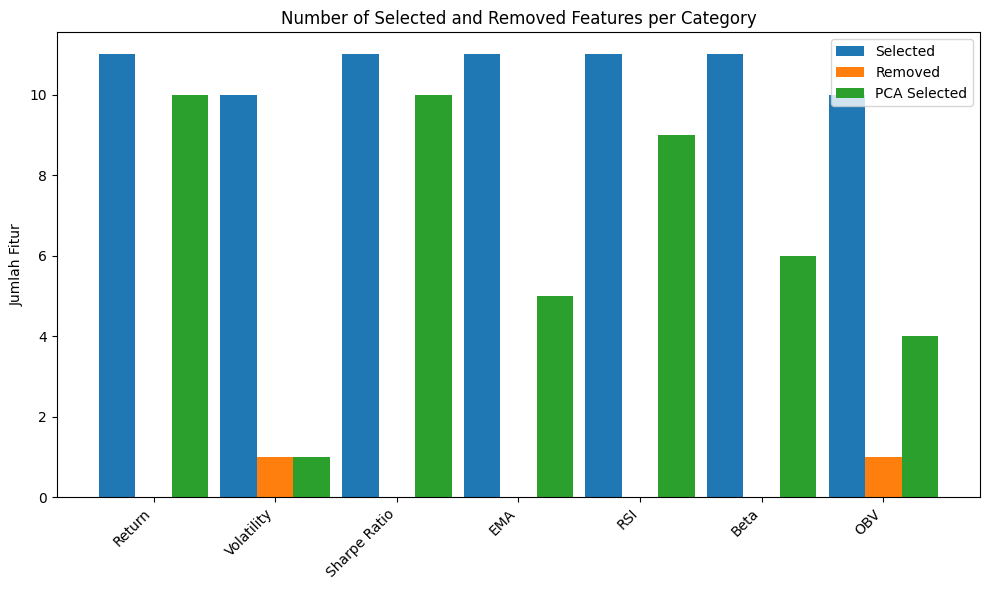

In [145]:
# 2. Bar plot: fitur dipilih vs dihapus per kategori
fig, ax = plt.subplots(figsize=(10,6))
width = 0.3
x = np.arange(len(summary_df))

ax.bar(x - width, summary_df["Selected"], width, label="Selected")
ax.bar(x, summary_df["Removed"], width, label="Removed")
ax.bar(x + width, summary_df["PCA Selected"], width, label="PCA Selected")

ax.set_xticks(x)
ax.set_xticklabels(summary_df["Category"], rotation=45, ha="right")
ax.set_ylabel("Jumlah Fitur")
ax.set_title("Number of Selected and Removed Features per Category")
ax.legend()
plt.tight_layout()
plt.show()

Set dataset untuk clustering

Dataset Return

In [146]:
# Buat dictionary sektor -> dataframe
sektor_dict_return = {
    'Property': quarterly_returns_prop,
    'BasicMaterial': quarterly_returns_basicmaterial,
    'ConsumerCyclicals': quarterly_returns_consc,
    'ConsumerNonCyclicals': quarterly_returns_conscnon,
    'Energy': quarterly_returns_energy,
    'Finance': quarterly_returns_finance,
    'Health': quarterly_returns_health,
    'Industry': quarterly_returns_industri,
    'Infrastructure': quarterly_returns_infra,
    'Tech': quarterly_returns_tech,
    'Transport': quarterly_returns_transport,
}

# List untuk menyimpan hasil
all_sectors_long = []

# Loop setiap sektor dan ubah ke long format
for sektor, df in sektor_dict_return.items():
    df_long = df.copy()
    df_long.index.name = 'Date'
    df_long = df_long.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Nilai')
    df_long['Sektor'] = sektor
    all_sectors_long.append(df_long)

# Gabungkan semua sektor jadi satu dataframe
df_all_return = pd.concat(all_sectors_long, ignore_index=True)

# Urutkan berdasarkan tanggal jika perlu
df_all_return.sort_values(by='Date', inplace=True)
print(df_all_return)


           Date   Ticker     Nilai                Sektor
0    2014-06-30  APLN.JK -0.010601              Property
1161 2014-06-30  LPPF.JK  0.004137     ConsumerCyclicals
1204 2014-06-30  MAPI.JK -0.232357     ConsumerCyclicals
1247 2014-06-30  MNCN.JK  0.049429     ConsumerCyclicals
1290 2014-06-30  AALI.JK  0.096979  ConsumerNonCyclicals
...         ...      ...       ...                   ...
2536 2024-12-31  BCAP.JK -0.214286               Finance
2493 2024-12-31  BBTN.JK -0.213793               Finance
2450 2024-12-31  BBRI.JK -0.148384               Finance
2364 2024-12-31  BBKP.JK -0.156250               Finance
4559 2024-12-31  TMAS.JK -0.073826             Transport

[4560 rows x 4 columns]


Dataset Sharpe Ratio

In [147]:
# Buat dictionary sektor -> dataframe
sektor_dict_sharpe_ratio = {
    'Property': sharpe_ratio_quarterly_prop,
    'BasicMaterial': sharpe_ratio_quarterly_basicmaterial,
    'ConsumerCyclicals': sharpe_ratio_quarterly_consc,
    'ConsumerNonCyclicals': sharpe_ratio_quarterly_conscnon,
    'Energy': sharpe_ratio_quarterly_energy,
    'Finance': sharpe_ratio_quarterly_finance,
    'Health': sharpe_ratio_quarterly_health,
    'Industry': sharpe_ratio_quarterly_industri,
    'Infrastructure': sharpe_ratio_quarterly_infra,
    'Tech': sharpe_ratio_quarterly_tech,
    'Transport': sharpe_ratio_quarterly_transport,
}

# List untuk menyimpan hasil
all_sectors_long = []

# Loop setiap sektor dan ubah ke long format
for sektor, df in sektor_dict_sharpe_ratio.items():
    df_long = df.copy()
    df_long.index.name = 'Date'
    df_long = df_long.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Nilai')
    df_long['Sektor'] = sektor
    all_sectors_long.append(df_long)

# Gabungkan semua sektor jadi satu dataframe
df_all_sharpe_ratio = pd.concat(all_sectors_long, ignore_index=True)

# Urutkan berdasarkan tanggal jika perlu
df_all_sharpe_ratio.sort_values(by='Date', inplace=True)
print(df_all_sharpe_ratio)


           Date   Ticker     Nilai                Sektor
0    2014-06-30  APLN.JK -0.318063              Property
1161 2014-06-30  LPPF.JK -0.282178     ConsumerCyclicals
1204 2014-06-30  MAPI.JK -1.405019     ConsumerCyclicals
1247 2014-06-30  MNCN.JK -0.130108     ConsumerCyclicals
1290 2014-06-30  AALI.JK  0.113451  ConsumerNonCyclicals
...         ...      ...       ...                   ...
2536 2024-12-31  BCAP.JK -0.437033               Finance
2493 2024-12-31  BBTN.JK -1.335202               Finance
2450 2024-12-31  BBRI.JK -1.500159               Finance
2364 2024-12-31  BBKP.JK -0.621415               Finance
4559 2024-12-31  TMAS.JK -0.212242             Transport

[4560 rows x 4 columns]


Dataset EMA

In [148]:
# Buat dictionary sektor -> dataframe
sektor_dict_ema = {
    'Property': ema_3m_prop,
    'BasicMaterial': ema_3m_basicmaterial,
    'ConsumerCyclicals': ema_3m_consc,
    'ConsumerNonCyclicals': ema_3m_conscnon,
    'Energy': ema_3m_energy,
    'Finance': ema_3m_finance,
    'Health': ema_3m_health,
    'Industry': ema_3m_industri,
    'Infrastructure': ema_3m_infra,
    'Tech': ema_3m_tech,
    'Transport': ema_3m_transport,
}

# List untuk menyimpan hasil
all_sectors_long = []

# Loop setiap sektor dan ubah ke long format
for sektor, df in sektor_dict_ema.items():
    df_long = df.copy()
    df_long.index.name = 'Date'
    df_long = df_long.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Nilai')
    df_long['Sektor'] = sektor
    all_sectors_long.append(df_long)

# Gabungkan semua sektor jadi satu dataframe
df_all_ema = pd.concat(all_sectors_long, ignore_index=True)

# Urutkan berdasarkan tanggal jika perlu
df_all_ema.sort_values(by='Date', inplace=True)
print(df_all_ema)


             Date   Ticker         Nilai     Sektor
0      2014-01-02  APLN.JK    217.877884   Property
184892 2014-01-02  SRAJ.JK    227.013000     Health
114198 2014-01-02  AKRA.JK    581.385437     Energy
187611 2014-01-02  TSPC.JK   1981.689819     Health
8157   2014-01-02  CTRA.JK    675.267395   Property
...           ...      ...           ...        ...
212081 2024-12-30  LION.JK    358.376790   Industry
214800 2024-12-30  MLIA.JK    326.226626   Industry
217519 2024-12-30  UNTR.JK  24865.137611   Industry
187610 2024-12-30  SRAJ.JK   2745.796976     Health
299089 2024-12-30  TMAS.JK    136.883644  Transport

[299090 rows x 4 columns]


Dataset RSI

In [149]:
# Buat dictionary sektor -> dataframe
sektor_dict_rsi = {
    'Property': rsi_values_prop,
    'BasicMaterial': rsi_values_basicmaterial,
    'ConsumerCyclicals': rsi_values_consc,
    'ConsumerNonCyclicals': rsi_values_conscnon,
    'Energy': rsi_values_energy,
    'Finance': rsi_values_finance,
    'Health': rsi_values_health,
    'Industry': rsi_values_industri,
    'Infrastructure': rsi_values_infra,
    'Tech': rsi_values_tech,
    'Transport': rsi_values_transport,
}

# List untuk menyimpan hasil
all_sectors_long = []

# Loop setiap sektor dan ubah ke long format
for sektor, df in sektor_dict_rsi.items():
    df_long = df.copy()
    df_long.index.name = 'Date'
    df_long = df_long.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Nilai')
    df_long['Sektor'] = sektor
    all_sectors_long.append(df_long)

# Gabungkan semua sektor jadi satu dataframe
df_all_rsi = pd.concat(all_sectors_long, ignore_index=True)

# Urutkan berdasarkan tanggal jika perlu
df_all_rsi.sort_values(by='Date', inplace=True)
print(df_all_rsi)


             Date   Ticker      Nilai             Sektor
0      2014-04-04  APLN.JK  60.777384           Property
15936  2014-04-04  LPCK.JK  63.876040           Property
286848 2014-04-04  SMDR.JK  55.434783          Transport
58432  2014-04-04  BMTR.JK  60.332524  ConsumerCyclicals
284192 2014-04-04  NELY.JK  50.375946          Transport
...           ...      ...        ...                ...
207167 2024-12-30  LION.JK  50.539053           Industry
209823 2024-12-30  MLIA.JK  41.477687           Industry
212479 2024-12-30  UNTR.JK  52.396289           Industry
183263 2024-12-30  SRAJ.JK  43.643880             Health
292159 2024-12-30  TMAS.JK  46.727515          Transport

[292160 rows x 4 columns]


Dataset Beta

In [150]:
# Buat dictionary sektor -> dataframe
sektor_dict_beta = {
    'Property': beta_quarterly_prop,
    'BasicMaterial': beta_quarterly_basicmaterial,
    'ConsumerCyclicals': beta_quarterly_consc,
    'ConsumerNonCyclicals': beta_quarterly_conscnon,
    'Energy': beta_quarterly_energy,
    'Finance': beta_quarterly_finance,
    'Health': beta_quarterly_health,
    'Industry': beta_quarterly_industri,
    'Infrastructure': beta_quarterly_infra,
    'Tech': beta_quarterly_tech,
    'Transport': beta_quarterly_transport,
}

# List untuk menyimpan hasil
all_sectors_long = []

# Loop setiap sektor dan ubah ke long format
for sektor, df in sektor_dict_beta.items():
    df_long = df.copy()
    df_long.index.name = 'Date'
    df_long = df_long.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Nilai')
    df_long['Sektor'] = sektor
    all_sectors_long.append(df_long)

# Gabungkan semua sektor jadi satu dataframe
df_all_beta = pd.concat(all_sectors_long, ignore_index=True)

# Urutkan berdasarkan tanggal jika perlu
df_all_beta.sort_values(by='Date', inplace=True)

print(df_all_beta)




           Date   Ticker     Nilai     Sektor
0    2022-12-01  APLN.JK  0.708203   Property
644  2022-12-01  DOID.JK  0.000143     Energy
658  2022-12-01  DSSA.JK  0.018915     Energy
672  2022-12-01  ELSA.JK  0.140461     Energy
686  2022-12-01  ENRG.JK -0.188447     Energy
...         ...      ...       ...        ...
1293 2024-11-01  ASSA.JK -0.044702  Transport
27   2024-11-01  ASRI.JK  0.305120   Property
111  2024-11-01  LPKR.JK  0.093933   Property
848  2024-11-01  KLBF.JK  0.007928     Health
1405 2024-11-01  TMAS.JK -0.317758  Transport

[1406 rows x 4 columns]


Dataset OBV

In [151]:
# Buat dictionary sektor -> dataframe
sektor_dict_obv = {
    'Property': obv_3m_prop,
    'BasicMaterial': obv_3m_basicmaterial,
    'ConsumerCyclicals': obv_3m_consc,
    'ConsumerNonCyclicals': obv_3m_conscnon,
    'Energy': obv_3m_energy,
    'Finance': obv_3m_finance,
    'Health': obv_3m_health,
    'Industry': obv_3m_industri,
    'Infrastructure': obv_3m_infra,
    'Tech': obv_3m_tech,
    'Transport': obv_3m_transport
}

# List untuk menyimpan hasil
all_sectors_long = []

# Loop setiap sektor dan ubah ke long format
for sektor, df in sektor_dict_obv.items():
    df_long = df.copy()
    df_long.index.name = 'Date'
    df_long = df_long.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Nilai')
    df_long['Sektor'] = sektor
    all_sectors_long.append(df_long)

# Gabungkan semua sektor jadi satu dataframe
df_all_obv = pd.concat(all_sectors_long, ignore_index=True)

# Urutkan berdasarkan tanggal jika perlu
df_all_obv.sort_values(by='Date', inplace=True)
print(df_all_obv)


             Date   Ticker         Nilai             Sektor
0      2014-04-03  APLN.JK  3.952147e+08           Property
199275 2014-04-03  JTPE.JK  1.037313e+08           Industry
289613 2014-04-03  TMAS.JK  0.000000e+00          Transport
61111  2014-04-03  ERAA.JK  1.379028e+09  ConsumerCyclicals
196618 2014-04-03  HEXA.JK  6.831981e+06           Industry
...           ...      ...           ...                ...
207245 2024-12-30  LION.JK -3.436807e+07           Industry
209902 2024-12-30  MLIA.JK  1.130655e+09           Industry
212559 2024-12-30  UNTR.JK  3.006256e+08           Industry
183332 2024-12-30  SRAJ.JK  1.521266e+09             Health
292269 2024-12-30  TMAS.JK  1.537355e+10          Transport

[292270 rows x 4 columns]


Dataset MACD

In [152]:
# Buat dictionary sektor -> dataframe
sektor_dict_MACD = {
    'Property': macd_quarter_prop,
    'BasicMaterial': macd_quarter_basicmaterial,
    'ConsumerCyclicals': macd_quarter_Consc,
    'ConsumerNonCyclicals': macd_quarter_Conscnon,
    'Energy': macd_quarter_energy,
    'Finance': macd_quarter_finance,
    'Health': macd_quarter_health,
    'Industry': macd_quarter_industri,
    'Infrastructure': macd_quarter_infra,
    'Tech': macd_quarter_tech,
    'Transport': macd_quarter_transport
}

# List untuk menyimpan hasil
all_sectors_long = []

# Loop setiap sektor dan tambahkan kolom 'Sektor'
for sektor, df in sektor_dict_MACD.items():
    df_long = df.copy()
    
    df_long['Sektor'] = sektor
    all_sectors_long.append(df_long)

# Gabungkan semua sektor
df_all_macd = pd.concat(all_sectors_long, ignore_index=True)

# Urutkan jika perlu
df_all_macd.sort_values(by='Tanggal', inplace=True)
print(df_all_macd)


        Tanggal   Ticker        MACD         Sektor
0    2014-03-31  APLN.JK    3.550799       Property
792  2014-03-31  LTLS.JK    1.735555  BasicMaterial
4048 2014-03-31  KIOS.JK    0.000000           Tech
836  2014-03-31  SMBR.JK    4.924100  BasicMaterial
4004 2014-03-31  EMTK.JK    1.566733           Tech
...         ...      ...         ...            ...
3343 2024-12-31  JTPE.JK   -3.901669       Industry
3387 2024-12-31  KBLI.JK   -4.453894       Industry
3431 2024-12-31  LION.JK  -11.562287       Industry
3519 2024-12-31  UNTR.JK  117.056657       Industry
4839 2024-12-31  TMAS.JK   -1.248653      Transport

[4840 rows x 4 columns]


Dataset clustering

In [153]:
from sklearn.cluster import KMeans

# Tambahkan kolom 'Fitur' ke setiap DataFrame
df_all_return['Fitur'] = 'Return'
df_all_sharpe_ratio['Fitur'] = 'SharpeRatio'
df_all_ema['Fitur'] = 'EMA'
df_all_rsi['Fitur'] = 'RSI'
df_all_beta['Fitur'] = 'Beta'
df_all_obv['Fitur'] = 'OBV'

# Gabungkan semua DataFrame menjadi satu
df_all = pd.concat([
    df_all_return,
    df_all_sharpe_ratio,
    df_all_ema,
    df_all_rsi,
    df_all_beta,
    df_all_obv
], ignore_index=True)

# Ubah ke format wide (pivot) untuk menyatukan nilai fitur per Date-Ticker
df_stocks = df_all.pivot_table(
    index=['Date', 'Ticker', 'Sektor'],
    columns='Fitur',
    values='Nilai'
).reset_index()

# Optional: rapikan nama kolom jika perlu
df_stocks.columns.name = None

df_stocks.replace([np.inf, -np.inf], np.nan, inplace=True)
df_stocks.fillna(df_stocks.mean(numeric_only=True), inplace=True)

# Lihat hasil
print(df_stocks)


             Date   Ticker                Sektor      Beta           EMA  \
0      2014-01-02  AALI.JK  ConsumerNonCyclicals  0.097626  17357.486328   
1      2014-01-02  ABMM.JK                Energy  0.097626   2172.997559   
2      2014-01-02  ACES.JK     ConsumerCyclicals  0.097626    476.278015   
3      2014-01-02  ADHI.JK        Infrastructure  0.097626   1056.998413   
4      2014-01-02  ADRO.JK                Energy  0.097626    289.907654   
...           ...      ...                   ...       ...           ...   
301235 2024-12-31  TBIG.JK        Infrastructure  0.097626   1895.566302   
301236 2024-12-31  TLKM.JK        Infrastructure  0.097626   1895.566302   
301237 2024-12-31  TMAS.JK             Transport  0.097626   1895.566302   
301238 2024-12-31  TSPC.JK                Health  0.097626   1895.566302   
301239 2024-12-31  UNTR.JK              Industry  0.097626   1895.566302   

                 OBV       RSI    Return  SharpeRatio  
0       3.697093e+09  48.84719 

Data train & test

In [154]:
from sklearn.model_selection import train_test_split

# Pastikan data terurut berdasarkan tanggal
df_stocks.sort_values(by='Date', inplace=True)

# Hitung index batas 70%
split_index = int(0.7 * len(df_stocks))

# Bagi data
train_data = df_stocks.iloc[:split_index].reset_index(drop=True)
test_data = df_stocks.iloc[split_index:].reset_index(drop=True)


# Cek ukuran
print(f"Train size: {train_data.shape}")
print(f"Test size: {test_data.shape}")


Train size: (210868, 9)
Test size: (90372, 9)


Clustering (K-Means)

Elbow Methode (Mencari K)

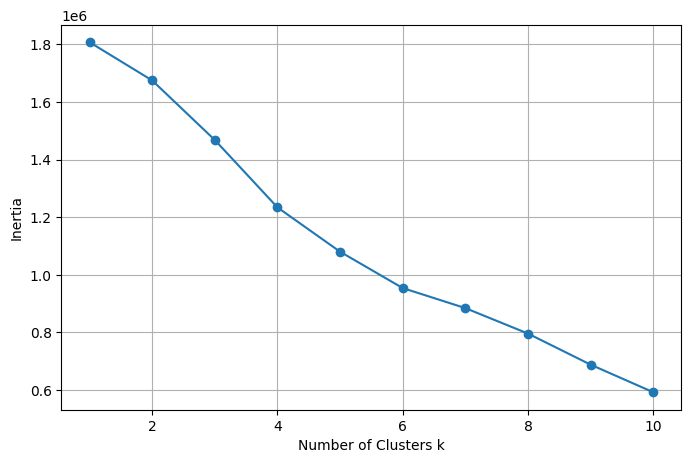

In [155]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Ambil hanya kolom fitur numerik
fitur_numerik = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']
X = df_stocks[fitur_numerik]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
K = range(1, 11)  # Uji jumlah cluster dari 1 sampai 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Clustering

In [156]:
# import pandas as pd
# from tsfresh import extract_features
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # 1. Siapkan data dan ubah nama kolom sesuai kebutuhan tsfresh
# df_ts = train_data.copy()
# df_ts['Date'] = pd.to_datetime(df_ts['Date'])
# df_ts = df_ts.sort_values(by=['Ticker', 'Date'])
# df_ts = df_ts.rename(columns={'Ticker': 'id', 'Date': 'time'})  # tsfresh expects 'id' and 'time'

# # 2. Pilih fitur numerik time-series
# ts_features = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']

# # 3. Ekstraksi fitur embedding time series dari tsfresh
# extracted_features = extract_features(df_ts[['id', 'time'] + ts_features],
#                                       column_id='id', column_sort='time', disable_progressbar=True)

# # 4. Bersihkan dan normalisasi
# extracted_features_clean = extracted_features.dropna(axis=1)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(extracted_features_clean)

# # 5. Lakukan clustering
# kmeans = KMeans(n_clusters=8, random_state=42)
# clusters = kmeans.fit_predict(X_scaled)

# # 6. Gabungkan hasil clustering dengan ticker
# ticker_cluster_df = pd.DataFrame({
#     'Ticker': extracted_features_clean.index,
#     'Cluster': clusters
# })

# # 7. Gabungkan kembali ke train_data untuk dapatkan kolom Date, Ticker, Cluster
# result = train_data.copy()
# result = result.merge(ticker_cluster_df, left_on='Ticker', right_on='Ticker')
# kmeans_data = result[['Date', 'Ticker', 'Cluster','Sektor']].drop_duplicates()

# # 8. Tampilkan hasil akhir
# print(kmeans_data.sort_values(by=['Date', 'Ticker', 'Cluster', 'Sektor']))


In [157]:
import pandas as pd
from tsfresh import extract_features
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Siapkan data dan ubah nama kolom sesuai kebutuhan tsfresh
df_ts = train_data.copy()
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts = df_ts.sort_values(by=['Ticker', 'Date'])
df_ts = df_ts.rename(columns={'Ticker': 'id', 'Date': 'time'})  # tsfresh expects 'id' and 'time'

# 2. Pilih fitur numerik time-series
ts_features = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']

# 3. Ekstraksi fitur embedding time series dari tsfresh
extracted_features = extract_features(df_ts[['id', 'time'] + ts_features],
                                      column_id='id', column_sort='time', disable_progressbar=True)

# 4. Bersihkan dan normalisasi
extracted_features_clean = extracted_features.dropna(axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(extracted_features_clean)

# 5. Lakukan clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 6. Gabungkan hasil clustering dengan ticker
ticker_cluster_df = pd.DataFrame({
    'Ticker': extracted_features_clean.index,
    'Cluster': clusters
})

# 7. Gabungkan kembali ke train_data untuk dapatkan kolom Date, Ticker, Cluster
result = train_data.copy()
result = result.merge(ticker_cluster_df, left_on='Ticker', right_on='Ticker')
kmeans_data = result[['Date', 'Ticker', 'Cluster','Sektor']].drop_duplicates()

# 8. Tampilkan hasil akhir
print(kmeans_data.sort_values(by=['Date', 'Ticker', 'Cluster', 'Sektor']))


             Date   Ticker  Cluster                Sektor
0      2014-01-02  AALI.JK        4  ConsumerNonCyclicals
79     2014-01-02  ABMM.JK        4                Energy
78     2014-01-02  ACES.JK        0     ConsumerCyclicals
77     2014-01-02  ADHI.JK        2        Infrastructure
76     2014-01-02  ADRO.JK        2                Energy
...           ...      ...      ...                   ...
210853 2021-08-24  SSIA.JK        1        Infrastructure
210852 2021-08-24  TBIG.JK        1        Infrastructure
210851 2021-08-24  TLKM.JK        1        Infrastructure
210850 2021-08-24  TMAS.JK        1             Transport
210849 2021-08-24  TSPC.JK        4                Health

[210868 rows x 4 columns]


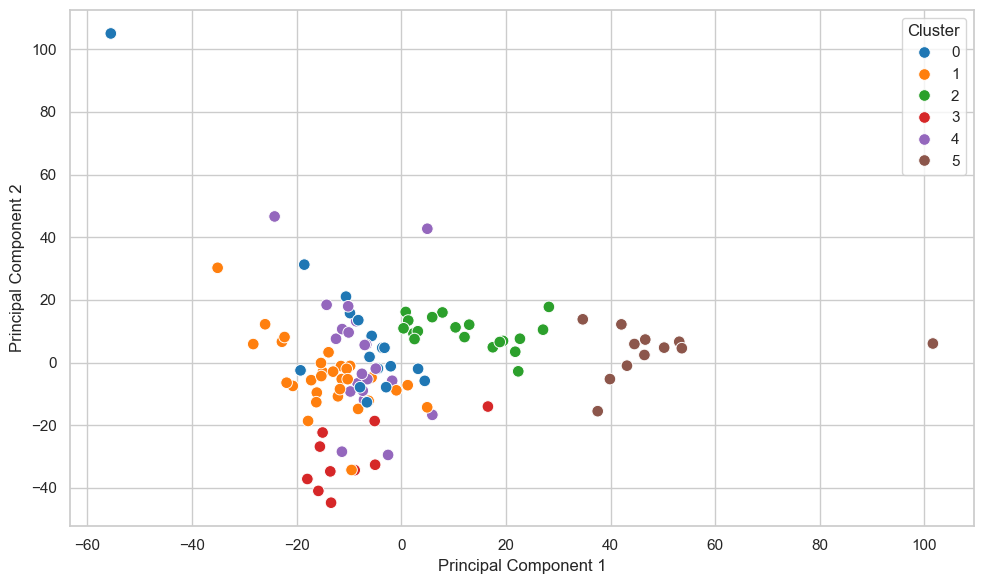

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# PCA untuk proyeksi fitur ke 2D dan warna berdasarkan cluster
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters
pca_df['Ticker'] = extracted_features_clean.index

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=70)
# plt.title('K-Means Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


Plot K-means

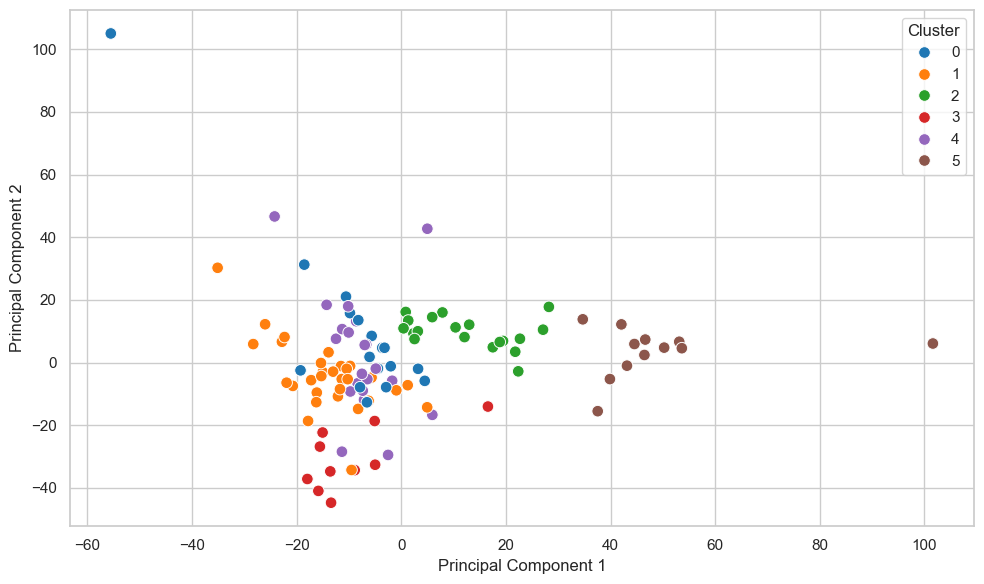

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# PCA untuk proyeksi fitur ke 2D dan warna berdasarkan cluster
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters
pca_df['Ticker'] = extracted_features_clean.index

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=70)
# plt.title('K-Means Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


Centroid K-means

In [160]:
# Buat DataFrame dari fitur hasil scaling
X_scaled_df = pd.DataFrame(X_scaled, index=extracted_features_clean.index)

# Tambahkan kolom cluster ke DataFrame tersebut
X_scaled_df['Cluster'] = clusters

# Hitung centroid: rata-rata fitur per cluster
centroids = X_scaled_df.groupby('Cluster').mean()

# Tampilkan centroid tiap cluster
print("Centroid tiap Cluster:")
print(centroids)


Centroid tiap Cluster:
         0         1         2     3         4         5         6     \
Cluster                                                                 
0         0.0  0.005690 -0.286326   0.0  0.213638  0.209339  0.427398   
1         0.0  0.067711 -0.175429   0.0  0.097887  0.062931  0.222605   
2         0.0 -0.320737 -0.161254   0.0  0.081660 -0.013761  0.240627   
3         0.0  0.067711  0.632533   0.0 -0.566362 -0.372991 -0.471681   
4         0.0  0.168126  0.324738   0.0 -0.046230  0.028053 -0.675677   
5         0.0 -0.020152  0.004118   0.0 -0.123795 -0.170369  0.032517   

             7         8         9     ...      4629      4630      4631  \
Cluster                                ...                                 
0        0.124665  0.211986  0.280493  ... -0.032153  0.041357  0.047451   
1        0.029152 -0.431999  0.138512  ...  0.150267  0.095642  0.064874   
2       -0.258314  0.520257  0.156167  ... -0.384376 -0.347835 -0.307590   
3        0.6

In [161]:
from scipy.spatial.distance import pdist, squareform
import pandas as pd


# Hitung pairwise Euclidean distances antar centroid
distance_matrix = pd.DataFrame(
    squareform(pdist(centroids.values, metric='euclidean')),
    index=centroids.index,
    columns=centroids.index
)

# Tampilkan matriks jarak antar centroid
print("Matriks Jarak Euclidean antar Centroid:")
print(distance_matrix)


Matriks Jarak Euclidean antar Centroid:
Cluster          0          1          2          3          4          5
Cluster                                                                  
0         0.000000  39.315631  35.124245  53.570153  29.389656  63.821464
1        39.315631   0.000000  42.323412  53.104591  44.455203  68.847396
2        35.124245  42.323412   0.000000  60.122394  39.435894  49.350363
3        53.570153  53.104591  60.122394   0.000000  54.137357  75.010272
4        29.389656  44.455203  39.435894  54.137357   0.000000  65.302158
5        63.821464  68.847396  49.350363  75.010272  65.302158   0.000000


Agglomerative Clustering

Elbow Methode

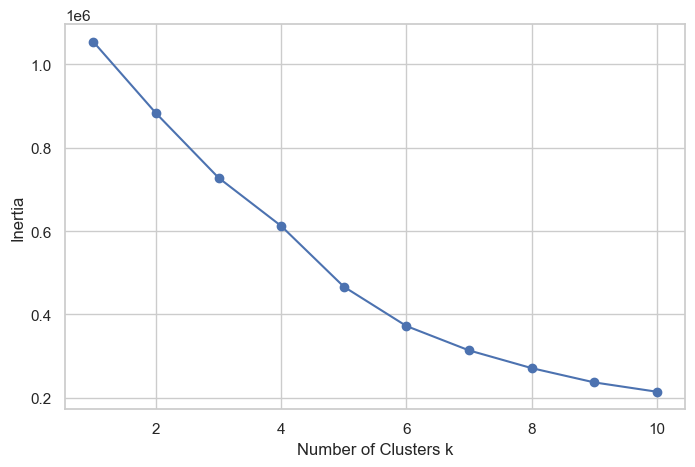

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Gunakan data training dari kode sebelumnya
# Ambil hanya fitur numerik dari train_data
X = train_data[['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hitung inertia untuk berbagai jumlah cluster
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.ylabel('Inertia')
# plt.title('Elbow Method - Determining the Optimal Number of Clusters')
plt.xlabel('Number of Clusters k')
plt.grid(True)
plt.show()


K optimal berdasarkan Elbow Method: 6


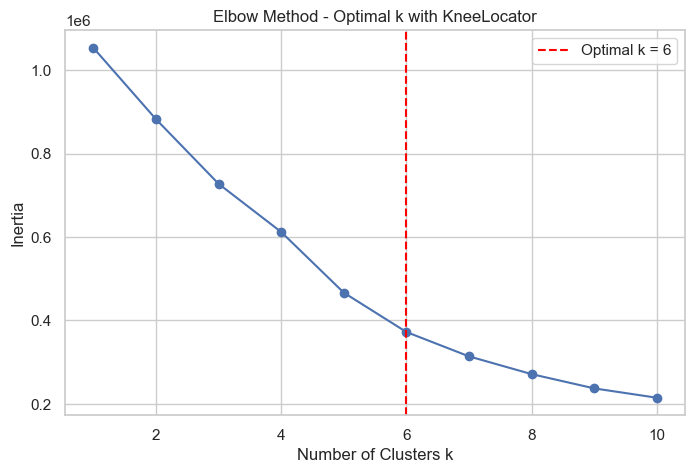

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# Ambil fitur numerik
X = train_data[['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hitung inertia untuk berbagai jumlah cluster
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gunakan KneeLocator untuk mencari titik tekukan
knee = KneeLocator(
    k_range, inertia, curve="convex", direction="decreasing"
)

optimal_k = knee.knee
print(f"K optimal berdasarkan Elbow Method: {optimal_k}")

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal k with KneeLocator')
plt.legend()
plt.grid(True)
plt.show()


Clustering

In [164]:
# import pandas as pd
# from tsfresh import extract_features
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.preprocessing import StandardScaler

# # Salin dan siapkan data
# df_ts = train_data.copy()
# df_ts['Date'] = pd.to_datetime(df_ts['Date'])
# df_ts = df_ts.sort_values(by=['Ticker', 'Date'])

# # Rename kolom agar sesuai dengan format tsfresh
# df_ts = df_ts.rename(columns={'Ticker': 'id', 'Date': 'time'})  # tsfresh expects 'id' and 'time'

# # Pilih fitur numerik time-series
# ts_features = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']

# # Ekstraksi fitur time-series embedding per ticker
# extracted_features = extract_features(df_ts[['id', 'time'] + ts_features],
#                                       column_id='id', column_sort='time', disable_progressbar=True)

# # Hapus kolom dengan NaN
# extracted_features_clean = extracted_features.dropna(axis=1)

# # Normalisasi
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(extracted_features_clean)

# # Clustering dengan Agglomerative
# agglo = AgglomerativeClustering(n_clusters=8, linkage='ward')
# clusters = agglo.fit_predict(X_scaled)

# # Gabungkan hasil clustering ke indeks ticker
# ticker_cluster_df = pd.DataFrame({
#     'Ticker': extracted_features_clean.index,
#     'Cluster': clusters
# })

# # Gabungkan kembali ke train_data untuk dapatkan info Date dan Sektor
# df_aglo = train_data.copy()
# df_aglo = pd.merge(df_aglo, ticker_cluster_df, on='Ticker', how='left')

# # Tampilkan hasil akhir
# print(df_aglo[['Date', 'Ticker', 'Sektor', 'Cluster']])


In [165]:
import pandas as pd
from tsfresh import extract_features
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Salin dan siapkan data
df_ts = train_data.copy()
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts = df_ts.sort_values(by=['Ticker', 'Date'])

# Rename kolom agar sesuai dengan format tsfresh
df_ts = df_ts.rename(columns={'Ticker': 'id', 'Date': 'time'})  # tsfresh expects 'id' and 'time'

# Pilih fitur numerik time-series
ts_features = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']

# Ekstraksi fitur time-series embedding per ticker
extracted_features = extract_features(df_ts[['id', 'time'] + ts_features],
                                      column_id='id', column_sort='time', disable_progressbar=True)

# Hapus kolom dengan NaN
extracted_features_clean = extracted_features.dropna(axis=1)

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(extracted_features_clean)

# Clustering dengan Agglomerative
agglo = AgglomerativeClustering(n_clusters=6, linkage='ward')
clusters = agglo.fit_predict(X_scaled)

# Gabungkan hasil clustering ke indeks ticker
ticker_cluster_df = pd.DataFrame({
    'Ticker': extracted_features_clean.index,
    'Cluster': clusters
})

# Gabungkan kembali ke train_data untuk dapatkan info Date dan Sektor
df_aglo = train_data.copy()
df_aglo = pd.merge(df_aglo, ticker_cluster_df, on='Ticker', how='left')

# Tampilkan hasil akhir
print(df_aglo[['Date', 'Ticker', 'Sektor', 'Cluster']])


             Date   Ticker                Sektor  Cluster
0      2014-01-02  AALI.JK  ConsumerNonCyclicals        3
1      2014-01-02  MAPI.JK     ConsumerCyclicals        3
2      2014-01-02  LTLS.JK         BasicMaterial        3
3      2014-01-02  LPPF.JK     ConsumerCyclicals        3
4      2014-01-02  LPKR.JK              Property        0
...           ...      ...                   ...      ...
210863 2021-08-24  PTSN.JK                  Tech        4
210864 2021-08-24  PTPP.JK        Infrastructure        3
210865 2021-08-24  NELY.JK             Transport        3
210866 2021-08-24  MTDL.JK                  Tech        4
210867 2021-08-24  MNCN.JK     ConsumerCyclicals        3

[210868 rows x 4 columns]


Plot Agglomerative

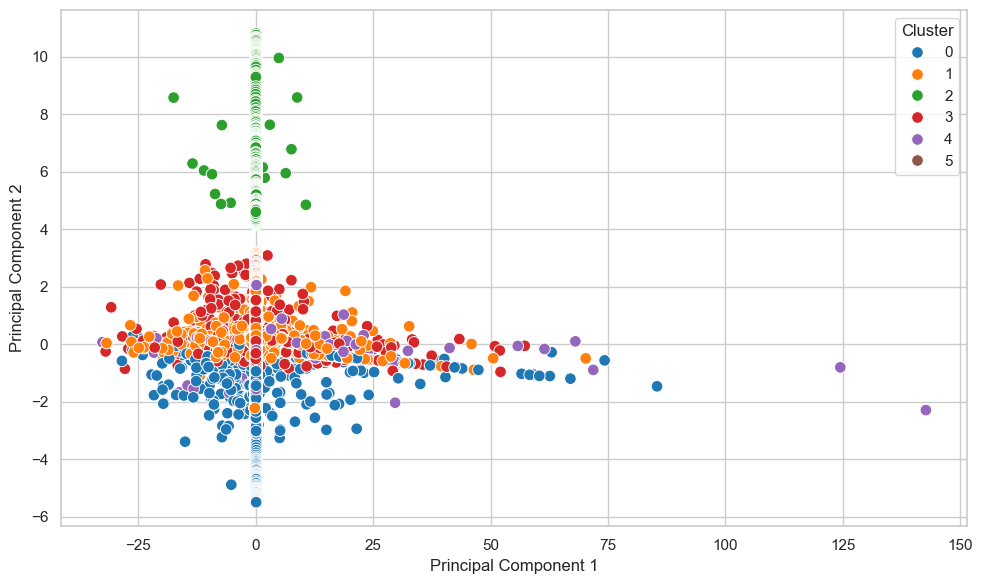

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set style
sns.set(style="whitegrid")

# 3. PCA untuk fitur numerik pada df_aglo
features = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']

# Pastikan kolom ada di df_aglo
X = df_aglo[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_aglo['Cluster'].values
pca_df['Ticker'] = df_aglo['Ticker'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=70)
# plt.title('Aglomerative Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


Centroid

In [167]:
# Ambil hanya fitur numerik
feature_cols = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']

# Hitung mean per cluster
centroids = df_aglo.groupby('Cluster')[feature_cols].mean().reset_index()

print(centroids)


   Cluster    Return  SharpeRatio           EMA        RSI      Beta  \
0        0  0.035626    -0.125797    757.370815  48.849979  0.097626   
1        1  0.035238    -0.127419   1365.538463  48.671857  0.097626   
2        2  0.035128    -0.128575  45954.467768  50.176963  0.097626   
3        3  0.035350    -0.126798   2326.805435  49.876680  0.097626   
4        4  0.036508    -0.124160    468.259965  43.361568  0.097626   
5        5  0.034731    -0.135085   1016.010869  48.774849  0.097626   

            OBV  
0  7.200022e+09  
1  6.425459e+08  
2  1.698119e+08  
3  1.158479e+09  
4  1.075211e+09  
5  1.921983e+08  


In [168]:
from scipy.spatial.distance import pdist, squareform

# Ambil hanya kolom fitur numerik dari centroid
centroid_values = centroids[['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']].values

# Hitung matriks jarak (Euclidean distance)
distance_matrix = squareform(pdist(centroid_values, metric='euclidean'))

# Buat DataFrame jarak antar centroid
import pandas as pd
distance_df = pd.DataFrame(distance_matrix, 
                           index=[f'Cluster {i}' for i in centroids['Cluster']],
                           columns=[f'Cluster {i}' for i in centroids['Cluster']])

print(distance_df)


              Cluster 0     Cluster 1     Cluster 2     Cluster 3  \
Cluster 0  0.000000e+00  6.557476e+09  7.030210e+09  6.041543e+09   
Cluster 1  6.557476e+09  0.000000e+00  4.727339e+08  5.159331e+08   
Cluster 2  7.030210e+09  4.727339e+08  0.000000e+00  9.886670e+08   
Cluster 3  6.041543e+09  5.159331e+08  9.886670e+08  0.000000e+00   
Cluster 4  6.124810e+09  4.326655e+08  9.053995e+08  8.326754e+07   
Cluster 5  7.007823e+09  4.503476e+08  2.238637e+07  9.662807e+08   

              Cluster 4     Cluster 5  
Cluster 0  6.124810e+09  7.007823e+09  
Cluster 1  4.326655e+08  4.503476e+08  
Cluster 2  9.053995e+08  2.238637e+07  
Cluster 3  8.326754e+07  9.662807e+08  
Cluster 4  0.000000e+00  8.830132e+08  
Cluster 5  8.830132e+08  0.000000e+00  


DBSCAN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

# --- Siapkan data dan ekstraksi fitur sama seperti sebelumnya ---

df_ts = train_data.copy()
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts = df_ts.sort_values(by=['Ticker', 'Date'])
df_ts = df_ts.rename(columns={'Ticker': 'id', 'Date': 'time'})

ts_features = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']

extracted_features = extract_features(
    df_ts[['id', 'time'] + ts_features],
    column_id='id',
    column_sort='time',
    disable_progressbar=True
)

impute(extracted_features)
extracted_features = extracted_features.loc[:, (extracted_features != 0).any(axis=0)]
extracted_features = extracted_features.loc[:, extracted_features.var() > 1e-5]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(extracted_features)

pca = PCA(n_components=2)  # PCA 2 komponen untuk visualisasi
X_pca = pca.fit_transform(X_scaled)

# Cari eps dengan elbow method menggunakan k-distance plot
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

sample_size = 10000
X_sample = X_pca if X_pca.shape[0] <= sample_size else X_pca[np.random.choice(X_pca.shape[0], sample_size, replace=False)]

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_sample)
distances, indices = neighbors_fit.kneighbors(X_sample)
distances = np.sort(distances[:, 4])

kneedle = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
elbow_index = kneedle.knee
elbow_value = distances[elbow_index]
print(f"\n📌 Rekomendasi nilai eps berdasarkan elbow: {elbow_value:.3f}")

# Tuning eps dan min_samples dengan silhouette score
eps_candidates = np.linspace(elbow_value * 0.3, elbow_value * 1.2, 20)
min_samples_candidates = range(2, 11)  # dari 2 sampai 10

best_eps = None
best_min_samples = None
best_score = -1
best_labels = None

print("\n🔍 Mulai tuning eps dan min samples dengan silhouette score:")

for min_samples in tqdm(min_samples_candidates, desc='min samples'):
    for eps in eps_candidates:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters <= 1:
            continue
        try:
            score = silhouette_score(X_pca, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels
        except:
            pass

print(f"\n🔎 Best eps: {best_eps:.3f} with min samples: {best_min_samples} and silhouette score: {best_score:.4f}")

# # Visualisasi hasil cluster terbaik
# plt.figure(figsize=(8,6))
# unique_labels = set(best_labels)
# colors = plt.cm.get_cmap('tab10', len(unique_labels))

# for k in unique_labels:
#     class_member_mask = (best_labels == k)
#     xy = X_pca[class_member_mask]
#     if k == -1:
#         # Noise = hitam
#         plt.scatter(xy[:, 0], xy[:, 1], c='k', marker='x', label='Noise')
#     else:
#         plt.scatter(xy[:, 0], xy[:, 1], c=[colors(k)], label=f'Cluster {k}')

# plt.title(f'DBSCAN Clustering')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.legend()
# plt.show()

# Simpan hasil clustering ke dataframe
df_dbscan = pd.DataFrame({
    'Ticker': extracted_features.index,
    'Cluster': best_labels
}).reset_index(drop=True)

# Gabungkan info sektor
result_dbscan = train_data[['Ticker', 'Sektor']].drop_duplicates().merge(
    df_dbscan, on='Ticker', how='inner'
)

print("\n📊 Distribusi Cluster:")
print(df_dbscan['Cluster'].value_counts())

print("\n📋 Contoh hasil cluster:")
print(`result_dbscan`.head())


c:\Users\Naufal\AppData\Local\Programs\Python\Python311\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['Beta__autocorrelation__lag_0' 'Beta__autocorrelation__lag_1'
 'Beta__autocorrelation__lag_2' 'Beta__autocorrelation__lag_3'
 'Beta__autocorrelation__lag_4' 'Beta__autocorrelation__lag_5'
 'Beta__autocorrelation__lag_6' 'Beta__autocorrelation__lag_7'
 'Beta__autocorrelation__lag_8' 'Beta__autocorrelation__lag_9'
 'Beta__partial_autocorrelation__lag_2'
 'Beta__partial_autocorrelation__lag_3'
 'Beta__partial_autocorrelation__lag_4'
 'Beta__partial_autocorrelation__lag_5'
 'Beta__partial_autocorrelation__lag_6'
 'Beta__partial_autocorrelation__lag_7'
 'Beta__partial_autocorrelation__lag_8'
 'Beta__partial_autocorrelation__lag_9'
 'Beta__fft_aggregated__aggtype_"skew"'
 'Beta__fft_aggregated__aggtype_"kurtosis"'
 'Beta__friedrich_coefficients__coeff_0__m_3__r_30'
 'Beta__friedrich_coefficients__coeff_1__m_3__r_30'
 'Beta__friedrich_coefficient


📌 Rekomendasi nilai eps berdasarkan elbow: 11.201

🔍 Mulai tuning eps dan min samples dengan silhouette score:


min samples: 100%|██████████| 9/9 [00:00<00:00, 25.00it/s]


🔎 Best eps: 11.849 with min samples: 9 and silhouette score: 0.5375

📊 Distribusi Cluster:
Cluster
 0    91
 1    11
-1     7
Name: count, dtype: int64

📋 Contoh hasil cluster:
    Ticker                Sektor  Cluster
0  AALI.JK  ConsumerNonCyclicals       -1
1  MAPI.JK     ConsumerCyclicals        0
2  LTLS.JK         BasicMaterial        0
3  LPPF.JK     ConsumerCyclicals        0
4  LPKR.JK              Property        1


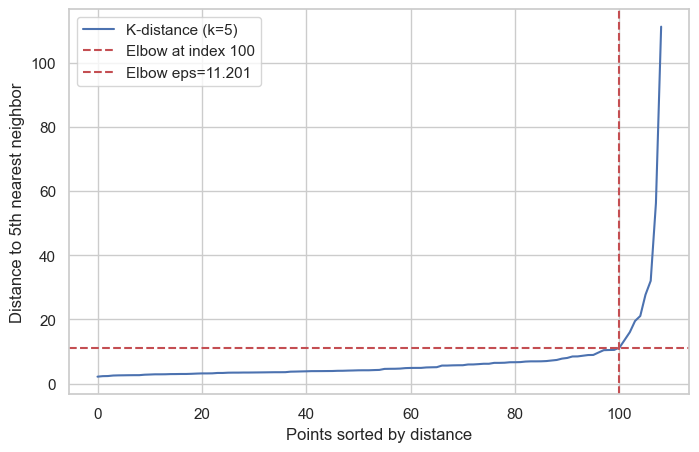

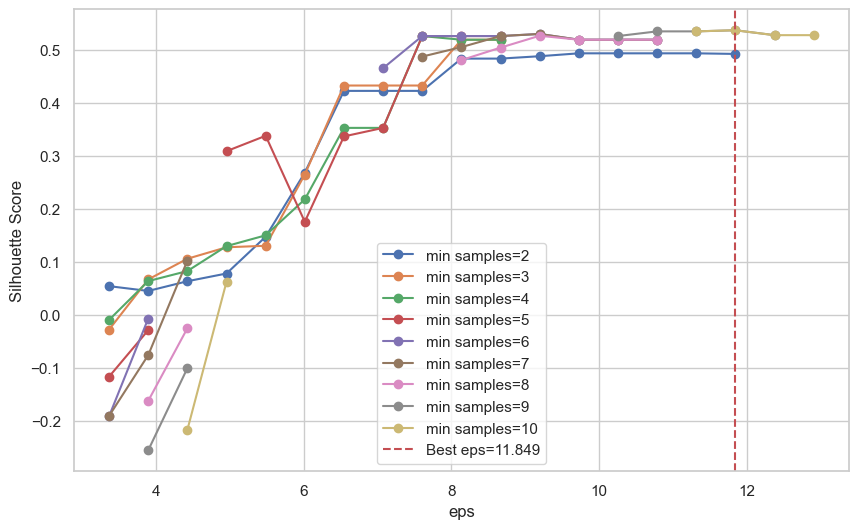

In [170]:
import matplotlib.pyplot as plt
import numpy as np

# --- Visualisasi Elbow Method (k-distance plot) ---
plt.figure(figsize=(8, 5))
plt.plot(range(len(distances)), distances, label='K-distance (k=5)')
if elbow_index is not None:
    plt.axvline(x=elbow_index, color='r', linestyle='--', label=f'Elbow at index {elbow_index}')
    plt.axhline(y=elbow_value, color='r', linestyle='--', label=f'Elbow eps={elbow_value:.3f}')
# plt.title('Elbow Method for estimating eps')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.legend()
plt.show()

# --- Visualisasi Silhouette Scores selama tuning ---
# Kita simpan dulu semua hasil tuning ke list agar bisa divisualisasi
silhouette_results = []

for min_samples in range(2, 11):
    for eps in eps_candidates:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters <= 1:
            silhouette_results.append((min_samples, eps, np.nan))
            continue
        try:
            score = silhouette_score(X_pca, labels)
            silhouette_results.append((min_samples, eps, score))
        except:
            silhouette_results.append((min_samples, eps, np.nan))

# Ubah ke numpy array untuk kemudahan plot
silhouette_results = np.array(silhouette_results, dtype=object)

# Plot silhouette score per min_samples dengan eps sebagai x-axis
plt.figure(figsize=(10, 6))
for min_samples in range(2, 11):
    mask = silhouette_results[:,0] == min_samples
    eps_vals = silhouette_results[mask, 1].astype(float)
    scores = silhouette_results[mask, 2].astype(float)
    plt.plot(eps_vals, scores, marker='o', label=f'min samples={min_samples}')

plt.axvline(x=best_eps, color='r', linestyle='--', label=f'Best eps={best_eps:.3f}')
# plt.title('Silhouette Scores for different eps and min_samples')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()


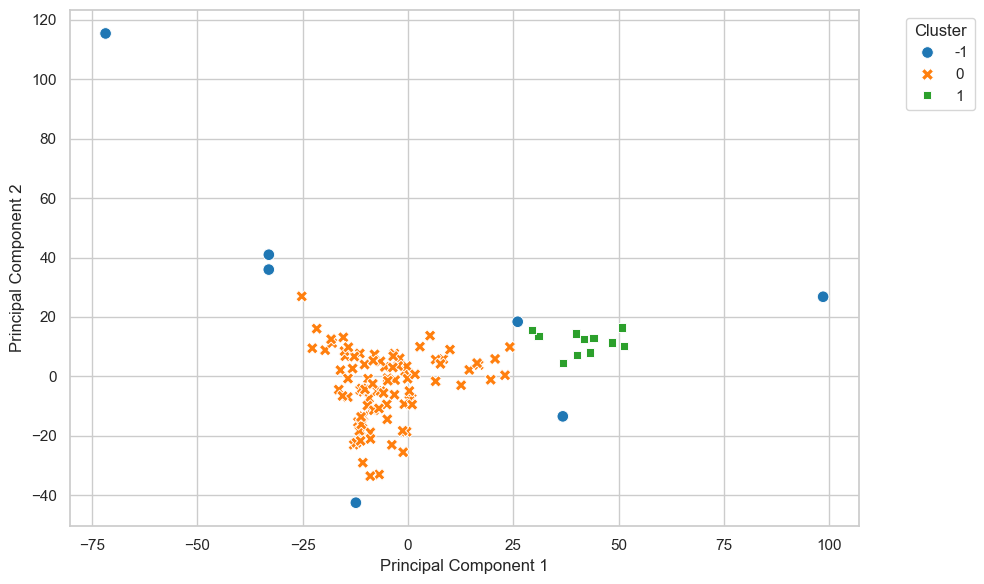

In [171]:
import seaborn as sns

# Buat DataFrame untuk visualisasi
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = best_labels
pca_df['Ticker'] = extracted_features.index

# Visualisasi menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='tab10',
    style=pca_df['Cluster'],
    s=70
)
# plt.title('DBSCAN Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Centroid

In [172]:
# # Ambil hanya fitur numerik
# feature_cols = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']

# # Hitung mean per cluster
# centroids = result_dbscan.groupby('Cluster')[feature_cols].mean().reset_index()

# print(centroids)


In [173]:
from scipy.spatial.distance import pdist, squareform

# Ambil hanya kolom fitur numerik dari centroid
centroid_values = centroids[['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']].values

# Hitung matriks jarak (Euclidean distance)
distance_matrix = squareform(pdist(centroid_values, metric='euclidean'))

# Buat DataFrame jarak antar centroid
import pandas as pd
distance_df = pd.DataFrame(distance_matrix, 
                           index=[f'Cluster {i}' for i in centroids['Cluster']],
                           columns=[f'Cluster {i}' for i in centroids['Cluster']])

print(distance_df)


              Cluster 0     Cluster 1     Cluster 2     Cluster 3  \
Cluster 0  0.000000e+00  6.557476e+09  7.030210e+09  6.041543e+09   
Cluster 1  6.557476e+09  0.000000e+00  4.727339e+08  5.159331e+08   
Cluster 2  7.030210e+09  4.727339e+08  0.000000e+00  9.886670e+08   
Cluster 3  6.041543e+09  5.159331e+08  9.886670e+08  0.000000e+00   
Cluster 4  6.124810e+09  4.326655e+08  9.053995e+08  8.326754e+07   
Cluster 5  7.007823e+09  4.503476e+08  2.238637e+07  9.662807e+08   

              Cluster 4     Cluster 5  
Cluster 0  6.124810e+09  7.007823e+09  
Cluster 1  4.326655e+08  4.503476e+08  
Cluster 2  9.053995e+08  2.238637e+07  
Cluster 3  8.326754e+07  9.662807e+08  
Cluster 4  0.000000e+00  8.830132e+08  
Cluster 5  8.830132e+08  0.000000e+00  


Inflasi

In [174]:
# Load dan bersihkan inflasi.csv
inflasi = pd.read_csv('Inflasi.csv', sep=';')
inflasi = inflasi.rename(columns={'Tanggal Penerbitan': 'Tanggal', 'Aktual': 'Inflasi'})

# Konversi
inflasi['Tanggal'] = pd.to_datetime(inflasi['Tanggal'], format='%d/%m/%Y')
inflasi['Inflasi'] = inflasi['Inflasi'].str.replace('%', '').str.replace(',', '.').astype(float) / 100
inflasi['Quarter'] = inflasi['Tanggal'].dt.to_period('Q')

# Rata-rata per kuartal
df_inflasi_q = inflasi.groupby('Quarter')['Inflasi'].mean().reset_index()

# Ubah Quarter ke format tanggal akhir kuartal (contoh: 2015Q2 → 2015-06-30)
df_inflasi_q['Tanggal'] = df_inflasi_q['Quarter'].dt.to_timestamp(how='end').dt.normalize()

# Drop kolom Quarter jika tidak dibutuhkan
df_inflasi_q = df_inflasi_q.drop(columns=['Quarter'])

# Lihat hasil
print(df_inflasi_q.head())


    Inflasi    Tanggal
0  0.005933 2014-03-31
1  0.000733 2014-06-30
2  0.006100 2014-09-30
3  0.007467 2014-12-31
4  0.006200 2015-03-31


DF MACD

In [175]:
ihsg = pd.read_csv('IHSG.csv', sep=';').dropna()
ihsg['Tanggal'] = pd.to_datetime(ihsg['Tanggal'], format='%d/%m/%Y')

def convert_number(x):
    return float(x.replace('.', '').replace(',', '.')) if isinstance(x, str) else x

for col in ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']:
    ihsg[col] = ihsg[col].apply(convert_number)

def convert_volume(x):
    if isinstance(x, str) and 'B' in x:
        return float(x.replace('B', '').replace(',', '.')) * 1e9
    return x

ihsg['Vol'] = ihsg['Vol'].apply(convert_volume)
ihsg['Perubahan'] = ihsg['Perubahan'].str.replace('%', '').str.replace(',', '.').astype(float) / 100

# MACD
ihsg['EMA12'] = ihsg['Terakhir'].ewm(span=12, adjust=False).mean()
ihsg['EMA26'] = ihsg['Terakhir'].ewm(span=26, adjust=False).mean()
ihsg['MACD'] = ihsg['EMA12'] - ihsg['EMA26']
ihsg['Quarter'] = ihsg['Tanggal'].dt.to_period('Q')

# Rata-rata MACD per kuartal
df_macd_q = ihsg.groupby('Quarter')['MACD'].mean().reset_index()

df_macd_q.head()


Quarter        MACD
0  2014Q1 -100.658503
1  2014Q2  -46.629003
2  2014Q3  -18.225836
3  2014Q4  -27.888555
4  2015Q1  -81.768635

Prediksi

kode prediksi menggunakan lstm

In [176]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # ======================
# # 1. PERSIAPAN DATA
# # ======================

# # Rename kolom agar konsisten
# df_macd = df_all_macd.rename(columns={'Tanggal': 'Date'})
# df_inflasi = df_inflasi_q.rename(columns={'Tanggal': 'Date'})

# # Filter hanya fitur 'SharpeRatio' dari dataframe sharpe
# sharpe_df = df_all_sharpe_ratio[df_all_sharpe_ratio['Fitur'] == 'SharpeRatio'].rename(columns={'Nilai': 'SharpeRatio'})

# # Hapus duplikat
# df_macd.drop_duplicates(subset=['Date', 'Ticker'], inplace=True)
# sharpe_df.drop_duplicates(subset=['Date', 'Ticker'], inplace=True)
# df_inflasi.drop_duplicates(subset=['Date'], inplace=True)

# # Gabungkan semua data
# df_merge = pd.merge(df_macd, sharpe_df[['Date', 'Ticker', 'SharpeRatio']], on=['Date', 'Ticker'], how='inner')
# df_full = pd.merge(df_merge, df_inflasi, on='Date', how='left')

# # Bersihkan data hasil merge
# df_full.drop_duplicates(subset=['Date', 'Ticker'], inplace=True)
# df_full.dropna(inplace=True)

# # ======================
# # 2. CLUSTERING & LSTM PER CLUSTER
# # ======================

# # Pastikan tidak ada duplikat ticker dalam cluster
# df_kmeans_data = df_aglo.drop_duplicates(subset=['Ticker', 'Cluster'])
# clusters = df_kmeans_data['Cluster'].unique()

# # Simpan hasil prediksi
# predictions = []

# # Fungsi pembuat sequence time-series
# def create_multivariate_dataset(X, y, dates, time_step=15):
#     Xs, ys, ds = [], [], []
#     for i in range(len(X) - time_step):
#         Xs.append(X[i:i + time_step])
#         ys.append(y[i + time_step])
#         ds.append(dates[i + time_step])
#     return np.array(Xs), np.array(ys), np.array(ds)

# time_step = 2

# # Loop per cluster
# for cluster in clusters:
#     tickers_in_cluster = df_kmeans_data[df_kmeans_data['Cluster'] == cluster]['Ticker'].unique()

#     for ticker in tickers_in_cluster:
#         print(f'Processing Ticker: {ticker}, Cluster: {cluster}')

#         # Ambil data untuk ticker terkait
#         df_ticker = df_full[df_full['Ticker'] == ticker].copy()
#         df_ticker.sort_values('Date', inplace=True)

#         # Ambil sektor jika tersedia
#         sector = df_ticker['Sektor'].iloc[0] if 'Sektor' in df_ticker.columns else 'Unknown'

#         # Lewati jika data terlalu pendek
#         if len(df_ticker) < 10:
#             print(f"Data terlalu sedikit untuk {ticker}, dilewati.")
#             continue

#         # Ambil fitur dan target
#         features = df_ticker[['MACD', 'Inflasi']].values
#         target = df_ticker['SharpeRatio'].values.reshape(-1, 1)

#         # Validasi nilai NaN dan Inf
#         mask = np.isfinite(features).all(axis=1) & np.isfinite(target).flatten()
#         if not np.any(mask):
#             print(f"Semua data tidak valid untuk ticker {ticker}, dilewati.")
#             continue

#         features = features[mask]
#         target = target[mask]
#         dates = df_ticker['Date'].values[mask]

#         # Normalisasi
#         scaler_X = MinMaxScaler()
#         scaler_y = MinMaxScaler()
#         X_scaled = scaler_X.fit_transform(features)
#         y_scaled = scaler_y.fit_transform(target)

#         # Buat sequence time-series
#         X_seq, y_seq, d_seq = create_multivariate_dataset(X_scaled, y_scaled, dates, time_step)

#         # Lewati jika data sequence terlalu pendek
#         if len(X_seq) < 10:
#             print(f"Data sequence terlalu pendek untuk {ticker}, dilewati.")
#             continue

#         # === PENTING ===
#         # Latih model dengan seluruh data sequence
#         model = Sequential([
#             LSTM(50, return_sequences=True, input_shape=(time_step, X_seq.shape[2])),
#             LSTM(50),
#             Dense(1)
#         ])
#         model.compile(optimizer='adam', loss='mean_squared_error')
#         model.fit(X_seq, y_seq, epochs=20, batch_size=16, verbose=0)

#         # Prediksi seluruh sequence (mulai dari awal)
#         y_pred_scaled = model.predict(X_seq)
#         y_pred = scaler_y.inverse_transform(y_pred_scaled)
#         y_true = scaler_y.inverse_transform(y_seq)

#         # Simpan hasil prediksi per tanggal
#         for date, true_val, pred_val in zip(d_seq, y_true.flatten(), y_pred.flatten()):
#             predictions.append({
#                 'Date': date,
#                 'Ticker': ticker,
#                 'Cluster': cluster,
#                 'True': true_val,
#                 'Predicted': pred_val,
#                 'Sector': sector
#             })

# # ======================
# # 3. HASIL PREDIKSI
# # ======================

# # Konversi ke DataFrame
# predictions_df_kmeans = pd.DataFrame(predictions)

# # Tampilkan 5 baris awal
# print(predictions_df_kmeans.head())

# # Simpan ke CSV
# predictions_df_kmeans.to_csv('predictions_aglo_revisi.csv', index=False)


Prediksi K-means

In [177]:
# Membaca data dari CSV
predictions_kmeans1 = pd.read_csv('predictions_kmeans_revisi.csv')
# Periksa beberapa baris pertama untuk memastikan data terformat dengan benar
print(predictions_kmeans1.head())

         Date   Ticker  Cluster      True  Predicted                Sector
0  2014-12-31  AALI.JK        4 -0.050764  -0.167452  ConsumerNonCyclicals
1  2015-03-31  AALI.JK        4 -0.380795  -0.268526  ConsumerNonCyclicals
2  2015-06-30  AALI.JK        4 -0.573326   0.195167  ConsumerNonCyclicals
3  2015-09-30  AALI.JK        4 -1.472354   0.180592  ConsumerNonCyclicals
4  2015-12-31  AALI.JK        4 -1.035034  -0.641231  ConsumerNonCyclicals


Memilih aset representatif

In [178]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# 1. Baca data
df = pd.read_csv('predictions_kmeans_revisi.csv')

# 2. Hitung MAE per Ticker di tiap Cluster
mae_per_ticker = (
    df.groupby(['Cluster', 'Ticker'])
    .apply(lambda x: mean_absolute_error(x['True'], x['Predicted']))
    .reset_index(name='MAE')
)

# 3. Ambil Ticker dengan MAE terkecil per Cluster
representative_tickers = (
    mae_per_ticker.sort_values('MAE')
    .groupby('Cluster')
    .first()
    .reset_index()
)

# 4. Gabungkan dengan informasi sektor jika dibutuhkan
sector_info = df[['Ticker', 'Sector']].drop_duplicates()
representative_tickers = representative_tickers.merge(sector_info, on='Ticker', how='left')

# 5. Tampilkan hasil
print(representative_tickers)


   Cluster   Ticker       MAE          Sector
0        0  MIKA.JK  0.295253          Health
1        1  TMAS.JK  0.488087       Transport
2        2  ADHI.JK  0.590820  Infrastructure
3        3  PTSN.JK  0.407211            Tech
4        4  CMPP.JK  0.420119       Transport
5        5  BUMI.JK  0.526585          Energy


C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\863955251.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: mean_absolute_error(x['True'], x['Predicted']))


In [179]:
import pandas as pd

# 1. Baca hasil prediksi lengkap dari Code 1
df_all = predictions_kmeans1

# 2. Baca hasil representative ticker per cluster dari Code 2
df_representative = representative_tickers  # jika hasil Code 2 disimpan
# Jika tidak disimpan, bisa ulangi proses di Code 2 di sini

# 3. Ambil daftar ticker per cluster yang jadi representatif
selected_tickers = df_representative[['Cluster', 'Ticker']]

# 4. Gabungkan untuk ambil semua data dari ticker yang terpilih
df_filtered = pd.merge(df_all, selected_tickers, on=['Cluster', 'Ticker'], how='inner')

# 5. Simpan atau tampilkan hasil
df_filtered = df_filtered[['Date', 'Ticker', 'Cluster', 'True', 'Predicted', 'Sector']]
print(df_filtered)



           Date   Ticker  Cluster      True  Predicted     Sector
0    2014-12-31  CMPP.JK        4 -0.345010   0.085980  Transport
1    2015-03-31  CMPP.JK        4  0.011715   0.202699  Transport
2    2015-06-30  CMPP.JK        4 -0.128892   0.198863  Transport
3    2015-09-30  CMPP.JK        4 -0.219875   0.153443  Transport
4    2015-12-31  CMPP.JK        4 -0.050907   0.130989  Transport
..          ...      ...      ...       ...        ...        ...
224  2023-12-31  BUMI.JK        5 -0.792208  -0.047056     Energy
225  2024-03-31  BUMI.JK        5 -0.129339  -0.029409     Energy
226  2024-06-30  BUMI.JK        5 -0.241375  -0.074761     Energy
227  2024-09-30  BUMI.JK        5  0.905523  -0.027432     Energy
228  2024-12-31  BUMI.JK        5 -0.167227  -0.050373     Energy

[229 rows x 6 columns]


Pembobotan

In [180]:
import pandas as pd

def normalize_weights(weights):
    a = min(weights)
    b = max(weights)
    range_val = b - a

    # Jika semua nilai sama (range = 0), bagi rata bobot
    if range_val == 0:
        return [1 / len(weights) for _ in weights]

    # Skala ke [0,1]
    scaled_weights = [(w - a) / range_val for w in weights]

    sum_of_weights = sum(scaled_weights)
    # Jika jumlah 0 (misal semua bobot sama), bagi rata
    if sum_of_weights == 0:
        return [1 / len(weights) for _ in weights]

    normalized_weights = [w / sum_of_weights for w in scaled_weights]
    return normalized_weights


# Asumsi df_filtered sudah ada dan berisi kolom ['Date', 'Ticker', 'Cluster', 'True', 'Predicted', 'Sector']

# 1. Hitung bobot awal per tanggal berdasarkan nilai absolut 
def calculate_weights(df):
    df = df.copy()
    df['Abs_True'] = df['Predicted'].abs()
    total_sr_per_date = df.groupby('Date')['Abs_True'].transform('sum')
    df['Weight'] = df['Abs_True'] / total_sr_per_date
    return df

df_weighted = calculate_weights(df_filtered)


# 2. Normalisasi bobot per tanggal dengan groupby.transform agar indeks tetap sinkron
def normalize_weights_per_date(df):
    df = df.copy()

    def normalize_series(s):
        # normalize_weights menerima list bobot dari satu tanggal
        return pd.Series(normalize_weights(s.tolist()), index=s.index)

    df['Normalized_Weight'] = df.groupby('Date')['Weight'].transform(normalize_series)
    return df

df_final = normalize_weights_per_date(df_weighted)

# Tampilkan hasil akhir
print(df_final[['Date', 'Ticker', 'True', 'Predicted', 'Normalized_Weight']])

# Verifikasi total Normalized_Weight per tanggal agar tepat 1
verification = df_final.groupby('Date')['Normalized_Weight'].sum().reset_index()
verification.columns = ['Date', 'Total_Normalized_Weight']
print(verification)

# # Tambahan: cek apakah semua total tepat 1 dengan toleransi kecil
# tolerance = 1e-12
# if any((verification['Total_Normalized_Weight'] - 1).abs() > tolerance):
#     print("Warning: Ada tanggal dengan total Normalized_Weight tidak tepat 1!")
# else:
#     print("Semua tanggal total Normalized_Weight sudah tepat 1.")

           Date   Ticker      True  Predicted  Normalized_Weight
0    2014-12-31  CMPP.JK -0.345010   0.085980           0.155086
1    2015-03-31  CMPP.JK  0.011715   0.202699           0.713105
2    2015-06-30  CMPP.JK -0.128892   0.198863           0.659252
3    2015-09-30  CMPP.JK -0.219875   0.153443           0.443181
4    2015-12-31  CMPP.JK -0.050907   0.130989           0.229038
..          ...      ...       ...        ...                ...
224  2023-12-31  BUMI.JK -0.792208  -0.047056           0.053230
225  2024-03-31  BUMI.JK -0.129339  -0.029409           0.000000
226  2024-06-30  BUMI.JK -0.241375  -0.074761           0.084677
227  2024-09-30  BUMI.JK  0.905523  -0.027432           0.000000
228  2024-12-31  BUMI.JK -0.167227  -0.050373           0.047912

[229 rows x 5 columns]
          Date  Total_Normalized_Weight
0   2014-12-31                      1.0
1   2015-03-31                      1.0
2   2015-06-30                      1.0
3   2015-09-30                      

Visualiasi Pembobotan

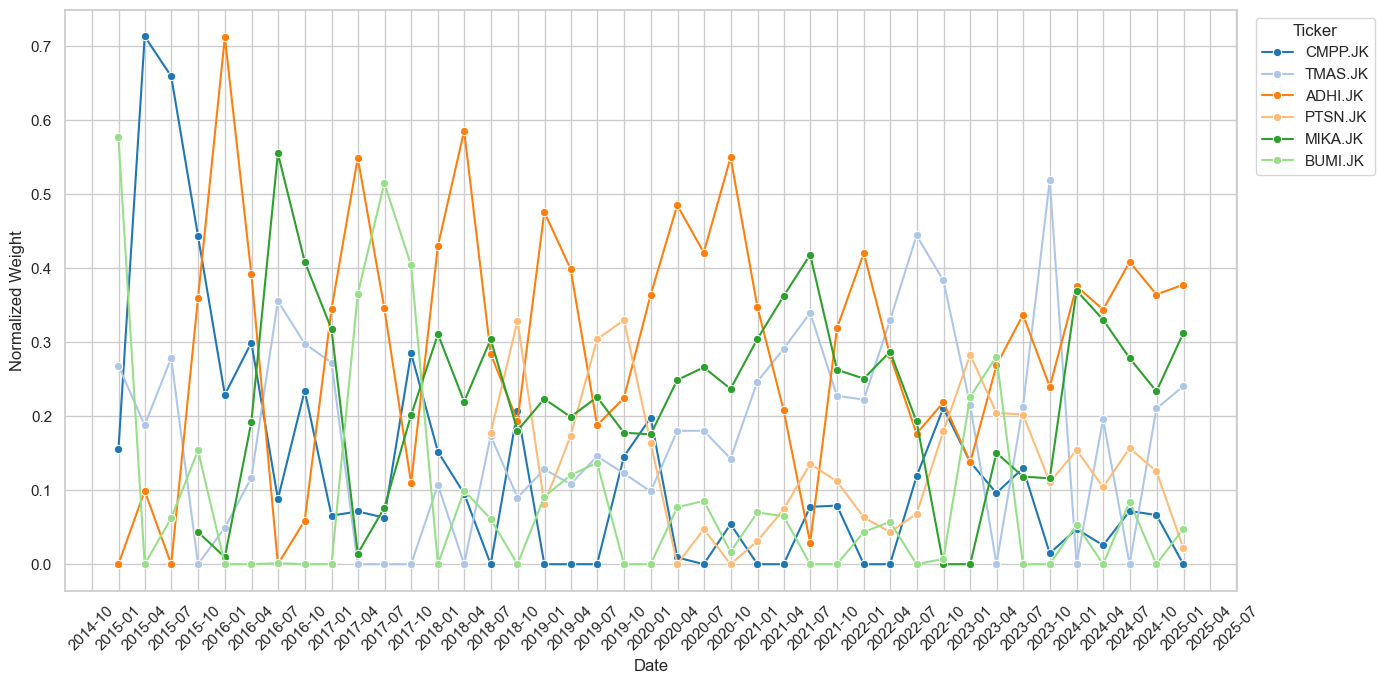

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Pastikan kolom 'Date' bertipe datetime
df_final['Date'] = pd.to_datetime(df_final['Date'])

plt.figure(figsize=(14, 7))

# Line plot bobot tiap ticker per tanggal
sns.lineplot(data=df_final, x='Date', y='Normalized_Weight', hue='Ticker', marker='o', palette='tab20')

# plt.title('K-Means Weight Distribution per Ticker Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Weight')

# Format x-axis agar lebih rapi
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format tanggal: Tahun-Bulan
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Tampilkan setiap 3 bulan
plt.xticks(rotation=45)

# Legend di luar plot
plt.legend(title='Ticker', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


Prediksi Return

In [182]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # ======================
# # 1. PERSIAPAN DATA
# # ======================

# # Rename dan filter data return
# df_return = df_all_return.rename(columns={'Nilai': 'Return'})
# df_return = df_return[df_return['Fitur'] == 'Return']
# df_return.drop_duplicates(subset=['Date', 'Ticker'], inplace=True)
# df_return.dropna(inplace=True)

# # Gabungkan data return dengan MACD dan inflasi
# df_macd = df_all_macd.rename(columns={'Tanggal': 'Date'})
# df_inflasi = df_inflasi_q.rename(columns={'Tanggal': 'Date'})

# df_merge = pd.merge(df_return, df_macd[['Date', 'Ticker', 'MACD']], on=['Date', 'Ticker'], how='inner')
# df_full = pd.merge(df_merge, df_inflasi, on='Date', how='left')

# df_full.drop_duplicates(subset=['Date', 'Ticker'], inplace=True)
# df_full.dropna(inplace=True)

# # ======================
# # 2. CLUSTERING & LSTM PER CLUSTER
# # ======================

# df_kmeans_data = df_aglo.drop_duplicates(subset=['Ticker', 'Cluster'])
# # Merge ke df_kmeans_data
# df_sector_info = df_aglo[['Ticker', 'Sektor']]  # pastikan df_sector punya info ini
# df_kmeans_data = pd.merge(df_kmeans_data, df_sector_info, on='Ticker', how='left')

# clusters = df_kmeans_data['Cluster'].unique()

# predictions = []


# # Fungsi pembuat sequence time-series
# def create_multivariate_dataset(X, y, dates, time_step=15):
#     Xs, ys, ds = [], [], []
#     for i in range(len(X) - time_step):
#         Xs.append(X[i:i + time_step])
#         ys.append(y[i + time_step])
#         ds.append(dates[i + time_step])
#     return np.array(Xs), np.array(ys), np.array(ds)

# time_step = 2

# # Loop per cluster
# for cluster in clusters:
#     tickers_in_cluster = df_kmeans_data[df_kmeans_data['Cluster'] == cluster]['Ticker'].unique()

#     for ticker in tickers_in_cluster:
#         print(f'Processing Ticker: {ticker}, Cluster: {cluster}')

#         # Ambil data untuk ticker terkait
#         df_ticker = df_full[df_full['Ticker'] == ticker].copy()
#         df_ticker.sort_values('Date', inplace=True)

#         # Ambil sektor jika tersedia
#         sector = df_ticker['Sektor'].iloc[0] if 'Sektor' in df_ticker.columns else 'Unknown'

#         # Lewati jika data terlalu pendek
#         if len(df_ticker) < 10:
#             print(f"Data terlalu sedikit untuk {ticker}, dilewati.")
#             continue

#         # Ambil fitur dan target
#         features = df_ticker[['MACD', 'Inflasi']].values
#         target = df_ticker['Return'].values.reshape(-1, 1)

#         # Validasi nilai NaN dan Inf
#         mask = np.isfinite(features).all(axis=1) & np.isfinite(target).flatten()
#         if not np.any(mask):
#             print(f"Semua data tidak valid untuk ticker {ticker}, dilewati.")
#             continue

#         features = features[mask]
#         target = target[mask]
#         dates = df_ticker['Date'].values[mask]

#         # Normalisasi
#         scaler_X = MinMaxScaler()
#         scaler_y = MinMaxScaler()
#         X_scaled = scaler_X.fit_transform(features)
#         y_scaled = scaler_y.fit_transform(target)

#         # Buat sequence time-series
#         X_seq, y_seq, d_seq = create_multivariate_dataset(X_scaled, y_scaled, dates, time_step)

#         # Lewati jika data sequence terlalu pendek
#         if len(X_seq) < 10:
#             print(f"Data sequence terlalu pendek untuk {ticker}, dilewati.")
#             continue

#         # === PENTING ===
#         # Latih model dengan seluruh data sequence
#         model = Sequential([
#             LSTM(50, return_sequences=True, input_shape=(time_step, X_seq.shape[2])),
#             LSTM(50),
#             Dense(1)
#         ])
#         model.compile(optimizer='adam', loss='mean_squared_error')
#         model.fit(X_seq, y_seq, epochs=20, batch_size=16, verbose=0)

#         # Prediksi seluruh sequence (mulai dari awal)
#         y_pred_scaled = model.predict(X_seq)
#         y_pred = scaler_y.inverse_transform(y_pred_scaled)
#         y_true = scaler_y.inverse_transform(y_seq)

#         # Simpan hasil prediksi per tanggal
#         for date, true_val, pred_val in zip(d_seq, y_true.flatten(), y_pred.flatten()):
#             predictions.append({
#                 'Date': date,
#                 'Ticker': ticker,
#                 'Cluster': cluster,
#                 'True': true_val,
#                 'Predicted': pred_val,
#                 'Sector': sector
#             })


# # ======================
# # 3. HASIL PREDIKSI
# # ======================

# predictions_df_kmeans1_return = pd.DataFrame(predictions)
# print(predictions_df_kmeans1_return[['Date', 'Ticker', 'Cluster', 'True', 'Predicted', 'Sector']])
# # Simpan ke CSV
# predictions_df_kmeans1_return.to_csv('predictions_Return_aglo_revisi.csv', index=False)


In [183]:
# Membaca data dari CSV
predictions_kmeans1_return = pd.read_csv('predictions_Return_kmeans_revisi.csv')
# Periksa beberapa baris pertama untuk memastikan data terformat dengan benar
print(predictions_kmeans1_return.head())

         Date   Ticker  Cluster      True  Predicted                Sector
0  2014-12-31  AALI.JK        4  0.065999  -0.010759  ConsumerNonCyclicals
1  2015-03-31  AALI.JK        4  0.002062  -0.041879  ConsumerNonCyclicals
2  2015-06-30  AALI.JK        4 -0.036071   0.041693  ConsumerNonCyclicals
3  2015-09-30  AALI.JK        4 -0.210240   0.044885  ConsumerNonCyclicals
4  2015-12-31  AALI.JK        4 -0.125517  -0.103228  ConsumerNonCyclicals


Portofolio variance & Risk Portofolio

In [184]:
import pandas as pd
import numpy as np

# Pastikan kolom Date bertipe datetime
df_final['Date'] = pd.to_datetime(df_final['Date'])
predictions_kmeans1_return['Date'] = pd.to_datetime(predictions_kmeans1_return['Date'])

# Ambil ticker unik dari df_final_dbscan (Code 1)
tickers_code1 = set(df_final['Ticker'].unique())

# Filter return_dbscan agar hanya berisi ticker yang ada di df_final_dbscan
return_dbscan_filtered = predictions_kmeans1_return[predictions_kmeans1_return['Ticker'].isin(tickers_code1)].copy()

# Merge dengan df_final_dbscan
merged = pd.merge(
    df_final[['Date', 'Ticker', 'Predicted', 'Normalized_Weight']],
    return_dbscan_filtered[['Date', 'Ticker', 'Predicted']],
    on=['Date', 'Ticker'],
    suffixes=('', '_check'),
    how='left'
)

# Isi NaN di kolom 'Predicted' dari return_dbscan_filtered dengan rata-rata per ticker (kolom)
merged['Predicted'] = merged['Predicted'].fillna(merged.groupby('Ticker')['Predicted'].transform('mean'))

# Pivot data return untuk covariance matrix hanya menggunakan ticker dari df_final_dbscan
returns_pivot = merged.pivot(index='Date', columns='Ticker', values='Predicted')

# Isi NaN di returns_pivot dengan mean per ticker
returns_pivot = returns_pivot.fillna(returns_pivot.mean())

# Pivot bobot per tanggal
weights_pivot = merged.pivot(index='Date', columns='Ticker', values='Normalized_Weight')

# Isi NaN di bobot dengan mean per ticker
weights_pivot = weights_pivot.fillna(weights_pivot.mean())

# Normalisasi bobot supaya jumlah bobot per tanggal = 1
weights_pivot = weights_pivot.div(weights_pivot.sum(axis=1), axis=0)

# Hitung covariance matrix antar aset selama seluruh periode
cov_matrix = returns_pivot.cov()

# Hitung variance dan std per tanggal
variance_list = []
std_list = []
dates = weights_pivot.index

for date in dates:
    w = weights_pivot.loc[date].dropna()
    tickers = w.index
    
    cov_sub = cov_matrix.loc[tickers, tickers].values
    w_vec = w.values.reshape(-1, 1)
    port_var = float(w_vec.T @ cov_sub @ w_vec)
    port_std = np.sqrt(port_var)
    
    variance_list.append(port_var)
    std_list.append(port_std)

risk_df = pd.DataFrame({
    'Date': dates,
    'Portfolio_Variance': variance_list,
    'Portfolio_StdDev': std_list
})

# Hitung return portofolio per tanggal
portfolio_returns = merged.groupby('Date').apply(
    lambda df: np.sum(df['Normalized_Weight'] * df['Predicted'])
).rename("Portfolio_Return").reset_index()

# Ambil ticker per tanggal dari weights_pivot (ticker aktif per tanggal)
tickers_per_date = weights_pivot.apply(lambda row: row.dropna().index.tolist(), axis=1)

# Buat DataFrame ticker per tanggal
ticker_date_df_kmeans = tickers_per_date.reset_index().explode(0)
ticker_date_df_kmeans.columns = ['Date', 'Ticker']

# Gabungkan return dan risiko dengan ticker per tanggal
final_result_with_ticker_kmeans = pd.merge(
    ticker_date_df_kmeans,
    portfolio_returns,
    on='Date',
    how='left'
)
final_result_with_ticker_kmeans = pd.merge(
    final_result_with_ticker_kmeans,
    risk_df,
    on='Date',
    how='left'
)

# Urutkan kolom sesuai permintaan
final_result_with_ticker_kmeans = final_result_with_ticker_kmeans[
    ['Date', 'Ticker', 'Portfolio_Return', 'Portfolio_Variance', 'Portfolio_StdDev']
]

print(final_result_with_ticker_kmeans)

          Date   Ticker  Portfolio_Return  Portfolio_Variance  \
0   2014-12-31  ADHI.JK         -0.062137            0.003008   
1   2014-12-31  BUMI.JK         -0.062137            0.003008   
2   2014-12-31  CMPP.JK         -0.062137            0.003008   
3   2014-12-31  MIKA.JK         -0.062137            0.003008   
4   2014-12-31  PTSN.JK         -0.062137            0.003008   
..         ...      ...               ...                 ...   
241 2024-12-31  BUMI.JK         -0.129530            0.002916   
242 2024-12-31  CMPP.JK         -0.129530            0.002916   
243 2024-12-31  MIKA.JK         -0.129530            0.002916   
244 2024-12-31  PTSN.JK         -0.129530            0.002916   
245 2024-12-31  TMAS.JK         -0.129530            0.002916   

     Portfolio_StdDev  
0            0.054845  
1            0.054845  
2            0.054845  
3            0.054845  
4            0.054845  
..                ...  
241          0.054000  
242          0.054000  
243

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\1787093869.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  port_var = float(w_vec.T @ cov_sub @ w_vec)
C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\1787093869.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  portfolio_returns = merged.groupby('Date').apply(


Visualisasi Return, Variance, dan Risk

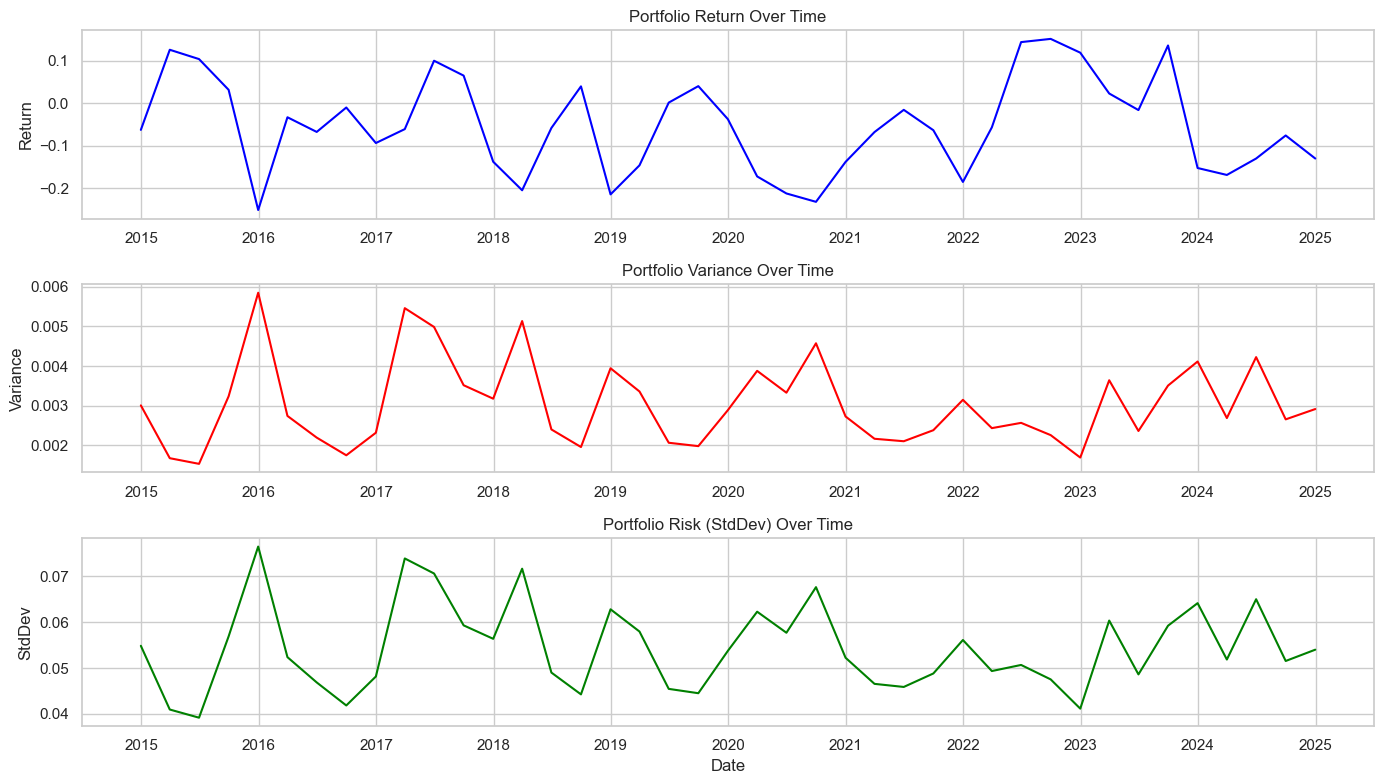

In [185]:
import matplotlib.dates as mdates

# Ambil data unik per tanggal supaya gak dobel di plot
daily_data = final_result_with_ticker_kmeans[['Date', 'Portfolio_Return', 'Portfolio_Variance', 'Portfolio_StdDev']].drop_duplicates(subset='Date').sort_values('Date')

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(daily_data['Date'], daily_data['Portfolio_Return'], label='Portfolio Return', color='blue')
plt.title('Portfolio Return Over Time')
plt.ylabel('Return')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tampilkan setiap tahun
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.subplot(3, 1, 2)
plt.plot(daily_data['Date'], daily_data['Portfolio_Variance'], label='Portfolio Variance', color='red')
plt.title('Portfolio Variance Over Time')
plt.ylabel('Variance')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.subplot(3, 1, 3)
plt.plot(daily_data['Date'], daily_data['Portfolio_StdDev'], label='Portfolio StdDev (Risk)', color='green')
plt.title('Portfolio Risk (StdDev) Over Time')
plt.ylabel('StdDev')
plt.xlabel('Date')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


Sharpe Ratio Portofolio

In [186]:
risk_free_rate = pd.read_csv('BI_Rate.csv', sep=';').dropna()

risk_free_rate['BI-Rate'] = risk_free_rate['BI-Rate'].str.replace(',', '.').astype(float) / 100
risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))
risk_free_rate.set_index('Tanggal', inplace=True)

quarterly_risk_free = risk_free_rate['BI-Rate'].resample('QE').mean()

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\1666074905.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  risk_free_rate['Tanggal'] = pd.to_datetime(risk_free_rate['Bulan'] + ' ' + risk_free_rate['Tahun'].astype(str))


Rata-Rata Sharpe ratio Portofolio

In [187]:
import numpy as np

# 1. Hitung rata-rata return dan standar deviasi per ticker
mean_return = predictions_kmeans1_return.groupby('Ticker')['Predicted'].mean()
std_return = predictions_kmeans1_return.groupby('Ticker')['Predicted'].std()

# 2. Ambil risk-free rate rata-rata kuartalan dari BI Rate
mean_risk_free = quarterly_risk_free.mean()

# 3. Ambil ticker dari df_final
tickers_df_final = set(df_final['Ticker'].unique())

# 4. Filter mean_return dan std_return agar hanya ticker di df_final
mean_return = mean_return[mean_return.index.isin(tickers_df_final)]
std_return = std_return[std_return.index.isin(tickers_df_final)]

# 5. Hitung Sharpe Ratio per ticker
sharpe_ratio_per_ticker = (mean_return - mean_risk_free) / std_return

# 6. Ambil bobot rata-rata per ticker dari df_final
weights_df = df_final.groupby('Ticker')['Normalized_Weight'].mean()

# 7. Sinkronisasi indeks ticker
common_tickers = sharpe_ratio_per_ticker.index.intersection(weights_df.index)
sharpe_ratio_per_ticker = sharpe_ratio_per_ticker[common_tickers].sort_index()
weights_df = weights_df[common_tickers].sort_index()

# 8. Pastikan sinkron
assert sharpe_ratio_per_ticker.index.equals(weights_df.index), "Indeks ticker belum sinkron!"

# 9. Hitung Sharpe Ratio Portofolio (dot product bobot dan sharpe ratio)
portfolio_sharpe_ratio = np.dot(weights_df.values, sharpe_ratio_per_ticker.values)

print(f"Sharpe Ratio Portofolio: {portfolio_sharpe_ratio:.6f}")


Sharpe Ratio Portofolio: -0.295810


Sharpe ratio Portofolio per ticker

In [188]:
import numpy as np
import pandas as pd

# 1. Konversi kolom Date ke datetime jika belum
predictions_kmeans1_return['Date'] = pd.to_datetime(predictions_kmeans1_return['Date'])

# 2. Filter hanya ticker yang ada di df_final
tickers_df_final = set(df_final['Ticker'].unique())
df_filtered = predictions_kmeans1_return[predictions_kmeans1_return['Ticker'].isin(tickers_df_final)]

# 3. Ambil bobot per ticker
weights_df = df_final.groupby('Ticker')['Normalized_Weight'].mean()

# 5. Gabungkan risk-free rate ke data prediksi
df_filtered = df_filtered.copy()
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered = df_filtered.set_index('Date')
df_filtered['Risk_Free'] = quarterly_risk_free
df_filtered = df_filtered.reset_index()

# 6. Hitung excess return: Predicted - Risk_Free
df_filtered['Excess_Return'] = df_filtered['Predicted'] - df_filtered['Risk_Free']

# 7. Hitung Sharpe Ratio per tanggal (menggunakan std dev per ticker tetap)
std_return = predictions_kmeans1_return.groupby('Ticker')['Predicted'].std()

# Buat list hasil
results = []

for date in df_filtered['Date'].unique():
    daily_data = df_filtered[df_filtered['Date'] == date]

    sharpe_per_ticker = []
    for _, row in daily_data.iterrows():
        ticker = row['Ticker']
        if ticker not in weights_df or ticker not in std_return:
            continue
        std = std_return[ticker]
        if std == 0 or np.isnan(std):
            continue
        sharpe = row['Excess_Return'] / std
        weight = weights_df[ticker]
        sharpe_per_ticker.append((ticker, sharpe, weight))

    # Hitung Sharpe Portofolio
    if sharpe_per_ticker:
        tickers, sharpes, weights = zip(*sharpe_per_ticker)
        portfolio_sharpe = np.dot(weights, sharpes)
        for ticker in tickers:
            results.append({
                'Date': date,
                'Ticker': ticker,
                'Sharpe_Ratio_Portofolio': portfolio_sharpe
            })

# 8. Buat DataFrame output
sharpe_df_kmeans = pd.DataFrame(results)
print(sharpe_df_kmeans)


          Date   Ticker  Sharpe_Ratio_Portofolio
0   2014-12-31  CMPP.JK                 0.027559
1   2014-12-31  TMAS.JK                 0.027559
2   2014-12-31  ADHI.JK                 0.027559
3   2014-12-31  BUMI.JK                 0.027559
4   2015-03-31  CMPP.JK                 0.476422
..         ...      ...                      ...
223 2024-12-31  TMAS.JK                -1.100040
224 2024-12-31  ADHI.JK                -1.100040
225 2024-12-31  PTSN.JK                -1.100040
226 2024-12-31  MIKA.JK                -1.100040
227 2024-12-31  BUMI.JK                -1.100040

[228 rows x 3 columns]


Expected Return

In [189]:
import numpy as np

# 1. Hitung rata-rata return per ticker
expected_return_per_ticker = predictions_kmeans1_return.groupby('Ticker')['Predicted'].mean()

# 2. Ambil ticker unik dari df_final
tickers_df_final = set(df_final['Ticker'].unique())

# 3. Filter expected_return_per_ticker agar ticker-nya hanya yang ada di df_final
expected_return_per_ticker = expected_return_per_ticker[expected_return_per_ticker.index.isin(tickers_df_final)]

# 4. Ambil bobot rata-rata per ticker dari df_final
weights_df = df_final.groupby('Ticker')['Normalized_Weight'].mean()

# 5. Filter bobot agar ticker-nya sama dengan expected_return_per_ticker
weights_df = weights_df[weights_df.index.isin(expected_return_per_ticker.index)]

# 6. Urutkan keduanya berdasarkan index agar sinkron
expected_return_per_ticker = expected_return_per_ticker.sort_index()
weights_df = weights_df.sort_index()

# 7. Pastikan ticker sudah sinkron
assert expected_return_per_ticker.index.equals(weights_df.index), "Ticker belum sinkron!"

# 8. Hitung expected portfolio return
expected_portfolio_return_kmeans = np.dot(weights_df.values, expected_return_per_ticker.values)

print(f"Expected Return Portofolio: {expected_portfolio_return_kmeans:.6f}")


Expected Return Portofolio: 0.073354


Visualisasi

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\2218032855.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(viz_df['Ticker'], rotation=45, ha='right')


<Figure size 1400x700 with 0 Axes>

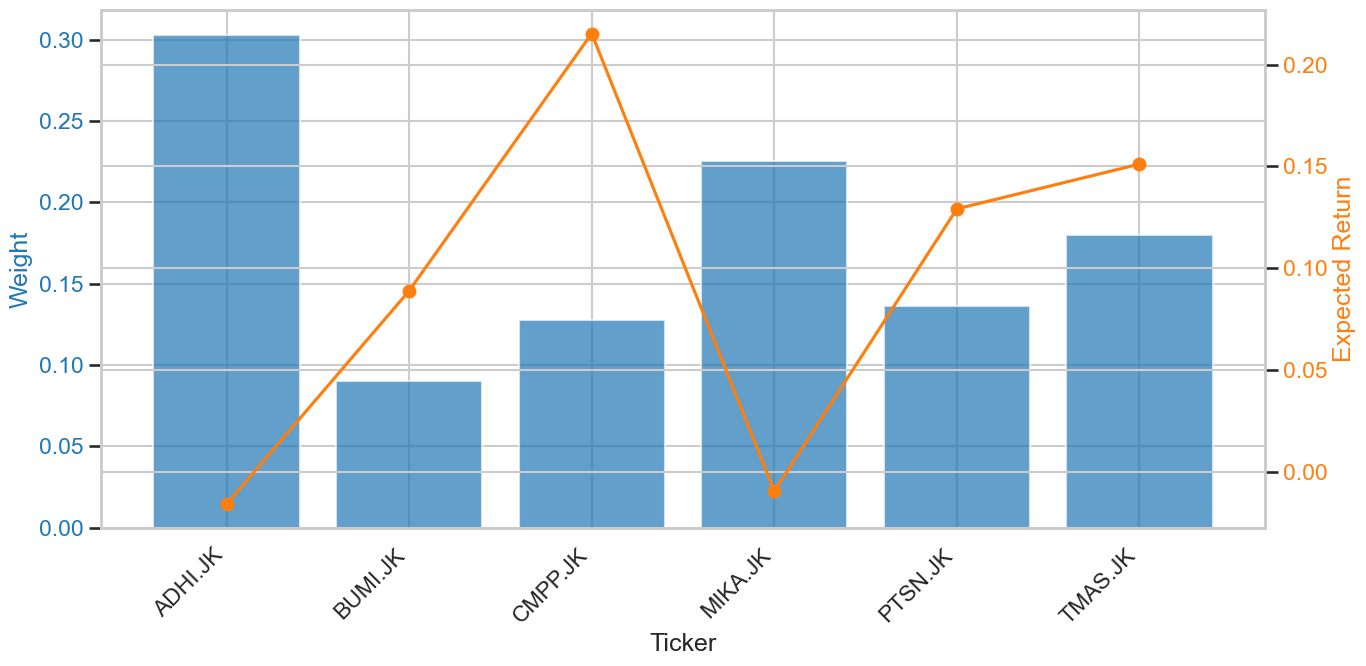

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gabungkan bobot dan expected return dalam satu DataFrame untuk visualisasi
viz_df = pd.DataFrame({
    'Ticker': weights_df.index,
    'Weight': weights_df.values,
    'Expected Return': expected_return_per_ticker.values
})

# Set style seaborn
sns.set(style='whitegrid', context='talk')

# Ukuran figure
plt.figure(figsize=(14, 7))

# Bar chart bobot dan expected return (dua y-axis)
fig, ax1 = plt.subplots(figsize=(14,7))

color1 = 'tab:blue'
color2 = 'tab:orange'

ax1.bar(viz_df['Ticker'], viz_df['Weight'], color=color1, alpha=0.7, label='Weight')
ax1.set_xlabel('Ticker')
ax1.set_ylabel('Weight', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(viz_df['Ticker'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(viz_df['Ticker'], viz_df['Expected Return'], color=color2, marker='o', label='Expected Return')
ax2.set_ylabel('Expected Return', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# plt.title('K-Means Portfolio Allocation and Expected Returns for Each Ticker')
fig.tight_layout()
plt.show()


Mencari Beta Portofolio

IHSG

In [191]:
import pandas as pd
import numpy as np

# Load dataset IHSG
ihsg = pd.read_csv('IHSG.csv', sep=';').dropna()

# Konversi kolom 'Tanggal' ke format datetime dan jadikan index
ihsg['Tanggal'] = pd.to_datetime(ihsg['Tanggal'], format='%d/%m/%Y')
ihsg.set_index('Tanggal', inplace=True)

# Fungsi untuk mengubah angka dengan koma menjadi float
def convert_number(x):
    return float(x.replace('.', '').replace(',', '.')) if isinstance(x, str) else x

# Terapkan fungsi ke kolom numerik
numeric_cols = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']
for col in numeric_cols:
    ihsg[col] = ihsg[col].apply(convert_number)

# Konversi 'Vol' dari format teks (misal: "301,28B") menjadi angka
def convert_volume(x):
    if isinstance(x, str) and 'B' in x:
        return float(x.replace('B', '').replace(',', '.')) * 1e9
    return x

ihsg['Vol'] = ihsg['Vol'].apply(convert_volume)

# Konversi 'Perubahan' dari format persen ke desimal
ihsg['Perubahan'] = ihsg['Perubahan'].str.replace('%', '', regex=False).str.replace(',', '.', regex=False).astype(float) / 100


BETA

In [192]:
import numpy as np
import pandas as pd

# Nilai eps global (konsisten untuk semua klasifikasi Beta)
EPSILON = 1e-1

# Fungsi klasifikasi beta
def beta_class(val, eps=EPSILON):
    if val > 1 + eps:
        return 1
    elif -eps < val < eps:
        return 0
    else:
        return -1

# Fungsi Beta Manual
def calculate_beta_manual(df, market_series, period):
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom dengan format (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()
    beta_series = []

    for ticker in tickers:
        stock_return = df[('Close', ticker)].pct_change()
        market_return = market_series.pct_change()

        # Sinkronisasi index
        common_index = stock_return.dropna().index.intersection(market_return.dropna().index)
        stock_return = stock_return.loc[common_index]
        market_return = market_return.loc[common_index]

        df_sync = pd.DataFrame({
            'stock_return': stock_return,
            'market_return': market_return
        }).dropna()

        if len(df_sync) >= period:
            rolling_cov = df_sync['stock_return'].rolling(period).cov(df_sync['market_return'])
            rolling_var = df_sync['market_return'].rolling(period).var()
            beta = rolling_cov / rolling_var
            beta_df = pd.DataFrame({ticker: beta}, index=df_sync.index)
            beta_series.append(beta_df)

    return pd.concat(beta_series, axis=1).dropna() if beta_series else pd.DataFrame()

# Dictionary sektor (pastikan data sektor dan IHSG Anda sudah didefinisikan sebelumnya)
sector_dict = {
    'Property': dataProp,
    'BasicMaterial': dataBasic_Materials,
    'ConsumerCyclicals': dataConsC,
    'ConsumerNonCyclicals': dataConsCnon,
    'Energy': dataEnergy,
    'Finance': dataFinance,
    'Health': dataHealth,
    'Industry': dataIndustri,
    'Infrastructure': dataInfra,
    'Tech': datatech,
    'Transport': dataTransport,
}

# Ambil seri IHSG
ihsg_series = ihsg['Terakhir']

# Hitung beta untuk semua sektor
beta_list = []

for sector_name, sector_df in sector_dict.items():
    common_index = sector_df.index.intersection(ihsg_series.index)
    sector_df_sync = sector_df.loc[common_index]
    ihsg_series_sync = ihsg_series.loc[common_index]

    beta_result = calculate_beta_manual(sector_df_sync, ihsg_series_sync, period=20)
    if not beta_result.empty:
        beta_long = beta_result.stack().reset_index()
        beta_long.columns = ['Date', 'Ticker', 'Beta']
        beta_long['Sektor'] = sector_name
        beta_long['Class'] = beta_long['Beta'].apply(lambda x: beta_class(x, eps=EPSILON))
        beta_list.append(beta_long)

# Gabungkan semua hasil beta
beta_df = pd.concat(beta_list, ignore_index=True) if beta_list else pd.DataFrame()

# Konversi tipe tanggal
beta_df['Date'] = pd.to_datetime(beta_df['Date'])
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Fungsi untuk mengambil beta berdasarkan ticker dan tanggal
def get_beta(row, beta_group):
    df_ticker = beta_group[beta_group['Ticker'] == row['Ticker']]
    df_ticker = df_ticker[df_ticker['Date'] <= row['Date']]
    if not df_ticker.empty:
        return df_ticker.iloc[-1]['Beta']
    return np.nan

# Ambil beta untuk setiap baris di df_filtered
df_filtered['Beta'] = df_filtered.apply(lambda row: get_beta(row, beta_df), axis=1)
df_filtered['Beta'] = df_filtered['Beta'].fillna(0)

# Klasifikasi beta (dengan eps yang sama)
df_filtered['Class'] = df_filtered['Beta'].apply(lambda x: beta_class(x, eps=EPSILON))

# --- START Modifikasi agar tiap ticker hanya punya satu kelas ---

# Tentukan kelas mode (paling sering muncul) untuk setiap ticker
mode_class_per_ticker = df_filtered.groupby('Ticker')['Class'].agg(lambda x: x.mode().iloc[0])

# Buat dictionary mapping ticker -> kelas mode
ticker_to_class = mode_class_per_ticker.to_dict()

# Override kelas di df_filtered agar konsisten per ticker
df_filtered['Class'] = df_filtered['Ticker'].map(ticker_to_class)

# --- END Modifikasi ---

# Output hasil
print(df_filtered)
print(df_filtered['Class'].value_counts())


          Date   Ticker  Cluster      True  Predicted     Sector  Risk_Free  \
0   2014-12-31  CMPP.JK        4 -0.303371   0.213314  Transport   0.075833   
1   2015-03-31  CMPP.JK        4  0.088710   0.381095  Transport   0.075833   
2   2015-06-30  CMPP.JK        4 -0.066667   0.385262  Transport   0.075000   
3   2015-09-30  CMPP.JK        4 -0.166667   0.318191  Transport   0.075000   
4   2015-12-31  CMPP.JK        4  0.019048   0.282708  Transport   0.075000   
..         ...      ...      ...       ...        ...        ...        ...   
223 2023-12-31  BUMI.JK        5 -0.379562   0.059037     Energy   0.060000   
224 2024-03-31  BUMI.JK        5 -0.011765   0.072769     Energy   0.060000   
225 2024-06-30  BUMI.JK        5 -0.071429   0.046596     Energy   0.062500   
226 2024-09-30  BUMI.JK        5  0.564103   0.076927     Energy   0.061667   
227 2024-12-31  BUMI.JK        5 -0.032787   0.052904     Energy   0.060000   

     Excess_Return      Beta  Class  
0         0.1

In [193]:
import numpy as np
import pandas as pd

# ============ SOLUSI 1: SESUAIKAN EPSILON ============

# Nilai eps yang lebih realistis untuk data Indonesia
EPSILON = 0.3  # Lebih besar untuk menangkap variasi beta

# Fungsi klasifikasi beta yang diperbaiki
def beta_class_improved(val, eps=EPSILON):
    """
    Klasifikasi beta dengan threshold yang lebih realistis:
    - Class 1 (Agresif): Beta > 1 + eps (> 1.3)
    - Class 0 (Netral): 1 - eps <= Beta <= 1 + eps (0.7 <= Beta <= 1.3)
    - Class -1 (Defensif): Beta < 1 - eps (< 0.7)
    """
    if val > 1 + eps:
        return 1
    elif val < 1 - eps:
        return -1
    else:
        return 0

# ============ SOLUSI 2: KLASIFIKASI BERDASARKAN PERCENTILE ============

def beta_class_percentile(beta_series):
    """
    Klasifikasi berdasarkan percentile untuk memastikan distribusi yang seimbang
    """
    # Hapus nilai 0 (missing data) untuk perhitungan percentile
    clean_beta = beta_series[beta_series != 0]
    
    if len(clean_beta) == 0:
        # Jika semua 0, return Series dengan nilai 0
        return pd.Series([0] * len(beta_series), index=beta_series.index)
    
    # Hitung percentile
    p33 = clean_beta.quantile(0.33)
    p67 = clean_beta.quantile(0.67)
    
    def classify_beta(val):
        if val == 0:  # Handle missing data
            return 0  # Netral untuk data yang hilang
        elif val > p67:
            return 1   # Top 33% = Agresif
        elif val < p33:
            return -1  # Bottom 33% = Defensif
        else:
            return 0   # Middle 33% = Netral
    
    return beta_series.apply(classify_beta)

# ============ SOLUSI 3: KLASIFIKASI ADAPTIF ============

def beta_class_adaptive(beta_series):
    """
    Klasifikasi adaptif berdasarkan statistik data aktual
    """
    # Hapus outlier dan nilai 0 dengan cara yang aman
    non_zero_mask = beta_series != 0
    
    if not non_zero_mask.any():
        # Jika semua nilai 0, return Series dengan nilai 0
        return pd.Series([0] * len(beta_series), index=beta_series.index)
    
    # Filter nilai non-zero dulu
    non_zero_beta = beta_series[non_zero_mask]
    
    # Hitung quantile dari nilai non-zero
    q05 = non_zero_beta.quantile(0.05)
    q95 = non_zero_beta.quantile(0.95)
    
    # Filter outlier
    outlier_mask = (non_zero_beta >= q05) & (non_zero_beta <= q95)
    clean_beta = non_zero_beta[outlier_mask]
    
    if len(clean_beta) == 0:
        return pd.Series([0] * len(beta_series), index=beta_series.index)
    
    mean_beta = clean_beta.mean()
    std_beta = clean_beta.std()
    
    # Threshold berdasarkan mean ± 0.5*std
    upper_threshold = mean_beta + 0.5 * std_beta
    lower_threshold = mean_beta - 0.5 * std_beta
    
    def classify_beta(val):
        if val == 0:
            return 0  # Netral untuk missing data
        elif val > upper_threshold:
            return 1   # Agresif
        elif val < lower_threshold:
            return -1  # Defensif
        else:
            return 0   # Netral
    
    return beta_series.apply(classify_beta)

# ============ KODE UTAMA YANG DIPERBAIKI ============

# Fungsi Beta Manual (sama seperti sebelumnya)
def calculate_beta_manual(df, market_series, period):
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom dengan format (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()
    beta_series = []

    for ticker in tickers:
        stock_return = df[('Close', ticker)].pct_change()
        market_return = market_series.pct_change()

        # Sinkronisasi index
        common_index = stock_return.dropna().index.intersection(market_return.dropna().index)
        stock_return = stock_return.loc[common_index]
        market_return = market_return.loc[common_index]

        df_sync = pd.DataFrame({
            'stock_return': stock_return,
            'market_return': market_return
        }).dropna()

        if len(df_sync) >= period:
            rolling_cov = df_sync['stock_return'].rolling(period).cov(df_sync['market_return'])
            rolling_var = df_sync['market_return'].rolling(period).var()
            beta = rolling_cov / rolling_var
            beta_df = pd.DataFrame({ticker: beta}, index=df_sync.index)
            beta_series.append(beta_df)

    return pd.concat(beta_series, axis=1).dropna() if beta_series else pd.DataFrame()

# Dictionary sektor (gunakan data Anda yang sudah ada)
sector_dict = {
    'Property': dataProp,
    'BasicMaterial': dataBasic_Materials,
    'ConsumerCyclicals': dataConsC,
    'ConsumerNonCyclicals': dataConsCnon,
    'Energy': dataEnergy,
    'Finance': dataFinance,
    'Health': dataHealth,
    'Industry': dataIndustri,
    'Infrastructure': dataInfra,
    'Tech': datatech,
    'Transport': dataTransport,
}

# Ambil seri IHSG
ihsg_series = ihsg['Terakhir']

# Hitung beta untuk semua sektor
beta_list = []

for sector_name, sector_df in sector_dict.items():
    common_index = sector_df.index.intersection(ihsg_series.index)
    sector_df_sync = sector_df.loc[common_index]
    ihsg_series_sync = ihsg_series.loc[common_index]

    beta_result = calculate_beta_manual(sector_df_sync, ihsg_series_sync, period=20)
    if not beta_result.empty:
        beta_long = beta_result.stack().reset_index()
        beta_long.columns = ['Date', 'Ticker', 'Beta']
        beta_long['Sektor'] = sector_name
        beta_list.append(beta_long)

# Gabungkan semua hasil beta
beta_df_aglo = pd.concat(beta_list, ignore_index=True) if beta_list else pd.DataFrame()

# Konversi tipe tanggal
beta_df_aglo['Date'] = pd.to_datetime(beta_df_aglo['Date'])
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Fungsi untuk mengambil beta berdasarkan ticker dan tanggal
def get_beta(row, beta_group):
    df_ticker = beta_group[beta_group['Ticker'] == row['Ticker']]
    df_ticker = df_ticker[df_ticker['Date'] <= row['Date']]
    if not df_ticker.empty:
        return df_ticker.iloc[-1]['Beta']
    return np.nan

# Ambil beta untuk setiap baris di df_filtered
df_filtered['Beta'] = df_filtered.apply(lambda row: get_beta(row, beta_df_aglo), axis=1)

# PERBAIKAN: Jangan langsung fillna(0), gunakan strategi yang lebih baik
print("Distribusi Beta sebelum fillna:")
print(df_filtered['Beta'].describe())
print(f"Jumlah nilai NaN: {df_filtered['Beta'].isna().sum()}")

# Strategi 1: Forward fill dalam grup ticker (lebih realistis)
df_filtered['Beta'] = df_filtered.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='ffill'))

# Strategi 2: Backward fill jika forward fill tidak cukup
df_filtered['Beta'] = df_filtered.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='bfill'))

# Strategi 3: Isi dengan median sektor jika masih ada yang kosong
try:
    # Hitung median beta per sektor (hanya untuk nilai yang tidak NaN)
    sector_beta_median = df_filtered.groupby('Sector')['Beta'].median()
    
    # Fungsi untuk mengisi beta yang masih NaN dengan median sektor
    def fill_beta_with_sector_median(row):
        if pd.isna(row['Beta']):
            if row['Sector'] in sector_beta_median.index:
                sector_median = sector_beta_median[row['Sector']]
                if pd.notna(sector_median):
                    return sector_median
            return 1.0  # Default ke beta netral jika sektor tidak ada atau median NaN
        else:
            return row['Beta']
    
    # Apply fungsi dengan axis=1
    df_filtered['Beta'] = df_filtered.apply(fill_beta_with_sector_median, axis=1)
    
except Exception as e:
    print(f"Error dalam pengisian median sektor: {e}")
    # Fallback: isi semua NaN dengan 1.0
    df_filtered['Beta'] = df_filtered['Beta'].fillna(1.0)

# Isi sisanya dengan 1.0 (beta netral pasar) daripada 0
df_filtered['Beta'] = df_filtered['Beta'].fillna(1.0)

print("\nDistribusi Beta setelah perbaikan:")
print(df_filtered['Beta'].describe())

# ============ TESTING BERBAGAI METODE KLASIFIKASI ============

print("\n" + "="*60)
print("TESTING BERBAGAI METODE KLASIFIKASI BETA")
print("="*60)

# Metode 1: Epsilon yang diperbaiki
try:
    df_filtered['Class_Improved'] = df_filtered['Beta'].apply(lambda x: beta_class_improved(x))
    print("Metode 1 - Epsilon 0.3:")
    print(df_filtered['Class_Improved'].value_counts().sort_index())
except Exception as e:
    print(f"Error metode 1: {e}")
    df_filtered['Class_Improved'] = 0

# Metode 2: Percentile
try:
    df_filtered['Class_Percentile'] = beta_class_percentile(df_filtered['Beta'])
    print("\nMetode 2 - Percentile:")
    print(df_filtered['Class_Percentile'].value_counts().sort_index())
except Exception as e:
    print(f"Error metode 2: {e}")
    df_filtered['Class_Percentile'] = 0

# Metode 3: Adaptive
try:
    df_filtered['Class_Adaptive'] = beta_class_adaptive(df_filtered['Beta'])
    print("\nMetode 3 - Adaptive:")
    print(df_filtered['Class_Adaptive'].value_counts().sort_index())
except Exception as e:
    print(f"Error metode 3: {e}")
    df_filtered['Class_Adaptive'] = 0

# Pilih metode terbaik (yang memberikan distribusi paling seimbang)
methods = ['Class_Improved', 'Class_Percentile', 'Class_Adaptive']
best_method = None
best_balance = float('inf')

for method in methods:
    try:
        counts = df_filtered[method].value_counts()
        unique_classes = len(counts)
        
        print(f"\n{method}: {unique_classes} unique classes")
        
        if unique_classes == 3:  # Harus ada 3 kelas
            balance = counts.std()  # Semakin kecil std, semakin seimbang
            print(f"Balance score (std): {balance:.2f}")
            if balance < best_balance:
                best_balance = balance
                best_method = method
        elif unique_classes > 1:  # Minimal 2 kelas
            balance = counts.std()
            print(f"Balance score (std): {balance:.2f} - hanya {unique_classes} kelas")
            if best_method is None:  # Ambil sebagai backup jika tidak ada yang 3 kelas
                best_method = method
                best_balance = balance
    except Exception as e:
        print(f"Error evaluating {method}: {e}")

if best_method:
    df_filtered['Class'] = df_filtered[best_method]
    print(f"\n🎯 METODE TERPILIH: {best_method}")
else:
    # Fallback ke epsilon method dengan nilai manual
    df_filtered['Class'] = df_filtered['Beta'].apply(
        lambda x: 1 if x > 1.2 else (-1 if x < 0.8 else 0)
    )
    print(f"\n🎯 METODE TERPILIH: Manual fallback")

# Tentukan kelas mode (paling sering muncul) untuk setiap ticker
mode_class_per_ticker = df_filtered.groupby('Ticker')['Class'].apply(
    lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 0
)

# Buat dictionary mapping ticker -> kelas mode
ticker_to_class = mode_class_per_ticker.to_dict()

# Override kelas di df_filtered agar konsisten per ticker
df_filtered['Class'] = df_filtered['Ticker'].map(ticker_to_class)

# Output hasil final
print("\n" + "="*60)
print("HASIL AKHIR")
print("="*60)
print("Distribusi Kelas Beta:")
print(df_filtered['Class'].value_counts().sort_index())

print("\nStatistik Beta per Kelas:")
beta_stats = df_filtered.groupby('Class')['Beta'].agg(['count', 'mean', 'std', 'min', 'max'])
print(beta_stats)

print("\nContoh data:")
sample_cols = ['Date', 'Ticker', 'Sector', 'Beta', 'Class']
available_cols = [col for col in sample_cols if col in df_filtered.columns]
print(df_filtered[available_cols].head(10))

# Cleanup kolom tambahan
cleanup_cols = [col for col in df_filtered.columns if col.startswith('Class_')]
if cleanup_cols:
    df_filtered = df_filtered.drop(columns=cleanup_cols)

print(f"\nFinal shape: {df_filtered.shape}")
print(f"Final columns: {list(df_filtered.columns)}")

Distribusi Beta sebelum fillna:
count    175.000000
mean       0.784697
std        2.706816
min       -6.807154
25%       -0.550207
50%        0.483414
75%        1.532903
max       14.064075
Name: Beta, dtype: float64
Jumlah nilai NaN: 53

Distribusi Beta setelah perbaikan:
count    228.000000
mean       0.792642
std        2.738559
min       -6.807154
25%       -0.684950
50%        0.491605
75%        1.527655
max       14.064075
Name: Beta, dtype: float64

TESTING BERBAGAI METODE KLASIFIKASI BETA
Metode 1 - Epsilon 0.3:
Class_Improved
-1    134
 0     22
 1     72
Name: count, dtype: int64

Metode 2 - Percentile:
Class_Percentile
-1    75
 0    78
 1    75
Name: count, dtype: int64

Metode 3 - Adaptive:
Class_Adaptive
-1     76
 0    109
 1     43
Name: count, dtype: int64

Class_Improved: 3 unique classes
Balance score (std): 56.11

Class_Percentile: 3 unique classes
Balance score (std): 1.73

Class_Adaptive: 3 unique classes
Balance score (std): 33.00

🎯 METODE TERPILIH: Class_Per

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\2280131665.py:189: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['Beta'] = df_filtered.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='ffill'))
C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\2280131665.py:192: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered['Beta'] = df_filtered.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='bfill'))


Klasifikasi menggunakan SVM

Cross-validated F1-macro scores: [0.44131897 0.50617191 0.61334709 0.52365763 0.45541126]
Mean F1-macro score: 0.5079813722093038

Classification Report on Hold-out Test Set:
              precision    recall  f1-score   support

          -1       1.00      0.12      0.22        16
           0       0.40      0.38      0.39        16
           1       0.31      0.64      0.42        14

    accuracy                           0.37        46
   macro avg       0.57      0.38      0.34        46
weighted avg       0.58      0.37      0.34        46



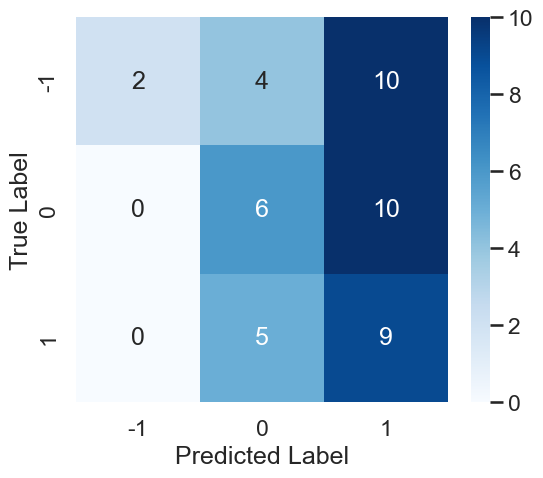


Representative Ticker per Class (based on SVM prediction):
Class -1: BUMI.JK
Class 0: MIKA.JK
Class 1: PTSN.JK


In [194]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ambil fitur dan label
X = df_filtered[['Beta']].values
y = df_filtered['Class'].values
tickers = df_filtered['Ticker'].values 

# 2. Split data latih dan uji
X_train, X_test, y_train, y_test, tickers_train, tickers_test = train_test_split(
    X, y, tickers, test_size=0.2, random_state=42, stratify=y
)

# 2. Buat pipeline: scaling → SMOTE → SVM
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# 3. Stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Evaluasi menggunakan cross_val_score
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')
print("Cross-validated F1-macro scores:", scores)
print("Mean F1-macro score:", scores.mean())

# 5. (Opsional) Fit dan evaluasi terakhir pada hold-out set untuk confusion matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nClassification Report on Hold-out Test Set:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.title('Confusion Matrix – SVM Classification using K-Means Labels')
plt.show()

# 7. Gabungkan hasil prediksi dengan informasi ticker dan beta
test_result = pd.DataFrame({
    'Ticker': tickers_test,
    'True_Class': y_test,
    'Predicted_Class': y_pred,
    'Beta': X_test.flatten()
})

# 8. Ambil perwakilan ticker untuk setiap kelas berdasarkan median beta
representative_tickers = {}
used_tickers = set()

for cls in sorted(test_result['Predicted_Class'].unique()):
    df_class = test_result[test_result['Predicted_Class'] == cls].copy()
    
    if not df_class.empty:
        median_beta = df_class['Beta'].median()
        df_class['Beta_Dist'] = (df_class['Beta'] - median_beta).abs()

        # Cari ticker representatif yang belum digunakan
        for _, row in df_class.sort_values('Beta_Dist').iterrows():
            ticker = row['Ticker']
            if ticker not in used_tickers:
                representative_tickers[cls] = ticker
                used_tickers.add(ticker)
                break


rep_ticker_result = representative_tickers

# 9. Tampilkan hasil
print("\nRepresentative Ticker per Class (based on SVM prediction):")
for cls, ticker in rep_ticker_result.items():
    print(f"Class {cls}: {ticker}")


Optimasi Portofolio

In [195]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Langsung tetapkan rep_ticker_result dari hasil klasifikasi
rep_ticker_result 

# Ambil expected return per ticker
expected_return_per_ticker = predictions_kmeans1_return.groupby('Ticker')['Predicted'].mean()

# Filter hanya ticker yang ada di df_final
tickers_df_final = set(df_final['Ticker'].unique())
expected_return_per_ticker = expected_return_per_ticker[expected_return_per_ticker.index.isin(tickers_df_final)]

# Ambil covariance matrix dari return prediksi
returns_pivot = merged.pivot(index='Date', columns='Ticker', values='Predicted')
returns_pivot = returns_pivot.fillna(returns_pivot.mean())
cov_matrix = returns_pivot.cov()

# Sinkronisasi ticker index
common_tickers = sorted(expected_return_per_ticker.index.intersection(cov_matrix.columns))
expected_return_per_ticker = expected_return_per_ticker[common_tickers]
cov_matrix = cov_matrix.loc[common_tickers, common_tickers]

# Dictionary untuk menyimpan skor kelas
class_scores = {}

# Loop per class hanya gunakan ticker dari rep_ticker_result
for cls in [-1, 0, 1]:
    print(f"\n========== Optimisasi untuk Class {cls} ==========")

    rep_ticker = rep_ticker_result.get(cls, None)
    if rep_ticker is None:
        print(f"Tidak ada ticker representatif untuk Class {cls}")
        continue

    if rep_ticker not in expected_return_per_ticker.index:
        print(f"Ticker {rep_ticker} tidak ditemukan dalam expected_return_per_ticker")
        continue

    if rep_ticker not in cov_matrix.columns:
        print(f"Ticker {rep_ticker} tidak ditemukan dalam covariance matrix")
        continue

    expected_return_class = expected_return_per_ticker.loc[[rep_ticker]]
    cov_matrix_class = cov_matrix.loc[[rep_ticker], [rep_ticker]]

    weights_class = (
        df_final[df_final['Ticker'] == rep_ticker]
        .groupby('Ticker')['Normalized_Weight']
        .mean()
        .reindex([rep_ticker])
        .fillna(0)
        .values
    )

    target_return = np.dot(weights_class, expected_return_class.values)

    # === Kasus 1 Ticker (langsung tampilkan) ===
    weight = 1.0
    std_dev = np.sqrt(cov_matrix_class.values[0][0])
    ret = expected_return_class.values[0]

    print("\n=== Optimal Portfolio Allocation ===")
    print(f"{rep_ticker}: {weight:.5f}")
    print(f"Expected Return: {ret:.6f}")
    print(f"Standard Deviation (Risk): {std_dev:.6f}")
    print(f"Sharpe Ratio: {ret / std_dev:.6f}")

    # Hitung skor class (boleh Sharpe ratio, expected return, dsb)
    # Di sini kita gunakan Sharpe ratio
    sharpe_ratio = ret / std_dev
    class_scores[cls] = sharpe_ratio

# === Normalisasi skor untuk dapatkan class weights ===
total_score = sum(class_scores.values())
class_weights = {cls: score / total_score for cls, score in class_scores.items()}

print("\n=== Normalized Class Weights ===")
for cls, w in class_weights.items():
    print(f"Class {cls}: {w:.4f}")



========== Optimisasi untuk Class -1 ==========

=== Optimal Portfolio Allocation ===
BUMI.JK: 1.00000
Expected Return: 0.088870
Standard Deviation (Risk): 0.106728
Sharpe Ratio: 0.832679

========== Optimisasi untuk Class 0 ==========

=== Optimal Portfolio Allocation ===
MIKA.JK: 1.00000
Expected Return: -0.009563
Standard Deviation (Risk): 0.074724
Sharpe Ratio: -0.127976

========== Optimisasi untuk Class 1 ==========

=== Optimal Portfolio Allocation ===
PTSN.JK: 1.00000
Expected Return: 0.129123
Standard Deviation (Risk): 0.054248
Sharpe Ratio: 2.380217

=== Normalized Class Weights ===
Class -1: 0.2699
Class 0: -0.0415
Class 1: 0.7716


Aglomerative

In [196]:
# Membaca data dari CSV
predictions_aglo = pd.read_csv('predictions_aglo_revisi.csv')
# Periksa beberapa baris pertama untuk memastikan data terformat dengan benar
print(predictions_aglo.head())

         Date   Ticker  Cluster      True  Predicted                Sector
0  2014-12-31  AALI.JK        3 -0.050764  -0.388167  ConsumerNonCyclicals
1  2015-03-31  AALI.JK        3 -0.380795  -0.382491  ConsumerNonCyclicals
2  2015-06-30  AALI.JK        3 -0.573326   0.031266  ConsumerNonCyclicals
3  2015-09-30  AALI.JK        3 -1.472354  -0.027795  ConsumerNonCyclicals
4  2015-12-31  AALI.JK        3 -1.035034  -0.753224  ConsumerNonCyclicals


Memilih aset representatif

In [197]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# 1. Baca data
df = pd.read_csv('predictions_aglo_revisi.csv')

# 2. Hitung MAE per Ticker di tiap Cluster
mae_per_ticker = (
    df.groupby(['Cluster', 'Ticker'])
    .apply(lambda x: mean_absolute_error(x['True'], x['Predicted']))
    .reset_index(name='MAE')
)

# 3. Ambil Ticker dengan MAE terkecil per Cluster
representative_tickers_aglo = (
    mae_per_ticker.sort_values('MAE')
    .groupby('Cluster')
    .first()
    .reset_index()
)

# 4. Gabungkan dengan informasi sektor jika dibutuhkan
sector_info = df[['Ticker', 'Sector']].drop_duplicates()
representative_tickers_aglo = representative_tickers_aglo.merge(sector_info, on='Ticker', how='left')

# 5. Tampilkan hasil
print(representative_tickers_aglo)


   Cluster   Ticker       MAE                Sector
0        0  BUMI.JK  0.558091                Energy
1        1  MIKA.JK  0.300733                Health
2        2  GGRM.JK  0.847860  ConsumerNonCyclicals
3        3  KBLI.JK  0.603722              Industry
4        4  PTSN.JK  0.387731                  Tech
5        5  ASGR.JK  0.796143               Finance


C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\1377099655.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: mean_absolute_error(x['True'], x['Predicted']))


In [198]:
import pandas as pd

# 1. Baca hasil prediksi lengkap dari Code 1
df_all = predictions_aglo

# 2. Baca hasil representative ticker per cluster dari Code 2
df_representative_aglo = representative_tickers_aglo  # jika hasil Code 2 disimpan
# Jika tidak disimpan, bisa ulangi proses di Code 2 di sini

# 3. Ambil daftar ticker per cluster yang jadi representatif
selected_tickers = df_representative_aglo[['Cluster', 'Ticker']]

# 4. Gabungkan untuk ambil semua data dari ticker yang terpilih
df_filtered_aglo = pd.merge(df_all, selected_tickers, on=['Cluster', 'Ticker'], how='inner')

# 5. Simpan atau tampilkan hasil
df_filtered_aglo = df_filtered_aglo[['Date', 'Ticker', 'Cluster', 'True', 'Predicted', 'Sector']]
print(df_filtered_aglo)

           Date   Ticker  Cluster      True  Predicted                Sector
0    2014-12-31  KBLI.JK        3 -0.218111  -0.031837              Industry
1    2015-03-31  KBLI.JK        3 -0.241155   0.131279              Industry
2    2015-06-30  KBLI.JK        3 -0.625047   0.149685              Industry
3    2015-09-30  KBLI.JK        3 -0.804450   0.065473              Industry
4    2015-12-31  KBLI.JK        3  0.482748   0.019669              Industry
..          ...      ...      ...       ...        ...                   ...
224  2023-12-31  GGRM.JK        2 -1.459674  -0.548452  ConsumerNonCyclicals
225  2024-03-31  GGRM.JK        2 -0.505185  -0.716961  ConsumerNonCyclicals
226  2024-06-30  GGRM.JK        2 -0.955000  -0.655681  ConsumerNonCyclicals
227  2024-09-30  GGRM.JK        2 -1.143945  -0.594955  ConsumerNonCyclicals
228  2024-12-31  GGRM.JK        2 -1.405439  -0.729499  ConsumerNonCyclicals

[229 rows x 6 columns]


Pembobotan

In [199]:
import pandas as pd

# Fungsi normalisasi bobot ke [0,1] dan totalnya = 1
def normalize_weights(weights):
    a = min(weights)
    b = max(weights)
    range_val = b - a

    if range_val == 0:
        return [1 / len(weights) for _ in weights]

    scaled_weights = [(w - a) / range_val for w in weights]
    sum_of_weights = sum(scaled_weights)

    if sum_of_weights == 0:
        return [1 / len(weights) for _ in weights]

    normalized_weights = [w / sum_of_weights for w in scaled_weights]
    return normalized_weights

# 1. Hitung bobot awal
def calculate_weights(df):
    df = df.copy()
    df['Abs_True'] = df['Predicted'].abs()
    total_sr_per_date = df.groupby('Date')['Abs_True'].transform('sum')
    df['Weight'] = df['Abs_True'] / total_sr_per_date
    return df

df_weighted = calculate_weights(df_filtered_aglo)

# 2. Normalisasi bobot per tanggal
def normalize_weights_per_date(df):
    df = df.copy()

    def normalize_series(s):
        return pd.Series(normalize_weights(s.tolist()), index=s.index)

    df['Normalized_Weight'] = df.groupby('Date')['Weight'].transform(normalize_series)
    return df

df_final_aglo = normalize_weights_per_date(df_weighted)

# 3. Tampilkan hasil akhir
print(df_final_aglo[['Date', 'Ticker', 'True', 'Predicted', 'Normalized_Weight']])

# 4. Verifikasi total Normalized_Weight per tanggal
verification = df_final_aglo.groupby('Date')['Normalized_Weight'].sum().reset_index()
verification.columns = ['Date', 'Total_Normalized_Weight']
print(verification)


# # Tambahan: cek apakah semua total tepat 1 dengan toleransi kecil
# tolerance = 1e-12
# if any((verification['Total_Normalized_Weight'] - 1).abs() > tolerance):
#     print("Warning: Ada tanggal dengan total Normalized_Weight tidak tepat 1!")
# else:
#     print("Semua tanggal total Normalized_Weight sudah tepat 1.")


           Date   Ticker      True  Predicted  Normalized_Weight
0    2014-12-31  KBLI.JK -0.218111  -0.031837           0.000000
1    2015-03-31  KBLI.JK -0.241155   0.131279           0.040610
2    2015-06-30  KBLI.JK -0.625047   0.149685           0.160594
3    2015-09-30  KBLI.JK -0.804450   0.065473           0.054844
4    2015-12-31  KBLI.JK  0.482748   0.019669           0.000000
..          ...      ...       ...        ...                ...
224  2023-12-31  GGRM.JK -1.459674  -0.548452           0.327988
225  2024-03-31  GGRM.JK -0.505185  -0.716961           0.397160
226  2024-06-30  GGRM.JK -0.955000  -0.655681           0.355917
227  2024-09-30  GGRM.JK -1.143945  -0.594955           0.340590
228  2024-12-31  GGRM.JK -1.405439  -0.729499           0.368850

[229 rows x 5 columns]
          Date  Total_Normalized_Weight
0   2014-12-31                      1.0
1   2015-03-31                      1.0
2   2015-06-30                      1.0
3   2015-09-30                      

Visualisasi weight distribution

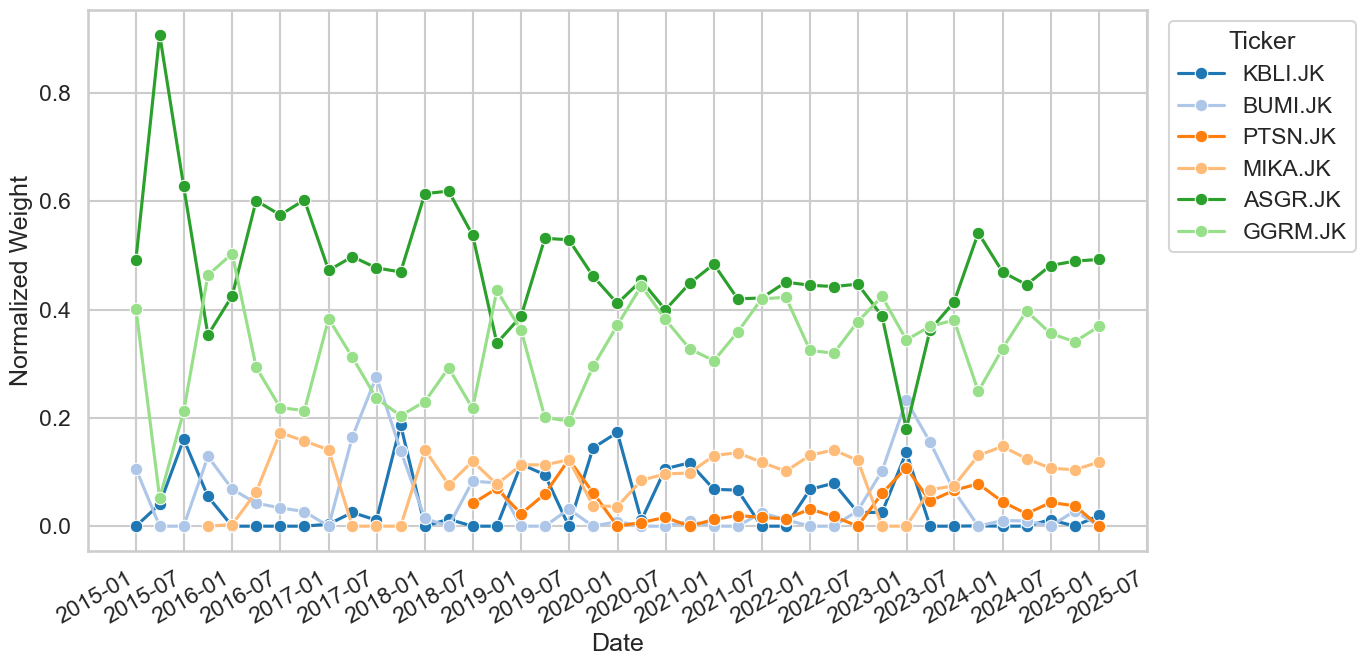

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Pastikan kolom 'Date' bertipe datetime
df_final_aglo['Date'] = pd.to_datetime(df_final_aglo['Date'])

plt.figure(figsize=(14, 7))

# Line plot bobot tiap ticker per tanggal
sns.lineplot(data=df_final_aglo, x='Date', y='Normalized_Weight', hue='Ticker', marker='o', palette='tab20')

plt.xlabel('Date')
plt.ylabel('Normalized Weight')

# Format x-axis agar lebih rapi
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))              
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))    
plt.xticks(rotation=30, ha='right')                                     

# Legend di luar plot
plt.legend(title='Ticker', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.show()


Return

In [201]:
# Membaca data dari CSV
return_aglo = pd.read_csv('predictions_Return_Aglo_revisi.csv')
# Periksa beberapa baris pertama untuk memastikan data terformat dengan benar
print(return_aglo.head())

         Date   Ticker  Cluster      True  Predicted                Sector
0  2014-12-31  AALI.JK        3  0.065999  -0.013935  ConsumerNonCyclicals
1  2015-03-31  AALI.JK        3  0.002062  -0.008322  ConsumerNonCyclicals
2  2015-06-30  AALI.JK        3 -0.036071   0.063804  ConsumerNonCyclicals
3  2015-09-30  AALI.JK        3 -0.210240   0.051660  ConsumerNonCyclicals
4  2015-12-31  AALI.JK        3 -0.125517  -0.075981  ConsumerNonCyclicals


Portofolio Variance & Risk

In [202]:
import pandas as pd
import numpy as np

# Pastikan kolom Date bertipe datetime
df_final_aglo['Date'] = pd.to_datetime(df_final_aglo['Date'])
return_aglo['Date'] = pd.to_datetime(return_aglo['Date'])

# Ambil ticker unik dari df_final_dbscan (Code 1)
tickers_code1 = set(df_final_aglo['Ticker'].unique())

# Filter return_dbscan agar hanya berisi ticker yang ada di df_final_dbscan
return_aglo_filtered = return_aglo[return_aglo['Ticker'].isin(tickers_code1)].copy()

# Merge dengan df_final_dbscan
merged = pd.merge(
    df_final_aglo[['Date', 'Ticker', 'Predicted', 'Normalized_Weight']],
    return_aglo_filtered[['Date', 'Ticker', 'Predicted']],
    on=['Date', 'Ticker'],
    suffixes=('', '_check'),
    how='left'
)

# Isi NaN di kolom 'Predicted' dari return_dbscan_filtered dengan rata-rata per ticker (kolom)
merged['Predicted'] = merged['Predicted'].fillna(merged.groupby('Ticker')['Predicted'].transform('mean'))

# Pivot data return untuk covariance matrix hanya menggunakan ticker dari df_final_dbscan
returns_pivot = merged.pivot_table(index='Date', columns='Ticker', values='Predicted')

# Isi NaN di returns_pivot dengan mean per ticker
returns_pivot = returns_pivot.fillna(returns_pivot.mean())

# Pivot bobot per tanggal
weights_pivot = merged.pivot(index='Date', columns='Ticker', values='Normalized_Weight')

# Isi NaN di bobot dengan mean per ticker
weights_pivot = weights_pivot.fillna(weights_pivot.mean())

# Normalisasi bobot supaya jumlah bobot per tanggal = 1
weights_pivot = weights_pivot.div(weights_pivot.sum(axis=1), axis=0)

# Hitung covariance matrix antar aset selama seluruh periode
cov_matrix = returns_pivot.cov()

# Hitung variance dan std per tanggal
variance_list = []
std_list = []
dates = weights_pivot.index

for date in dates:
    w = weights_pivot.loc[date].dropna()
    tickers = w.index
    
    cov_sub = cov_matrix.loc[tickers, tickers].values
    w_vec = w.values.reshape(-1, 1)
    port_var = float(w_vec.T @ cov_sub @ w_vec)
    port_std = np.sqrt(port_var)
    
    variance_list.append(port_var)
    std_list.append(port_std)

risk_df = pd.DataFrame({
    'Date': dates,
    'Portfolio_Variance': variance_list,
    'Portfolio_StdDev': std_list
})

# Hitung return portofolio per tanggal
portfolio_returns = merged.groupby('Date').apply(
    lambda df: np.sum(df['Normalized_Weight'] * df['Predicted'])
).rename("Portfolio_Return").reset_index()

# Ambil ticker per tanggal dari weights_pivot (ticker aktif per tanggal)
tickers_per_date = weights_pivot.apply(lambda row: row.dropna().index.tolist(), axis=1)

# Buat DataFrame ticker per tanggal
ticker_date_df_aglo = tickers_per_date.reset_index().explode(0)
ticker_date_df_aglo.columns = ['Date', 'Ticker']

# Gabungkan return dan risiko dengan ticker per tanggal
final_result_with_ticker_aglo = pd.merge(
    ticker_date_df_aglo,
    portfolio_returns,
    on='Date',
    how='left'
)
final_result_with_ticker_aglo = pd.merge(
    final_result_with_ticker_aglo,
    risk_df,
    on='Date',
    how='left'
)

# Urutkan kolom sesuai permintaan
final_result_with_ticker_aglo = final_result_with_ticker_aglo[
    ['Date', 'Ticker', 'Portfolio_Return', 'Portfolio_Variance', 'Portfolio_StdDev']
]

print(final_result_with_ticker_aglo)


          Date   Ticker  Portfolio_Return  Portfolio_Variance  \
0   2014-12-31  ASGR.JK         -0.373805            0.027502   
1   2014-12-31  BUMI.JK         -0.373805            0.027502   
2   2014-12-31  GGRM.JK         -0.373805            0.027502   
3   2014-12-31  KBLI.JK         -0.373805            0.027502   
4   2014-12-31  MIKA.JK         -0.373805            0.027502   
..         ...      ...               ...                 ...   
241 2024-12-31  BUMI.JK         -0.773411            0.031738   
242 2024-12-31  GGRM.JK         -0.773411            0.031738   
243 2024-12-31  KBLI.JK         -0.773411            0.031738   
244 2024-12-31  MIKA.JK         -0.773411            0.031738   
245 2024-12-31  PTSN.JK         -0.773411            0.031738   

     Portfolio_StdDev  
0            0.165836  
1            0.165836  
2            0.165836  
3            0.165836  
4            0.165836  
..                ...  
241          0.178151  
242          0.178151  
243

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\3438109873.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  port_var = float(w_vec.T @ cov_sub @ w_vec)
C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\3438109873.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  portfolio_returns = merged.groupby('Date').apply(


Sharpe Ratio

Rata-rata

In [203]:
import numpy as np

# 1. Hitung rata-rata return dan standar deviasi per ticker
mean_return =return_aglo.groupby('Ticker')['Predicted'].mean()
std_return = return_aglo.groupby('Ticker')['Predicted'].std()

# 2. Ambil risk-free rate rata-rata kuartalan dari BI Rate
mean_risk_free = quarterly_risk_free.mean()

# 3. Ambil ticker dari df_final
tickers_df_final = set(df_final['Ticker'].unique())

# 4. Filter mean_return dan std_return agar hanya ticker di df_final
mean_return = mean_return[mean_return.index.isin(tickers_df_final)]
std_return = std_return[std_return.index.isin(tickers_df_final)]

# 5. Hitung Sharpe Ratio per ticker
sharpe_ratio_per_ticker = (mean_return - mean_risk_free) / std_return

# 6. Ambil bobot rata-rata per ticker dari df_final
weights_df = df_final.groupby('Ticker')['Normalized_Weight'].mean()

# 7. Sinkronisasi indeks ticker
common_tickers = sharpe_ratio_per_ticker.index.intersection(weights_df.index)
sharpe_ratio_per_ticker = sharpe_ratio_per_ticker[common_tickers].sort_index()
weights_df = weights_df[common_tickers].sort_index()

# 8. Pastikan sinkron
assert sharpe_ratio_per_ticker.index.equals(weights_df.index), "Indeks ticker belum sinkron!"

# 9. Hitung Sharpe Ratio Portofolio (dot product bobot dan sharpe ratio)
portfolio_sharpe_ratio_aglo = np.dot(weights_df.values, sharpe_ratio_per_ticker.values)

print(f"Sharpe Ratio Portofolio: {portfolio_sharpe_ratio_aglo:.6f}")

Sharpe Ratio Portofolio: -0.227089


Per ticker

In [204]:
import numpy as np
import pandas as pd

# 1. Konversi kolom Date ke datetime jika belum
return_aglo['Date'] = pd.to_datetime(return_aglo['Date'])

# 2. Filter hanya ticker yang ada di df_final
tickers_df_final = set(df_final_aglo['Ticker'].unique())
df_filtered = return_aglo[return_aglo['Ticker'].isin(tickers_df_final)]

# 3. Ambil bobot per ticker
weights_df = df_final.groupby('Ticker')['Normalized_Weight'].mean()

# 5. Gabungkan risk-free rate ke data prediksi
df_filtered = df_filtered.copy()
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered = df_filtered.set_index('Date')
df_filtered['Risk_Free'] = quarterly_risk_free
df_filtered = df_filtered.reset_index()

# 6. Hitung excess return: Predicted - Risk_Free
df_filtered['Excess_Return'] = df_filtered['Predicted'] - df_filtered['Risk_Free']

# 7. Hitung Sharpe Ratio per tanggal (menggunakan std dev per ticker tetap)
std_return = return_aglo.groupby('Ticker')['Predicted'].std()

# Buat list hasil
results = []

for date in df_filtered['Date'].unique():
    daily_data = df_filtered[df_filtered['Date'] == date]

    sharpe_per_ticker = []
    for _, row in daily_data.iterrows():
        ticker = row['Ticker']
        if ticker not in weights_df or ticker not in std_return:
            continue
        std = std_return[ticker]
        if std == 0 or np.isnan(std):
            continue
        sharpe = row['Excess_Return'] / std
        weight = weights_df[ticker]
        sharpe_per_ticker.append((ticker, sharpe, weight))

    # Hitung Sharpe Portofolio
    if sharpe_per_ticker:
        tickers, sharpes, weights = zip(*sharpe_per_ticker)
        portfolio_sharpe = np.dot(weights, sharpes)
        for ticker in tickers:
            results.append({
                'Date': date,
                'Ticker': ticker,
                'Sharpe_Ratio_Portofolio': portfolio_sharpe
            })

# 8. Buat DataFrame output
sharpe_df_aglo = pd.DataFrame(results)
print(sharpe_df_aglo)


          Date   Ticker  Sharpe_Ratio_Portofolio
0   2014-12-31  BUMI.JK                -0.136680
1   2015-03-31  BUMI.JK                 0.054408
2   2015-06-30  BUMI.JK                 0.022078
3   2015-09-30  BUMI.JK                 0.066325
4   2015-12-31  BUMI.JK                -0.163228
..         ...      ...                      ...
100 2024-09-30  PTSN.JK                -0.433003
101 2024-09-30  MIKA.JK                -0.433003
102 2024-12-31  BUMI.JK                -0.747404
103 2024-12-31  PTSN.JK                -0.747404
104 2024-12-31  MIKA.JK                -0.747404

[105 rows x 3 columns]


Visualisasi

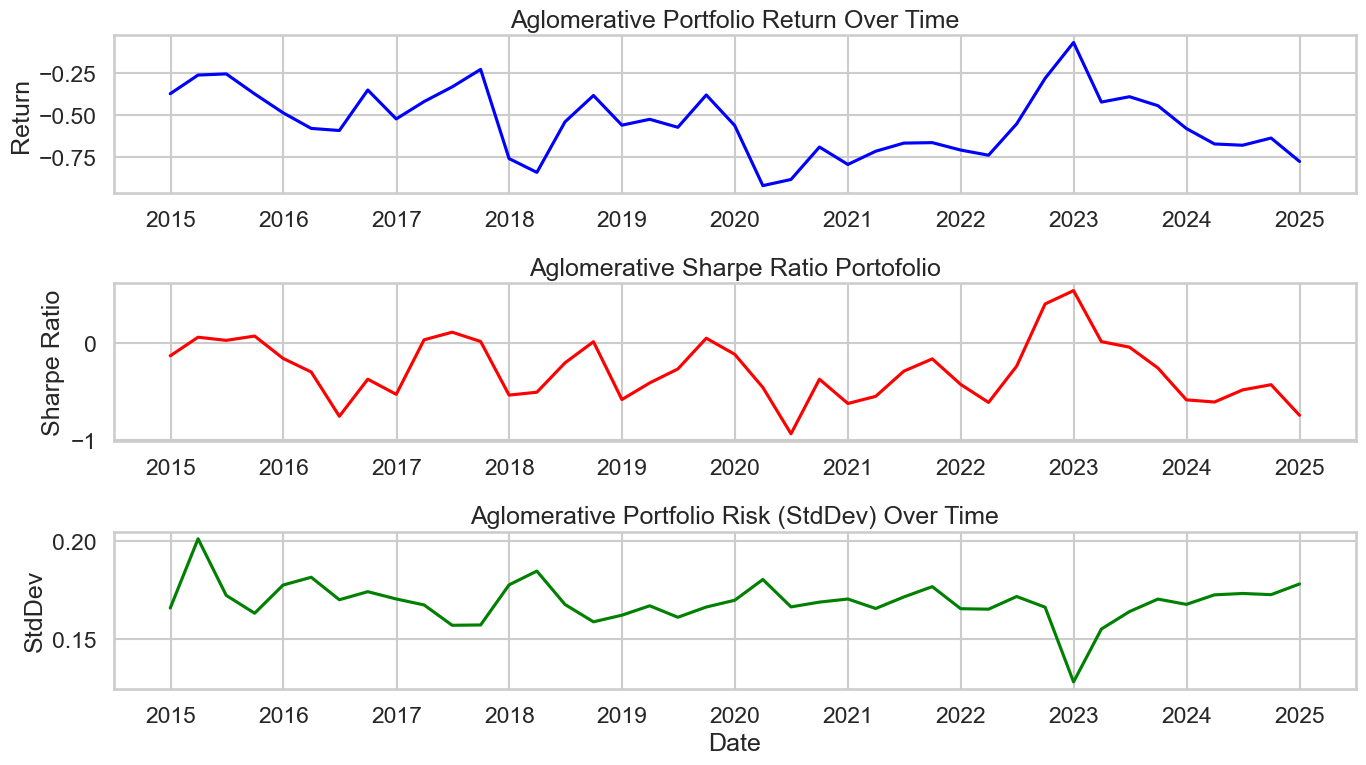

In [205]:
import matplotlib.dates as mdates

# Ambil data unik per tanggal supaya gak dobel di plot
daily_data = final_result_with_ticker_aglo[['Date', 'Portfolio_Return', 'Portfolio_Variance', 'Portfolio_StdDev']].drop_duplicates(subset='Date').sort_values('Date')
daily_data_sharpe_ratio = sharpe_df_aglo[['Date', 'Sharpe_Ratio_Portofolio']].drop_duplicates(subset='Date').sort_values('Date')

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(daily_data['Date'], daily_data['Portfolio_Return'], label='Portfolio Return', color='blue')
plt.title('Aglomerative Portfolio Return Over Time')
plt.ylabel('Return')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tampilkan setiap tahun
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.subplot(3, 1, 2)
plt.plot(daily_data_sharpe_ratio['Date'], daily_data_sharpe_ratio['Sharpe_Ratio_Portofolio'], label='Sharpe Ratio Portofolio', color='red')
plt.title('Aglomerative Sharpe Ratio Portofolio')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.subplot(3, 1, 3)
plt.plot(daily_data['Date'], daily_data['Portfolio_StdDev'], label='Portfolio StdDev (Risk)', color='green')
plt.title('Aglomerative Portfolio Risk (StdDev) Over Time')
plt.ylabel('StdDev')
plt.xlabel('Date')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


Expected Return

In [206]:
import numpy as np

# 1. Hitung rata-rata return per ticker
expected_return_per_ticker_aglo = return_aglo.groupby('Ticker')['Predicted'].mean()

# 2. Ambil ticker unik dari df_final
tickers_df_final = set(df_final_aglo['Ticker'].unique())

# 3. Filter expected_return_per_ticker agar ticker-nya hanya yang ada di df_final
expected_return_per_ticker_aglo = expected_return_per_ticker_aglo[expected_return_per_ticker_aglo.index.isin(tickers_df_final)]

# 4. Ambil bobot rata-rata per ticker dari df_final
weights_df_aglo = df_final_aglo.groupby('Ticker')['Normalized_Weight'].mean()

# 5. Filter bobot agar ticker-nya sama dengan expected_return_per_ticker
weights_df_aglo = weights_df_aglo[weights_df_aglo.index.isin(expected_return_per_ticker_aglo.index)]

# 6. Urutkan keduanya berdasarkan index agar sinkron
expected_return_per_ticker_aglo = expected_return_per_ticker_aglo.sort_index()
weights_df_aglo = weights_df_aglo.sort_index()

# 7. Pastikan ticker sudah sinkron
assert expected_return_per_ticker_aglo.index.equals(weights_df_aglo.index), "Ticker belum sinkron!"

# 8. Hitung expected portfolio return
expected_portfolio_return_aglo = np.dot(weights_df_aglo.values, expected_return_per_ticker_aglo.values)

print(f"Expected Return Portofolio: {expected_portfolio_return_aglo:.6f}")


Expected Return Portofolio: -0.010208


Visualisasi

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\941915055.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(viz_df['Ticker'], rotation=45, ha='right')


<Figure size 1400x700 with 0 Axes>

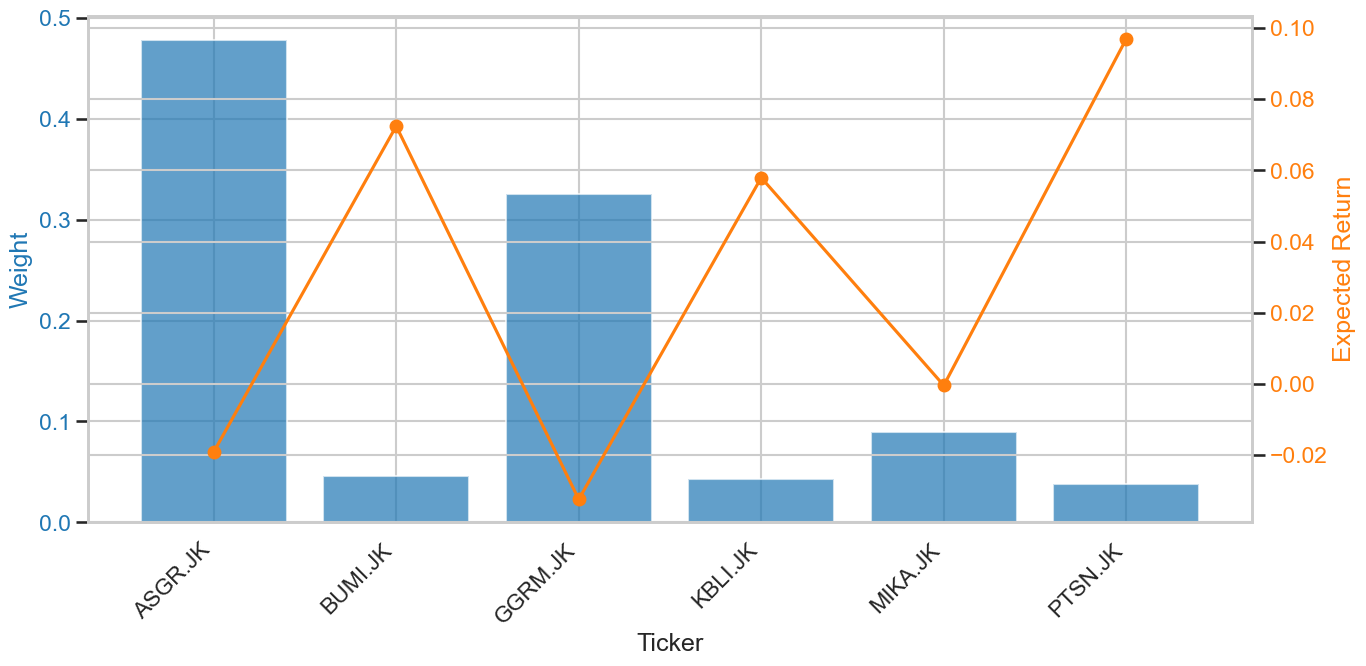

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gabungkan bobot dan expected return dalam satu DataFrame untuk visualisasi
viz_df = pd.DataFrame({
    'Ticker': weights_df_aglo.index,
    'Weight': weights_df_aglo.values,
    'Expected Return': expected_return_per_ticker_aglo.values
})

# Set style seaborn
sns.set(style='whitegrid', context='talk')

# Ukuran figure
plt.figure(figsize=(14, 7))

# Bar chart bobot dan expected return (dua y-axis)
fig, ax1 = plt.subplots(figsize=(14,7))

color1 = 'tab:blue'
color2 = 'tab:orange'

ax1.bar(viz_df['Ticker'], viz_df['Weight'], color=color1, alpha=0.7, label='Weight')
ax1.set_xlabel('Ticker')
ax1.set_ylabel('Weight', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(viz_df['Ticker'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(viz_df['Ticker'], viz_df['Expected Return'], color=color2, marker='o', label='Expected Return')
ax2.set_ylabel('Expected Return', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# plt.title('Aglomerative Portfolio Allocation and Expected Returns for Each Ticker')
fig.tight_layout()
plt.show()

Beta

In [208]:
import numpy as np
import pandas as pd

# Nilai eps global (konsisten untuk semua klasifikasi Beta)
EPSILON = 1e-1

# Fungsi klasifikasi beta
def beta_class(val, eps=EPSILON):
    if val > 1 + eps:
        return 1
    elif -eps < val < eps:
        return 0
    else:
        return -1

# Fungsi Beta Manual
def calculate_beta_manual(df, market_series, period):
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom dengan format (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()
    beta_series = []

    for ticker in tickers:
        stock_return = df[('Close', ticker)].pct_change()
        market_return = market_series.pct_change()

        # Sinkronisasi index
        common_index = stock_return.dropna().index.intersection(market_return.dropna().index)
        stock_return = stock_return.loc[common_index]
        market_return = market_return.loc[common_index]

        df_sync = pd.DataFrame({
            'stock_return': stock_return,
            'market_return': market_return
        }).dropna()

        if len(df_sync) >= period:
            rolling_cov = df_sync['stock_return'].rolling(period).cov(df_sync['market_return'])
            rolling_var = df_sync['market_return'].rolling(period).var()
            beta = rolling_cov / rolling_var
            beta_df = pd.DataFrame({ticker: beta}, index=df_sync.index)
            beta_series.append(beta_df)

    return pd.concat(beta_series, axis=1).dropna() if beta_series else pd.DataFrame()

# Dictionary sektor (pastikan data sektor dan IHSG Anda sudah didefinisikan sebelumnya)
sector_dict = {
    'Property': dataProp,
    'BasicMaterial': dataBasic_Materials,
    'ConsumerCyclicals': dataConsC,
    'ConsumerNonCyclicals': dataConsCnon,
    'Energy': dataEnergy,
    'Finance': dataFinance,
    'Health': dataHealth,
    'Industry': dataIndustri,
    'Infrastructure': dataInfra,
    'Tech': datatech,
    'Transport': dataTransport,
}

# Ambil seri IHSG
ihsg_series = ihsg['Terakhir']

# Hitung beta untuk semua sektor
beta_list = []

for sector_name, sector_df in sector_dict.items():
    common_index = sector_df.index.intersection(ihsg_series.index)
    sector_df_sync = sector_df.loc[common_index]
    ihsg_series_sync = ihsg_series.loc[common_index]

    beta_result = calculate_beta_manual(sector_df_sync, ihsg_series_sync, period=20)
    if not beta_result.empty:
        beta_long = beta_result.stack().reset_index()
        beta_long.columns = ['Date', 'Ticker', 'Beta']
        beta_long['Sektor'] = sector_name
        beta_long['Class'] = beta_long['Beta'].apply(lambda x: beta_class(x, eps=EPSILON))
        beta_list.append(beta_long)

# Gabungkan semua hasil beta
beta_df_aglo = pd.concat(beta_list, ignore_index=True) if beta_list else pd.DataFrame()

# Konversi tipe tanggal
beta_df_aglo['Date'] = pd.to_datetime(beta_df_aglo['Date'])
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Fungsi untuk mengambil beta berdasarkan ticker dan tanggal
def get_beta(row, beta_group):
    df_ticker = beta_group[beta_group['Ticker'] == row['Ticker']]
    df_ticker = df_ticker[df_ticker['Date'] <= row['Date']]
    if not df_ticker.empty:
        return df_ticker.iloc[-1]['Beta']
    return np.nan

# Ambil beta untuk setiap baris di df_filtered
df_filtered_aglo['Beta'] = df_filtered_aglo.apply(lambda row: get_beta(row, beta_df_aglo), axis=1)
df_filtered_aglo['Beta'] = df_filtered_aglo['Beta'].fillna(0)

# Klasifikasi beta (dengan eps yang sama)
df_filtered_aglo['Class'] = df_filtered_aglo['Beta'].apply(lambda x: beta_class(x, eps=EPSILON))

# --- START Modifikasi agar tiap ticker hanya punya satu kelas ---

# Tentukan kelas mode (paling sering muncul) untuk setiap ticker
mode_class_per_ticker = df_filtered_aglo.groupby('Ticker')['Class'].agg(lambda x: x.mode().iloc[0])

# Buat dictionary mapping ticker -> kelas mode
ticker_to_class = mode_class_per_ticker.to_dict()

# Override kelas di df_filtered agar konsisten per ticker
df_filtered_aglo['Class'] = df_filtered_aglo['Ticker'].map(ticker_to_class)

# --- END Modifikasi ---

# Output hasil
print(df_filtered_aglo)
print(df_filtered_aglo['Class'].value_counts())


           Date   Ticker  Cluster      True  Predicted                Sector  \
0    2014-12-31  KBLI.JK        3 -0.218111  -0.031837              Industry   
1    2015-03-31  KBLI.JK        3 -0.241155   0.131279              Industry   
2    2015-06-30  KBLI.JK        3 -0.625047   0.149685              Industry   
3    2015-09-30  KBLI.JK        3 -0.804450   0.065473              Industry   
4    2015-12-31  KBLI.JK        3  0.482748   0.019669              Industry   
..          ...      ...      ...       ...        ...                   ...   
224  2023-12-31  GGRM.JK        2 -1.459674  -0.548452  ConsumerNonCyclicals   
225  2024-03-31  GGRM.JK        2 -0.505185  -0.716961  ConsumerNonCyclicals   
226  2024-06-30  GGRM.JK        2 -0.955000  -0.655681  ConsumerNonCyclicals   
227  2024-09-30  GGRM.JK        2 -1.143945  -0.594955  ConsumerNonCyclicals   
228  2024-12-31  GGRM.JK        2 -1.405439  -0.729499  ConsumerNonCyclicals   

         Beta  Class  
0    0.000000   

In [209]:
import numpy as np
import pandas as pd

# ============ SOLUSI 1: SESUAIKAN EPSILON ============

# Nilai eps yang lebih realistis untuk data Indonesia
EPSILON = 0.3  # Lebih besar untuk menangkap variasi beta

# Fungsi klasifikasi beta yang diperbaiki
def beta_class_improved(val, eps=EPSILON):
    """
    Klasifikasi beta dengan threshold yang lebih realistis:
    - Class 1 (Agresif): Beta > 1 + eps (> 1.3)
    - Class 0 (Netral): 1 - eps <= Beta <= 1 + eps (0.7 <= Beta <= 1.3)
    - Class -1 (Defensif): Beta < 1 - eps (< 0.7)
    """
    if val > 1 + eps:
        return 1
    elif val < 1 - eps:
        return -1
    else:
        return 0

# ============ SOLUSI 2: KLASIFIKASI BERDASARKAN PERCENTILE ============

def beta_class_percentile(beta_series):
    """
    Klasifikasi berdasarkan percentile untuk memastikan distribusi yang seimbang
    """
    # Hapus nilai 0 (missing data) untuk perhitungan percentile
    clean_beta = beta_series[beta_series != 0]
    
    if len(clean_beta) == 0:
        # Jika semua 0, return Series dengan nilai 0
        return pd.Series([0] * len(beta_series), index=beta_series.index)
    
    # Hitung percentile
    p33 = clean_beta.quantile(0.33)
    p67 = clean_beta.quantile(0.67)
    
    def classify_beta(val):
        if val == 0:  # Handle missing data
            return 0  # Netral untuk data yang hilang
        elif val > p67:
            return 1   # Top 33% = Agresif
        elif val < p33:
            return -1  # Bottom 33% = Defensif
        else:
            return 0   # Middle 33% = Netral
    
    return beta_series.apply(classify_beta)

# ============ SOLUSI 3: KLASIFIKASI ADAPTIF ============

def beta_class_adaptive(beta_series):
    """
    Klasifikasi adaptif berdasarkan statistik data aktual
    """
    # Hapus outlier dan nilai 0 dengan cara yang aman
    non_zero_mask = beta_series != 0
    
    if not non_zero_mask.any():
        # Jika semua nilai 0, return Series dengan nilai 0
        return pd.Series([0] * len(beta_series), index=beta_series.index)
    
    # Filter nilai non-zero dulu
    non_zero_beta = beta_series[non_zero_mask]
    
    # Hitung quantile dari nilai non-zero
    q05 = non_zero_beta.quantile(0.05)
    q95 = non_zero_beta.quantile(0.95)
    
    # Filter outlier
    outlier_mask = (non_zero_beta >= q05) & (non_zero_beta <= q95)
    clean_beta = non_zero_beta[outlier_mask]
    
    if len(clean_beta) == 0:
        return pd.Series([0] * len(beta_series), index=beta_series.index)
    
    mean_beta = clean_beta.mean()
    std_beta = clean_beta.std()
    
    # Threshold berdasarkan mean ± 0.5*std
    upper_threshold = mean_beta + 0.5 * std_beta
    lower_threshold = mean_beta - 0.5 * std_beta
    
    def classify_beta(val):
        if val == 0:
            return 0  # Netral untuk missing data
        elif val > upper_threshold:
            return 1   # Agresif
        elif val < lower_threshold:
            return -1  # Defensif
        else:
            return 0   # Netral
    
    return beta_series.apply(classify_beta)

# ============ KODE UTAMA YANG DIPERBAIKI ============

# Fungsi Beta Manual (sama seperti sebelumnya)
def calculate_beta_manual(df, market_series, period):
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom dengan format (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()
    beta_series = []

    for ticker in tickers:
        stock_return = df[('Close', ticker)].pct_change()
        market_return = market_series.pct_change()

        # Sinkronisasi index
        common_index = stock_return.dropna().index.intersection(market_return.dropna().index)
        stock_return = stock_return.loc[common_index]
        market_return = market_return.loc[common_index]

        df_sync = pd.DataFrame({
            'stock_return': stock_return,
            'market_return': market_return
        }).dropna()

        if len(df_sync) >= period:
            rolling_cov = df_sync['stock_return'].rolling(period).cov(df_sync['market_return'])
            rolling_var = df_sync['market_return'].rolling(period).var()
            beta = rolling_cov / rolling_var
            beta_df = pd.DataFrame({ticker: beta}, index=df_sync.index)
            beta_series.append(beta_df)

    return pd.concat(beta_series, axis=1).dropna() if beta_series else pd.DataFrame()

# Dictionary sektor (gunakan data Anda yang sudah ada)
sector_dict = {
    'Property': dataProp,
    'BasicMaterial': dataBasic_Materials,
    'ConsumerCyclicals': dataConsC,
    'ConsumerNonCyclicals': dataConsCnon,
    'Energy': dataEnergy,
    'Finance': dataFinance,
    'Health': dataHealth,
    'Industry': dataIndustri,
    'Infrastructure': dataInfra,
    'Tech': datatech,
    'Transport': dataTransport,
}

# Ambil seri IHSG
ihsg_series = ihsg['Terakhir']

# Hitung beta untuk semua sektor
beta_list = []

for sector_name, sector_df in sector_dict.items():
    common_index = sector_df.index.intersection(ihsg_series.index)
    sector_df_sync = sector_df.loc[common_index]
    ihsg_series_sync = ihsg_series.loc[common_index]

    beta_result = calculate_beta_manual(sector_df_sync, ihsg_series_sync, period=20)
    if not beta_result.empty:
        beta_long = beta_result.stack().reset_index()
        beta_long.columns = ['Date', 'Ticker', 'Beta']
        beta_long['Sektor'] = sector_name
        beta_list.append(beta_long)

# Gabungkan semua hasil beta
beta_df_aglo = pd.concat(beta_list, ignore_index=True) if beta_list else pd.DataFrame()

# Konversi tipe tanggal
beta_df_aglo['Date'] = pd.to_datetime(beta_df_aglo['Date'])
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Fungsi untuk mengambil beta berdasarkan ticker dan tanggal
def get_beta(row, beta_group):
    df_ticker = beta_group[beta_group['Ticker'] == row['Ticker']]
    df_ticker = df_ticker[df_ticker['Date'] <= row['Date']]
    if not df_ticker.empty:
        return df_ticker.iloc[-1]['Beta']
    return np.nan

# Ambil beta untuk setiap baris di df_filtered
df_filtered_aglo['Beta'] = df_filtered_aglo.apply(lambda row: get_beta(row, beta_df_aglo), axis=1)

# PERBAIKAN: Jangan langsung fillna(0), gunakan strategi yang lebih baik
print("Distribusi Beta sebelum fillna:")
print(df_filtered_aglo['Beta'].describe())
print(f"Jumlah nilai NaN: {df_filtered_aglo['Beta'].isna().sum()}")

# Strategi 1: Forward fill dalam grup ticker (lebih realistis)
df_filtered_aglo['Beta'] = df_filtered_aglo.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='ffill'))

# Strategi 2: Backward fill jika forward fill tidak cukup
df_filtered_aglo['Beta'] = df_filtered_aglo.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='bfill'))

# Strategi 3: Isi dengan median sektor jika masih ada yang kosong
try:
    # Hitung median beta per sektor (hanya untuk nilai yang tidak NaN)
    sector_beta_median = df_filtered_aglo.groupby('Sector')['Beta'].median()
    
    # Fungsi untuk mengisi beta yang masih NaN dengan median sektor
    def fill_beta_with_sector_median(row):
        if pd.isna(row['Beta']):
            if row['Sector'] in sector_beta_median.index:
                sector_median = sector_beta_median[row['Sector']]
                if pd.notna(sector_median):
                    return sector_median
            return 1.0  # Default ke beta netral jika sektor tidak ada atau median NaN
        else:
            return row['Beta']
    
    # Apply fungsi dengan axis=1
    df_filtered_aglo['Beta'] = df_filtered_aglo.apply(fill_beta_with_sector_median, axis=1)
    
except Exception as e:
    print(f"Error dalam pengisian median sektor: {e}")
    # Fallback: isi semua NaN dengan 1.0
    df_filtered_aglo['Beta'] = df_filtered_aglo['Beta'].fillna(1.0)

# Isi sisanya dengan 1.0 (beta netral pasar) daripada 0
df_filtered_aglo['Beta'] = df_filtered_aglo['Beta'].fillna(1.0)

print("\nDistribusi Beta setelah perbaikan:")
print(df_filtered_aglo['Beta'].describe())

# ============ TESTING BERBAGAI METODE KLASIFIKASI ============

print("\n" + "="*60)
print("TESTING BERBAGAI METODE KLASIFIKASI BETA")
print("="*60)

# Metode 1: Epsilon yang diperbaiki
try:
    df_filtered_aglo['Class_Improved'] = df_filtered_aglo['Beta'].apply(lambda x: beta_class_improved(x))
    print("Metode 1 - Epsilon 0.3:")
    print(df_filtered_aglo['Class_Improved'].value_counts().sort_index())
except Exception as e:
    print(f"Error metode 1: {e}")
    df_filtered_aglo['Class_Improved'] = 0

# Metode 2: Percentile
try:
    df_filtered_aglo['Class_Percentile'] = beta_class_percentile(df_filtered_aglo['Beta'])
    print("\nMetode 2 - Percentile:")
    print(df_filtered_aglo['Class_Percentile'].value_counts().sort_index())
except Exception as e:
    print(f"Error metode 2: {e}")
    df_filtered_aglo['Class_Percentile'] = 0

# Metode 3: Adaptive
try:
    df_filtered_aglo['Class_Adaptive'] = beta_class_adaptive(df_filtered_aglo['Beta'])
    print("\nMetode 3 - Adaptive:")
    print(df_filtered_aglo['Class_Adaptive'].value_counts().sort_index())
except Exception as e:
    print(f"Error metode 3: {e}")
    df_filtered_aglo['Class_Adaptive'] = 0

# Pilih metode terbaik (yang memberikan distribusi paling seimbang)
methods = ['Class_Improved', 'Class_Percentile', 'Class_Adaptive']
best_method = None
best_balance = float('inf')

for method in methods:
    try:
        counts = df_filtered_aglo[method].value_counts()
        unique_classes = len(counts)
        
        print(f"\n{method}: {unique_classes} unique classes")
        
        if unique_classes == 3:  # Harus ada 3 kelas
            balance = counts.std()  # Semakin kecil std, semakin seimbang
            print(f"Balance score (std): {balance:.2f}")
            if balance < best_balance:
                best_balance = balance
                best_method = method
        elif unique_classes > 1:  # Minimal 2 kelas
            balance = counts.std()
            print(f"Balance score (std): {balance:.2f} - hanya {unique_classes} kelas")
            if best_method is None:  # Ambil sebagai backup jika tidak ada yang 3 kelas
                best_method = method
                best_balance = balance
    except Exception as e:
        print(f"Error evaluating {method}: {e}")

if best_method:
    df_filtered_aglo['Class'] = df_filtered_aglo[best_method]
    print(f"\n🎯 METODE TERPILIH: {best_method}")
else:
    # Fallback ke epsilon method dengan nilai manual
    df_filtered_aglo['Class'] = df_filtered_aglo['Beta'].apply(
        lambda x: 1 if x > 1.2 else (-1 if x < 0.8 else 0)
    )
    print(f"\n🎯 METODE TERPILIH: Manual fallback")

# Tentukan kelas mode (paling sering muncul) untuk setiap ticker
mode_class_per_ticker = df_filtered_aglo.groupby('Ticker')['Class'].apply(
    lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 0
)

# Buat dictionary mapping ticker -> kelas mode
ticker_to_class = mode_class_per_ticker.to_dict()

# Override kelas di df_filtered agar konsisten per ticker
df_filtered_aglo['Class'] = df_filtered_aglo['Ticker'].map(ticker_to_class)

# Output hasil final
print("\n" + "="*60)
print("HASIL AKHIR")
print("="*60)
print("Distribusi Kelas Beta:")
print(df_filtered_aglo['Class'].value_counts().sort_index())

print("\nStatistik Beta per Kelas:")
beta_stats = df_filtered_aglo.groupby('Class')['Beta'].agg(['count', 'mean', 'std', 'min', 'max'])
print(beta_stats)

print("\nContoh data:")
sample_cols = ['Date', 'Ticker', 'Sector', 'Beta', 'Class']
available_cols = [col for col in sample_cols if col in df_filtered_aglo.columns]
print(df_filtered_aglo[available_cols].head(10))

# Cleanup kolom tambahan
cleanup_cols = [col for col in df_filtered_aglo.columns if col.startswith('Class_')]
if cleanup_cols:
    df_filtered_aglo = df_filtered_aglo.drop(columns=cleanup_cols)

print(f"\nFinal shape: {df_filtered_aglo.shape}")
print(f"Final columns: {list(df_filtered_aglo.columns)}")

Distribusi Beta sebelum fillna:
count    175.000000
mean       0.369599
std        1.452772
min       -6.807154
25%       -0.071938
50%        0.555973
75%        0.926468
max        6.450461
Name: Beta, dtype: float64
Jumlah nilai NaN: 54

Distribusi Beta setelah perbaikan:
count    229.000000
mean       0.559622
std        1.893192
min       -6.807154
25%       -0.208194
50%        0.595008
75%        0.985148
max        6.450461
Name: Beta, dtype: float64

TESTING BERBAGAI METODE KLASIFIKASI BETA
Metode 1 - Epsilon 0.3:
Class_Improved
-1    127
 0     61
 1     41
Name: count, dtype: int64

Metode 2 - Percentile:
Class_Percentile
-1    76
 0    77
 1    76
Name: count, dtype: int64

Metode 3 - Adaptive:
Class_Adaptive
-1     58
 0    112
 1     59
Name: count, dtype: int64

Class_Improved: 3 unique classes
Balance score (std): 45.00

Class_Percentile: 3 unique classes
Balance score (std): 0.58

Class_Adaptive: 3 unique classes
Balance score (std): 30.89

🎯 METODE TERPILIH: Class_Per

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\3856363304.py:189: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered_aglo['Beta'] = df_filtered_aglo.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='ffill'))
C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\3856363304.py:192: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered_aglo['Beta'] = df_filtered_aglo.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='bfill'))


Klasifikasi (SVM)

Cross-validated F1-macro scores: [0.7403127  0.55575095 0.68514002 0.7369509  0.73324026]
Mean F1-macro score: 0.6902789665494515

Classification Report on Hold-out Test Set:
              precision    recall  f1-score   support

          -1       0.82      0.56      0.67        16
           0       0.59      0.81      0.68        16
           1       0.69      0.64      0.67        14

    accuracy                           0.67        46
   macro avg       0.70      0.67      0.67        46
weighted avg       0.70      0.67      0.67        46



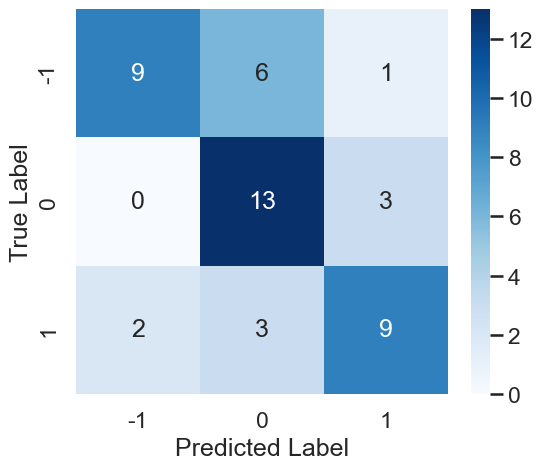


Representative Ticker per Class (based on SVM prediction):
Class -1: BUMI.JK
Class 0: ASGR.JK
Class 1: KBLI.JK


In [210]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ambil fitur dan label
X = df_filtered_aglo[['Beta']].values
y = df_filtered_aglo['Class'].values
tickers = df_filtered_aglo['Ticker'].values 

# 2. Split data latih dan uji
X_train, X_test, y_train, y_test, tickers_train, tickers_test = train_test_split(
    X, y, tickers, test_size=0.2, random_state=42, stratify=y
)

# 2. Buat pipeline: scaling → SMOTE → SVM
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# 3. Stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Evaluasi menggunakan cross_val_score
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')
print("Cross-validated F1-macro scores:", scores)
print("Mean F1-macro score:", scores.mean())

# 5. (Opsional) Fit dan evaluasi terakhir pada hold-out set untuk confusion matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nClassification Report on Hold-out Test Set:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.title('Confusion Matrix – SVM Classification using K-Means Labels')
plt.show()

# 7. Gabungkan hasil prediksi dengan informasi ticker dan beta
test_result = pd.DataFrame({
    'Ticker': tickers_test,
    'True_Class': y_test,
    'Predicted_Class': y_pred,
    'Beta': X_test.flatten()
})

# 8. Ambil perwakilan ticker untuk setiap kelas berdasarkan median beta
representative_tickers = {}
used_tickers = set()

for cls in sorted(test_result['Predicted_Class'].unique()):
    df_class = test_result[test_result['Predicted_Class'] == cls].copy()
    
    if not df_class.empty:
        median_beta = df_class['Beta'].median()
        df_class['Beta_Dist'] = (df_class['Beta'] - median_beta).abs()

        # Cari ticker representatif yang belum digunakan
        for _, row in df_class.sort_values('Beta_Dist').iterrows():
            ticker = row['Ticker']
            if ticker not in used_tickers:
                representative_tickers[cls] = ticker
                used_tickers.add(ticker)
                break


rep_ticker_result = representative_tickers

# 9. Tampilkan hasil
print("\nRepresentative Ticker per Class (based on SVM prediction):")
for cls, ticker in rep_ticker_result.items():
    print(f"Class {cls}: {ticker}")


Optimasi Portofolio

In [211]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Langsung tetapkan rep_ticker_result dari hasil klasifikasi
rep_ticker_result 

# Ambil expected return per ticker
expected_return_per_ticker = return_aglo.groupby('Ticker')['Predicted'].mean()

# Filter hanya ticker yang ada di df_final
tickers_df_final = set(df_final_aglo['Ticker'].unique())
expected_return_per_ticker = expected_return_per_ticker[expected_return_per_ticker.index.isin(tickers_df_final)]

# Ambil covariance matrix dari return prediksi
returns_pivot = merged.pivot(index='Date', columns='Ticker', values='Predicted')
returns_pivot = returns_pivot.fillna(returns_pivot.mean())
cov_matrix = returns_pivot.cov()

# Sinkronisasi ticker index
common_tickers = sorted(expected_return_per_ticker.index.intersection(cov_matrix.columns))
expected_return_per_ticker = expected_return_per_ticker[common_tickers]
cov_matrix = cov_matrix.loc[common_tickers, common_tickers]

# Dictionary untuk menyimpan skor kelas
class_scores = {}

# Loop per class hanya gunakan ticker dari rep_ticker_result
for cls in [-1, 0, 1]:
    print(f"\n========== Optimisasi untuk Class {cls} ==========")

    rep_ticker = rep_ticker_result.get(cls, None)
    if rep_ticker is None:
        print(f"Tidak ada ticker representatif untuk Class {cls}")
        continue

    if rep_ticker not in expected_return_per_ticker.index:
        print(f"Ticker {rep_ticker} tidak ditemukan dalam expected_return_per_ticker")
        continue

    if rep_ticker not in cov_matrix.columns:
        print(f"Ticker {rep_ticker} tidak ditemukan dalam covariance matrix")
        continue

    expected_return_class = expected_return_per_ticker.loc[[rep_ticker]]
    cov_matrix_class = cov_matrix.loc[[rep_ticker], [rep_ticker]]

    weights_class = (
        df_final[df_final['Ticker'] == rep_ticker]
        .groupby('Ticker')['Normalized_Weight']
        .mean()
        .reindex([rep_ticker])
        .fillna(0)
        .values
    )

    target_return = np.dot(weights_class, expected_return_class.values)

    # === Kasus 1 Ticker (langsung tampilkan) ===
    weight = 1.0
    std_dev = np.sqrt(cov_matrix_class.values[0][0])
    ret = expected_return_class.values[0]

    print("\n=== Optimal Portfolio Allocation ===")
    print(f"{rep_ticker}: {weight:.5f}")
    print(f"Expected Return: {ret:.6f}")
    print(f"Standard Deviation (Risk): {std_dev:.6f}")
    print(f"Sharpe Ratio: {ret / std_dev:.6f}")

    # Hitung skor class (boleh Sharpe ratio, expected return, dsb)
    # Di sini kita gunakan Sharpe ratio
    sharpe_ratio = ret / std_dev
    class_scores[cls] = sharpe_ratio

# === Normalisasi skor untuk dapatkan class weights ===
total_score = sum(class_scores.values())
class_weights = {cls: score / total_score for cls, score in class_scores.items()}

print("\n=== Normalized Class Weights ===")
for cls, w in class_weights.items():
    print(f"Class {cls}: {w:.4f}")



========== Optimisasi untuk Class -1 ==========

=== Optimal Portfolio Allocation ===
BUMI.JK: 1.00000
Expected Return: 0.072449
Standard Deviation (Risk): 0.117891
Sharpe Ratio: 0.614545

========== Optimisasi untuk Class 0 ==========

=== Optimal Portfolio Allocation ===
ASGR.JK: 1.00000
Expected Return: -0.019072
Standard Deviation (Risk): 0.233291
Sharpe Ratio: -0.081753

========== Optimisasi untuk Class 1 ==========

=== Optimal Portfolio Allocation ===
KBLI.JK: 1.00000
Expected Return: 0.057965
Standard Deviation (Risk): 0.142790
Sharpe Ratio: 0.405945

=== Normalized Class Weights ===
Class -1: 0.6547
Class 0: -0.0871
Class 1: 0.4324


DBSCAN

In [212]:
# Membaca data dari CSV
predictions_dbscan = pd.read_csv('predictions_dbscan_Final.csv')
# Periksa beberapa baris pertama untuk memastikan data terformat dengan benar
print(predictions_dbscan.head())

         Date   Ticker  Cluster      True  Predicted                Sector
0  2014-12-31  AALI.JK       -1 -0.050764  -0.431097  ConsumerNonCyclicals
1  2015-03-31  AALI.JK       -1 -0.380795  -0.401297  ConsumerNonCyclicals
2  2015-06-30  AALI.JK       -1 -0.573326  -0.012173  ConsumerNonCyclicals
3  2015-09-30  AALI.JK       -1 -1.472354  -0.061662  ConsumerNonCyclicals
4  2015-12-31  AALI.JK       -1 -1.035034  -0.756959  ConsumerNonCyclicals


Memilih aset representatif

In [213]:
# 1. Baca data
df = pd.read_csv('predictions_dbscan_Final.csv')

# 2. Hitung MAE per Ticker di tiap Cluster
mae_per_ticker = (
    df.groupby(['Cluster', 'Ticker'])
    .apply(lambda x: mean_absolute_error(x['True'], x['Predicted']))
    .reset_index(name='MAE')
)

# 3. Ambil Ticker dengan MAE terkecil per Cluster
representative_tickers = (
    mae_per_ticker.sort_values('MAE')
    .groupby('Cluster')
    .first()
    .reset_index()
)

# 4. Gabungkan dengan informasi sektor jika dibutuhkan
sector_info = df[['Ticker', 'Sector']].drop_duplicates()
representative_tickers_dbscan = representative_tickers.merge(sector_info, on='Ticker', how='left')

# 5. Tampilkan hasil
print(representative_tickers_dbscan)

   Cluster   Ticker       MAE   Sector
0       -1  BUMI.JK  0.544848   Energy
1        0  MIKA.JK  0.296308   Health
2        1  BBKP.JK  0.553753  Finance


C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\2874871243.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: mean_absolute_error(x['True'], x['Predicted']))


In [214]:
# 1. Baca hasil prediksi lengkap dari Code 1
df_all = predictions_dbscan

# 2. Baca hasil representative ticker per cluster dari Code 2
df_representative = representative_tickers_dbscan  # jika hasil Code 2 disimpan
# Jika tidak disimpan, bisa ulangi proses di Code 2 di sini

# 3. Ambil daftar ticker per cluster yang jadi representatif
selected_tickers = df_representative[['Cluster', 'Ticker']]

# 4. Gabungkan untuk ambil semua data dari ticker yang terpilih
df_filtered = pd.merge(df_all, selected_tickers, on=['Cluster', 'Ticker'], how='inner')

# 5. Simpan atau tampilkan hasil
df_filtered_dbscan = df_filtered[['Date', 'Ticker', 'Cluster', 'True', 'Predicted', 'Sector']]
print(df_filtered_dbscan)


           Date   Ticker  Cluster      True  Predicted   Sector
0    2014-12-31  BUMI.JK       -1 -1.180089  -0.170404   Energy
1    2015-03-31  BUMI.JK       -1 -0.181728   0.064037   Energy
2    2015-06-30  BUMI.JK       -1 -0.551077  -0.007925   Energy
3    2015-09-30  BUMI.JK       -1 -0.435548   0.105684   Energy
4    2015-12-31  BUMI.JK       -1 -0.135170   0.054118   Energy
..          ...      ...      ...       ...        ...      ...
115  2023-12-31  BBKP.JK        1 -0.574101  -0.237989  Finance
116  2024-03-31  BBKP.JK        1 -0.316096  -0.226445  Finance
117  2024-06-30  BBKP.JK        1 -1.162673  -0.232025  Finance
118  2024-09-30  BBKP.JK        1  0.627402  -0.234660  Finance
119  2024-12-31  BBKP.JK        1 -0.621415  -0.264450  Finance

[120 rows x 6 columns]


Pembobotan

In [215]:
def normalize_weights(weights):
    a = min(weights)
    b = max(weights)
    range_val = b - a

    # Jika semua nilai sama (range = 0), bagi rata bobot
    if range_val == 0:
        return [1 / len(weights) for _ in weights]

    # Skala ke [0,1]
    scaled_weights = [(w - a) / range_val for w in weights]

    sum_of_weights = sum(scaled_weights)
    # Jika jumlah 0 (misal semua bobot sama), bagi rata
    if sum_of_weights == 0:
        return [1 / len(weights) for _ in weights]

    normalized_weights = [w / sum_of_weights for w in scaled_weights]
    return normalized_weights


# Asumsi df_filtered sudah ada dan berisi kolom ['Date', 'Ticker', 'Cluster', 'True', 'Predicted', 'Sector']

# 1. Hitung bobot awal per tanggal berdasarkan nilai absolut 
def calculate_weights(df):
    df = df.copy()
    df['Abs_True'] = df['Predicted'].abs()
    total_sr_per_date = df.groupby('Date')['Abs_True'].transform('sum')
    df['Weight'] = df['Abs_True'] / total_sr_per_date
    return df

df_weighted = calculate_weights(df_filtered_dbscan)


# 2. Normalisasi bobot per tanggal dengan groupby.transform agar indeks tetap sinkron
def normalize_weights_per_date(df):
    df = df.copy()

    def normalize_series(s):
        # normalize_weights menerima list bobot dari satu tanggal
        return pd.Series(normalize_weights(s.tolist()), index=s.index)

    df['Normalized_Weight'] = df.groupby('Date')['Weight'].transform(normalize_series)
    return df

df_final_dbscan = normalize_weights_per_date(df_weighted)

# Tampilkan hasil akhir
print(df_final_dbscan[['Date', 'Ticker', 'True', 'Predicted', 'Normalized_Weight']])

# Verifikasi total Normalized_Weight per tanggal agar tepat 1
verification = df_final_dbscan.groupby('Date')['Normalized_Weight'].sum().reset_index()
verification.columns = ['Date', 'Total_Normalized_Weight']
print(verification)

# # Tambahan: cek apakah semua total tepat 1 dengan toleransi kecil
# tolerance = 1e-12
# if any((verification['Total_Normalized_Weight'] - 1).abs() > tolerance):
#     print("Warning: Ada tanggal dengan total Normalized_Weight tidak tepat 1!")
# else:
#     print("Semua tanggal total Normalized_Weight sudah tepat 1.")

           Date   Ticker      True  Predicted  Normalized_Weight
0    2014-12-31  BUMI.JK -1.180089  -0.170404           1.000000
1    2015-03-31  BUMI.JK -0.181728   0.064037           1.000000
2    2015-06-30  BUMI.JK -0.551077  -0.007925           0.000000
3    2015-09-30  BUMI.JK -0.435548   0.105684           0.313008
4    2015-12-31  BUMI.JK -0.135170   0.054118           0.166199
..          ...      ...       ...        ...                ...
115  2023-12-31  BBKP.JK -0.574101  -0.237989           0.509980
116  2024-03-31  BBKP.JK -0.316096  -0.226445           0.504140
117  2024-06-30  BBKP.JK -1.162673  -0.232025           0.582801
118  2024-09-30  BBKP.JK  0.627402  -0.234660           0.600574
119  2024-12-31  BBKP.JK -0.621415  -0.264450           0.539945

[120 rows x 5 columns]
          Date  Total_Normalized_Weight
0   2014-12-31                      1.0
1   2015-03-31                      1.0
2   2015-06-30                      1.0
3   2015-09-30                      

Visualisasi weight distribution

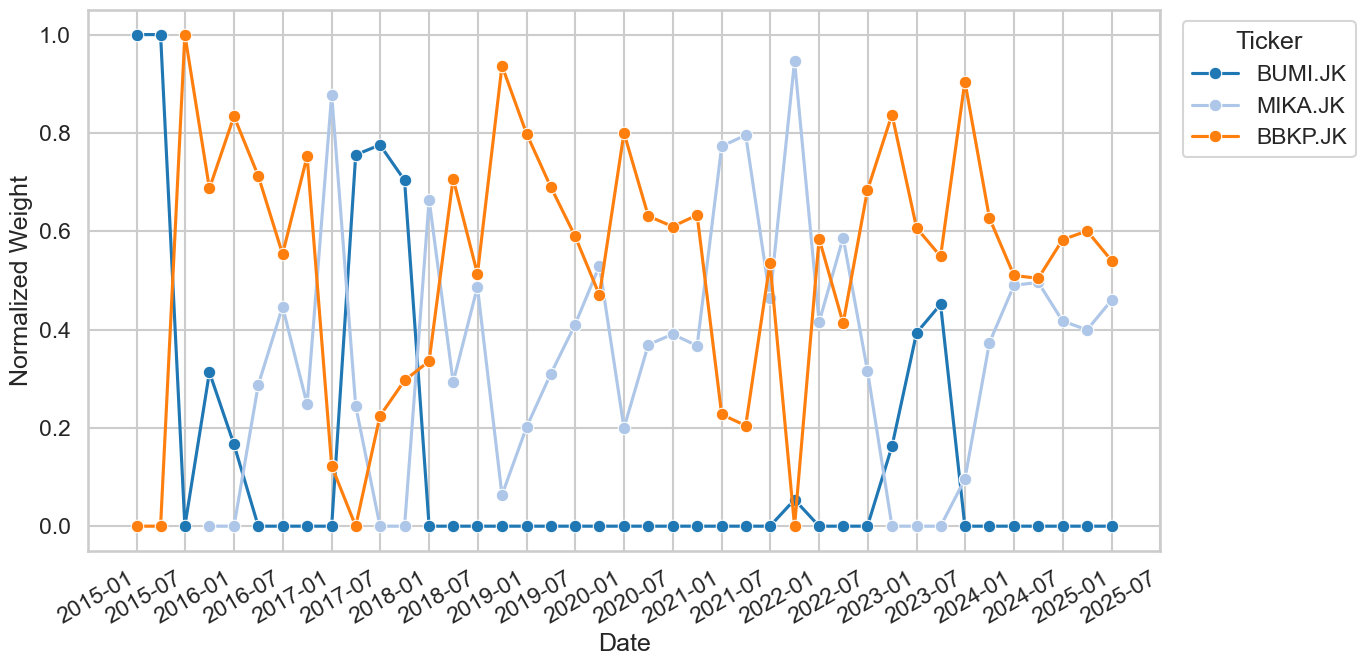

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Pastikan kolom 'Date' bertipe datetime
df_final_dbscan['Date'] = pd.to_datetime(df_final_dbscan['Date'])

plt.figure(figsize=(14, 7))

# Line plot bobot tiap ticker per tanggal
sns.lineplot(data=df_final_dbscan, x='Date', y='Normalized_Weight', hue='Ticker', marker='o', palette='tab20')

plt.xlabel('Date')
plt.ylabel('Normalized Weight')

# Format x-axis agar lebih rapi
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))               # Tampilkan tiap 6 bulan
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))               # Format Tahun-Bulan
plt.xticks(rotation=30, ha='right')                                       # Miringkan label tanggal dan sejajarkan ke kanan

# Legend di luar plot
plt.legend(title='Ticker', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.show()


Return

In [217]:
# Membaca data dari CSV
return_dbscan = pd.read_csv('predictions_Return_DBSCAN_Final.csv')
# Periksa beberapa baris pertama untuk memastikan data terformat dengan benar
print(return_dbscan.head())

         Date   Ticker  Cluster      True  Predicted                Sector
0  2014-12-31  AALI.JK       -1  0.065999  -0.021542  ConsumerNonCyclicals
1  2015-03-31  AALI.JK       -1  0.002062   0.006251  ConsumerNonCyclicals
2  2015-06-30  AALI.JK       -1 -0.036071   0.082199  ConsumerNonCyclicals
3  2015-09-30  AALI.JK       -1 -0.210240   0.062289  ConsumerNonCyclicals
4  2015-12-31  AALI.JK       -1 -0.125517  -0.071892  ConsumerNonCyclicals


Portofolio Variance & Risk

In [218]:
import pandas as pd
import numpy as np

# Pastikan kolom Date bertipe datetime
df_final_dbscan['Date'] = pd.to_datetime(df_final_dbscan['Date'])
return_dbscan['Date'] = pd.to_datetime(return_dbscan['Date'])

# Ambil ticker unik dari df_final_dbscan (Code 1)
tickers_code1 = set(df_final_dbscan['Ticker'].unique())

# Filter return_dbscan agar hanya berisi ticker yang ada di df_final_dbscan
return_dbscan_filtered = return_dbscan[return_dbscan['Ticker'].isin(tickers_code1)].copy()

# Merge dengan df_final_dbscan
merged = pd.merge(
    df_final_dbscan[['Date', 'Ticker', 'Predicted', 'Normalized_Weight']],
    return_dbscan_filtered[['Date', 'Ticker', 'Predicted']],
    on=['Date', 'Ticker'],
    suffixes=('', '_check'),
    how='left'
)

# Isi NaN di kolom 'Predicted' dari return_dbscan_filtered dengan rata-rata per ticker (kolom)
merged['Predicted'] = merged['Predicted'].fillna(merged.groupby('Ticker')['Predicted'].transform('mean'))

# Pivot data return untuk covariance matrix hanya menggunakan ticker dari df_final_dbscan
returns_pivot = merged.pivot(index='Date', columns='Ticker', values='Predicted')

# Isi NaN di returns_pivot dengan mean per ticker
returns_pivot = returns_pivot.fillna(returns_pivot.mean())

# Pivot bobot per tanggal
weights_pivot = merged.pivot(index='Date', columns='Ticker', values='Normalized_Weight')

# Isi NaN di bobot dengan mean per ticker
weights_pivot = weights_pivot.fillna(weights_pivot.mean())

# Normalisasi bobot supaya jumlah bobot per tanggal = 1
weights_pivot = weights_pivot.div(weights_pivot.sum(axis=1), axis=0)

# Hitung covariance matrix antar aset selama seluruh periode
cov_matrix = returns_pivot.cov()

# Hitung variance dan std per tanggal
variance_list = []
std_list = []
dates = weights_pivot.index

for date in dates:
    w = weights_pivot.loc[date].dropna()
    tickers = w.index
    
    cov_sub = cov_matrix.loc[tickers, tickers].values
    w_vec = w.values.reshape(-1, 1)
    port_var = float(w_vec.T @ cov_sub @ w_vec)
    port_std = np.sqrt(port_var)
    
    variance_list.append(port_var)
    std_list.append(port_std)

risk_df = pd.DataFrame({
    'Date': dates,
    'Portfolio_Variance': variance_list,
    'Portfolio_StdDev': std_list
})

# Hitung return portofolio per tanggal
portfolio_returns = merged.groupby('Date').apply(
    lambda df: np.sum(df['Normalized_Weight'] * df['Predicted'])
).rename("Portfolio_Return").reset_index()

# Ambil ticker per tanggal dari weights_pivot (ticker aktif per tanggal)
tickers_per_date = weights_pivot.apply(lambda row: row.dropna().index.tolist(), axis=1)

# Buat DataFrame ticker per tanggal
ticker_date_df_dbscan = tickers_per_date.reset_index().explode(0)
ticker_date_df_dbscan.columns = ['Date', 'Ticker']

# Gabungkan return dan risiko dengan ticker per tanggal
final_result_with_ticker_dbscan = pd.merge(
    ticker_date_df_dbscan,
    portfolio_returns,
    on='Date',
    how='left'
)
final_result_with_ticker_dbscan = pd.merge(
    final_result_with_ticker_dbscan,
    risk_df,
    on='Date',
    how='left'
)

# Urutkan kolom sesuai permintaan
final_result_with_ticker_dbscan = final_result_with_ticker_dbscan[
    ['Date', 'Ticker', 'Portfolio_Return', 'Portfolio_Variance', 'Portfolio_StdDev']
]

print(final_result_with_ticker_dbscan)


          Date   Ticker  Portfolio_Return  Portfolio_Variance  \
0   2014-12-31  BBKP.JK         -0.170404            0.011678   
1   2014-12-31  BUMI.JK         -0.170404            0.011678   
2   2014-12-31  MIKA.JK         -0.170404            0.011678   
3   2015-03-31  BBKP.JK          0.064037            0.011678   
4   2015-03-31  BUMI.JK          0.064037            0.011678   
..         ...      ...               ...                 ...   
118 2024-09-30  BUMI.JK         -0.205923            0.008493   
119 2024-09-30  MIKA.JK         -0.205923            0.008493   
120 2024-12-31  BBKP.JK         -0.246847            0.007192   
121 2024-12-31  BUMI.JK         -0.246847            0.007192   
122 2024-12-31  MIKA.JK         -0.246847            0.007192   

     Portfolio_StdDev  
0            0.108063  
1            0.108063  
2            0.108063  
3            0.108063  
4            0.108063  
..                ...  
118          0.092156  
119          0.092156  
120

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\291829174.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  port_var = float(w_vec.T @ cov_sub @ w_vec)
C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\291829174.py:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  portfolio_returns = merged.groupby('Date').apply(


Sharpe ratio

Rata-rata sharpe ratio

In [219]:
import numpy as np

# 1. Hitung rata-rata return dan standar deviasi per ticker
mean_return = return_dbscan.groupby('Ticker')['Predicted'].mean()
std_return = predictions_dbscan.groupby('Ticker')['Predicted'].std()

# 2. Ambil risk-free rate rata-rata kuartalan dari BI Rate
mean_risk_free = quarterly_risk_free.mean()

# 3. Ambil ticker dari df_final
tickers_df_final = set(df_final['Ticker'].unique())

# 4. Filter mean_return dan std_return agar hanya ticker di df_final
mean_return = mean_return[mean_return.index.isin(tickers_df_final)]
std_return = std_return[std_return.index.isin(tickers_df_final)]

# 5. Hitung Sharpe Ratio per ticker
sharpe_ratio_per_ticker = (mean_return - mean_risk_free) / std_return

# 6. Ambil bobot rata-rata per ticker dari df_final
weights_df = df_final.groupby('Ticker')['Normalized_Weight'].mean()

# 7. Sinkronisasi indeks ticker
common_tickers = sharpe_ratio_per_ticker.index.intersection(weights_df.index)
sharpe_ratio_per_ticker = sharpe_ratio_per_ticker[common_tickers].sort_index()
weights_df = weights_df[common_tickers].sort_index()

# 8. Pastikan sinkron
assert sharpe_ratio_per_ticker.index.equals(weights_df.index), "Indeks ticker belum sinkron!"

# 9. Hitung Sharpe Ratio Portofolio (dot product bobot dan sharpe ratio)
portfolio_sharpe_ratio_dbscan = np.dot(weights_df.values, sharpe_ratio_per_ticker.values)

print(f"Sharpe Ratio Portofolio: {portfolio_sharpe_ratio_dbscan:.6f}")

Sharpe Ratio Portofolio: 0.204652


Sharpe ratio per ticker

In [220]:
import numpy as np
import pandas as pd

# 1. Konversi kolom Date ke datetime jika belum
return_dbscan['Date'] = pd.to_datetime(return_dbscan['Date'])

# 2. Filter hanya ticker yang ada di df_final
tickers_df_final = set(df_final_dbscan['Ticker'].unique())
df_filtered = return_dbscan[return_dbscan['Ticker'].isin(tickers_df_final)]

# 3. Ambil bobot per ticker
weights_df = df_final_dbscan.groupby('Ticker')['Normalized_Weight'].mean()

# 5. Gabungkan risk-free rate ke data prediksi
df_filtered = df_filtered.copy()
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered = df_filtered.set_index('Date')
df_filtered['Risk_Free'] = quarterly_risk_free
df_filtered = df_filtered.reset_index()

# 6. Hitung excess return: Predicted - Risk_Free
df_filtered['Excess_Return'] = df_filtered['Predicted'] - df_filtered['Risk_Free']

# 7. Hitung Sharpe Ratio per tanggal (menggunakan std dev per ticker tetap)
std_return = return_dbscan.groupby('Ticker')['Predicted'].std()

# Buat list hasil
results = []

for date in df_filtered['Date'].unique():
    daily_data = df_filtered[df_filtered['Date'] == date]

    sharpe_per_ticker = []
    for _, row in daily_data.iterrows():
        ticker = row['Ticker']
        if ticker not in weights_df or ticker not in std_return:
            continue
        std = std_return[ticker]
        if std == 0 or np.isnan(std):
            continue
        sharpe = row['Excess_Return'] / std
        weight = weights_df[ticker]
        sharpe_per_ticker.append((ticker, sharpe, weight))

    # Hitung Sharpe Portofolio
    if sharpe_per_ticker:
        tickers, sharpes, weights = zip(*sharpe_per_ticker)
        portfolio_sharpe = np.dot(weights, sharpes)
        for ticker in tickers:
            results.append({
                'Date': date,
                'Ticker': ticker,
                'Sharpe_Ratio_Portofolio': portfolio_sharpe
            })

# 8. Buat DataFrame output
sharpe_df_dbscan = pd.DataFrame(results)
print(sharpe_df_dbscan)


          Date   Ticker  Sharpe_Ratio_Portofolio
0   2014-12-31  BUMI.JK                -0.701240
1   2014-12-31  BBKP.JK                -0.701240
2   2015-03-31  BUMI.JK                 0.064585
3   2015-03-31  BBKP.JK                 0.064585
4   2015-06-30  BUMI.JK                -0.503456
..         ...      ...                      ...
114 2024-09-30  MIKA.JK                -1.895013
115 2024-09-30  BBKP.JK                -1.895013
116 2024-12-31  BUMI.JK                -2.407160
117 2024-12-31  MIKA.JK                -2.407160
118 2024-12-31  BBKP.JK                -2.407160

[119 rows x 3 columns]


visualisasi

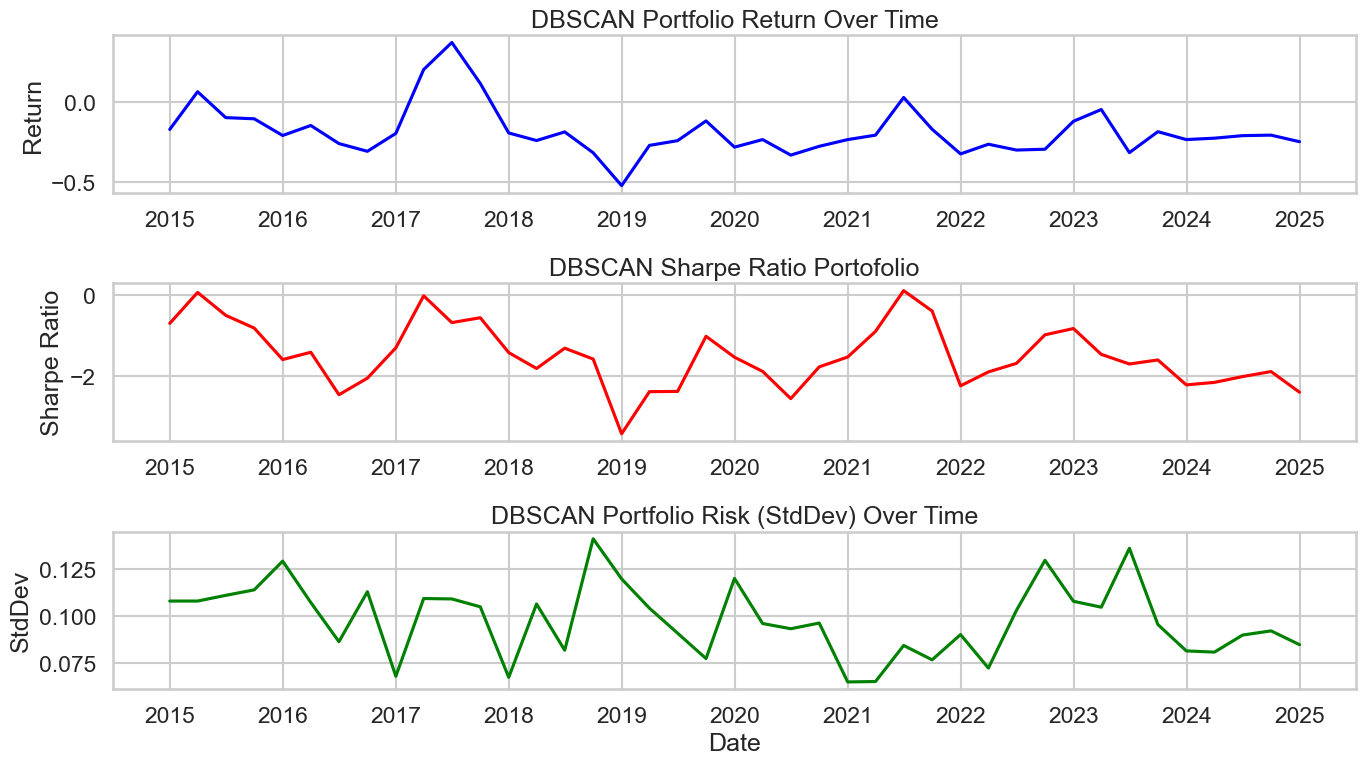

In [221]:
import matplotlib.dates as mdates

# Ambil data unik per tanggal supaya gak dobel di plot
daily_data = final_result_with_ticker_dbscan[['Date', 'Portfolio_Return', 'Portfolio_Variance', 'Portfolio_StdDev']].drop_duplicates(subset='Date').sort_values('Date')
daily_data_sharpe_ratio = sharpe_df_dbscan[['Date', 'Sharpe_Ratio_Portofolio']].drop_duplicates(subset='Date').sort_values('Date')
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(daily_data['Date'], daily_data['Portfolio_Return'], label='Portfolio Return', color='blue')
plt.title('DBSCAN Portfolio Return Over Time')
plt.ylabel('Return')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Tampilkan setiap tahun
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.subplot(3, 1, 2)
plt.plot(daily_data_sharpe_ratio['Date'], daily_data_sharpe_ratio['Sharpe_Ratio_Portofolio'], label='Sharpe Ratio Portofolio', color='red')
plt.title('DBSCAN Sharpe Ratio Portofolio')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.subplot(3, 1, 3)
plt.plot(daily_data['Date'], daily_data['Portfolio_StdDev'], label='Portfolio StdDev (Risk)', color='green')
plt.title('DBSCAN Portfolio Risk (StdDev) Over Time')
plt.ylabel('StdDev')
plt.xlabel('Date')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


expected return

In [222]:
import numpy as np

# 1. Hitung rata-rata return per ticker
expected_return_per_ticker = return_dbscan.groupby('Ticker')['Predicted'].mean()

# 2. Ambil ticker unik dari df_final
tickers_df_final = set(df_final_dbscan['Ticker'].unique())

# 3. Filter expected_return_per_ticker agar ticker-nya hanya yang ada di df_final
expected_return_per_ticker = expected_return_per_ticker[expected_return_per_ticker.index.isin(tickers_df_final)]

# 4. Ambil bobot rata-rata per ticker dari df_final
weights_df = df_final_dbscan.groupby('Ticker')['Normalized_Weight'].mean()

# 5. Filter bobot agar ticker-nya sama dengan expected_return_per_ticker
weights_df = weights_df[weights_df.index.isin(expected_return_per_ticker.index)]

# 6. Urutkan keduanya berdasarkan index agar sinkron
expected_return_per_ticker = expected_return_per_ticker.sort_index()
weights_df = weights_df.sort_index()

# 7. Pastikan ticker sudah sinkron
assert expected_return_per_ticker.index.equals(weights_df.index), "Ticker belum sinkron!"

# 8. Hitung expected portfolio return
expected_portfolio_return_dbscan = np.dot(weights_df.values, expected_return_per_ticker.values)

print(f"Expected Return Portofolio: {expected_portfolio_return_dbscan:.6f}")

Expected Return Portofolio: -0.006622


Visualisasi

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\4044362612.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(viz_df['Ticker'], rotation=45, ha='right')


<Figure size 1400x700 with 0 Axes>

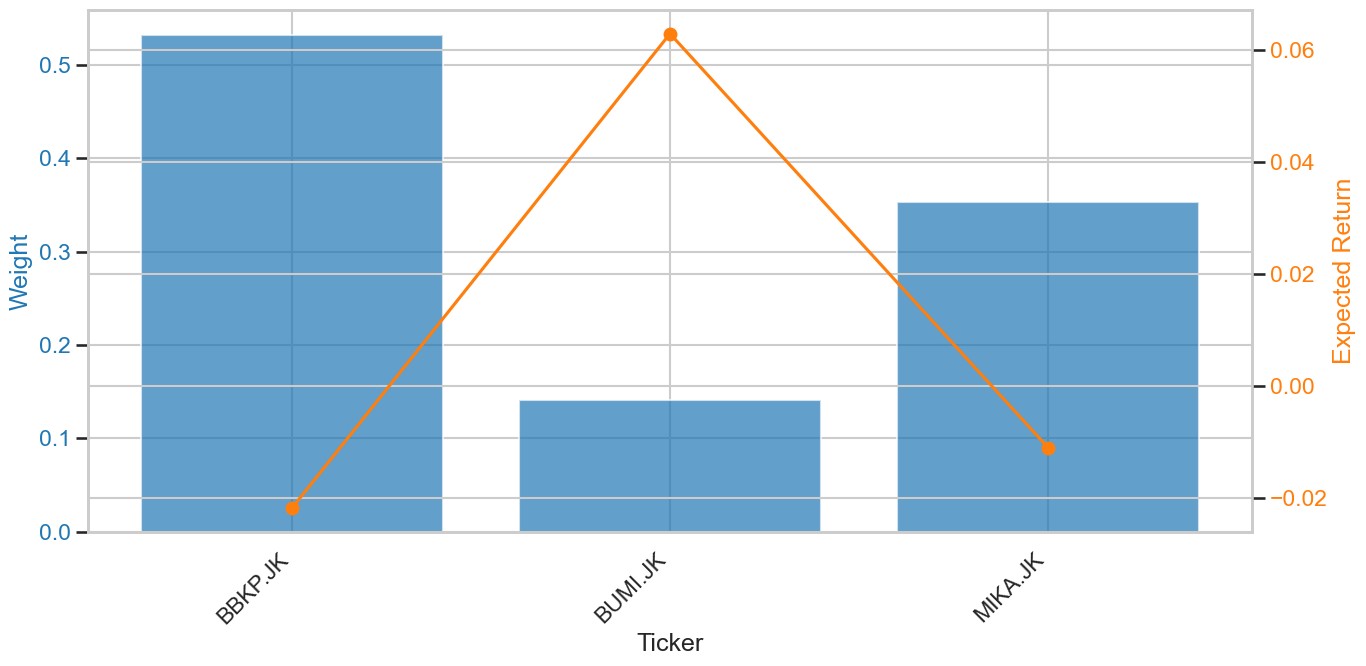

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gabungkan bobot dan expected return dalam satu DataFrame untuk visualisasi
viz_df = pd.DataFrame({
    'Ticker': weights_df.index,
    'Weight': weights_df.values,
    'Expected Return': expected_return_per_ticker.values
})

# Set style seaborn
sns.set(style='whitegrid', context='talk')

# Ukuran figure
plt.figure(figsize=(14, 7))

# Bar chart bobot dan expected return (dua y-axis)
fig, ax1 = plt.subplots(figsize=(14,7))

color1 = 'tab:blue'
color2 = 'tab:orange'

ax1.bar(viz_df['Ticker'], viz_df['Weight'], color=color1, alpha=0.7, label='Weight')
ax1.set_xlabel('Ticker')
ax1.set_ylabel('Weight', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(viz_df['Ticker'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(viz_df['Ticker'], viz_df['Expected Return'], color=color2, marker='o', label='Expected Return')
ax2.set_ylabel('Expected Return', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# plt.title('DBSCAN Portfolio Allocation and Expected Returns for Each Ticker')
fig.tight_layout()
plt.show()


Beta

In [224]:
import numpy as np
import pandas as pd

# Nilai eps global (konsisten untuk semua klasifikasi Beta)
EPSILON = 1e-1

# Fungsi klasifikasi beta
def beta_class(val, eps=EPSILON):
    if val > 1 + eps:
        return 1
    elif -eps < val < eps:
        return 0
    else:
        return -1

# Fungsi Beta Manual
def calculate_beta_manual(df, market_series, period):
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom dengan format (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()
    beta_series = []

    for ticker in tickers:
        stock_return = df[('Close', ticker)].pct_change()
        market_return = market_series.pct_change()

        # Sinkronisasi index
        common_index = stock_return.dropna().index.intersection(market_return.dropna().index)
        stock_return = stock_return.loc[common_index]
        market_return = market_return.loc[common_index]

        df_sync = pd.DataFrame({
            'stock_return': stock_return,
            'market_return': market_return
        }).dropna()

        if len(df_sync) >= period:
            rolling_cov = df_sync['stock_return'].rolling(period).cov(df_sync['market_return'])
            rolling_var = df_sync['market_return'].rolling(period).var()
            beta = rolling_cov / rolling_var
            beta_df = pd.DataFrame({ticker: beta}, index=df_sync.index)
            beta_series.append(beta_df)

    return pd.concat(beta_series, axis=1).dropna() if beta_series else pd.DataFrame()

# Dictionary sektor (pastikan data sektor dan IHSG Anda sudah didefinisikan sebelumnya)
sector_dict = {
    'Property': dataProp,
    'BasicMaterial': dataBasic_Materials,
    'ConsumerCyclicals': dataConsC,
    'ConsumerNonCyclicals': dataConsCnon,
    'Energy': dataEnergy,
    'Finance': dataFinance,
    'Health': dataHealth,
    'Industry': dataIndustri,
    'Infrastructure': dataInfra,
    'Tech': datatech,
    'Transport': dataTransport,
}

# Ambil seri IHSG
ihsg_series = ihsg['Terakhir']

# Hitung beta untuk semua sektor
beta_list = []

for sector_name, sector_df in sector_dict.items():
    common_index = sector_df.index.intersection(ihsg_series.index)
    sector_df_sync = sector_df.loc[common_index]
    ihsg_series_sync = ihsg_series.loc[common_index]

    beta_result = calculate_beta_manual(sector_df_sync, ihsg_series_sync, period=20)
    if not beta_result.empty:
        beta_long = beta_result.stack().reset_index()
        beta_long.columns = ['Date', 'Ticker', 'Beta']
        beta_long['Sektor'] = sector_name
        beta_long['Class'] = beta_long['Beta'].apply(lambda x: beta_class(x, eps=EPSILON))
        beta_list.append(beta_long)

# Gabungkan semua hasil beta
beta_df_dbscan = pd.concat(beta_list, ignore_index=True) if beta_list else pd.DataFrame()

# Konversi tipe tanggal
beta_df_dbscan['Date'] = pd.to_datetime(beta_df_dbscan['Date'])
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Fungsi untuk mengambil beta berdasarkan ticker dan tanggal
def get_beta(row, beta_group):
    df_ticker = beta_group[beta_group['Ticker'] == row['Ticker']]
    df_ticker = df_ticker[df_ticker['Date'] <= row['Date']]
    if not df_ticker.empty:
        return df_ticker.iloc[-1]['Beta']
    return np.nan

# Ambil beta untuk setiap baris di df_filtered
df_filtered_dbscan['Beta'] = df_filtered_dbscan.apply(lambda row: get_beta(row, beta_df_dbscan), axis=1)
df_filtered_dbscan['Beta'] = df_filtered_dbscan['Beta'].fillna(0)

# Klasifikasi beta (dengan eps yang sama)
df_filtered_dbscan['Class'] = df_filtered_dbscan['Beta'].apply(lambda x: beta_class(x, eps=EPSILON))

# --- START Modifikasi agar tiap ticker hanya punya satu kelas ---

# Tentukan kelas mode (paling sering muncul) untuk setiap ticker
mode_class_per_ticker = df_filtered_dbscan.groupby('Ticker')['Class'].agg(lambda x: x.mode().iloc[0])

# Buat dictionary mapping ticker -> kelas mode
ticker_to_class = mode_class_per_ticker.to_dict()

# Override kelas di df_filtered agar konsisten per ticker
df_filtered_dbscan['Class'] = df_filtered_dbscan['Ticker'].map(ticker_to_class)

# --- END Modifikasi ---

# Output hasil
print(df_filtered_dbscan)
print(df_filtered_dbscan['Class'].value_counts())


           Date   Ticker  Cluster      True  Predicted   Sector      Beta  \
0    2014-12-31  BUMI.JK       -1 -1.180089  -0.170404   Energy  0.000000   
1    2015-03-31  BUMI.JK       -1 -0.181728   0.064037   Energy  0.000000   
2    2015-06-30  BUMI.JK       -1 -0.551077  -0.007925   Energy  0.000000   
3    2015-09-30  BUMI.JK       -1 -0.435548   0.105684   Energy  0.000000   
4    2015-12-31  BUMI.JK       -1 -0.135170   0.054118   Energy  0.000000   
..          ...      ...      ...       ...        ...      ...       ...   
115  2023-12-31  BBKP.JK        1 -0.574101  -0.237989  Finance -0.247158   
116  2024-03-31  BBKP.JK        1 -0.316096  -0.226445  Finance  0.788098   
117  2024-06-30  BBKP.JK        1 -1.162673  -0.232025  Finance  0.774136   
118  2024-09-30  BBKP.JK        1  0.627402  -0.234660  Finance  1.367017   
119  2024-12-31  BBKP.JK        1 -0.621415  -0.264450  Finance  0.915877   

     Class  
0       -1  
1       -1  
2       -1  
3       -1  
4       -1

In [225]:
import numpy as np
import pandas as pd

# ============ SOLUSI 1: SESUAIKAN EPSILON ============

# Nilai eps yang lebih realistis untuk data Indonesia
EPSILON = 0.3  # Lebih besar untuk menangkap variasi beta

# Fungsi klasifikasi beta yang diperbaiki
def beta_class_improved(val, eps=EPSILON):
    """
    Klasifikasi beta dengan threshold yang lebih realistis:
    - Class 1 (Agresif): Beta > 1 + eps (> 1.3)
    - Class 0 (Netral): 1 - eps <= Beta <= 1 + eps (0.7 <= Beta <= 1.3)
    - Class -1 (Defensif): Beta < 1 - eps (< 0.7)
    """
    if val > 1 + eps:
        return 1
    elif val < 1 - eps:
        return -1
    else:
        return 0

# ============ SOLUSI 2: KLASIFIKASI BERDASARKAN PERCENTILE ============

def beta_class_percentile(beta_series):
    """
    Klasifikasi berdasarkan percentile untuk memastikan distribusi yang seimbang
    """
    # Hapus nilai 0 (missing data) untuk perhitungan percentile
    clean_beta = beta_series[beta_series != 0]
    
    if len(clean_beta) == 0:
        # Jika semua 0, return Series dengan nilai 0
        return pd.Series([0] * len(beta_series), index=beta_series.index)
    
    # Hitung percentile
    p33 = clean_beta.quantile(0.33)
    p67 = clean_beta.quantile(0.67)
    
    def classify_beta(val):
        if val == 0:  # Handle missing data
            return 0  # Netral untuk data yang hilang
        elif val > p67:
            return 1   # Top 33% = Agresif
        elif val < p33:
            return -1  # Bottom 33% = Defensif
        else:
            return 0   # Middle 33% = Netral
    
    return beta_series.apply(classify_beta)

# ============ SOLUSI 3: KLASIFIKASI ADAPTIF ============

def beta_class_adaptive(beta_series):
    """
    Klasifikasi adaptif berdasarkan statistik data aktual
    """
    # Hapus outlier dan nilai 0 dengan cara yang aman
    non_zero_mask = beta_series != 0
    
    if not non_zero_mask.any():
        # Jika semua nilai 0, return Series dengan nilai 0
        return pd.Series([0] * len(beta_series), index=beta_series.index)
    
    # Filter nilai non-zero dulu
    non_zero_beta = beta_series[non_zero_mask]
    
    # Hitung quantile dari nilai non-zero
    q05 = non_zero_beta.quantile(0.05)
    q95 = non_zero_beta.quantile(0.95)
    
    # Filter outlier
    outlier_mask = (non_zero_beta >= q05) & (non_zero_beta <= q95)
    clean_beta = non_zero_beta[outlier_mask]
    
    if len(clean_beta) == 0:
        return pd.Series([0] * len(beta_series), index=beta_series.index)
    
    mean_beta = clean_beta.mean()
    std_beta = clean_beta.std()
    
    # Threshold berdasarkan mean ± 0.5*std
    upper_threshold = mean_beta + 0.5 * std_beta
    lower_threshold = mean_beta - 0.5 * std_beta
    
    def classify_beta(val):
        if val == 0:
            return 0  # Netral untuk missing data
        elif val > upper_threshold:
            return 1   # Agresif
        elif val < lower_threshold:
            return -1  # Defensif
        else:
            return 0   # Netral
    
    return beta_series.apply(classify_beta)

# ============ KODE UTAMA YANG DIPERBAIKI ============

# Fungsi Beta Manual (sama seperti sebelumnya)
def calculate_beta_manual(df, market_series, period):
    if not isinstance(df.columns, pd.MultiIndex):
        raise ValueError("DataFrame harus memiliki MultiIndex pada kolom dengan format (atribut, ticker).")

    tickers = df.columns.get_level_values(1).unique()
    beta_series = []

    for ticker in tickers:
        stock_return = df[('Close', ticker)].pct_change()
        market_return = market_series.pct_change()

        # Sinkronisasi index
        common_index = stock_return.dropna().index.intersection(market_return.dropna().index)
        stock_return = stock_return.loc[common_index]
        market_return = market_return.loc[common_index]

        df_sync = pd.DataFrame({
            'stock_return': stock_return,
            'market_return': market_return
        }).dropna()

        if len(df_sync) >= period:
            rolling_cov = df_sync['stock_return'].rolling(period).cov(df_sync['market_return'])
            rolling_var = df_sync['market_return'].rolling(period).var()
            beta = rolling_cov / rolling_var
            beta_df = pd.DataFrame({ticker: beta}, index=df_sync.index)
            beta_series.append(beta_df)

    return pd.concat(beta_series, axis=1).dropna() if beta_series else pd.DataFrame()

# Dictionary sektor (gunakan data Anda yang sudah ada)
sector_dict = {
    'Property': dataProp,
    'BasicMaterial': dataBasic_Materials,
    'ConsumerCyclicals': dataConsC,
    'ConsumerNonCyclicals': dataConsCnon,
    'Energy': dataEnergy,
    'Finance': dataFinance,
    'Health': dataHealth,
    'Industry': dataIndustri,
    'Infrastructure': dataInfra,
    'Tech': datatech,
    'Transport': dataTransport,
}

# Ambil seri IHSG
ihsg_series = ihsg['Terakhir']

# Hitung beta untuk semua sektor
beta_list = []

for sector_name, sector_df in sector_dict.items():
    common_index = sector_df.index.intersection(ihsg_series.index)
    sector_df_sync = sector_df.loc[common_index]
    ihsg_series_sync = ihsg_series.loc[common_index]

    beta_result = calculate_beta_manual(sector_df_sync, ihsg_series_sync, period=20)
    if not beta_result.empty:
        beta_long = beta_result.stack().reset_index()
        beta_long.columns = ['Date', 'Ticker', 'Beta']
        beta_long['Sektor'] = sector_name
        beta_list.append(beta_long)

# Gabungkan semua hasil beta
beta_df_aglo = pd.concat(beta_list, ignore_index=True) if beta_list else pd.DataFrame()

# Konversi tipe tanggal
beta_df_aglo['Date'] = pd.to_datetime(beta_df_aglo['Date'])
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Fungsi untuk mengambil beta berdasarkan ticker dan tanggal
def get_beta(row, beta_group):
    df_ticker = beta_group[beta_group['Ticker'] == row['Ticker']]
    df_ticker = df_ticker[df_ticker['Date'] <= row['Date']]
    if not df_ticker.empty:
        return df_ticker.iloc[-1]['Beta']
    return np.nan

# Ambil beta untuk setiap baris di df_filtered
df_filtered_dbscan['Beta'] = df_filtered_dbscan.apply(lambda row: get_beta(row, beta_df_aglo), axis=1)

# PERBAIKAN: Jangan langsung fillna(0), gunakan strategi yang lebih baik
print("Distribusi Beta sebelum fillna:")
print(df_filtered_dbscan['Beta'].describe())
print(f"Jumlah nilai NaN: {df_filtered_dbscan['Beta'].isna().sum()}")

# Strategi 1: Forward fill dalam grup ticker (lebih realistis)
df_filtered_dbscan['Beta'] = df_filtered_dbscan.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='ffill'))

# Strategi 2: Backward fill jika forward fill tidak cukup
df_filtered_dbscan['Beta'] = df_filtered_dbscan.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='bfill'))

# Strategi 3: Isi dengan median sektor jika masih ada yang kosong
try:
    # Hitung median beta per sektor (hanya untuk nilai yang tidak NaN)
    sector_beta_median = df_filtered_dbscan.groupby('Sector')['Beta'].median()
    
    # Fungsi untuk mengisi beta yang masih NaN dengan median sektor
    def fill_beta_with_sector_median(row):
        if pd.isna(row['Beta']):
            if row['Sector'] in sector_beta_median.index:
                sector_median = sector_beta_median[row['Sector']]
                if pd.notna(sector_median):
                    return sector_median
            return 1.0  # Default ke beta netral jika sektor tidak ada atau median NaN
        else:
            return row['Beta']
    
    # Apply fungsi dengan axis=1
    df_filtered_dbscan['Beta'] = df_filtered_dbscan.apply(fill_beta_with_sector_median, axis=1)
    
except Exception as e:
    print(f"Error dalam pengisian median sektor: {e}")
    # Fallback: isi semua NaN dengan 1.0
    df_filtered_dbscan['Beta'] = df_filtered_dbscan['Beta'].fillna(1.0)

# Isi sisanya dengan 1.0 (beta netral pasar) daripada 0
df_filtered_dbscan['Beta'] = df_filtered_dbscan['Beta'].fillna(1.0)

print("\nDistribusi Beta setelah perbaikan:")
print(df_filtered_dbscan['Beta'].describe())

# ============ TESTING BERBAGAI METODE KLASIFIKASI ============

print("\n" + "="*60)
print("TESTING BERBAGAI METODE KLASIFIKASI BETA")
print("="*60)

# Metode 1: Epsilon yang diperbaiki
try:
    df_filtered_dbscan['Class_Improved'] = df_filtered_dbscan['Beta'].apply(lambda x: beta_class_improved(x))
    print("Metode 1 - Epsilon 0.3:")
    print(df_filtered_dbscan['Class_Improved'].value_counts().sort_index())
except Exception as e:
    print(f"Error metode 1: {e}")
    df_filtered_dbscan['Class_Improved'] = 0

# Metode 2: Percentile
try:
    df_filtered_dbscan['Class_Percentile'] = beta_class_percentile(df_filtered_dbscan['Beta'])
    print("\nMetode 2 - Percentile:")
    print(df_filtered_dbscan['Class_Percentile'].value_counts().sort_index())
except Exception as e:
    print(f"Error metode 2: {e}")
    df_filtered_dbscan['Class_Percentile'] = 0

# Metode 3: Adaptive
try:
    df_filtered_dbscan['Class_Adaptive'] = beta_class_adaptive(df_filtered_dbscan['Beta'])
    print("\nMetode 3 - Adaptive:")
    print(df_filtered_dbscan['Class_Adaptive'].value_counts().sort_index())
except Exception as e:
    print(f"Error metode 3: {e}")
    df_filtered_dbscan['Class_Adaptive'] = 0

# Pilih metode terbaik (yang memberikan distribusi paling seimbang)
methods = ['Class_Improved', 'Class_Percentile', 'Class_Adaptive']
best_method = None
best_balance = float('inf')

for method in methods:
    try:
        counts = df_filtered_dbscan[method].value_counts()
        unique_classes = len(counts)
        
        print(f"\n{method}: {unique_classes} unique classes")
        
        if unique_classes == 3:  # Harus ada 3 kelas
            balance = counts.std()  # Semakin kecil std, semakin seimbang
            print(f"Balance score (std): {balance:.2f}")
            if balance < best_balance:
                best_balance = balance
                best_method = method
        elif unique_classes > 1:  # Minimal 2 kelas
            balance = counts.std()
            print(f"Balance score (std): {balance:.2f} - hanya {unique_classes} kelas")
            if best_method is None:  # Ambil sebagai backup jika tidak ada yang 3 kelas
                best_method = method
                best_balance = balance
    except Exception as e:
        print(f"Error evaluating {method}: {e}")

if best_method:
    df_filtered_dbscan['Class'] = df_filtered_dbscan[best_method]
    print(f"\n🎯 METODE TERPILIH: {best_method}")
else:
    # Fallback ke epsilon method dengan nilai manual
    df_filtered_dbscan['Class'] = df_filtered_dbscan['Beta'].apply(
        lambda x: 1 if x > 1.2 else (-1 if x < 0.8 else 0)
    )
    print(f"\n🎯 METODE TERPILIH: Manual fallback")

# Tentukan kelas mode (paling sering muncul) untuk setiap ticker
mode_class_per_ticker = df_filtered_dbscan.groupby('Ticker')['Class'].apply(
    lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 0
)

# Buat dictionary mapping ticker -> kelas mode
ticker_to_class = mode_class_per_ticker.to_dict()

# Override kelas di df_filtered agar konsisten per ticker
df_filtered_dbscan['Class'] = df_filtered_dbscan['Ticker'].map(ticker_to_class)

# Output hasil final
print("\n" + "="*60)
print("HASIL AKHIR")
print("="*60)
print("Distribusi Kelas Beta:")
print(df_filtered_dbscan['Class'].value_counts().sort_index())

print("\nStatistik Beta per Kelas:")
beta_stats = df_filtered_dbscan.groupby('Class')['Beta'].agg(['count', 'mean', 'std', 'min', 'max'])
print(beta_stats)

print("\nContoh data:")
sample_cols = ['Date', 'Ticker', 'Sector', 'Beta', 'Class']
available_cols = [col for col in sample_cols if col in df_filtered_dbscan.columns]
print(df_filtered_dbscan[available_cols].head(10))

# Cleanup kolom tambahan
cleanup_cols = [col for col in df_filtered_dbscan.columns if col.startswith('Class_')]
if cleanup_cols:
    df_filtered_dbscan = df_filtered_dbscan.drop(columns=cleanup_cols)

print(f"\nFinal shape: {df_filtered_dbscan.shape}")
print(f"Final columns: {list(df_filtered_dbscan.columns)}")

Distribusi Beta sebelum fillna:
count    93.000000
mean      0.081223
std       1.674614
min      -6.807154
25%      -0.590321
50%       0.516223
75%       0.916849
max       2.526918
Name: Beta, dtype: float64
Jumlah nilai NaN: 27

Distribusi Beta setelah perbaikan:
count    120.000000
mean      -0.175219
std        1.626889
min       -6.807154
25%       -0.764142
50%        0.055135
75%        0.805069
max        2.526918
Name: Beta, dtype: float64

TESTING BERBAGAI METODE KLASIFIKASI BETA
Metode 1 - Epsilon 0.3:
Class_Improved
-1    82
 0    18
 1    20
Name: count, dtype: int64

Metode 2 - Percentile:
Class_Percentile
-1    40
 0    40
 1    40
Name: count, dtype: int64

Metode 3 - Adaptive:
Class_Adaptive
-1    39
 0    35
 1    46
Name: count, dtype: int64

Class_Improved: 3 unique classes
Balance score (std): 36.39

Class_Percentile: 3 unique classes
Balance score (std): 0.00

Class_Adaptive: 3 unique classes
Balance score (std): 5.57

🎯 METODE TERPILIH: Class_Percentile

HASIL 

C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\2303609301.py:189: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered_dbscan['Beta'] = df_filtered_dbscan.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='ffill'))
C:\Users\Naufal\AppData\Local\Temp\ipykernel_26872\2303609301.py:192: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered_dbscan['Beta'] = df_filtered_dbscan.groupby('Ticker')['Beta'].transform(lambda x: x.fillna(method='bfill'))


Klasifikasi (SVM)

Cross-validated F1-macro scores: [0.78835979 0.74825175 0.66666667 0.58041958 0.79130435]
Mean F1-macro score: 0.7150004263047741

Classification Report on Hold-out Test Set:
              precision    recall  f1-score   support

          -1       1.00      0.56      0.72        16
           0       0.53      1.00      0.70         8

    accuracy                           0.71        24
   macro avg       0.77      0.78      0.71        24
weighted avg       0.84      0.71      0.71        24



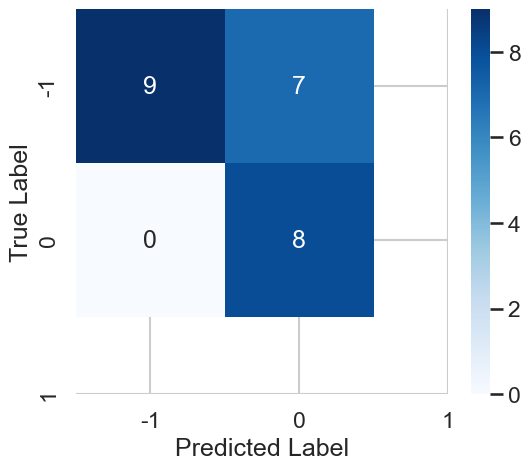


Representative Ticker per Class (based on SVM prediction):
Class -1: MIKA.JK
Class 0: BUMI.JK


In [226]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ambil fitur dan label
X = df_filtered_dbscan[['Beta']].values
y = df_filtered_dbscan['Class'].values
tickers = df_filtered_dbscan['Ticker'].values 

# 2. Split data latih dan uji
X_train, X_test, y_train, y_test, tickers_train, tickers_test = train_test_split(
    X, y, tickers, test_size=0.2, random_state=42, stratify=y
)

# 2. Buat pipeline: scaling → SMOTE → SVM
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# 3. Stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Evaluasi menggunakan cross_val_score
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')
print("Cross-validated F1-macro scores:", scores)
print("Mean F1-macro score:", scores.mean())

# 5. (Opsional) Fit dan evaluasi terakhir pada hold-out set untuk confusion matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nClassification Report on Hold-out Test Set:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# plt.title('Confusion Matrix – SVM Classification using K-Means Labels')
plt.show()

# 7. Gabungkan hasil prediksi dengan informasi ticker dan beta
test_result = pd.DataFrame({
    'Ticker': tickers_test,
    'True_Class': y_test,
    'Predicted_Class': y_pred,
    'Beta': X_test.flatten()
})

# 8. Ambil perwakilan ticker untuk setiap kelas berdasarkan median beta
representative_tickers = {}
used_tickers = set()

for cls in sorted(test_result['Predicted_Class'].unique()):
    df_class = test_result[test_result['Predicted_Class'] == cls].copy()
    
    if not df_class.empty:
        median_beta = df_class['Beta'].median()
        df_class['Beta_Dist'] = (df_class['Beta'] - median_beta).abs()

        # Cari ticker representatif yang belum digunakan
        for _, row in df_class.sort_values('Beta_Dist').iterrows():
            ticker = row['Ticker']
            if ticker not in used_tickers:
                representative_tickers[cls] = ticker
                used_tickers.add(ticker)
                break


rep_ticker_result = representative_tickers

# 9. Tampilkan hasil
print("\nRepresentative Ticker per Class (based on SVM prediction):")
for cls, ticker in rep_ticker_result.items():
    print(f"Class {cls}: {ticker}")


Optimasi

In [227]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Langsung tetapkan rep_ticker_result dari hasil klasifikasi
rep_ticker_result 

# Ambil expected return per ticker
expected_return_per_ticker = return_dbscan.groupby('Ticker')['Predicted'].mean()

# Filter hanya ticker yang ada di df_final
tickers_df_final = set(df_final_dbscan['Ticker'].unique())
expected_return_per_ticker = expected_return_per_ticker[expected_return_per_ticker.index.isin(tickers_df_final)]

# Ambil covariance matrix dari return prediksi
returns_pivot = merged.pivot(index='Date', columns='Ticker', values='Predicted')
returns_pivot = returns_pivot.fillna(returns_pivot.mean())
cov_matrix = returns_pivot.cov()

# Sinkronisasi ticker index
common_tickers = sorted(expected_return_per_ticker.index.intersection(cov_matrix.columns))
expected_return_per_ticker = expected_return_per_ticker[common_tickers]
cov_matrix = cov_matrix.loc[common_tickers, common_tickers]

# Dictionary untuk menyimpan skor kelas
class_scores = {}

# Loop per class hanya gunakan ticker dari rep_ticker_result
for cls in [-1, 0, 1]:
    print(f"\n========== Optimisasi untuk Class {cls} ==========")

    rep_ticker = rep_ticker_result.get(cls, None)
    if rep_ticker is None:
        print(f"Tidak ada ticker representatif untuk Class {cls}")
        continue

    if rep_ticker not in expected_return_per_ticker.index:
        print(f"Ticker {rep_ticker} tidak ditemukan dalam expected_return_per_ticker")
        continue

    if rep_ticker not in cov_matrix.columns:
        print(f"Ticker {rep_ticker} tidak ditemukan dalam covariance matrix")
        continue

    expected_return_class = expected_return_per_ticker.loc[[rep_ticker]]
    cov_matrix_class = cov_matrix.loc[[rep_ticker], [rep_ticker]]

    weights_class = (
        df_final[df_final['Ticker'] == rep_ticker]
        .groupby('Ticker')['Normalized_Weight']
        .mean()
        .reindex([rep_ticker])
        .fillna(0)
        .values
    )

    target_return = np.dot(weights_class, expected_return_class.values)

    # === Kasus 1 Ticker (langsung tampilkan) ===
    weight = 1.0
    std_dev = np.sqrt(cov_matrix_class.values[0][0])
    ret = expected_return_class.values[0]

    print("\n=== Optimal Portfolio Allocation ===")
    print(f"{rep_ticker}: {weight:.5f}")
    print(f"Expected Return: {ret:.6f}")
    print(f"Standard Deviation (Risk): {std_dev:.6f}")
    print(f"Sharpe Ratio: {ret / std_dev:.6f}")

    # Hitung skor class (boleh Sharpe ratio, expected return, dsb)
    # Di sini kita gunakan Sharpe ratio
    sharpe_ratio = ret / std_dev
    class_scores[cls] = sharpe_ratio

# === Normalisasi skor untuk dapatkan class weights ===
total_score = sum(class_scores.values())
class_weights = {cls: score / total_score for cls, score in class_scores.items()}

print("\n=== Normalized Class Weights ===")
for cls, w in class_weights.items():
    print(f"Class {cls}: {w:.4f}")



========== Optimisasi untuk Class -1 ==========

=== Optimal Portfolio Allocation ===
MIKA.JK: 1.00000
Expected Return: -0.011005
Standard Deviation (Risk): 0.077287
Sharpe Ratio: -0.142388

========== Optimisasi untuk Class 0 ==========

=== Optimal Portfolio Allocation ===
BUMI.JK: 1.00000
Expected Return: 0.062884
Standard Deviation (Risk): 0.131313
Sharpe Ratio: 0.478885

========== Optimisasi untuk Class 1 ==========
Tidak ada ticker representatif untuk Class 1

=== Normalized Class Weights ===
Class -1: -0.4232
Class 0: 1.4232


Visualisasi

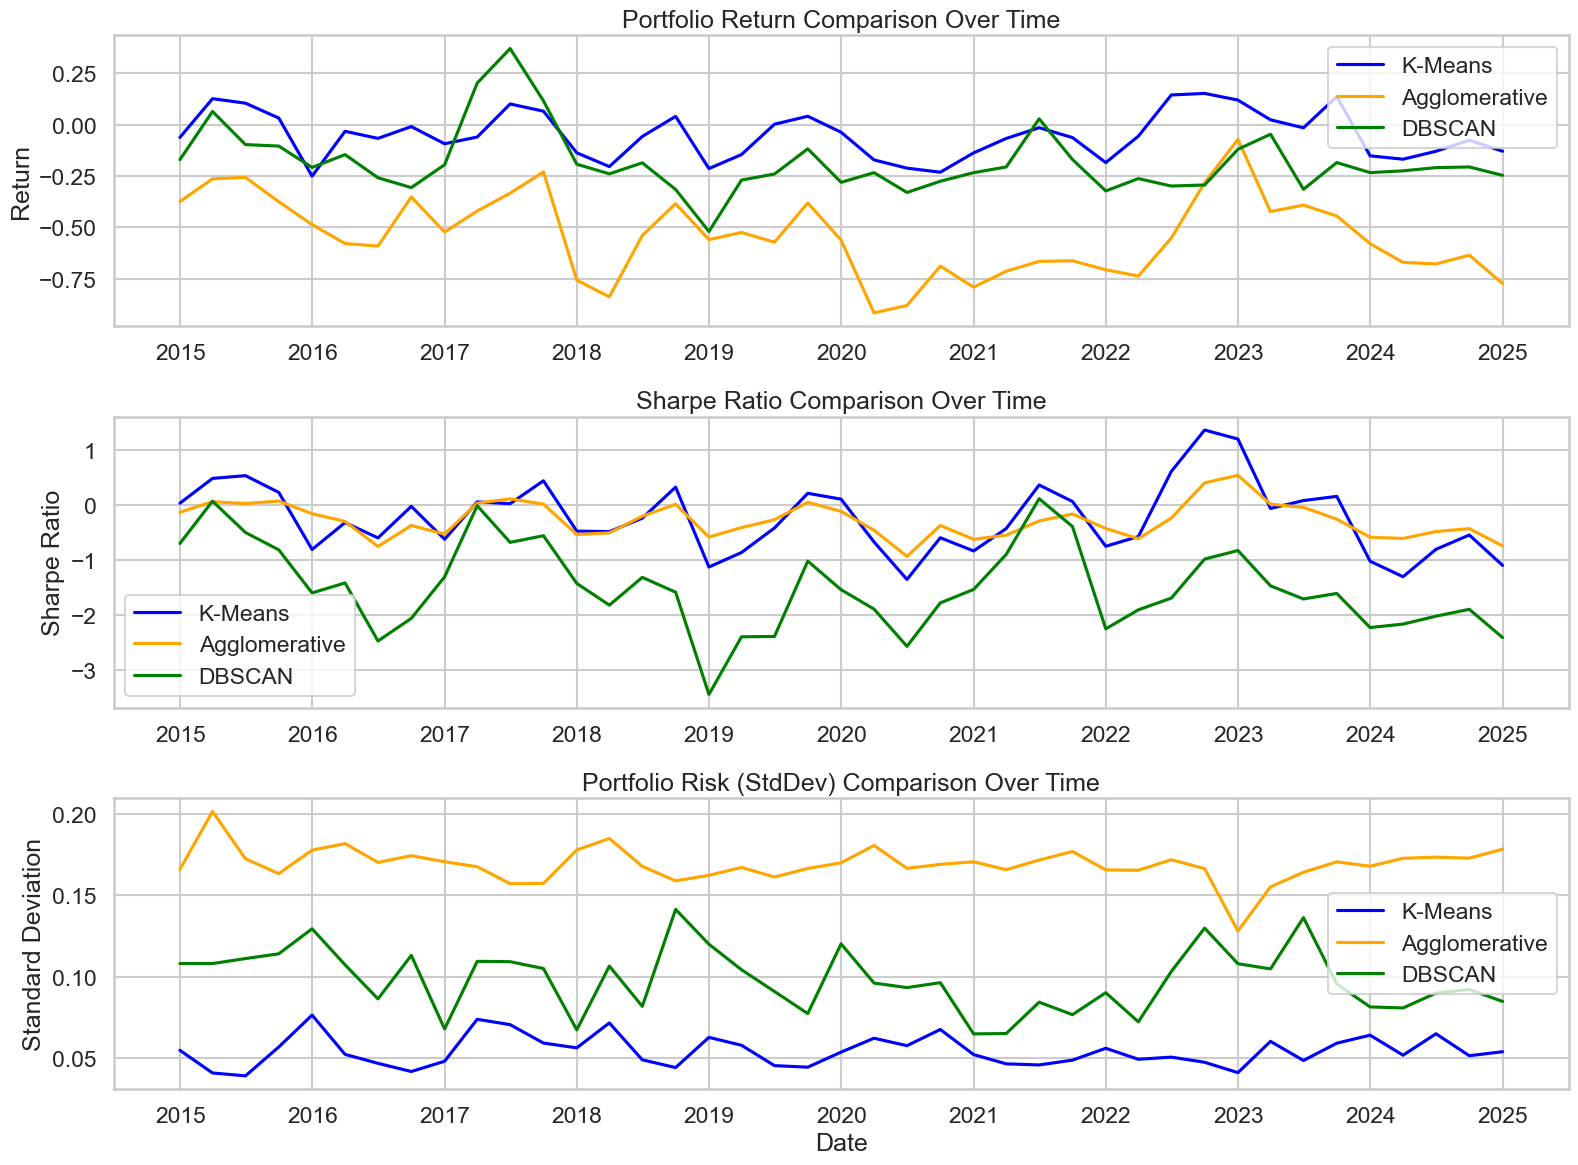

In [228]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# === Ambil dan urutkan data berdasarkan tanggal (hilangkan duplikasi) ===
kmeans_return = final_result_with_ticker_kmeans[['Date', 'Portfolio_Return']].drop_duplicates(subset='Date').sort_values('Date')
aglo_return   = final_result_with_ticker_aglo[['Date', 'Portfolio_Return']].drop_duplicates(subset='Date').sort_values('Date')
dbscan_return = final_result_with_ticker_dbscan[['Date', 'Portfolio_Return']].drop_duplicates(subset='Date').sort_values('Date')

kmeans_sharpe = sharpe_df_kmeans[['Date', 'Sharpe_Ratio_Portofolio']].drop_duplicates(subset='Date').sort_values('Date')
aglo_sharpe   = sharpe_df_aglo[['Date', 'Sharpe_Ratio_Portofolio']].drop_duplicates(subset='Date').sort_values('Date')
dbscan_sharpe = sharpe_df_dbscan[['Date', 'Sharpe_Ratio_Portofolio']].drop_duplicates(subset='Date').sort_values('Date')

kmeans_risk   = final_result_with_ticker_kmeans[['Date', 'Portfolio_StdDev']].drop_duplicates(subset='Date').sort_values('Date')
aglo_risk     = final_result_with_ticker_aglo[['Date', 'Portfolio_StdDev']].drop_duplicates(subset='Date').sort_values('Date')
dbscan_risk   = final_result_with_ticker_dbscan[['Date', 'Portfolio_StdDev']].drop_duplicates(subset='Date').sort_values('Date')

# === Plot perbandingan portofolio antar metode clustering ===
plt.figure(figsize=(16, 12))

# === Plot 1: Portfolio Return ===
plt.subplot(3, 1, 1)
plt.plot(kmeans_return['Date'], kmeans_return['Portfolio_Return'], label='K-Means', color='blue')
plt.plot(aglo_return['Date'], aglo_return['Portfolio_Return'], label='Agglomerative', color='orange')
plt.plot(dbscan_return['Date'], dbscan_return['Portfolio_Return'], label='DBSCAN', color='green')
plt.title('Portfolio Return Comparison Over Time')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# === Plot 2: Sharpe Ratio ===
plt.subplot(3, 1, 2)
plt.plot(kmeans_sharpe['Date'], kmeans_sharpe['Sharpe_Ratio_Portofolio'], label='K-Means', color='blue')
plt.plot(aglo_sharpe['Date'], aglo_sharpe['Sharpe_Ratio_Portofolio'], label='Agglomerative', color='orange')
plt.plot(dbscan_sharpe['Date'], dbscan_sharpe['Sharpe_Ratio_Portofolio'], label='DBSCAN', color='green')
plt.title('Sharpe Ratio Comparison Over Time')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# === Plot 3: Portfolio Risk (Standard Deviation) ===
plt.subplot(3, 1, 3)
plt.plot(kmeans_risk['Date'], kmeans_risk['Portfolio_StdDev'], label='K-Means', color='blue')
plt.plot(aglo_risk['Date'], aglo_risk['Portfolio_StdDev'], label='Agglomerative', color='orange')
plt.plot(dbscan_risk['Date'], dbscan_risk['Portfolio_StdDev'], label='DBSCAN', color='green')
plt.title('Portfolio Risk (StdDev) Comparison Over Time')
plt.ylabel('Standard Deviation')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# === Tata letak otomatis agar rapi ===
plt.tight_layout()
plt.show()


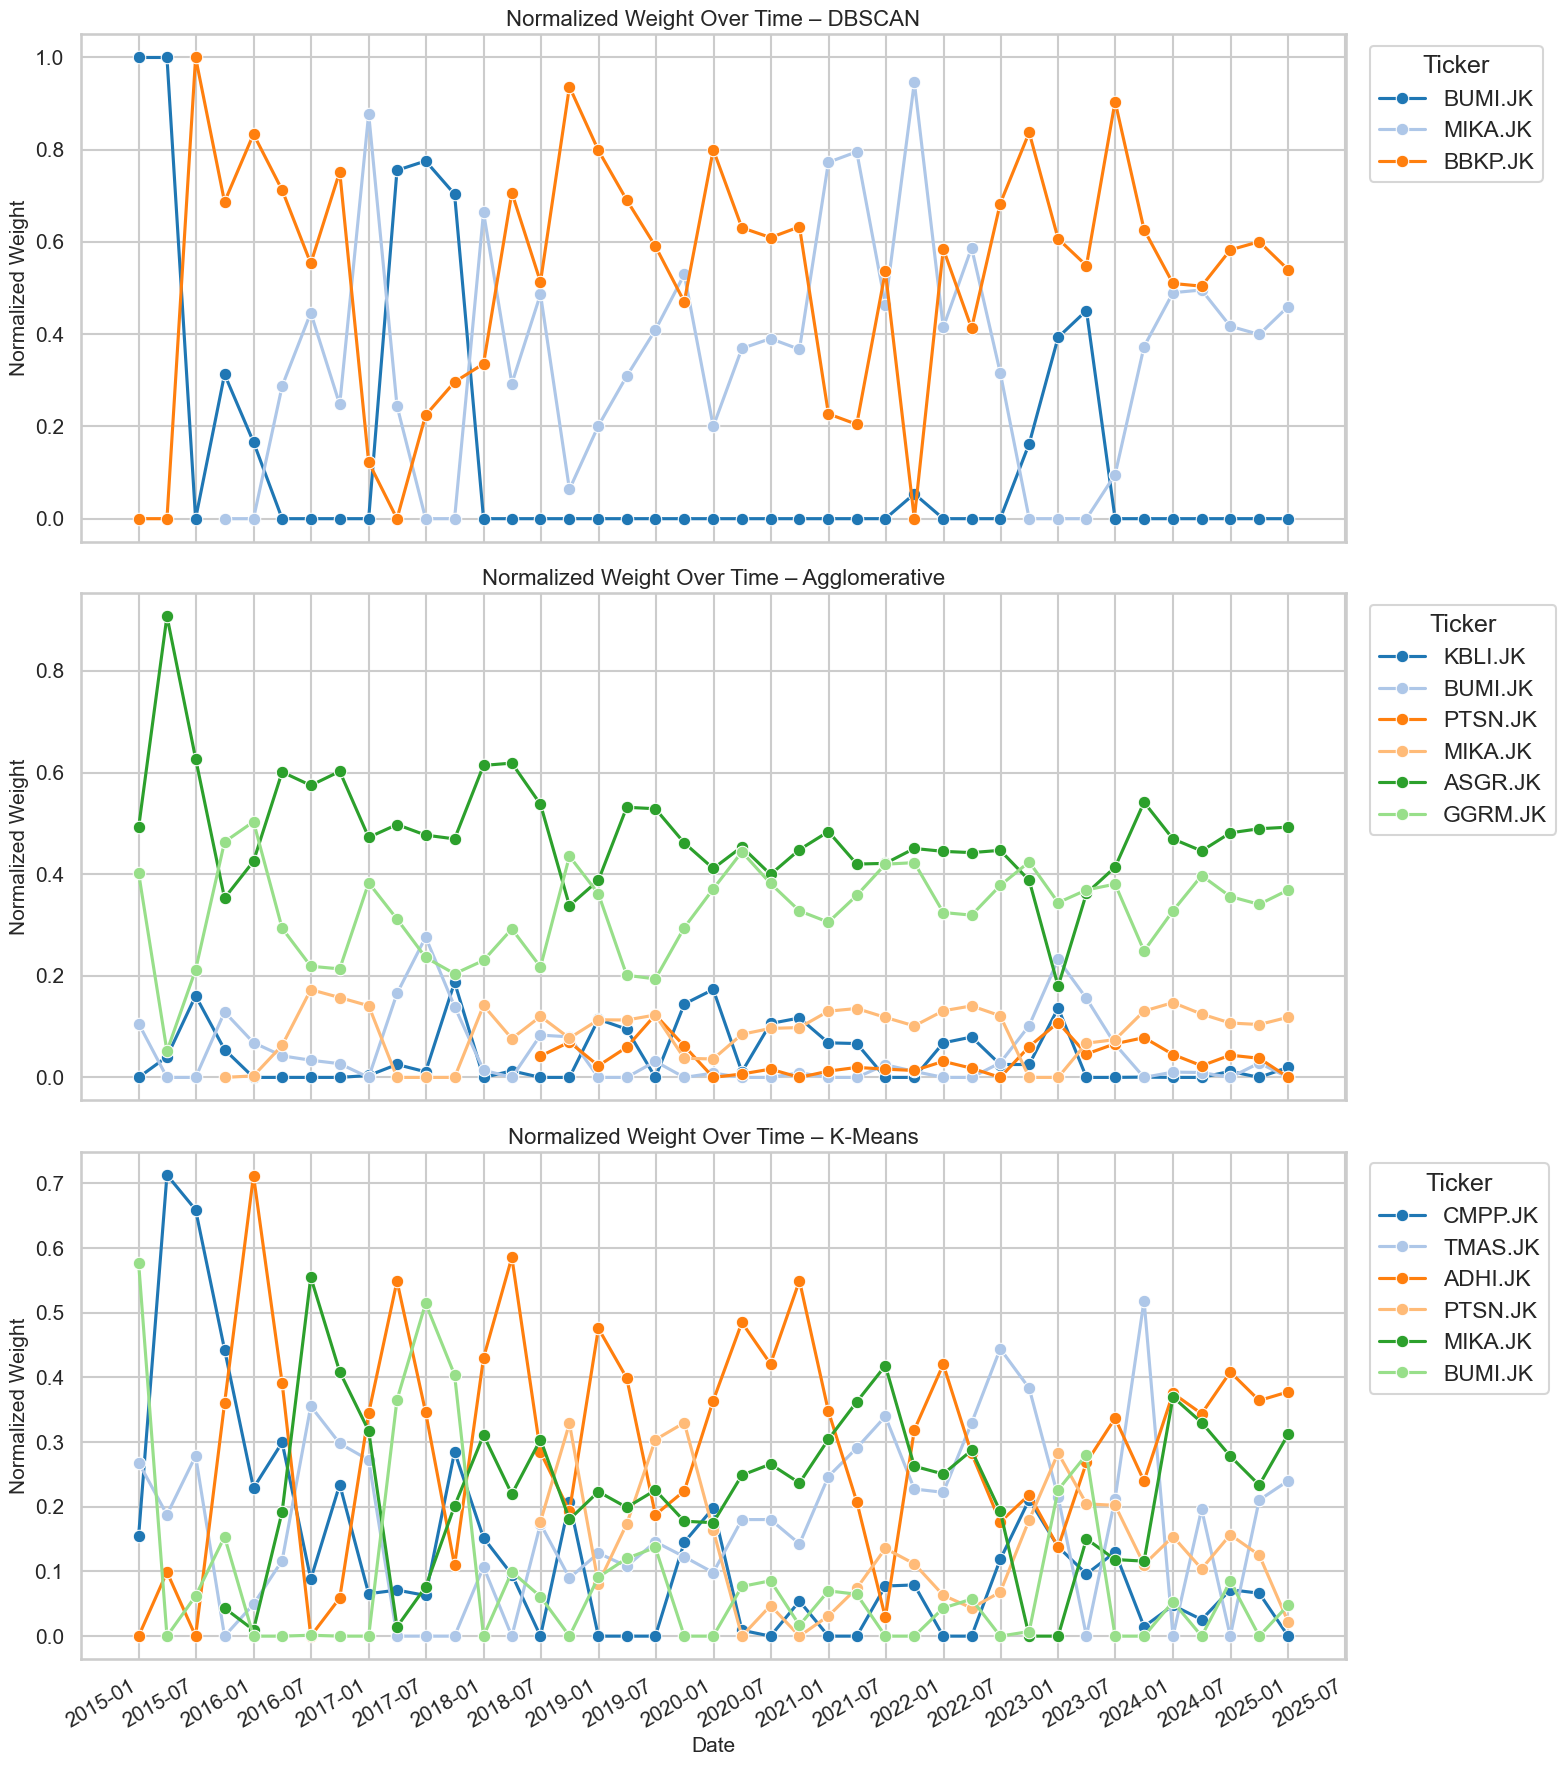

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# Pastikan kolom 'Date' bertipe datetime
df_final_dbscan['Date'] = pd.to_datetime(df_final_dbscan['Date'])
df_final_aglo['Date'] = pd.to_datetime(df_final_aglo['Date'])
df_final['Date'] = pd.to_datetime(df_final['Date'])

# Siapkan canvas 3 baris
fig, axes = plt.subplots(3, 1, figsize=(16, 18), sharex=True)

# Parameter ukuran font
label_fontsize = 15
tick_fontsize = 15
title_fontsize = 16

# Plot DBSCAN
sns.lineplot(ax=axes[0], data=df_final_dbscan, x='Date', y='Normalized_Weight', hue='Ticker', marker='o', palette='tab20')
axes[0].set_title('Normalized Weight Over Time – DBSCAN', fontsize=title_fontsize)
axes[0].set_ylabel('Normalized Weight', fontsize=label_fontsize)
axes[0].legend(title='Ticker', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[0].tick_params(axis='both', labelsize=tick_fontsize)
axes[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Plot Agglomerative
sns.lineplot(ax=axes[1], data=df_final_aglo, x='Date', y='Normalized_Weight', hue='Ticker', marker='o', palette='tab20')
axes[1].set_title('Normalized Weight Over Time – Agglomerative', fontsize=title_fontsize)
axes[1].set_ylabel('Normalized Weight', fontsize=label_fontsize)
axes[1].legend(title='Ticker', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[1].tick_params(axis='both', labelsize=tick_fontsize)
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Plot General / Baseline
sns.lineplot(ax=axes[2], data=df_final, x='Date', y='Normalized_Weight', hue='Ticker', marker='o', palette='tab20')
axes[2].set_title('Normalized Weight Over Time – K-Means', fontsize=title_fontsize)
axes[2].set_xlabel('Date', fontsize=label_fontsize)
axes[2].set_ylabel('Normalized Weight', fontsize=label_fontsize)
axes[2].legend(title='Ticker', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[2].tick_params(axis='both', labelsize=tick_fontsize)
axes[2].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()


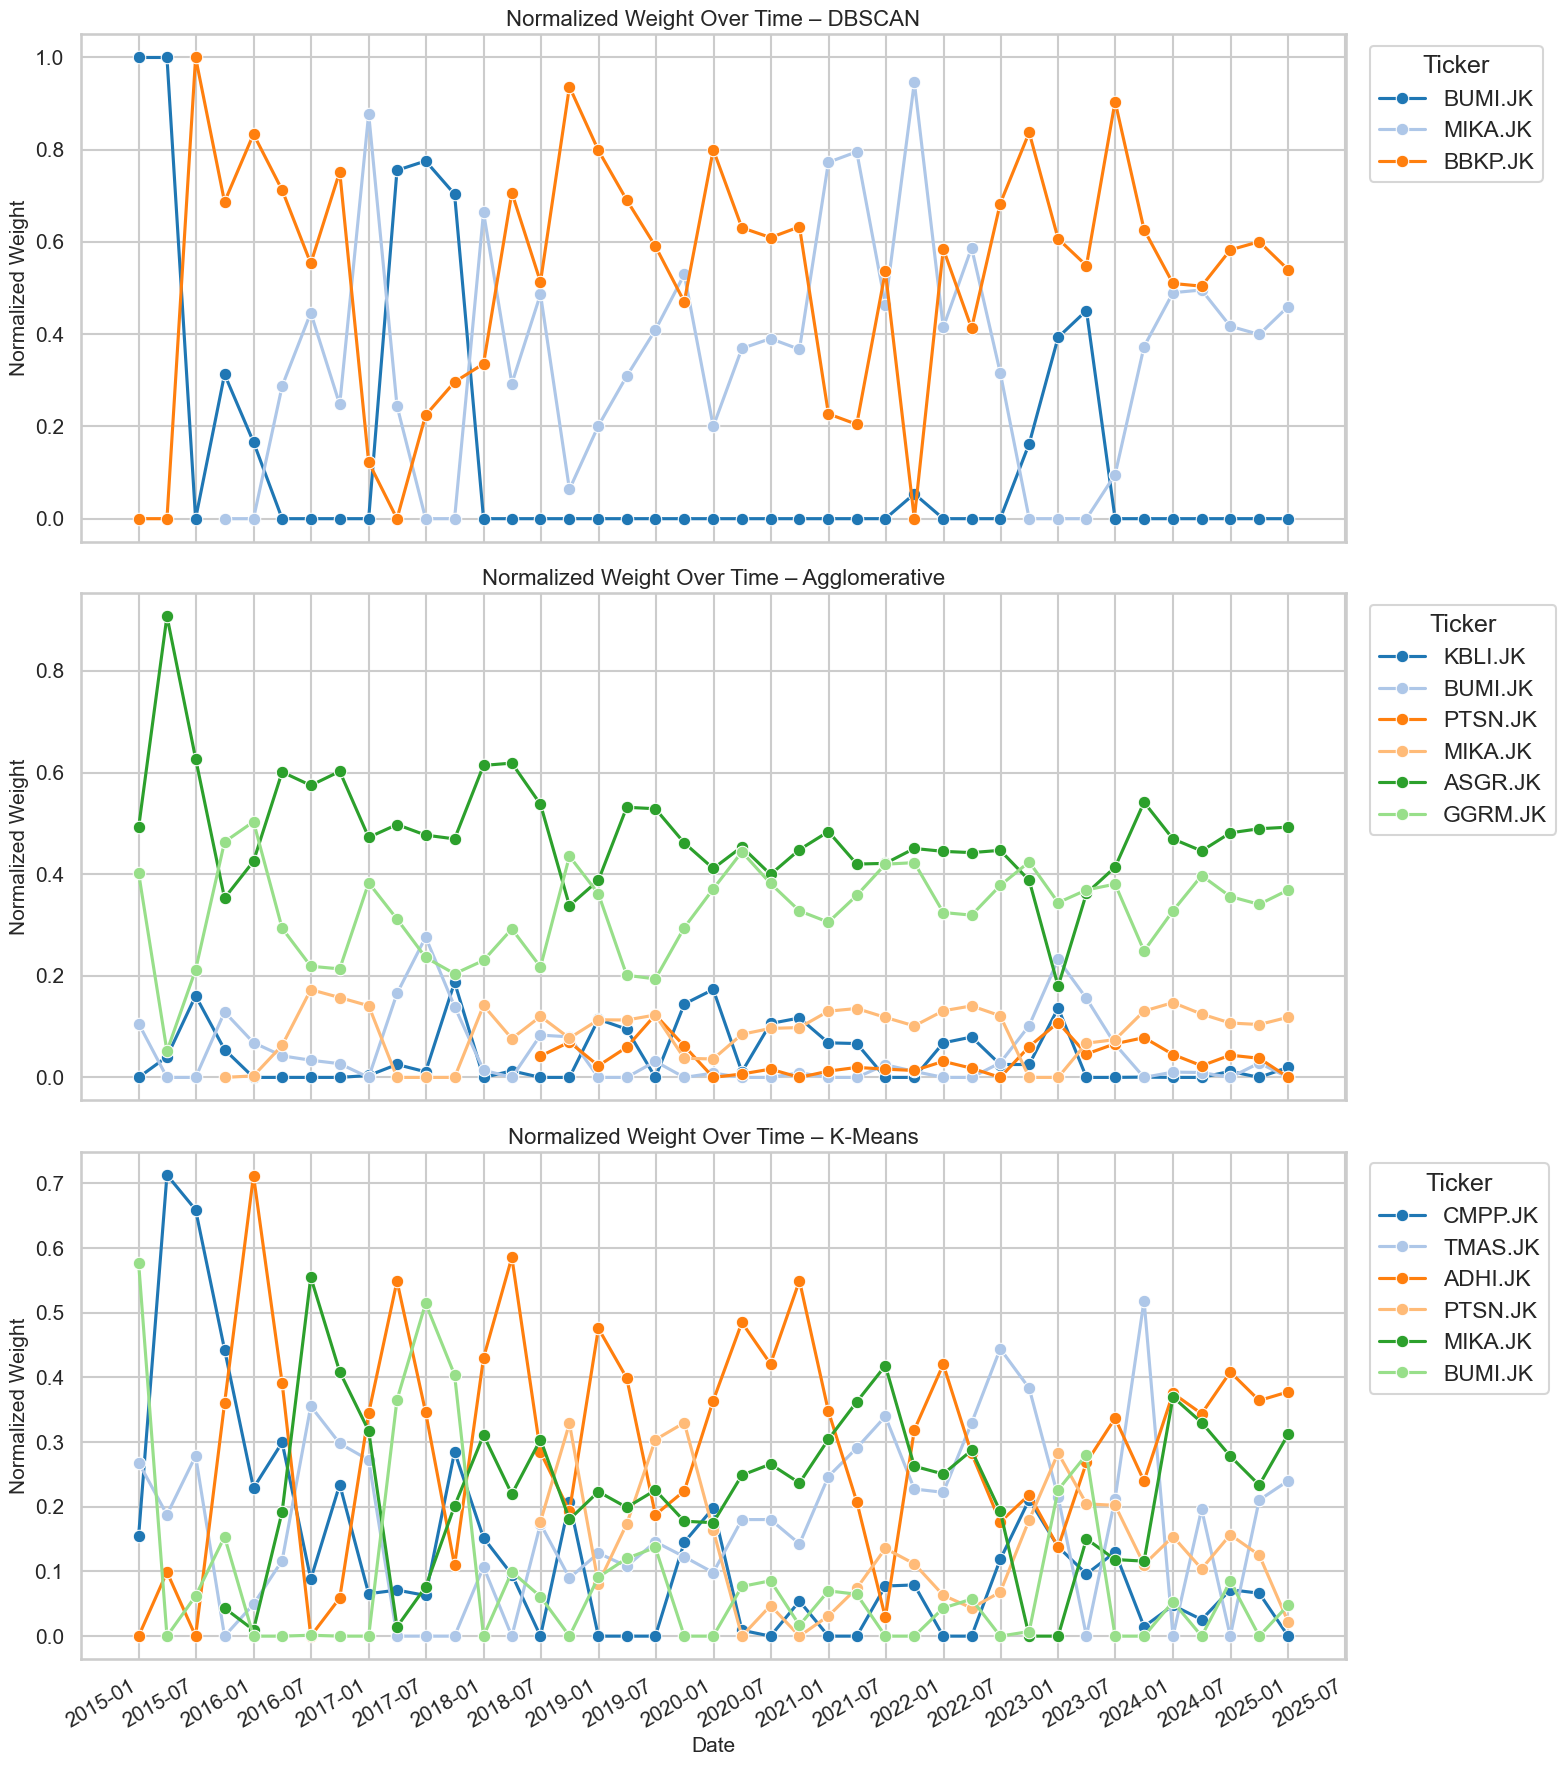

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# Pastikan kolom 'Date' bertipe datetime
df_final_dbscan['Date'] = pd.to_datetime(df_final_dbscan['Date'])
df_final_aglo['Date'] = pd.to_datetime(df_final_aglo['Date'])
df_final['Date'] = pd.to_datetime(df_final['Date'])

# Siapkan canvas 3 baris
fig, axes = plt.subplots(3, 1, figsize=(16, 18), sharex=True)

# Parameter ukuran font
label_fontsize = 15
tick_fontsize = 15
title_fontsize = 16

# Plot DBSCAN
sns.lineplot(ax=axes[0], data=df_final_dbscan, x='Date', y='Normalized_Weight', hue='Ticker', marker='o', palette='tab20')
axes[0].set_title('Normalized Weight Over Time – DBSCAN', fontsize=title_fontsize)
axes[0].set_ylabel('Normalized Weight', fontsize=label_fontsize)
axes[0].legend(title='Ticker', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[0].tick_params(axis='both', labelsize=tick_fontsize)
axes[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Plot Agglomerative
sns.lineplot(ax=axes[1], data=df_final_aglo, x='Date', y='Normalized_Weight', hue='Ticker', marker='o', palette='tab20')
axes[1].set_title('Normalized Weight Over Time – Agglomerative', fontsize=title_fontsize)
axes[1].set_ylabel('Normalized Weight', fontsize=label_fontsize)
axes[1].legend(title='Ticker', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[1].tick_params(axis='both', labelsize=tick_fontsize)
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Plot General / Baseline
sns.lineplot(ax=axes[2], data=df_final, x='Date', y='Normalized_Weight', hue='Ticker', marker='o', palette='tab20')
axes[2].set_title('Normalized Weight Over Time – K-Means', fontsize=title_fontsize)
axes[2].set_xlabel('Date', fontsize=label_fontsize)
axes[2].set_ylabel('Normalized Weight', fontsize=label_fontsize)
axes[2].legend(title='Ticker', bbox_to_anchor=(1.01, 1), loc='upper left')
axes[2].tick_params(axis='both', labelsize=tick_fontsize)
axes[2].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()


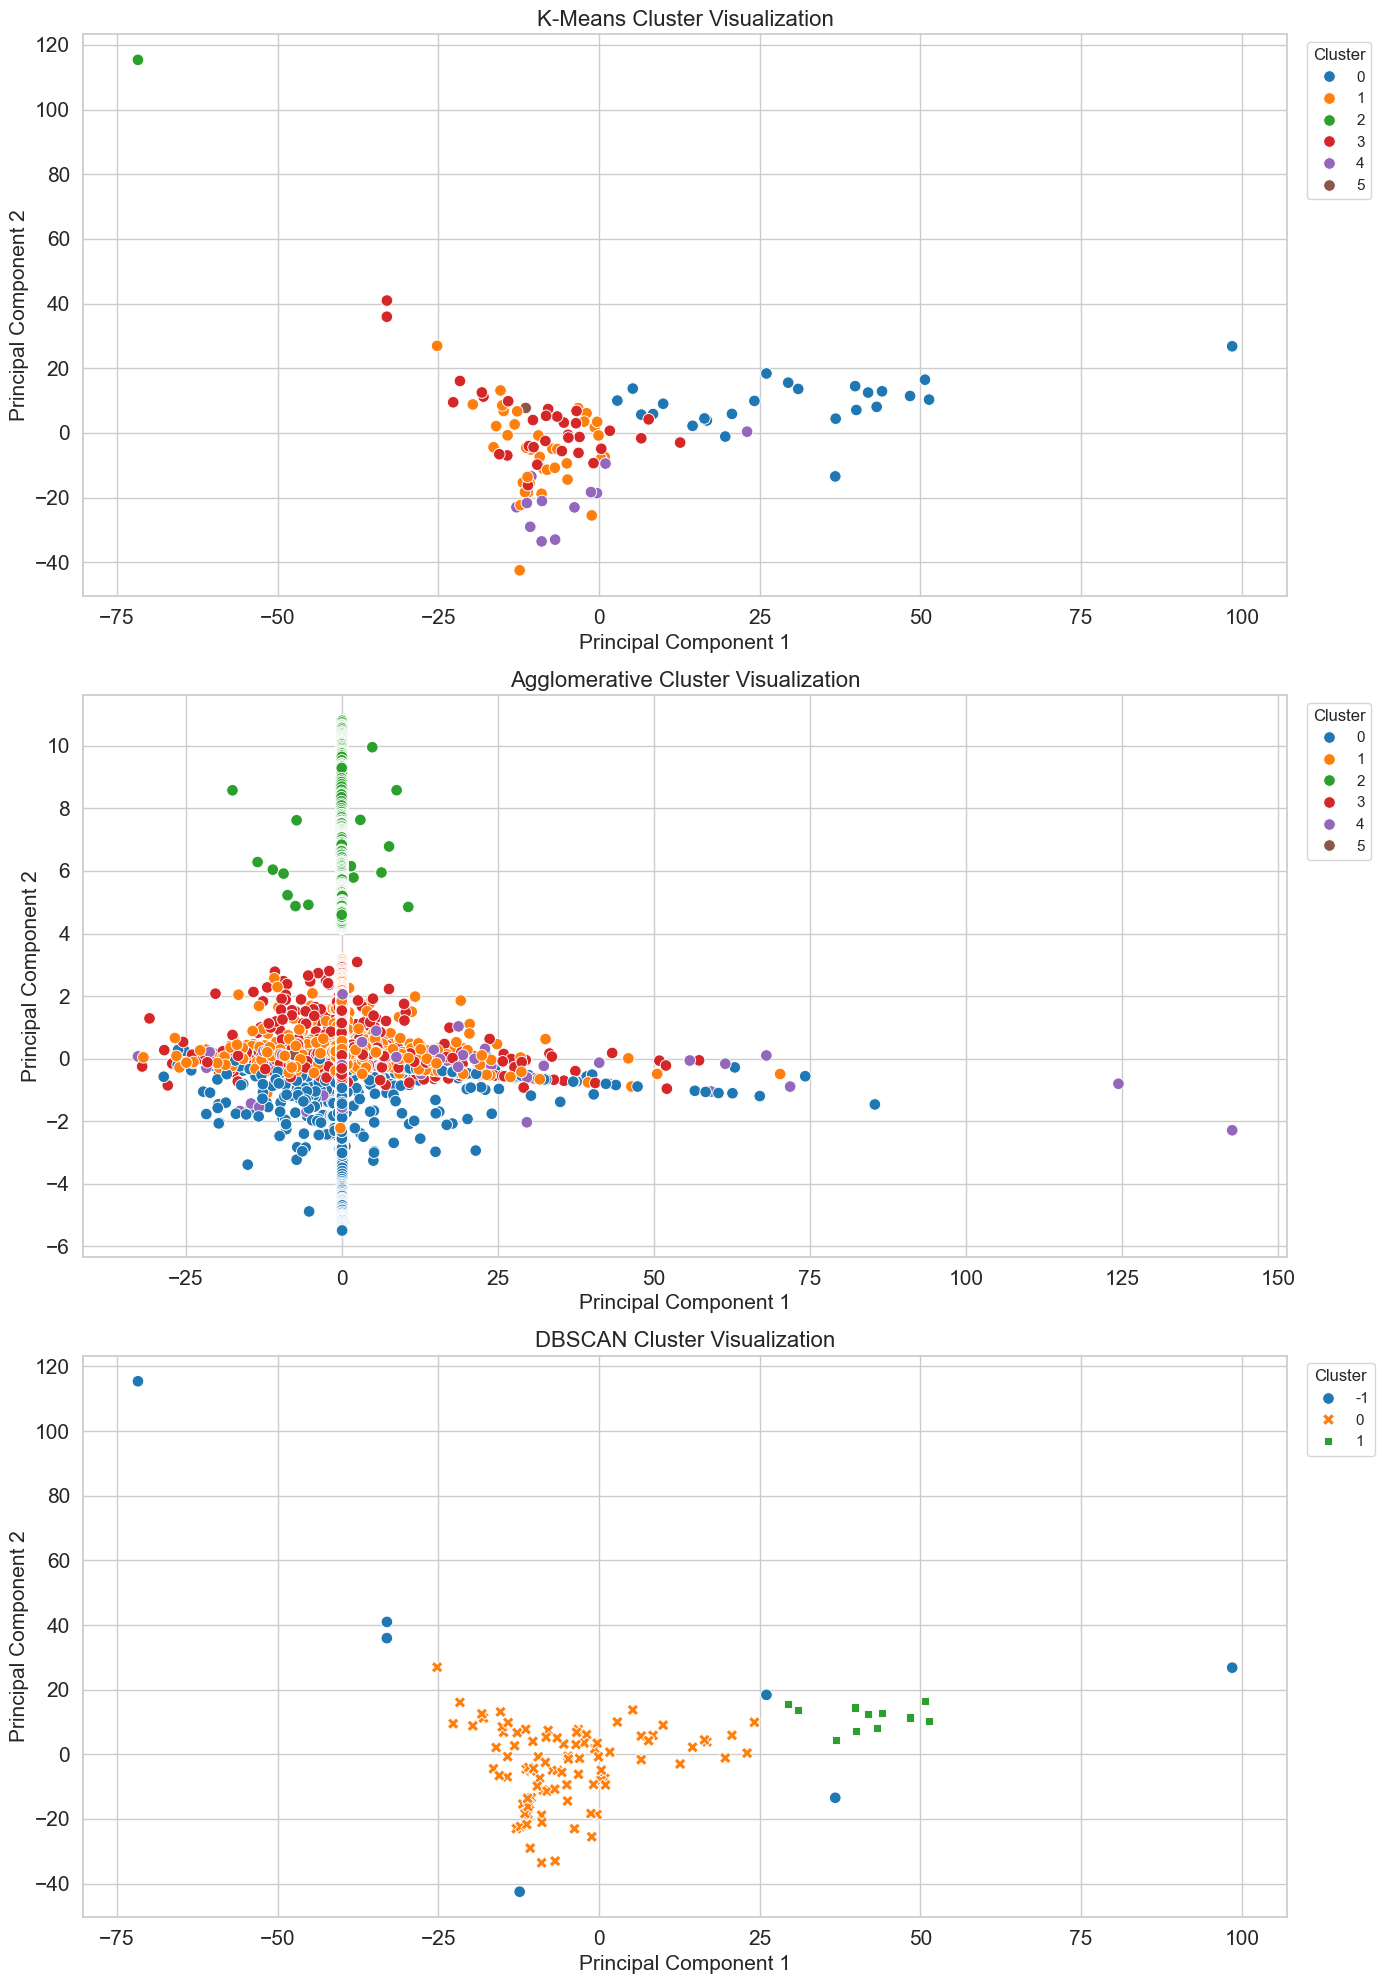

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# ---------- PCA Data Preparation ----------
# K-Means
pca_kmeans = PCA(n_components=2)
components_kmeans = pca_kmeans.fit_transform(X_scaled)
pca_df_kmeans = pd.DataFrame(components_kmeans, columns=['PC1', 'PC2'])
pca_df_kmeans['Cluster'] = clusters
pca_df_kmeans['Ticker'] = extracted_features_clean.index

# Agglomerative
features_aglo = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']
X_aglo = df_aglo[features_aglo].values
X_aglo_scaled = StandardScaler().fit_transform(X_aglo)
pca_aglo = PCA(n_components=2)
components_aglo = pca_aglo.fit_transform(X_aglo_scaled)
pca_df_aglo = pd.DataFrame(components_aglo, columns=['PC1', 'PC2'])
pca_df_aglo['Cluster'] = df_aglo['Cluster'].values
pca_df_aglo['Ticker'] = df_aglo['Ticker'].values

# DBSCAN
pca_df_dbscan = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df_dbscan['Cluster'] = best_labels
pca_df_dbscan['Ticker'] = extracted_features.index

# ---------- Plotting ----------
fig, axes = plt.subplots(3, 1, figsize=(14, 20))  # Ukuran figure lebih besar

font_label = 15
font_tick = 15
font_title = 16


# K-Means
sns.scatterplot(data=pca_df_kmeans, x='PC1', y='PC2', hue='Cluster',
                palette='tab10', s=70, ax=axes[0])
axes[0].set_title('K-Means Cluster Visualization', fontsize=font_title)
axes[0].set_xlabel('Principal Component 1', fontsize=font_label)
axes[0].set_ylabel('Principal Component 2', fontsize=font_label)
axes[0].tick_params(axis='both', labelsize=font_tick)
axes[0].legend(title='Cluster', bbox_to_anchor=(1.01, 1), loc='upper left')

# Agglomerative
sns.scatterplot(data=pca_df_aglo, x='PC1', y='PC2', hue='Cluster',
                palette='tab10', s=70, ax=axes[1])
axes[1].set_title('Agglomerative Cluster Visualization', fontsize=font_title)
axes[1].set_xlabel('Principal Component 1', fontsize=font_label)
axes[1].set_ylabel('Principal Component 2', fontsize=font_label)
axes[1].tick_params(axis='both', labelsize=font_tick)
axes[1].legend(title='Cluster', bbox_to_anchor=(1.01, 1), loc='upper left')

# DBSCAN
sns.scatterplot(data=pca_df_dbscan, x='PC1', y='PC2', hue='Cluster', style='Cluster',
                palette='tab10', s=70, ax=axes[2])
axes[2].set_title('DBSCAN Cluster Visualization', fontsize=font_title)
axes[2].set_xlabel('Principal Component 1', fontsize=font_label)
axes[2].set_ylabel('Principal Component 2', fontsize=font_label)
axes[2].tick_params(axis='both', labelsize=font_tick)
axes[2].legend(title='Cluster', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout()
plt.show()


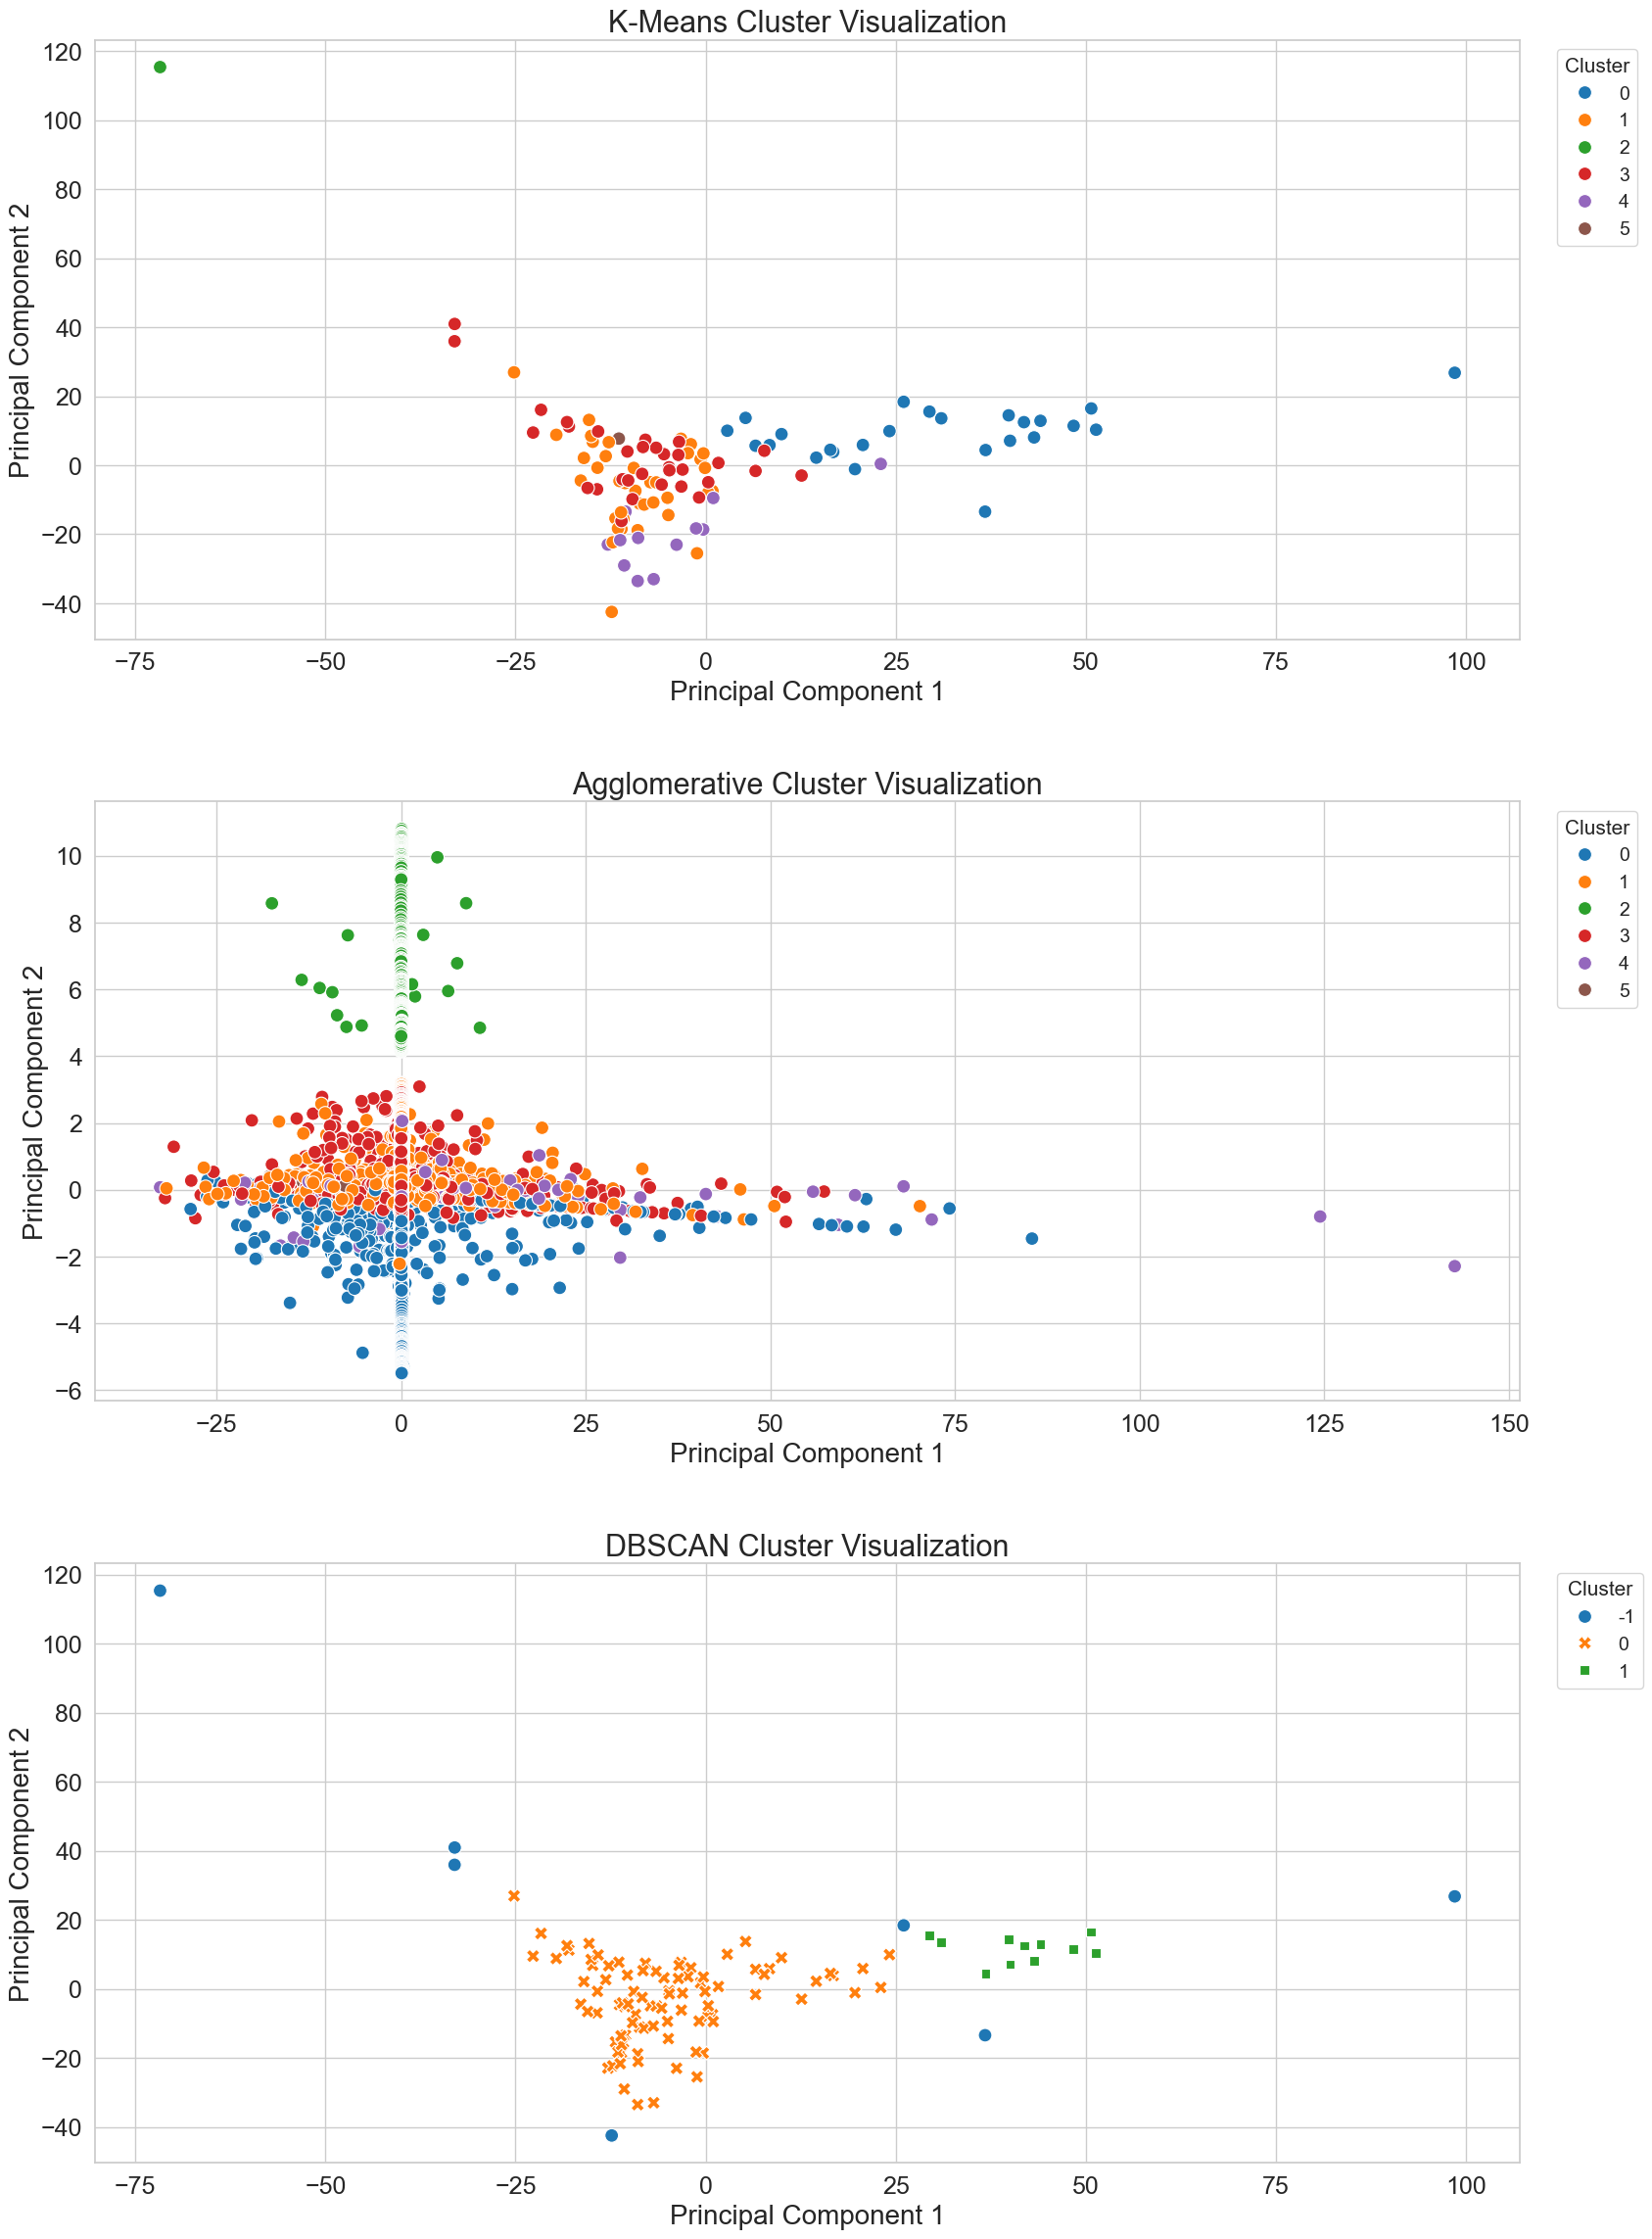

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# ---------- PCA Data Preparation ----------

# K-Means
pca_kmeans = PCA(n_components=2)
components_kmeans = pca_kmeans.fit_transform(X_scaled)
pca_df_kmeans = pd.DataFrame(components_kmeans, columns=['PC1', 'PC2'])
pca_df_kmeans['Cluster'] = clusters
pca_df_kmeans['Ticker'] = extracted_features_clean.index

# Agglomerative
features_aglo = ['Return', 'SharpeRatio', 'EMA', 'RSI', 'Beta', 'OBV']
X_aglo = df_aglo[features_aglo].values
X_aglo_scaled = StandardScaler().fit_transform(X_aglo)
pca_aglo = PCA(n_components=2)
components_aglo = pca_aglo.fit_transform(X_aglo_scaled)
pca_df_aglo = pd.DataFrame(components_aglo, columns=['PC1', 'PC2'])
pca_df_aglo['Cluster'] = df_aglo['Cluster'].values
pca_df_aglo['Ticker'] = df_aglo['Ticker'].values

# DBSCAN
pca_df_dbscan = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df_dbscan['Cluster'] = best_labels
pca_df_dbscan['Ticker'] = extracted_features.index

# ---------- Plotting ----------
fig, axes = plt.subplots(3, 1, figsize=(18, 24))  # Lebih besar agar tetap terbaca saat resize

font_title = 22
font_label = 20
font_tick = 18
marker_size = 100  # Ukuran titik lebih besar agar terlihat saat dikecilkan

# K-Means
sns.scatterplot(data=pca_df_kmeans, x='PC1', y='PC2', hue='Cluster',
                palette='tab10', s=marker_size, ax=axes[0])
axes[0].set_title('K-Means Cluster Visualization', fontsize=font_title)
axes[0].set_xlabel('Principal Component 1', fontsize=font_label)
axes[0].set_ylabel('Principal Component 2', fontsize=font_label)
axes[0].tick_params(axis='both', labelsize=font_tick)
axes[0].legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=14, title_fontsize=15)

# Agglomerative
sns.scatterplot(data=pca_df_aglo, x='PC1', y='PC2', hue='Cluster',
                palette='tab10', s=marker_size, ax=axes[1])
axes[1].set_title('Agglomerative Cluster Visualization', fontsize=font_title)
axes[1].set_xlabel('Principal Component 1', fontsize=font_label)
axes[1].set_ylabel('Principal Component 2', fontsize=font_label)
axes[1].tick_params(axis='both', labelsize=font_tick)
axes[1].legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=14, title_fontsize=15)

# DBSCAN
sns.scatterplot(data=pca_df_dbscan, x='PC1', y='PC2', hue='Cluster', style='Cluster',
                palette='tab10', s=marker_size, ax=axes[2])
axes[2].set_title('DBSCAN Cluster Visualization', fontsize=font_title)
axes[2].set_xlabel('Principal Component 1', fontsize=font_label)
axes[2].set_ylabel('Principal Component 2', fontsize=font_label)
axes[2].tick_params(axis='both', labelsize=font_tick)
axes[2].legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=14, title_fontsize=15)

plt.tight_layout(pad=4.0)
plt.show()


In [233]:
from sklearn.metrics import r2_score
import numpy as np

def evaluate_performance(df, label):
    # Hindari pembagian nol
    df = df[df['True'] != 0]
    
    # Hitung Mean Relative Error (MRE)
    mre = np.mean(np.abs((df['True'] - df['Predicted']) / df['True']))

    # Hitung R-squared
    r2 = r2_score(df['True'], df['Predicted'])

    print(f"{label} Performance:")
    print(f"  Mean Relative Error (MRE): {mre:.4f}")
    print(f"  R-squared (R²):            {r2:.4f}")
    print()

# Evaluasi masing-masing model
evaluate_performance(predictions_kmeans1, "K-Means + LSTM")
evaluate_performance(predictions_aglo, "Agglomerative + LSTM")
evaluate_performance(predictions_dbscan, "DBSCAN + LSTM")


K-Means + LSTM Performance:
  Mean Relative Error (MRE): 2.7653
  R-squared (R²):            -0.0747

Agglomerative + LSTM Performance:
  Mean Relative Error (MRE): 2.9475
  R-squared (R²):            -0.0744

DBSCAN + LSTM Performance:
  Mean Relative Error (MRE): 2.9927
  R-squared (R²):            -0.0734



In [234]:
import pandas as pd

results = []

for df, label in [
    (predictions_kmeans1, "K-Means + LSTM"),
    (predictions_aglo, "Agglomerative + LSTM"),
    (predictions_dbscan, "DBSCAN + LSTM")
]:
    df = df[df['True'] != 0]
    mre = np.mean(np.abs((df['True'] - df['Predicted']) / df['True']))
    r2 = r2_score(df['True'], df['Predicted'])
    results.append({'Model': label, 'MRE': mre, 'R-squared': r2})

results_df = pd.DataFrame(results)
print(results_df)


                  Model       MRE  R-squared
0        K-Means + LSTM  2.765320  -0.074653
1  Agglomerative + LSTM  2.947505  -0.074443
2         DBSCAN + LSTM  2.992743  -0.073377


In [236]:
kmeans_data.to_excel('kmeans_data.xlsx')
df_aglo.to_excel('aglo_data.xlsx')
result_dbscan.to_excel('dbscan_data.xlsx')
                       
df_final_dbscan.to_excel('df_final_dbscan.xlsx')
df_final_aglo.to_excel('df_final_aglo.xlsx')
df_final.to_excel('df_final_kmeans.xlsx')


final_result_with_ticker_kmeans.to_excel('final_result_with_ticker_kmeans.xlsx')
final_result_with_ticker_aglo.to_excel('final_result_with_ticker_aglo.xlsx')
final_result_with_ticker_dbscan.to_excel('final_result_with_ticker_dbscan.xlsx')